# Deep Hedging for nonlinear generalized affine processes

# Example: Path-dependent Option, Lookback Call

Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import style
style.use('ggplot')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from mpl_toolkits.mplot3d import Axes3D
from Functions import*
from matplotlib import rcParams

Execute if it should be run on a GPU

In [2]:
#physical_devices = tf.config.list_physical_devices('GPU') 

Write a function to generate paths of the SDE
$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t,~t\geq 0,\\
X_0 = x_0
$$
using the Euler-Maruyama Method, i.e., through
$$
X_{i+1} = X_i+(b_0+b_1 X_i) \Delta t_i +(a_0+a_1 X_i)^\gamma  \Delta W_i,~i=1,\dots,n
$$
with $\Delta t_i = T/n$ and $\Delta W_i = W_{(i+1)T/n}-W_{iT/n}$ and $X_0 = x_0$

Write a function to determine the optimal hedge based on a deep learning approach

Test it in a purely nonlinear setting:

$$
d X_t = (b_0+b_1 X_t) dt + (a_0+a_1 X_t)^\gamma dW_t
$$

for 

\begin{align}
a_0 &\in [0.3,0.7] \\
a_1 &\in [0.4,0.6] \\
b_0 &\in [-0.2,0.2] \\
b_1 &\in [-0.1,0.1] \\
\gamma &\in [0.5,1.5]
\end{align}

We specify the option Payoff:
$$
\Phi(X)= \max((X)_{0\leq t \leq T}-12)^+
$$

# Part 1)
# Markovian Setting: We let the hedge only depend on spot price and time

In [3]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price, hedge = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:10<2:35:24,  1.07it/s]

Iteration:10, Price of Hedge: 0.35898932814598083, Loss: 0.27186256647109985


  0%|          | 21/10000 [00:20<2:45:20,  1.01it/s]

Iteration:20, Price of Hedge: 0.36624982953071594, Loss: 0.25921177864074707


  0%|          | 31/10000 [00:29<2:33:53,  1.08it/s]

Iteration:30, Price of Hedge: 0.36585718393325806, Loss: 0.3389938175678253


  0%|          | 41/10000 [00:39<2:29:08,  1.11it/s]

Iteration:40, Price of Hedge: 0.36221107840538025, Loss: 0.3231036067008972


  1%|          | 51/10000 [00:49<2:52:04,  1.04s/it]

Iteration:50, Price of Hedge: 0.35777798295021057, Loss: 0.2354722023010254


  1%|          | 61/10000 [00:58<2:34:25,  1.07it/s]

Iteration:60, Price of Hedge: 0.35219356417655945, Loss: 0.2674529552459717


  1%|          | 71/10000 [01:09<2:42:38,  1.02it/s]

Iteration:70, Price of Hedge: 0.3487894833087921, Loss: 0.33405986428260803


  1%|          | 81/10000 [01:18<2:31:34,  1.09it/s]

Iteration:80, Price of Hedge: 0.3458073139190674, Loss: 0.3454672694206238


  1%|          | 91/10000 [01:27<2:31:26,  1.09it/s]

Iteration:90, Price of Hedge: 0.34975162148475647, Loss: 0.23269987106323242


  1%|          | 101/10000 [01:39<3:15:11,  1.18s/it]

Iteration:100, Price of Hedge: 0.35197192430496216, Loss: 0.21534463763237


  1%|          | 111/10000 [01:49<2:32:25,  1.08it/s]

Iteration:110, Price of Hedge: 0.35464048385620117, Loss: 0.29409223794937134


  1%|          | 121/10000 [01:58<2:31:40,  1.09it/s]

Iteration:120, Price of Hedge: 0.36121895909309387, Loss: 0.2864992022514343


  1%|▏         | 131/10000 [02:08<2:45:44,  1.01s/it]

Iteration:130, Price of Hedge: 0.3649258315563202, Loss: 0.2785536050796509


  1%|▏         | 141/10000 [02:18<2:41:04,  1.02it/s]

Iteration:140, Price of Hedge: 0.36155471205711365, Loss: 0.27503418922424316


  2%|▏         | 151/10000 [02:28<2:47:33,  1.02s/it]

Iteration:150, Price of Hedge: 0.3602428734302521, Loss: 0.6140761971473694


  2%|▏         | 161/10000 [02:37<2:36:30,  1.05it/s]

Iteration:160, Price of Hedge: 0.35867512226104736, Loss: 0.16471552848815918


  2%|▏         | 171/10000 [02:48<2:30:04,  1.09it/s]

Iteration:170, Price of Hedge: 0.3587237298488617, Loss: 0.2238096296787262


  2%|▏         | 181/10000 [02:59<3:33:23,  1.30s/it]

Iteration:180, Price of Hedge: 0.35724538564682007, Loss: 0.19725723564624786


  2%|▏         | 191/10000 [03:11<3:51:15,  1.41s/it]

Iteration:190, Price of Hedge: 0.36061960458755493, Loss: 0.24025958776474


  2%|▏         | 201/10000 [03:21<2:36:57,  1.04it/s]

Iteration:200, Price of Hedge: 0.3612060546875, Loss: 0.18315547704696655


  2%|▏         | 211/10000 [03:34<3:23:45,  1.25s/it]

Iteration:210, Price of Hedge: 0.3619425296783447, Loss: 0.2123035490512848


  2%|▏         | 221/10000 [03:46<3:36:54,  1.33s/it]

Iteration:220, Price of Hedge: 0.3610425293445587, Loss: 0.14993876218795776


  2%|▏         | 231/10000 [03:56<2:44:42,  1.01s/it]

Iteration:230, Price of Hedge: 0.36076658964157104, Loss: 0.22139835357666016


  2%|▏         | 241/10000 [04:07<2:34:12,  1.05it/s]

Iteration:240, Price of Hedge: 0.35610631108283997, Loss: 0.18221867084503174


  3%|▎         | 251/10000 [04:16<2:53:12,  1.07s/it]

Iteration:250, Price of Hedge: 0.3510911762714386, Loss: 0.23279371857643127


  3%|▎         | 261/10000 [04:26<2:31:33,  1.07it/s]

Iteration:260, Price of Hedge: 0.35584449768066406, Loss: 0.1719946414232254


  3%|▎         | 271/10000 [04:36<2:33:59,  1.05it/s]

Iteration:270, Price of Hedge: 0.3532260060310364, Loss: 0.14978431165218353


  3%|▎         | 281/10000 [04:45<2:39:19,  1.02it/s]

Iteration:280, Price of Hedge: 0.3511661887168884, Loss: 0.2646295726299286


  3%|▎         | 291/10000 [04:57<3:01:51,  1.12s/it]

Iteration:290, Price of Hedge: 0.3488084375858307, Loss: 0.19081275165081024


  3%|▎         | 301/10000 [05:07<2:48:19,  1.04s/it]

Iteration:300, Price of Hedge: 0.35406020283699036, Loss: 0.10522940009832382


  3%|▎         | 311/10000 [05:16<2:50:51,  1.06s/it]

Iteration:310, Price of Hedge: 0.35355696082115173, Loss: 0.1697567105293274


  3%|▎         | 321/10000 [05:28<2:39:14,  1.01it/s]

Iteration:320, Price of Hedge: 0.34926488995552063, Loss: 0.2777356803417206


  3%|▎         | 331/10000 [05:39<3:13:15,  1.20s/it]

Iteration:330, Price of Hedge: 0.357733815908432, Loss: 0.15948767960071564


  3%|▎         | 341/10000 [05:49<2:31:21,  1.06it/s]

Iteration:340, Price of Hedge: 0.3646686375141144, Loss: 0.1611737310886383


  4%|▎         | 351/10000 [05:59<2:26:59,  1.09it/s]

Iteration:350, Price of Hedge: 0.37808701395988464, Loss: 0.18806391954421997


  4%|▎         | 361/10000 [06:08<2:43:20,  1.02s/it]

Iteration:360, Price of Hedge: 0.37323489785194397, Loss: 0.12532374262809753


  4%|▎         | 371/10000 [06:17<2:22:51,  1.12it/s]

Iteration:370, Price of Hedge: 0.3561314642429352, Loss: 0.09958949685096741


  4%|▍         | 381/10000 [06:27<2:36:06,  1.03it/s]

Iteration:380, Price of Hedge: 0.3416767418384552, Loss: 0.1303679496049881


  4%|▍         | 391/10000 [06:36<2:20:44,  1.14it/s]

Iteration:390, Price of Hedge: 0.34887227416038513, Loss: 0.29571738839149475


  4%|▍         | 401/10000 [06:46<2:23:35,  1.11it/s]

Iteration:400, Price of Hedge: 0.3650025427341461, Loss: 0.1388869285583496


  4%|▍         | 411/10000 [06:54<2:31:01,  1.06it/s]

Iteration:410, Price of Hedge: 0.3763013780117035, Loss: 0.11982783675193787


  4%|▍         | 421/10000 [07:04<2:22:34,  1.12it/s]

Iteration:420, Price of Hedge: 0.373879998922348, Loss: 0.1471162736415863


  4%|▍         | 431/10000 [07:14<2:51:01,  1.07s/it]

Iteration:430, Price of Hedge: 0.35603728890419006, Loss: 0.16075509786605835


  4%|▍         | 441/10000 [07:23<2:18:57,  1.15it/s]

Iteration:440, Price of Hedge: 0.3544554114341736, Loss: 0.17675679922103882


  5%|▍         | 451/10000 [07:33<2:54:17,  1.10s/it]

Iteration:450, Price of Hedge: 0.3574327826499939, Loss: 0.13800084590911865


  5%|▍         | 461/10000 [07:44<3:06:20,  1.17s/it]

Iteration:460, Price of Hedge: 0.3631136417388916, Loss: 0.16845881938934326


  5%|▍         | 471/10000 [07:53<2:23:51,  1.10it/s]

Iteration:470, Price of Hedge: 0.36421409249305725, Loss: 0.18696627020835876


  5%|▍         | 481/10000 [08:03<2:36:05,  1.02it/s]

Iteration:480, Price of Hedge: 0.357451856136322, Loss: 0.12833532691001892


  5%|▍         | 491/10000 [08:12<2:20:51,  1.13it/s]

Iteration:490, Price of Hedge: 0.3566133975982666, Loss: 0.21868710219860077


  5%|▌         | 501/10000 [08:22<2:22:41,  1.11it/s]

Iteration:500, Price of Hedge: 0.3626340925693512, Loss: 0.10331039875745773


  5%|▌         | 511/10000 [08:31<2:35:44,  1.02it/s]

Iteration:510, Price of Hedge: 0.3607107102870941, Loss: 0.17178094387054443


  5%|▌         | 521/10000 [08:40<2:19:30,  1.13it/s]

Iteration:520, Price of Hedge: 0.3624939024448395, Loss: 0.195708766579628


  5%|▌         | 531/10000 [08:50<2:41:14,  1.02s/it]

Iteration:530, Price of Hedge: 0.35973942279815674, Loss: 0.13196299970149994


  5%|▌         | 541/10000 [08:59<2:23:44,  1.10it/s]

Iteration:540, Price of Hedge: 0.36438441276550293, Loss: 0.21346867084503174


  6%|▌         | 551/10000 [09:09<2:26:20,  1.08it/s]

Iteration:550, Price of Hedge: 0.3667413890361786, Loss: 0.13663315773010254


  6%|▌         | 561/10000 [09:18<2:34:09,  1.02it/s]

Iteration:560, Price of Hedge: 0.3560791015625, Loss: 0.17560309171676636


  6%|▌         | 571/10000 [09:28<2:23:31,  1.09it/s]

Iteration:570, Price of Hedge: 0.35188430547714233, Loss: 0.13093437254428864


  6%|▌         | 581/10000 [09:39<3:07:34,  1.19s/it]

Iteration:580, Price of Hedge: 0.35648366808891296, Loss: 0.11862599104642868


  6%|▌         | 591/10000 [09:50<2:32:54,  1.03it/s]

Iteration:590, Price of Hedge: 0.36875712871551514, Loss: 0.15810352563858032


  6%|▌         | 601/10000 [09:59<2:21:24,  1.11it/s]

Iteration:600, Price of Hedge: 0.36866384744644165, Loss: 0.23795774579048157


  6%|▌         | 611/10000 [10:09<2:42:45,  1.04s/it]

Iteration:610, Price of Hedge: 0.36482906341552734, Loss: 0.13542023301124573


  6%|▌         | 621/10000 [10:18<2:18:37,  1.13it/s]

Iteration:620, Price of Hedge: 0.36881330609321594, Loss: 0.1279551237821579


  6%|▋         | 631/10000 [10:27<2:29:53,  1.04it/s]

Iteration:630, Price of Hedge: 0.36991551518440247, Loss: 0.19185489416122437


  6%|▋         | 641/10000 [10:36<2:17:33,  1.13it/s]

Iteration:640, Price of Hedge: 0.35635456442832947, Loss: 0.11917158961296082


  7%|▋         | 651/10000 [10:46<2:22:49,  1.09it/s]

Iteration:650, Price of Hedge: 0.3493448495864868, Loss: 0.1526065468788147


  7%|▋         | 661/10000 [10:55<2:32:21,  1.02it/s]

Iteration:660, Price of Hedge: 0.3571939766407013, Loss: 0.13595595955848694


  7%|▋         | 671/10000 [11:05<2:29:00,  1.04it/s]

Iteration:670, Price of Hedge: 0.3612444996833801, Loss: 0.22987189888954163


  7%|▋         | 681/10000 [11:14<2:37:04,  1.01s/it]

Iteration:680, Price of Hedge: 0.3607368469238281, Loss: 0.2406395673751831


  7%|▋         | 691/10000 [11:23<2:16:56,  1.13it/s]

Iteration:690, Price of Hedge: 0.36242151260375977, Loss: 0.20051082968711853


  7%|▋         | 701/10000 [11:34<2:44:20,  1.06s/it]

Iteration:700, Price of Hedge: 0.3562757074832916, Loss: 0.13915327191352844


  7%|▋         | 711/10000 [11:45<3:10:05,  1.23s/it]

Iteration:710, Price of Hedge: 0.3470233678817749, Loss: 0.09907348453998566


  7%|▋         | 721/10000 [11:54<2:25:08,  1.07it/s]

Iteration:720, Price of Hedge: 0.34945061802864075, Loss: 0.21324290335178375


  7%|▋         | 731/10000 [12:04<2:26:25,  1.06it/s]

Iteration:730, Price of Hedge: 0.35619035363197327, Loss: 0.20518983900547028


  7%|▋         | 741/10000 [12:13<2:16:09,  1.13it/s]

Iteration:740, Price of Hedge: 0.3640407919883728, Loss: 0.10677183419466019


  8%|▊         | 751/10000 [12:23<2:17:01,  1.12it/s]

Iteration:750, Price of Hedge: 0.36616265773773193, Loss: 0.17838406562805176


  8%|▊         | 761/10000 [12:32<2:35:20,  1.01s/it]

Iteration:760, Price of Hedge: 0.3600313067436218, Loss: 0.11499985307455063


  8%|▊         | 771/10000 [12:41<2:17:20,  1.12it/s]

Iteration:770, Price of Hedge: 0.35226956009864807, Loss: 0.13040530681610107


  8%|▊         | 781/10000 [12:52<2:34:25,  1.01s/it]

Iteration:780, Price of Hedge: 0.3516150712966919, Loss: 0.1384032666683197


  8%|▊         | 791/10000 [13:01<2:17:26,  1.12it/s]

Iteration:790, Price of Hedge: 0.35836291313171387, Loss: 0.16100624203681946


  8%|▊         | 801/10000 [13:10<2:20:59,  1.09it/s]

Iteration:800, Price of Hedge: 0.3639317452907562, Loss: 0.22792789340019226


  8%|▊         | 811/10000 [13:20<2:33:13,  1.00s/it]

Iteration:810, Price of Hedge: 0.368021696805954, Loss: 0.11239390075206757


  8%|▊         | 821/10000 [13:29<2:12:34,  1.15it/s]

Iteration:820, Price of Hedge: 0.36217617988586426, Loss: 0.1290455162525177


  8%|▊         | 831/10000 [13:40<2:50:20,  1.11s/it]

Iteration:830, Price of Hedge: 0.3608194589614868, Loss: 0.18051724135875702


  8%|▊         | 841/10000 [13:50<2:22:40,  1.07it/s]

Iteration:840, Price of Hedge: 0.3585582971572876, Loss: 0.16075289249420166


  9%|▊         | 851/10000 [13:59<2:15:43,  1.12it/s]

Iteration:850, Price of Hedge: 0.3616164028644562, Loss: 0.13025975227355957


  9%|▊         | 861/10000 [14:09<2:35:49,  1.02s/it]

Iteration:860, Price of Hedge: 0.3580184280872345, Loss: 0.19693706929683685


  9%|▊         | 871/10000 [14:18<2:21:28,  1.08it/s]

Iteration:870, Price of Hedge: 0.3626784384250641, Loss: 0.1459757685661316


  9%|▉         | 881/10000 [14:27<2:25:56,  1.04it/s]

Iteration:880, Price of Hedge: 0.36509817838668823, Loss: 0.1649692952632904


  9%|▉         | 891/10000 [14:36<2:13:52,  1.13it/s]

Iteration:890, Price of Hedge: 0.35923245549201965, Loss: 0.17095275223255157


  9%|▉         | 901/10000 [14:46<2:17:43,  1.10it/s]

Iteration:900, Price of Hedge: 0.36140599846839905, Loss: 0.12874442338943481


  9%|▉         | 911/10000 [14:55<2:29:46,  1.01it/s]

Iteration:910, Price of Hedge: 0.3659003674983978, Loss: 0.11914795637130737


  9%|▉         | 921/10000 [15:05<2:16:24,  1.11it/s]

Iteration:920, Price of Hedge: 0.37029150128364563, Loss: 0.13364309072494507


  9%|▉         | 931/10000 [15:14<2:33:54,  1.02s/it]

Iteration:930, Price of Hedge: 0.36548396944999695, Loss: 0.12153517454862595


  9%|▉         | 941/10000 [15:23<2:11:37,  1.15it/s]

Iteration:940, Price of Hedge: 0.36077702045440674, Loss: 0.09103183448314667


 10%|▉         | 951/10000 [15:34<2:51:28,  1.14s/it]

Iteration:950, Price of Hedge: 0.349500834941864, Loss: 0.21226315200328827


 10%|▉         | 961/10000 [15:45<3:03:53,  1.22s/it]

Iteration:960, Price of Hedge: 0.3470284044742584, Loss: 0.12548890709877014


 10%|▉         | 971/10000 [15:54<2:18:30,  1.09it/s]

Iteration:970, Price of Hedge: 0.34856873750686646, Loss: 0.07990577816963196


 10%|▉         | 981/10000 [16:04<2:24:02,  1.04it/s]

Iteration:980, Price of Hedge: 0.3592105805873871, Loss: 0.21708554029464722


 10%|▉         | 991/10000 [16:13<2:11:38,  1.14it/s]

Iteration:990, Price of Hedge: 0.3582058846950531, Loss: 0.13484317064285278


 10%|█         | 1001/10000 [16:23<2:13:34,  1.12it/s]

Iteration:1000, Price of Hedge: 0.36127105355262756, Loss: 0.09047543257474899


 10%|█         | 1011/10000 [16:33<2:45:06,  1.10s/it]

Iteration:1010, Price of Hedge: 0.3546386957168579, Loss: 0.1279478520154953


 10%|█         | 1021/10000 [16:42<2:14:10,  1.12it/s]

Iteration:1020, Price of Hedge: 0.35116586089134216, Loss: 0.12152053415775299


 10%|█         | 1031/10000 [16:52<2:24:08,  1.04it/s]

Iteration:1030, Price of Hedge: 0.3552284240722656, Loss: 0.09584171324968338


 10%|█         | 1041/10000 [17:01<2:13:31,  1.12it/s]

Iteration:1040, Price of Hedge: 0.3625575304031372, Loss: 0.205898255109787


 11%|█         | 1051/10000 [17:10<2:16:21,  1.09it/s]

Iteration:1050, Price of Hedge: 0.3661855161190033, Loss: 0.15716393291950226


 11%|█         | 1061/10000 [17:20<2:25:14,  1.03it/s]

Iteration:1060, Price of Hedge: 0.35804635286331177, Loss: 0.1459646075963974


 11%|█         | 1071/10000 [17:29<2:12:18,  1.12it/s]

Iteration:1070, Price of Hedge: 0.35668569803237915, Loss: 0.1161014586687088


 11%|█         | 1081/10000 [17:40<2:45:32,  1.11s/it]

Iteration:1080, Price of Hedge: 0.3558414578437805, Loss: 0.11936600506305695


 11%|█         | 1091/10000 [17:50<2:28:09,  1.00it/s]

Iteration:1090, Price of Hedge: 0.3592926859855652, Loss: 0.17747339606285095


 11%|█         | 1101/10000 [18:00<2:13:01,  1.11it/s]

Iteration:1100, Price of Hedge: 0.3558237552642822, Loss: 0.17462514340877533


 11%|█         | 1111/10000 [18:09<2:32:11,  1.03s/it]

Iteration:1110, Price of Hedge: 0.3570804297924042, Loss: 0.1826426386833191


 11%|█         | 1121/10000 [18:18<2:12:31,  1.12it/s]

Iteration:1120, Price of Hedge: 0.3589089512825012, Loss: 0.10739688575267792


 11%|█▏        | 1131/10000 [18:28<2:21:23,  1.05it/s]

Iteration:1130, Price of Hedge: 0.3553762137889862, Loss: 0.14974141120910645


 11%|█▏        | 1141/10000 [18:37<2:08:25,  1.15it/s]

Iteration:1140, Price of Hedge: 0.3580954372882843, Loss: 0.15476566553115845


 12%|█▏        | 1151/10000 [18:46<2:11:07,  1.12it/s]

Iteration:1150, Price of Hedge: 0.36099615693092346, Loss: 0.08755694329738617


 12%|█▏        | 1161/10000 [18:56<2:27:40,  1.00s/it]

Iteration:1160, Price of Hedge: 0.3652867376804352, Loss: 0.12563258409500122


 12%|█▏        | 1171/10000 [19:05<2:10:34,  1.13it/s]

Iteration:1170, Price of Hedge: 0.3637256324291229, Loss: 0.10122847557067871


 12%|█▏        | 1181/10000 [19:15<2:28:27,  1.01s/it]

Iteration:1180, Price of Hedge: 0.3590998649597168, Loss: 0.11559043824672699


 12%|█▏        | 1191/10000 [19:23<2:08:26,  1.14it/s]

Iteration:1190, Price of Hedge: 0.34880751371383667, Loss: 0.14147965610027313


 12%|█▏        | 1201/10000 [19:33<2:26:13,  1.00it/s]

Iteration:1200, Price of Hedge: 0.3504554331302643, Loss: 0.22083540260791779


 12%|█▏        | 1211/10000 [19:44<2:54:03,  1.19s/it]

Iteration:1210, Price of Hedge: 0.36179688572883606, Loss: 0.17577525973320007


 12%|█▏        | 1221/10000 [19:54<2:12:31,  1.10it/s]

Iteration:1220, Price of Hedge: 0.3753814697265625, Loss: 0.17459061741828918


 12%|█▏        | 1231/10000 [20:04<2:20:55,  1.04it/s]

Iteration:1230, Price of Hedge: 0.3690344989299774, Loss: 0.12551087141036987


 12%|█▏        | 1241/10000 [20:13<2:06:31,  1.15it/s]

Iteration:1240, Price of Hedge: 0.3584381341934204, Loss: 0.1386340707540512


 13%|█▎        | 1251/10000 [20:22<2:11:53,  1.11it/s]

Iteration:1250, Price of Hedge: 0.36578482389450073, Loss: 0.1483297497034073


 13%|█▎        | 1261/10000 [20:32<2:30:45,  1.04s/it]

Iteration:1260, Price of Hedge: 0.3644869327545166, Loss: 0.09558768570423126


 13%|█▎        | 1271/10000 [20:41<2:11:29,  1.11it/s]

Iteration:1270, Price of Hedge: 0.3614402711391449, Loss: 0.15144839882850647


 13%|█▎        | 1281/10000 [20:51<2:23:10,  1.01it/s]

Iteration:1280, Price of Hedge: 0.3502449691295624, Loss: 0.12334723770618439


 13%|█▎        | 1291/10000 [21:00<2:07:43,  1.14it/s]

Iteration:1290, Price of Hedge: 0.35952451825141907, Loss: 0.14616036415100098


 13%|█▎        | 1301/10000 [21:10<2:16:29,  1.06it/s]

Iteration:1300, Price of Hedge: 0.37128838896751404, Loss: 0.1499418467283249


 13%|█▎        | 1311/10000 [21:19<2:20:37,  1.03it/s]

Iteration:1310, Price of Hedge: 0.3599991202354431, Loss: 0.10878122597932816


 13%|█▎        | 1321/10000 [21:28<2:09:36,  1.12it/s]

Iteration:1320, Price of Hedge: 0.3527289927005768, Loss: 0.10550472885370255


 13%|█▎        | 1331/10000 [21:39<2:48:45,  1.17s/it]

Iteration:1330, Price of Hedge: 0.3590666949748993, Loss: 0.16326387226581573


 13%|█▎        | 1341/10000 [21:49<2:29:32,  1.04s/it]

Iteration:1340, Price of Hedge: 0.3622301518917084, Loss: 0.13626892864704132


 14%|█▎        | 1351/10000 [21:59<2:11:18,  1.10it/s]

Iteration:1350, Price of Hedge: 0.36689627170562744, Loss: 0.10852959007024765


 14%|█▎        | 1361/10000 [22:09<2:29:46,  1.04s/it]

Iteration:1360, Price of Hedge: 0.36241915822029114, Loss: 0.12125317752361298


 14%|█▎        | 1371/10000 [22:18<2:06:19,  1.14it/s]

Iteration:1370, Price of Hedge: 0.3592933118343353, Loss: 0.07937252521514893


 14%|█▍        | 1381/10000 [22:27<2:18:13,  1.04it/s]

Iteration:1380, Price of Hedge: 0.36013972759246826, Loss: 0.1413995921611786


 14%|█▍        | 1391/10000 [22:36<2:05:41,  1.14it/s]

Iteration:1390, Price of Hedge: 0.3610769808292389, Loss: 0.18026331067085266


 14%|█▍        | 1401/10000 [22:46<2:10:02,  1.10it/s]

Iteration:1400, Price of Hedge: 0.35537806153297424, Loss: 0.1575825959444046


 14%|█▍        | 1411/10000 [22:55<2:21:11,  1.01it/s]

Iteration:1410, Price of Hedge: 0.34917303919792175, Loss: 0.09335732460021973


 14%|█▍        | 1421/10000 [23:05<2:11:08,  1.09it/s]

Iteration:1420, Price of Hedge: 0.35211387276649475, Loss: 0.10453768819570541


 14%|█▍        | 1431/10000 [23:14<2:24:31,  1.01s/it]

Iteration:1430, Price of Hedge: 0.370184063911438, Loss: 0.1123107373714447


 14%|█▍        | 1441/10000 [23:23<2:03:51,  1.15it/s]

Iteration:1440, Price of Hedge: 0.3632870316505432, Loss: 0.10682111978530884


 15%|█▍        | 1451/10000 [23:33<2:14:07,  1.06it/s]

Iteration:1450, Price of Hedge: 0.35949835181236267, Loss: 0.09942860901355743


 15%|█▍        | 1461/10000 [23:44<2:45:06,  1.16s/it]

Iteration:1460, Price of Hedge: 0.3520025908946991, Loss: 0.1074603945016861


 15%|█▍        | 1471/10000 [23:54<2:10:34,  1.09it/s]

Iteration:1470, Price of Hedge: 0.35639214515686035, Loss: 0.11855077743530273


 15%|█▍        | 1481/10000 [24:04<2:15:02,  1.05it/s]

Iteration:1480, Price of Hedge: 0.36256173253059387, Loss: 0.12354382127523422


 15%|█▍        | 1491/10000 [24:12<2:03:54,  1.14it/s]

Iteration:1490, Price of Hedge: 0.3524901568889618, Loss: 0.09692129492759705


 15%|█▌        | 1501/10000 [24:22<2:08:06,  1.11it/s]

Iteration:1500, Price of Hedge: 0.33935636281967163, Loss: 0.11203567683696747


 15%|█▌        | 1511/10000 [24:31<2:15:50,  1.04it/s]

Iteration:1510, Price of Hedge: 0.354282021522522, Loss: 0.10567392408847809


 15%|█▌        | 1521/10000 [24:40<2:04:46,  1.13it/s]

Iteration:1520, Price of Hedge: 0.3704533874988556, Loss: 0.1352422535419464


 15%|█▌        | 1531/10000 [24:50<2:22:46,  1.01s/it]

Iteration:1530, Price of Hedge: 0.3705172836780548, Loss: 0.17371076345443726


 15%|█▌        | 1541/10000 [24:59<2:06:09,  1.12it/s]

Iteration:1540, Price of Hedge: 0.3641022741794586, Loss: 0.12173298001289368


 16%|█▌        | 1551/10000 [25:09<2:12:04,  1.07it/s]

Iteration:1550, Price of Hedge: 0.36509010195732117, Loss: 0.13788321614265442


 16%|█▌        | 1561/10000 [25:18<2:08:42,  1.09it/s]

Iteration:1560, Price of Hedge: 0.3588627576828003, Loss: 0.1254056990146637


 16%|█▌        | 1571/10000 [25:27<2:05:25,  1.12it/s]

Iteration:1570, Price of Hedge: 0.3615379333496094, Loss: 0.11764127016067505


 16%|█▌        | 1581/10000 [25:38<2:50:45,  1.22s/it]

Iteration:1580, Price of Hedge: 0.3555927574634552, Loss: 0.1879911720752716


 16%|█▌        | 1591/10000 [25:48<2:23:42,  1.03s/it]

Iteration:1590, Price of Hedge: 0.35658469796180725, Loss: 0.14450892806053162


 16%|█▌        | 1601/10000 [25:58<2:07:32,  1.10it/s]

Iteration:1600, Price of Hedge: 0.353531152009964, Loss: 0.10276554524898529


 16%|█▌        | 1611/10000 [26:07<2:15:04,  1.04it/s]

Iteration:1610, Price of Hedge: 0.36311861872673035, Loss: 0.13318072259426117


 16%|█▌        | 1621/10000 [26:16<2:02:08,  1.14it/s]

Iteration:1620, Price of Hedge: 0.35818368196487427, Loss: 0.1310945600271225


 16%|█▋        | 1631/10000 [26:26<2:28:57,  1.07s/it]

Iteration:1630, Price of Hedge: 0.35302698612213135, Loss: 0.09330761432647705


 16%|█▋        | 1641/10000 [26:35<1:59:59,  1.16it/s]

Iteration:1640, Price of Hedge: 0.3602212071418762, Loss: 0.1119413673877716


 17%|█▋        | 1651/10000 [26:44<2:04:08,  1.12it/s]

Iteration:1650, Price of Hedge: 0.36491328477859497, Loss: 0.10400351136922836


 17%|█▋        | 1661/10000 [26:52<1:58:53,  1.17it/s]

Iteration:1660, Price of Hedge: 0.3588182330131531, Loss: 0.14116023480892181


 17%|█▋        | 1671/10000 [27:02<2:03:00,  1.13it/s]

Iteration:1670, Price of Hedge: 0.353922039270401, Loss: 0.10149278491735458


 17%|█▋        | 1681/10000 [27:11<2:11:52,  1.05it/s]

Iteration:1680, Price of Hedge: 0.35493937134742737, Loss: 0.10070390999317169


 17%|█▋        | 1691/10000 [27:20<2:00:30,  1.15it/s]

Iteration:1690, Price of Hedge: 0.3611425459384918, Loss: 0.1438722312450409


 17%|█▋        | 1701/10000 [27:30<2:20:23,  1.01s/it]

Iteration:1700, Price of Hedge: 0.3712516129016876, Loss: 0.2516423761844635


 17%|█▋        | 1711/10000 [27:40<2:21:54,  1.03s/it]

Iteration:1710, Price of Hedge: 0.36583787202835083, Loss: 0.10821427404880524


 17%|█▋        | 1721/10000 [27:51<2:18:24,  1.00s/it]

Iteration:1720, Price of Hedge: 0.35512012243270874, Loss: 0.14157535135746002


 17%|█▋        | 1731/10000 [28:00<2:18:16,  1.00s/it]

Iteration:1730, Price of Hedge: 0.35045117139816284, Loss: 0.12109143286943436


 17%|█▋        | 1741/10000 [28:09<1:57:25,  1.17it/s]

Iteration:1740, Price of Hedge: 0.34755510091781616, Loss: 0.15930896997451782


 18%|█▊        | 1751/10000 [28:18<2:17:21,  1.00it/s]

Iteration:1750, Price of Hedge: 0.3547150194644928, Loss: 0.09077093005180359


 18%|█▊        | 1761/10000 [28:27<1:57:24,  1.17it/s]

Iteration:1760, Price of Hedge: 0.3610669672489166, Loss: 0.11626769602298737


 18%|█▊        | 1771/10000 [28:36<2:07:46,  1.07it/s]

Iteration:1770, Price of Hedge: 0.3612600862979889, Loss: 0.12280652672052383


 18%|█▊        | 1781/10000 [28:45<1:56:40,  1.17it/s]

Iteration:1780, Price of Hedge: 0.3608112037181854, Loss: 0.16241523623466492


 18%|█▊        | 1791/10000 [28:54<2:00:19,  1.14it/s]

Iteration:1790, Price of Hedge: 0.36203062534332275, Loss: 0.16136956214904785


 18%|█▊        | 1801/10000 [29:03<2:12:31,  1.03it/s]

Iteration:1800, Price of Hedge: 0.3587784469127655, Loss: 0.13030767440795898


 18%|█▊        | 1811/10000 [29:12<1:56:31,  1.17it/s]

Iteration:1810, Price of Hedge: 0.3552095592021942, Loss: 0.11764948070049286


 18%|█▊        | 1821/10000 [29:22<2:18:00,  1.01s/it]

Iteration:1820, Price of Hedge: 0.35242754220962524, Loss: 0.1707095205783844


 18%|█▊        | 1831/10000 [29:30<1:55:13,  1.18it/s]

Iteration:1830, Price of Hedge: 0.3559606373310089, Loss: 0.11978603899478912


 18%|█▊        | 1841/10000 [29:41<2:25:46,  1.07s/it]

Iteration:1840, Price of Hedge: 0.35395416617393494, Loss: 0.1618686318397522


 19%|█▊        | 1851/10000 [29:52<2:23:24,  1.06s/it]

Iteration:1850, Price of Hedge: 0.3599576950073242, Loss: 0.12349767982959747


 19%|█▊        | 1861/10000 [30:01<1:59:20,  1.14it/s]

Iteration:1860, Price of Hedge: 0.3652009665966034, Loss: 0.14432451128959656


 19%|█▊        | 1871/10000 [30:10<2:14:35,  1.01it/s]

Iteration:1870, Price of Hedge: 0.35603541135787964, Loss: 0.11074074357748032


 19%|█▉        | 1881/10000 [30:19<1:56:17,  1.16it/s]

Iteration:1880, Price of Hedge: 0.35080716013908386, Loss: 0.11755423247814178


 19%|█▉        | 1891/10000 [30:28<2:03:16,  1.10it/s]

Iteration:1890, Price of Hedge: 0.36483901739120483, Loss: 0.11755257844924927


 19%|█▉        | 1901/10000 [30:37<1:56:37,  1.16it/s]

Iteration:1900, Price of Hedge: 0.36745718121528625, Loss: 0.07900042831897736


 19%|█▉        | 1911/10000 [30:46<1:59:46,  1.13it/s]

Iteration:1910, Price of Hedge: 0.35193267464637756, Loss: 0.12000323086977005


 19%|█▉        | 1921/10000 [30:55<2:07:57,  1.05it/s]

Iteration:1920, Price of Hedge: 0.34726178646087646, Loss: 0.09828323125839233


 19%|█▉        | 1931/10000 [31:04<1:58:00,  1.14it/s]

Iteration:1930, Price of Hedge: 0.3658035099506378, Loss: 0.145856112241745


 19%|█▉        | 1941/10000 [31:14<2:14:34,  1.00s/it]

Iteration:1940, Price of Hedge: 0.37063997983932495, Loss: 0.1292143166065216


 20%|█▉        | 1951/10000 [31:23<1:54:23,  1.17it/s]

Iteration:1950, Price of Hedge: 0.3643494248390198, Loss: 0.13151244819164276


 20%|█▉        | 1961/10000 [31:32<2:00:58,  1.11it/s]

Iteration:1960, Price of Hedge: 0.3671412467956543, Loss: 0.09746548533439636


 20%|█▉        | 1971/10000 [31:42<2:26:15,  1.09s/it]

Iteration:1970, Price of Hedge: 0.36453717947006226, Loss: 0.1597754955291748


 20%|█▉        | 1981/10000 [31:53<2:00:44,  1.11it/s]

Iteration:1980, Price of Hedge: 0.3557589054107666, Loss: 0.09913897514343262


 20%|█▉        | 1991/10000 [32:02<2:10:29,  1.02it/s]

Iteration:1990, Price of Hedge: 0.3502201437950134, Loss: 0.09603394567966461


 20%|██        | 2001/10000 [32:10<1:52:14,  1.19it/s]

Iteration:2000, Price of Hedge: 0.3497411906719208, Loss: 0.15244053304195404


 20%|██        | 2011/10000 [32:20<2:03:01,  1.08it/s]

Iteration:2010, Price of Hedge: 0.35431644320487976, Loss: 0.14184801280498505


 20%|██        | 2021/10000 [32:28<1:53:49,  1.17it/s]

Iteration:2020, Price of Hedge: 0.35740751028060913, Loss: 0.16849307715892792


 20%|██        | 2031/10000 [32:38<2:01:33,  1.09it/s]

Iteration:2030, Price of Hedge: 0.36552634835243225, Loss: 0.09407111257314682


 20%|██        | 2041/10000 [32:47<2:06:00,  1.05it/s]

Iteration:2040, Price of Hedge: 0.3640316128730774, Loss: 0.1168166995048523


 21%|██        | 2051/10000 [32:56<1:57:26,  1.13it/s]

Iteration:2050, Price of Hedge: 0.3691025376319885, Loss: 0.2372465431690216


 21%|██        | 2061/10000 [33:06<2:16:31,  1.03s/it]

Iteration:2060, Price of Hedge: 0.3653448224067688, Loss: 0.10824849456548691


 21%|██        | 2071/10000 [33:14<1:56:53,  1.13it/s]

Iteration:2070, Price of Hedge: 0.36118218302726746, Loss: 0.12818194925785065


 21%|██        | 2081/10000 [33:24<2:01:02,  1.09it/s]

Iteration:2080, Price of Hedge: 0.35591116547584534, Loss: 0.11270423978567123


 21%|██        | 2091/10000 [33:32<1:53:59,  1.16it/s]

Iteration:2090, Price of Hedge: 0.3532527983188629, Loss: 0.10476601868867874


 21%|██        | 2101/10000 [33:44<2:16:19,  1.04s/it]

Iteration:2100, Price of Hedge: 0.3542439043521881, Loss: 0.1435316801071167


 21%|██        | 2111/10000 [33:54<2:17:17,  1.04s/it]

Iteration:2110, Price of Hedge: 0.3547416627407074, Loss: 0.09885662794113159


 21%|██        | 2121/10000 [34:03<1:54:32,  1.15it/s]

Iteration:2120, Price of Hedge: 0.3542367219924927, Loss: 0.11287052184343338


 21%|██▏       | 2131/10000 [34:12<1:59:19,  1.10it/s]

Iteration:2130, Price of Hedge: 0.3544560968875885, Loss: 0.22373926639556885


 21%|██▏       | 2141/10000 [34:21<1:53:04,  1.16it/s]

Iteration:2140, Price of Hedge: 0.3592882454395294, Loss: 0.17711272835731506


 22%|██▏       | 2151/10000 [34:30<1:55:04,  1.14it/s]

Iteration:2150, Price of Hedge: 0.3600024878978729, Loss: 0.11041560769081116


 22%|██▏       | 2161/10000 [34:39<2:05:35,  1.04it/s]

Iteration:2160, Price of Hedge: 0.3639650344848633, Loss: 0.13426759839057922


 22%|██▏       | 2171/10000 [34:48<1:53:03,  1.15it/s]

Iteration:2170, Price of Hedge: 0.36423182487487793, Loss: 0.0951320081949234


 22%|██▏       | 2181/10000 [34:58<2:11:53,  1.01s/it]

Iteration:2180, Price of Hedge: 0.37324222922325134, Loss: 0.09572063386440277


 22%|██▏       | 2191/10000 [35:06<1:54:28,  1.14it/s]

Iteration:2190, Price of Hedge: 0.3615719676017761, Loss: 0.16225971281528473


 22%|██▏       | 2201/10000 [35:16<2:00:31,  1.08it/s]

Iteration:2200, Price of Hedge: 0.35017508268356323, Loss: 0.11165278404951096


 22%|██▏       | 2211/10000 [35:25<1:53:03,  1.15it/s]

Iteration:2210, Price of Hedge: 0.35045328736305237, Loss: 0.08958598226308823


 22%|██▏       | 2221/10000 [35:34<1:54:42,  1.13it/s]

Iteration:2220, Price of Hedge: 0.35460883378982544, Loss: 0.07344946265220642


 22%|██▏       | 2231/10000 [35:45<2:38:58,  1.23s/it]

Iteration:2230, Price of Hedge: 0.35497522354125977, Loss: 0.1068890243768692


 22%|██▏       | 2241/10000 [35:55<1:55:49,  1.12it/s]

Iteration:2240, Price of Hedge: 0.3527717590332031, Loss: 0.11107968538999557


 23%|██▎       | 2251/10000 [36:05<1:56:41,  1.11it/s]

Iteration:2250, Price of Hedge: 0.3501649498939514, Loss: 0.0967690497636795


 23%|██▎       | 2261/10000 [36:13<1:54:29,  1.13it/s]

Iteration:2260, Price of Hedge: 0.34702858328819275, Loss: 0.1364411860704422


 23%|██▎       | 2271/10000 [36:23<1:52:18,  1.15it/s]

Iteration:2270, Price of Hedge: 0.3586438000202179, Loss: 0.09348522126674652


 23%|██▎       | 2281/10000 [36:32<2:07:45,  1.01it/s]

Iteration:2280, Price of Hedge: 0.3607695698738098, Loss: 0.11710240691900253


 23%|██▎       | 2291/10000 [36:41<1:51:01,  1.16it/s]

Iteration:2290, Price of Hedge: 0.36004403233528137, Loss: 0.0861191600561142


 23%|██▎       | 2301/10000 [36:50<2:04:37,  1.03it/s]

Iteration:2300, Price of Hedge: 0.3627025783061981, Loss: 0.13880330324172974


 23%|██▎       | 2311/10000 [36:59<1:51:17,  1.15it/s]

Iteration:2310, Price of Hedge: 0.3606347441673279, Loss: 0.09600035101175308


 23%|██▎       | 2321/10000 [37:09<1:57:04,  1.09it/s]

Iteration:2320, Price of Hedge: 0.3624531626701355, Loss: 0.10707836598157883


 23%|██▎       | 2331/10000 [37:18<1:54:48,  1.11it/s]

Iteration:2330, Price of Hedge: 0.3568601906299591, Loss: 0.1443377137184143


 23%|██▎       | 2341/10000 [37:27<1:50:24,  1.16it/s]

Iteration:2340, Price of Hedge: 0.3669353127479553, Loss: 0.15800994634628296


 24%|██▎       | 2351/10000 [37:36<2:22:28,  1.12s/it]

Iteration:2350, Price of Hedge: 0.3598316013813019, Loss: 0.14877831935882568


 24%|██▎       | 2361/10000 [37:47<2:10:47,  1.03s/it]

Iteration:2360, Price of Hedge: 0.3631877303123474, Loss: 0.1159946620464325


 24%|██▎       | 2371/10000 [37:57<1:56:33,  1.09it/s]

Iteration:2370, Price of Hedge: 0.3686356544494629, Loss: 0.11642424762248993


 24%|██▍       | 2381/10000 [38:06<1:55:50,  1.10it/s]

Iteration:2380, Price of Hedge: 0.36947497725486755, Loss: 0.11401870846748352


 24%|██▍       | 2391/10000 [38:15<1:52:34,  1.13it/s]

Iteration:2390, Price of Hedge: 0.3603568971157074, Loss: 0.10747161507606506


 24%|██▍       | 2401/10000 [38:25<2:06:15,  1.00it/s]

Iteration:2400, Price of Hedge: 0.3529696464538574, Loss: 0.09706065058708191


 24%|██▍       | 2411/10000 [38:34<1:50:26,  1.15it/s]

Iteration:2410, Price of Hedge: 0.3524393141269684, Loss: 0.12397238612174988


 24%|██▍       | 2421/10000 [38:43<2:02:23,  1.03it/s]

Iteration:2420, Price of Hedge: 0.35319316387176514, Loss: 0.12090188264846802


 24%|██▍       | 2431/10000 [38:52<1:49:49,  1.15it/s]

Iteration:2430, Price of Hedge: 0.3561173379421234, Loss: 0.11314943432807922


 24%|██▍       | 2441/10000 [39:01<1:56:12,  1.08it/s]

Iteration:2440, Price of Hedge: 0.3596126437187195, Loss: 0.15016932785511017


 25%|██▍       | 2451/10000 [39:10<1:56:11,  1.08it/s]

Iteration:2450, Price of Hedge: 0.3551294505596161, Loss: 0.07740668207406998


 25%|██▍       | 2461/10000 [39:20<1:51:49,  1.12it/s]

Iteration:2460, Price of Hedge: 0.3448840081691742, Loss: 0.1835864931344986


 25%|██▍       | 2471/10000 [39:29<2:06:29,  1.01s/it]

Iteration:2470, Price of Hedge: 0.35403770208358765, Loss: 0.13302505016326904


 25%|██▍       | 2481/10000 [39:38<2:07:02,  1.01s/it]

Iteration:2480, Price of Hedge: 0.37024161219596863, Loss: 0.09036894142627716


 25%|██▍       | 2491/10000 [39:50<2:13:11,  1.06s/it]

Iteration:2490, Price of Hedge: 0.36337003111839294, Loss: 0.15624645352363586


 25%|██▌       | 2501/10000 [39:59<1:57:38,  1.06it/s]

Iteration:2500, Price of Hedge: 0.35925301909446716, Loss: 0.15518534183502197


 25%|██▌       | 2511/10000 [40:08<1:51:28,  1.12it/s]

Iteration:2510, Price of Hedge: 0.3647458851337433, Loss: 0.16278451681137085


 25%|██▌       | 2521/10000 [40:17<2:06:56,  1.02s/it]

Iteration:2520, Price of Hedge: 0.363251656293869, Loss: 0.13729970157146454


 25%|██▌       | 2531/10000 [40:26<1:47:05,  1.16it/s]

Iteration:2530, Price of Hedge: 0.3552924692630768, Loss: 0.16429266333580017


 25%|██▌       | 2541/10000 [40:35<2:00:40,  1.03it/s]

Iteration:2540, Price of Hedge: 0.3627642095088959, Loss: 0.14739425480365753


 26%|██▌       | 2551/10000 [40:44<1:46:38,  1.16it/s]

Iteration:2550, Price of Hedge: 0.35560518503189087, Loss: 0.15251067280769348


 26%|██▌       | 2561/10000 [40:54<1:49:25,  1.13it/s]

Iteration:2560, Price of Hedge: 0.35127538442611694, Loss: 0.12052395939826965


 26%|██▌       | 2571/10000 [41:03<1:57:27,  1.05it/s]

Iteration:2570, Price of Hedge: 0.3540421426296234, Loss: 0.11181410402059555


 26%|██▌       | 2581/10000 [41:12<1:48:11,  1.14it/s]

Iteration:2580, Price of Hedge: 0.3553857207298279, Loss: 0.17540423572063446


 26%|██▌       | 2591/10000 [41:21<2:05:56,  1.02s/it]

Iteration:2590, Price of Hedge: 0.3568670451641083, Loss: 0.09346572309732437


 26%|██▌       | 2601/10000 [41:30<1:45:22,  1.17it/s]

Iteration:2600, Price of Hedge: 0.3598234951496124, Loss: 0.1486528217792511


 26%|██▌       | 2611/10000 [41:40<2:17:38,  1.12s/it]

Iteration:2610, Price of Hedge: 0.36596646904945374, Loss: 0.14161190390586853


 26%|██▌       | 2621/10000 [41:51<2:15:49,  1.10s/it]

Iteration:2620, Price of Hedge: 0.35691937804222107, Loss: 0.09840290248394012


 26%|██▋       | 2631/10000 [42:00<1:46:05,  1.16it/s]

Iteration:2630, Price of Hedge: 0.3427985906600952, Loss: 0.08705203980207443


 26%|██▋       | 2641/10000 [42:10<2:06:12,  1.03s/it]

Iteration:2640, Price of Hedge: 0.3473665118217468, Loss: 0.11326009780168533


 27%|██▋       | 2651/10000 [42:18<1:45:13,  1.16it/s]

Iteration:2650, Price of Hedge: 0.359070360660553, Loss: 0.11986792087554932


 27%|██▋       | 2661/10000 [42:28<1:52:53,  1.08it/s]

Iteration:2660, Price of Hedge: 0.35728684067726135, Loss: 0.14517855644226074


 27%|██▋       | 2671/10000 [42:37<1:52:07,  1.09it/s]

Iteration:2670, Price of Hedge: 0.3600579798221588, Loss: 0.15877291560173035


 27%|██▋       | 2681/10000 [42:46<1:48:16,  1.13it/s]

Iteration:2680, Price of Hedge: 0.35381031036376953, Loss: 0.10735252499580383


 27%|██▋       | 2691/10000 [42:55<1:57:00,  1.04it/s]

Iteration:2690, Price of Hedge: 0.35146409273147583, Loss: 0.11460614949464798


 27%|██▋       | 2701/10000 [43:04<1:46:24,  1.14it/s]

Iteration:2700, Price of Hedge: 0.34825757145881653, Loss: 0.10858356952667236


 27%|██▋       | 2711/10000 [43:14<2:00:45,  1.01it/s]

Iteration:2710, Price of Hedge: 0.34953197836875916, Loss: 0.10700467228889465


 27%|██▋       | 2721/10000 [43:23<1:45:03,  1.15it/s]

Iteration:2720, Price of Hedge: 0.35525164008140564, Loss: 0.11388254165649414


 27%|██▋       | 2731/10000 [43:32<1:52:16,  1.08it/s]

Iteration:2730, Price of Hedge: 0.3757641315460205, Loss: 0.16588860750198364


 27%|██▋       | 2741/10000 [43:42<2:11:07,  1.08s/it]

Iteration:2740, Price of Hedge: 0.36507534980773926, Loss: 0.09563881903886795


 28%|██▊       | 2751/10000 [43:53<1:57:42,  1.03it/s]

Iteration:2750, Price of Hedge: 0.3611171841621399, Loss: 0.10162489116191864


 28%|██▊       | 2761/10000 [44:02<2:00:03,  1.00it/s]

Iteration:2760, Price of Hedge: 0.3721594512462616, Loss: 0.14113855361938477


 28%|██▊       | 2771/10000 [44:11<1:43:13,  1.17it/s]

Iteration:2770, Price of Hedge: 0.36609163880348206, Loss: 0.11400476098060608


 28%|██▊       | 2781/10000 [44:20<1:50:30,  1.09it/s]

Iteration:2780, Price of Hedge: 0.35021913051605225, Loss: 0.0930035412311554


 28%|██▊       | 2791/10000 [44:29<1:45:21,  1.14it/s]

Iteration:2790, Price of Hedge: 0.3486689627170563, Loss: 0.08842088282108307


 28%|██▊       | 2801/10000 [44:39<1:44:09,  1.15it/s]

Iteration:2800, Price of Hedge: 0.3644547164440155, Loss: 0.33501964807510376


 28%|██▊       | 2811/10000 [44:48<1:56:33,  1.03it/s]

Iteration:2810, Price of Hedge: 0.38364315032958984, Loss: 0.11450174450874329


 28%|██▊       | 2821/10000 [44:57<1:43:42,  1.15it/s]

Iteration:2820, Price of Hedge: 0.3660341799259186, Loss: 0.1908683478832245


 28%|██▊       | 2831/10000 [45:06<1:59:18,  1.00it/s]

Iteration:2830, Price of Hedge: 0.3431202471256256, Loss: 0.18203236162662506


 28%|██▊       | 2841/10000 [45:15<1:42:48,  1.16it/s]

Iteration:2840, Price of Hedge: 0.3547094166278839, Loss: 0.09867195785045624


 29%|██▊       | 2851/10000 [45:25<1:55:27,  1.03it/s]

Iteration:2850, Price of Hedge: 0.3633439540863037, Loss: 0.10092122107744217


 29%|██▊       | 2861/10000 [45:35<2:03:56,  1.04s/it]

Iteration:2860, Price of Hedge: 0.3587303161621094, Loss: 0.16148968040943146


 29%|██▊       | 2871/10000 [45:46<2:02:37,  1.03s/it]

Iteration:2870, Price of Hedge: 0.3602633774280548, Loss: 0.1334768533706665


 29%|██▉       | 2881/10000 [45:56<1:53:07,  1.05it/s]

Iteration:2880, Price of Hedge: 0.3655179738998413, Loss: 0.14799219369888306


 29%|██▉       | 2891/10000 [46:05<1:41:48,  1.16it/s]

Iteration:2890, Price of Hedge: 0.36213570833206177, Loss: 0.10232487320899963


 29%|██▉       | 2901/10000 [46:14<1:46:39,  1.11it/s]

Iteration:2900, Price of Hedge: 0.35881027579307556, Loss: 0.13455408811569214


 29%|██▉       | 2911/10000 [46:23<1:56:25,  1.01it/s]

Iteration:2910, Price of Hedge: 0.3600863516330719, Loss: 0.12335870414972305


 29%|██▉       | 2921/10000 [46:32<1:39:42,  1.18it/s]

Iteration:2920, Price of Hedge: 0.3553101122379303, Loss: 0.11151130497455597


 29%|██▉       | 2931/10000 [46:42<1:58:31,  1.01s/it]

Iteration:2930, Price of Hedge: 0.3552527129650116, Loss: 0.09417369216680527


 29%|██▉       | 2941/10000 [46:50<1:42:10,  1.15it/s]

Iteration:2940, Price of Hedge: 0.36481937766075134, Loss: 0.1559758186340332


 30%|██▉       | 2951/10000 [47:00<1:45:23,  1.11it/s]

Iteration:2950, Price of Hedge: 0.36377084255218506, Loss: 0.12309788167476654


 30%|██▉       | 2961/10000 [47:08<1:41:11,  1.16it/s]

Iteration:2960, Price of Hedge: 0.3580099642276764, Loss: 0.11754468083381653


 30%|██▉       | 2971/10000 [47:18<1:43:45,  1.13it/s]

Iteration:2970, Price of Hedge: 0.3567260503768921, Loss: 0.2014177292585373


 30%|██▉       | 2981/10000 [47:27<1:51:16,  1.05it/s]

Iteration:2980, Price of Hedge: 0.3671215772628784, Loss: 0.1517004370689392


 30%|██▉       | 2991/10000 [47:36<1:49:00,  1.07it/s]

Iteration:2990, Price of Hedge: 0.3576083779335022, Loss: 0.13296759128570557


 30%|███       | 3001/10000 [47:48<2:19:39,  1.20s/it]

Iteration:3000, Price of Hedge: 0.3523958921432495, Loss: 0.13145145773887634


 30%|███       | 3011/10000 [47:57<1:44:00,  1.12it/s]

Iteration:3010, Price of Hedge: 0.3593246340751648, Loss: 0.1363326907157898


 30%|███       | 3021/10000 [48:07<1:46:43,  1.09it/s]

Iteration:3020, Price of Hedge: 0.35049086809158325, Loss: 0.16623523831367493


 30%|███       | 3031/10000 [48:16<1:56:50,  1.01s/it]

Iteration:3030, Price of Hedge: 0.3649078905582428, Loss: 0.10808543860912323


 30%|███       | 3041/10000 [48:25<1:40:32,  1.15it/s]

Iteration:3040, Price of Hedge: 0.3750552833080292, Loss: 0.14075909554958344


 31%|███       | 3051/10000 [48:34<1:54:14,  1.01it/s]

Iteration:3050, Price of Hedge: 0.3690355122089386, Loss: 0.08639106899499893


 31%|███       | 3061/10000 [48:43<1:39:07,  1.17it/s]

Iteration:3060, Price of Hedge: 0.3519347906112671, Loss: 0.14483530819416046


 31%|███       | 3071/10000 [48:53<1:42:52,  1.12it/s]

Iteration:3070, Price of Hedge: 0.34961119294166565, Loss: 0.09077294170856476


 31%|███       | 3081/10000 [49:01<1:38:45,  1.17it/s]

Iteration:3080, Price of Hedge: 0.3635258674621582, Loss: 0.0968899130821228


 31%|███       | 3091/10000 [49:11<1:40:08,  1.15it/s]

Iteration:3090, Price of Hedge: 0.3682810664176941, Loss: 0.1522330641746521


 31%|███       | 3101/10000 [49:20<1:57:03,  1.02s/it]

Iteration:3100, Price of Hedge: 0.3579476773738861, Loss: 0.09650902450084686


 31%|███       | 3111/10000 [49:29<1:38:16,  1.17it/s]

Iteration:3110, Price of Hedge: 0.3506675362586975, Loss: 0.18390552699565887


 31%|███       | 3121/10000 [49:39<2:06:55,  1.11s/it]

Iteration:3120, Price of Hedge: 0.3568897545337677, Loss: 0.10826694965362549


 31%|███▏      | 3131/10000 [49:49<1:56:08,  1.01s/it]

Iteration:3130, Price of Hedge: 0.36494433879852295, Loss: 0.12730969488620758


 31%|███▏      | 3141/10000 [49:59<1:40:02,  1.14it/s]

Iteration:3140, Price of Hedge: 0.36654427647590637, Loss: 0.22855636477470398


 32%|███▏      | 3151/10000 [50:08<1:54:26,  1.00s/it]

Iteration:3150, Price of Hedge: 0.3669544458389282, Loss: 0.1986956000328064


 32%|███▏      | 3161/10000 [50:17<1:43:19,  1.10it/s]

Iteration:3160, Price of Hedge: 0.36478155851364136, Loss: 0.1989440619945526


 32%|███▏      | 3171/10000 [50:27<1:52:38,  1.01it/s]

Iteration:3170, Price of Hedge: 0.35893532633781433, Loss: 0.13498888909816742


 32%|███▏      | 3181/10000 [50:35<1:35:44,  1.19it/s]

Iteration:3180, Price of Hedge: 0.363905131816864, Loss: 0.14221923053264618


 32%|███▏      | 3191/10000 [50:45<1:39:56,  1.14it/s]

Iteration:3190, Price of Hedge: 0.3540293276309967, Loss: 0.1105366200208664


 32%|███▏      | 3201/10000 [50:53<1:40:01,  1.13it/s]

Iteration:3200, Price of Hedge: 0.3588913679122925, Loss: 0.10731218755245209


 32%|███▏      | 3211/10000 [51:03<1:38:35,  1.15it/s]

Iteration:3210, Price of Hedge: 0.3708866238594055, Loss: 0.11363830417394638


 32%|███▏      | 3221/10000 [51:12<1:50:08,  1.03it/s]

Iteration:3220, Price of Hedge: 0.36408886313438416, Loss: 0.16131649911403656


 32%|███▏      | 3231/10000 [51:21<1:37:36,  1.16it/s]

Iteration:3230, Price of Hedge: 0.35893699526786804, Loss: 0.13779021799564362


 32%|███▏      | 3241/10000 [51:30<1:52:04,  1.01it/s]

Iteration:3240, Price of Hedge: 0.350533664226532, Loss: 0.17778295278549194


 33%|███▎      | 3251/10000 [51:40<1:51:02,  1.01it/s]

Iteration:3250, Price of Hedge: 0.351489394903183, Loss: 0.10709524154663086


 33%|███▎      | 3261/10000 [51:51<1:59:17,  1.06s/it]

Iteration:3260, Price of Hedge: 0.350818395614624, Loss: 0.12454385310411453


 33%|███▎      | 3271/10000 [52:00<1:53:46,  1.01s/it]

Iteration:3270, Price of Hedge: 0.3567352592945099, Loss: 0.0884401947259903


 33%|███▎      | 3281/10000 [52:09<1:38:47,  1.13it/s]

Iteration:3280, Price of Hedge: 0.36530137062072754, Loss: 0.1200844869017601


 33%|███▎      | 3291/10000 [52:19<1:47:12,  1.04it/s]

Iteration:3290, Price of Hedge: 0.360659658908844, Loss: 0.14494064450263977


 33%|███▎      | 3301/10000 [52:27<1:35:23,  1.17it/s]

Iteration:3300, Price of Hedge: 0.3501572906970978, Loss: 0.12365564703941345


 33%|███▎      | 3311/10000 [52:37<1:41:09,  1.10it/s]

Iteration:3310, Price of Hedge: 0.35625720024108887, Loss: 0.12875673174858093


 33%|███▎      | 3321/10000 [52:45<1:37:56,  1.14it/s]

Iteration:3320, Price of Hedge: 0.36783623695373535, Loss: 0.09324949234724045


 33%|███▎      | 3331/10000 [52:56<1:47:53,  1.03it/s]

Iteration:3330, Price of Hedge: 0.35516491532325745, Loss: 0.10636885464191437


 33%|███▎      | 3341/10000 [53:06<2:01:03,  1.09s/it]

Iteration:3340, Price of Hedge: 0.35628217458724976, Loss: 0.12921041250228882


 34%|███▎      | 3351/10000 [53:16<1:51:58,  1.01s/it]

Iteration:3350, Price of Hedge: 0.36528798937797546, Loss: 0.12209753692150116


 34%|███▎      | 3361/10000 [53:26<1:38:22,  1.12it/s]

Iteration:3360, Price of Hedge: 0.3632862865924835, Loss: 0.15404796600341797


 34%|███▎      | 3371/10000 [53:34<1:43:06,  1.07it/s]

Iteration:3370, Price of Hedge: 0.3602880537509918, Loss: 0.14501434564590454


 34%|███▍      | 3381/10000 [53:45<1:56:20,  1.05s/it]

Iteration:3380, Price of Hedge: 0.3594229221343994, Loss: 0.15733015537261963


 34%|███▍      | 3391/10000 [53:56<1:54:09,  1.04s/it]

Iteration:3390, Price of Hedge: 0.36142265796661377, Loss: 0.11188976466655731


 34%|███▍      | 3401/10000 [54:05<1:33:22,  1.18it/s]

Iteration:3400, Price of Hedge: 0.359541654586792, Loss: 0.14700721204280853


 34%|███▍      | 3411/10000 [54:15<1:39:53,  1.10it/s]

Iteration:3410, Price of Hedge: 0.35294491052627563, Loss: 0.09562055766582489


 34%|███▍      | 3421/10000 [54:24<1:46:20,  1.03it/s]

Iteration:3420, Price of Hedge: 0.356135755777359, Loss: 0.07699117064476013


 34%|███▍      | 3431/10000 [54:33<1:34:28,  1.16it/s]

Iteration:3430, Price of Hedge: 0.36354902386665344, Loss: 0.11356671899557114


 34%|███▍      | 3441/10000 [54:42<1:46:56,  1.02it/s]

Iteration:3440, Price of Hedge: 0.363561749458313, Loss: 0.1193842962384224


 35%|███▍      | 3451/10000 [54:51<1:33:42,  1.16it/s]

Iteration:3450, Price of Hedge: 0.3558366894721985, Loss: 0.12344571948051453


 35%|███▍      | 3461/10000 [55:00<1:39:30,  1.10it/s]

Iteration:3460, Price of Hedge: 0.359133243560791, Loss: 0.11551791429519653


 35%|███▍      | 3471/10000 [55:09<1:32:46,  1.17it/s]

Iteration:3470, Price of Hedge: 0.3556514084339142, Loss: 0.14291180670261383


 35%|███▍      | 3481/10000 [55:18<1:34:33,  1.15it/s]

Iteration:3480, Price of Hedge: 0.36264488101005554, Loss: 0.19392934441566467


 35%|███▍      | 3491/10000 [55:27<1:42:25,  1.06it/s]

Iteration:3490, Price of Hedge: 0.369874507188797, Loss: 0.15421390533447266


 35%|███▌      | 3501/10000 [55:36<1:37:03,  1.12it/s]

Iteration:3500, Price of Hedge: 0.3613247871398926, Loss: 0.16197000443935394


 35%|███▌      | 3511/10000 [55:48<2:02:17,  1.13s/it]

Iteration:3510, Price of Hedge: 0.3542647361755371, Loss: 0.14666637778282166


 35%|███▌      | 3521/10000 [55:57<1:34:31,  1.14it/s]

Iteration:3520, Price of Hedge: 0.35704663395881653, Loss: 0.10998852550983429


 35%|███▌      | 3531/10000 [56:06<1:34:20,  1.14it/s]

Iteration:3530, Price of Hedge: 0.3610193431377411, Loss: 0.18958890438079834


 35%|███▌      | 3541/10000 [56:15<1:42:14,  1.05it/s]

Iteration:3540, Price of Hedge: 0.36848875880241394, Loss: 0.19169029593467712


 36%|███▌      | 3551/10000 [56:24<1:33:31,  1.15it/s]

Iteration:3550, Price of Hedge: 0.3557145893573761, Loss: 0.10033190250396729


 36%|███▌      | 3561/10000 [56:34<1:49:22,  1.02s/it]

Iteration:3560, Price of Hedge: 0.341905415058136, Loss: 0.12804080545902252


 36%|███▌      | 3571/10000 [56:43<1:35:41,  1.12it/s]

Iteration:3570, Price of Hedge: 0.346423476934433, Loss: 0.13286657631397247


 36%|███▌      | 3581/10000 [56:52<1:37:46,  1.09it/s]

Iteration:3580, Price of Hedge: 0.3664790093898773, Loss: 0.14774280786514282


 36%|███▌      | 3591/10000 [57:01<1:34:52,  1.13it/s]

Iteration:3590, Price of Hedge: 0.37164977192878723, Loss: 0.09405678510665894


 36%|███▌      | 3601/10000 [57:11<1:34:24,  1.13it/s]

Iteration:3600, Price of Hedge: 0.3605307638645172, Loss: 0.1229187548160553


 36%|███▌      | 3611/10000 [57:20<1:46:33,  1.00s/it]

Iteration:3610, Price of Hedge: 0.36411476135253906, Loss: 0.1473509669303894


 36%|███▌      | 3621/10000 [57:29<1:34:38,  1.12it/s]

Iteration:3620, Price of Hedge: 0.3657989799976349, Loss: 0.10589662194252014


 36%|███▋      | 3631/10000 [57:39<1:56:40,  1.10s/it]

Iteration:3630, Price of Hedge: 0.36559584736824036, Loss: 0.1392800509929657


 36%|███▋      | 3641/10000 [57:50<2:06:56,  1.20s/it]

Iteration:3640, Price of Hedge: 0.356139212846756, Loss: 0.14333316683769226


 37%|███▋      | 3651/10000 [58:00<1:36:06,  1.10it/s]

Iteration:3650, Price of Hedge: 0.3619815707206726, Loss: 0.16469016671180725


 37%|███▋      | 3661/10000 [58:11<2:00:13,  1.14s/it]

Iteration:3660, Price of Hedge: 0.378145307302475, Loss: 0.10247718542814255


 37%|███▋      | 3671/10000 [58:20<1:37:22,  1.08it/s]

Iteration:3670, Price of Hedge: 0.3631216883659363, Loss: 0.12705238163471222


 37%|███▋      | 3681/10000 [58:30<1:34:06,  1.12it/s]

Iteration:3680, Price of Hedge: 0.36909475922584534, Loss: 0.13154417276382446


 37%|███▋      | 3691/10000 [58:39<1:39:29,  1.06it/s]

Iteration:3690, Price of Hedge: 0.36233723163604736, Loss: 0.11361098289489746


 37%|███▋      | 3701/10000 [58:48<1:29:39,  1.17it/s]

Iteration:3700, Price of Hedge: 0.3586166799068451, Loss: 0.12824448943138123


 37%|███▋      | 3711/10000 [58:57<1:47:08,  1.02s/it]

Iteration:3710, Price of Hedge: 0.3664326071739197, Loss: 0.22030892968177795


 37%|███▋      | 3721/10000 [59:06<1:30:06,  1.16it/s]

Iteration:3720, Price of Hedge: 0.3694780170917511, Loss: 0.10135091841220856


 37%|███▋      | 3731/10000 [59:16<1:39:37,  1.05it/s]

Iteration:3730, Price of Hedge: 0.35445523262023926, Loss: 0.12321968376636505


 37%|███▋      | 3741/10000 [59:24<1:32:37,  1.13it/s]

Iteration:3740, Price of Hedge: 0.3494831919670105, Loss: 0.12710073590278625


 38%|███▊      | 3751/10000 [59:34<1:35:54,  1.09it/s]

Iteration:3750, Price of Hedge: 0.35224199295043945, Loss: 0.07940880954265594


 38%|███▊      | 3761/10000 [59:45<2:05:17,  1.20s/it]

Iteration:3760, Price of Hedge: 0.3531683087348938, Loss: 0.12625087797641754


 38%|███▊      | 3771/10000 [59:55<1:38:41,  1.05it/s]

Iteration:3770, Price of Hedge: 0.3663303256034851, Loss: 0.09018664062023163


 38%|███▊      | 3781/10000 [1:00:05<1:33:56,  1.10it/s]

Iteration:3780, Price of Hedge: 0.36862245202064514, Loss: 0.10706344991922379


 38%|███▊      | 3791/10000 [1:00:13<1:28:43,  1.17it/s]

Iteration:3790, Price of Hedge: 0.3488062024116516, Loss: 0.1551692932844162


 38%|███▊      | 3801/10000 [1:00:23<1:30:16,  1.14it/s]

Iteration:3800, Price of Hedge: 0.34380877017974854, Loss: 0.14465036988258362


 38%|███▊      | 3811/10000 [1:00:32<1:41:07,  1.02it/s]

Iteration:3810, Price of Hedge: 0.3549403250217438, Loss: 0.09317249059677124


 38%|███▊      | 3821/10000 [1:00:41<1:28:44,  1.16it/s]

Iteration:3820, Price of Hedge: 0.3592836260795593, Loss: 0.13173021376132965


 38%|███▊      | 3831/10000 [1:00:50<1:43:07,  1.00s/it]

Iteration:3830, Price of Hedge: 0.36225032806396484, Loss: 0.08403678238391876


 38%|███▊      | 3841/10000 [1:00:59<1:30:22,  1.14it/s]

Iteration:3840, Price of Hedge: 0.3527615964412689, Loss: 0.07596772909164429


 39%|███▊      | 3851/10000 [1:01:08<1:34:44,  1.08it/s]

Iteration:3850, Price of Hedge: 0.3539865016937256, Loss: 0.1267915964126587


 39%|███▊      | 3861/10000 [1:01:17<1:27:36,  1.17it/s]

Iteration:3860, Price of Hedge: 0.3638283908367157, Loss: 0.13070107996463776


 39%|███▊      | 3871/10000 [1:01:26<1:29:41,  1.14it/s]

Iteration:3870, Price of Hedge: 0.3631908893585205, Loss: 0.2017247974872589


 39%|███▉      | 3881/10000 [1:01:35<1:39:57,  1.02it/s]

Iteration:3880, Price of Hedge: 0.3532484173774719, Loss: 0.148188054561615


 39%|███▉      | 3891/10000 [1:01:46<1:45:46,  1.04s/it]

Iteration:3890, Price of Hedge: 0.3590787649154663, Loss: 0.14046606421470642


 39%|███▉      | 3901/10000 [1:01:57<1:40:47,  1.01it/s]

Iteration:3900, Price of Hedge: 0.36375531554222107, Loss: 0.11098238080739975


 39%|███▉      | 3911/10000 [1:02:05<1:29:26,  1.13it/s]

Iteration:3910, Price of Hedge: 0.37206506729125977, Loss: 0.10871921479701996


 39%|███▉      | 3921/10000 [1:02:15<1:30:11,  1.12it/s]

Iteration:3920, Price of Hedge: 0.3604203462600708, Loss: 0.13043195009231567


 39%|███▉      | 3931/10000 [1:02:24<1:39:47,  1.01it/s]

Iteration:3930, Price of Hedge: 0.35748010873794556, Loss: 0.1223796010017395


 39%|███▉      | 3941/10000 [1:02:33<1:28:15,  1.14it/s]

Iteration:3940, Price of Hedge: 0.35392624139785767, Loss: 0.10003584623336792


 40%|███▉      | 3951/10000 [1:02:42<1:39:18,  1.02it/s]

Iteration:3950, Price of Hedge: 0.35676443576812744, Loss: 0.10596579313278198


 40%|███▉      | 3961/10000 [1:02:51<1:27:29,  1.15it/s]

Iteration:3960, Price of Hedge: 0.3609219491481781, Loss: 0.12970688939094543


 40%|███▉      | 3971/10000 [1:03:01<1:32:54,  1.08it/s]

Iteration:3970, Price of Hedge: 0.36012938618659973, Loss: 0.1217026561498642


 40%|███▉      | 3981/10000 [1:03:10<1:31:47,  1.09it/s]

Iteration:3980, Price of Hedge: 0.3563496768474579, Loss: 0.15105664730072021


 40%|███▉      | 3991/10000 [1:03:19<1:27:50,  1.14it/s]

Iteration:3990, Price of Hedge: 0.35368528962135315, Loss: 0.16365976631641388


 40%|████      | 4001/10000 [1:03:28<1:39:22,  1.01it/s]

Iteration:4000, Price of Hedge: 0.3691590130329132, Loss: 0.19984421133995056


 40%|████      | 4011/10000 [1:03:37<1:28:17,  1.13it/s]

Iteration:4010, Price of Hedge: 0.3693181872367859, Loss: 0.11947572976350784


 40%|████      | 4021/10000 [1:03:48<1:50:29,  1.11s/it]

Iteration:4020, Price of Hedge: 0.3617115318775177, Loss: 0.12368807196617126


 40%|████      | 4031/10000 [1:03:58<1:36:12,  1.03it/s]

Iteration:4030, Price of Hedge: 0.36024153232574463, Loss: 0.2027069330215454


 40%|████      | 4041/10000 [1:04:07<1:26:24,  1.15it/s]

Iteration:4040, Price of Hedge: 0.35421788692474365, Loss: 0.11745446920394897


 41%|████      | 4051/10000 [1:04:17<1:40:09,  1.01s/it]

Iteration:4050, Price of Hedge: 0.3616485297679901, Loss: 0.10597433149814606


 41%|████      | 4061/10000 [1:04:25<1:26:30,  1.14it/s]

Iteration:4060, Price of Hedge: 0.37073367834091187, Loss: 0.14448997378349304


 41%|████      | 4071/10000 [1:04:35<1:33:48,  1.05it/s]

Iteration:4070, Price of Hedge: 0.3776385486125946, Loss: 0.166416198015213


 41%|████      | 4081/10000 [1:04:43<1:26:42,  1.14it/s]

Iteration:4080, Price of Hedge: 0.3761650025844574, Loss: 0.15088579058647156


 41%|████      | 4091/10000 [1:04:53<1:30:41,  1.09it/s]

Iteration:4090, Price of Hedge: 0.3620068430900574, Loss: 0.11431282758712769


 41%|████      | 4101/10000 [1:05:02<1:27:19,  1.13it/s]

Iteration:4100, Price of Hedge: 0.3490421175956726, Loss: 0.10025878995656967


 41%|████      | 4111/10000 [1:05:11<1:26:46,  1.13it/s]

Iteration:4110, Price of Hedge: 0.3470025062561035, Loss: 0.1717953085899353


 41%|████      | 4121/10000 [1:05:20<1:38:45,  1.01s/it]

Iteration:4120, Price of Hedge: 0.37557440996170044, Loss: 0.10923866927623749


 41%|████▏     | 4131/10000 [1:05:29<1:25:07,  1.15it/s]

Iteration:4130, Price of Hedge: 0.36461248993873596, Loss: 0.13351121544837952


 41%|████▏     | 4141/10000 [1:05:39<1:42:49,  1.05s/it]

Iteration:4140, Price of Hedge: 0.3596760332584381, Loss: 0.1462949514389038


 42%|████▏     | 4151/10000 [1:05:50<1:42:50,  1.06s/it]

Iteration:4150, Price of Hedge: 0.35603711009025574, Loss: 0.1450231671333313


 42%|████▏     | 4161/10000 [1:06:00<1:28:50,  1.10it/s]

Iteration:4160, Price of Hedge: 0.3639237582683563, Loss: 0.1675439178943634


 42%|████▏     | 4171/10000 [1:06:09<1:38:45,  1.02s/it]

Iteration:4170, Price of Hedge: 0.37050530314445496, Loss: 0.12009234726428986


 42%|████▏     | 4181/10000 [1:06:18<1:23:11,  1.17it/s]

Iteration:4180, Price of Hedge: 0.3613254427909851, Loss: 0.14028477668762207


 42%|████▏     | 4191/10000 [1:06:27<1:30:49,  1.07it/s]

Iteration:4190, Price of Hedge: 0.35128089785575867, Loss: 0.11653632670640945


 42%|████▏     | 4201/10000 [1:06:36<1:23:08,  1.16it/s]

Iteration:4200, Price of Hedge: 0.37603920698165894, Loss: 0.10207704454660416


 42%|████▏     | 4211/10000 [1:06:45<1:27:06,  1.11it/s]

Iteration:4210, Price of Hedge: 0.3743317723274231, Loss: 0.10061836242675781


 42%|████▏     | 4221/10000 [1:06:54<1:29:59,  1.07it/s]

Iteration:4220, Price of Hedge: 0.3583378791809082, Loss: 0.10342323035001755


 42%|████▏     | 4231/10000 [1:07:04<1:24:03,  1.14it/s]

Iteration:4230, Price of Hedge: 0.356284499168396, Loss: 0.1478985995054245


 42%|████▏     | 4241/10000 [1:07:13<1:38:17,  1.02s/it]

Iteration:4240, Price of Hedge: 0.36746010184288025, Loss: 0.13571590185165405


 43%|████▎     | 4251/10000 [1:07:22<1:22:37,  1.16it/s]

Iteration:4250, Price of Hedge: 0.36702144145965576, Loss: 0.11744801700115204


 43%|████▎     | 4261/10000 [1:07:31<1:29:41,  1.07it/s]

Iteration:4260, Price of Hedge: 0.3620963990688324, Loss: 0.09995333850383759


 43%|████▎     | 4271/10000 [1:07:40<1:31:44,  1.04it/s]

Iteration:4270, Price of Hedge: 0.364499568939209, Loss: 0.14230561256408691


 43%|████▎     | 4281/10000 [1:07:52<1:41:34,  1.07s/it]

Iteration:4280, Price of Hedge: 0.35577502846717834, Loss: 0.11557848751544952


 43%|████▎     | 4291/10000 [1:08:02<1:40:14,  1.05s/it]

Iteration:4290, Price of Hedge: 0.33997076749801636, Loss: 0.16174736618995667


 43%|████▎     | 4301/10000 [1:08:10<1:22:15,  1.15it/s]

Iteration:4300, Price of Hedge: 0.3502085506916046, Loss: 0.09038612246513367


 43%|████▎     | 4311/10000 [1:08:20<1:28:06,  1.08it/s]

Iteration:4310, Price of Hedge: 0.36345839500427246, Loss: 0.10796516388654709


 43%|████▎     | 4321/10000 [1:08:28<1:21:43,  1.16it/s]

Iteration:4320, Price of Hedge: 0.35919827222824097, Loss: 0.12580454349517822


 43%|████▎     | 4331/10000 [1:08:38<1:25:06,  1.11it/s]

Iteration:4330, Price of Hedge: 0.36324211955070496, Loss: 0.10670000314712524


 43%|████▎     | 4341/10000 [1:08:47<1:30:07,  1.05it/s]

Iteration:4340, Price of Hedge: 0.3449510335922241, Loss: 0.09876657277345657


 44%|████▎     | 4351/10000 [1:08:56<1:21:53,  1.15it/s]

Iteration:4350, Price of Hedge: 0.3552243411540985, Loss: 0.12370549142360687


 44%|████▎     | 4361/10000 [1:09:05<1:35:32,  1.02s/it]

Iteration:4360, Price of Hedge: 0.3621479868888855, Loss: 0.15420423448085785


 44%|████▎     | 4371/10000 [1:09:14<1:24:15,  1.11it/s]

Iteration:4370, Price of Hedge: 0.3494725227355957, Loss: 0.11271005868911743


 44%|████▍     | 4381/10000 [1:09:24<1:27:47,  1.07it/s]

Iteration:4380, Price of Hedge: 0.34580767154693604, Loss: 0.08942617475986481


 44%|████▍     | 4391/10000 [1:09:33<1:20:06,  1.17it/s]

Iteration:4390, Price of Hedge: 0.35192251205444336, Loss: 0.12033349275588989


 44%|████▍     | 4401/10000 [1:09:43<1:35:39,  1.03s/it]

Iteration:4400, Price of Hedge: 0.35860732197761536, Loss: 0.15822848677635193


 44%|████▍     | 4411/10000 [1:09:54<1:51:07,  1.19s/it]

Iteration:4410, Price of Hedge: 0.3586401641368866, Loss: 0.14050284028053284


 44%|████▍     | 4421/10000 [1:10:03<1:20:09,  1.16it/s]

Iteration:4420, Price of Hedge: 0.35916170477867126, Loss: 0.19664371013641357


 44%|████▍     | 4431/10000 [1:10:12<1:23:58,  1.11it/s]

Iteration:4430, Price of Hedge: 0.35823944211006165, Loss: 0.15668050944805145


 44%|████▍     | 4441/10000 [1:10:21<1:20:48,  1.15it/s]

Iteration:4440, Price of Hedge: 0.3604792356491089, Loss: 0.10959327965974808


 45%|████▍     | 4451/10000 [1:10:30<1:20:13,  1.15it/s]

Iteration:4450, Price of Hedge: 0.3617311418056488, Loss: 0.10800720006227493


 45%|████▍     | 4461/10000 [1:10:40<1:30:21,  1.02it/s]

Iteration:4460, Price of Hedge: 0.36351802945137024, Loss: 0.13272368907928467


 45%|████▍     | 4471/10000 [1:10:49<1:20:14,  1.15it/s]

Iteration:4470, Price of Hedge: 0.35736167430877686, Loss: 0.0934099406003952


 45%|████▍     | 4481/10000 [1:10:58<1:33:06,  1.01s/it]

Iteration:4480, Price of Hedge: 0.357096791267395, Loss: 0.24602863192558289


 45%|████▍     | 4491/10000 [1:11:07<1:20:06,  1.15it/s]

Iteration:4490, Price of Hedge: 0.35444262623786926, Loss: 0.10054794698953629


 45%|████▌     | 4501/10000 [1:11:16<1:24:23,  1.09it/s]

Iteration:4500, Price of Hedge: 0.3484232425689697, Loss: 0.15051555633544922


 45%|████▌     | 4511/10000 [1:11:25<1:17:42,  1.18it/s]

Iteration:4510, Price of Hedge: 0.3556920886039734, Loss: 0.10314004123210907


 45%|████▌     | 4521/10000 [1:11:35<1:20:29,  1.13it/s]

Iteration:4520, Price of Hedge: 0.3558189570903778, Loss: 0.13968892395496368


 45%|████▌     | 4531/10000 [1:11:45<1:47:49,  1.18s/it]

Iteration:4530, Price of Hedge: 0.36305713653564453, Loss: 0.14876635372638702


 45%|████▌     | 4541/10000 [1:11:55<1:28:58,  1.02it/s]

Iteration:4540, Price of Hedge: 0.3684020936489105, Loss: 0.10180577635765076


 46%|████▌     | 4551/10000 [1:12:05<1:22:25,  1.10it/s]

Iteration:4550, Price of Hedge: 0.36043453216552734, Loss: 0.15253449976444244


 46%|████▌     | 4561/10000 [1:12:14<1:21:05,  1.12it/s]

Iteration:4560, Price of Hedge: 0.35384801030158997, Loss: 0.10639289021492004


 46%|████▌     | 4571/10000 [1:12:23<1:18:04,  1.16it/s]

Iteration:4570, Price of Hedge: 0.3507370352745056, Loss: 0.12650874257087708


 46%|████▌     | 4581/10000 [1:12:32<1:33:03,  1.03s/it]

Iteration:4580, Price of Hedge: 0.361373633146286, Loss: 0.1592668890953064


 46%|████▌     | 4591/10000 [1:12:41<1:18:02,  1.16it/s]

Iteration:4590, Price of Hedge: 0.355003297328949, Loss: 0.15922339260578156


 46%|████▌     | 4601/10000 [1:12:51<1:28:26,  1.02it/s]

Iteration:4600, Price of Hedge: 0.3625759780406952, Loss: 0.10007526725530624


 46%|████▌     | 4611/10000 [1:12:59<1:18:40,  1.14it/s]

Iteration:4610, Price of Hedge: 0.36348140239715576, Loss: 0.10329161584377289


 46%|████▌     | 4621/10000 [1:13:09<1:21:19,  1.10it/s]

Iteration:4620, Price of Hedge: 0.36223506927490234, Loss: 0.11847595125436783


 46%|████▋     | 4631/10000 [1:13:18<1:21:33,  1.10it/s]

Iteration:4630, Price of Hedge: 0.3657025992870331, Loss: 0.07902416586875916


 46%|████▋     | 4641/10000 [1:13:27<1:17:16,  1.16it/s]

Iteration:4640, Price of Hedge: 0.3551907241344452, Loss: 0.1274079978466034


 47%|████▋     | 4651/10000 [1:13:36<1:29:18,  1.00s/it]

Iteration:4650, Price of Hedge: 0.3468874394893646, Loss: 0.1073533147573471


 47%|████▋     | 4661/10000 [1:13:47<1:31:13,  1.03s/it]

Iteration:4660, Price of Hedge: 0.3632325828075409, Loss: 0.11333328485488892


 47%|████▋     | 4671/10000 [1:13:58<1:28:52,  1.00s/it]

Iteration:4670, Price of Hedge: 0.36506813764572144, Loss: 0.1392766833305359


 47%|████▋     | 4681/10000 [1:14:06<1:22:49,  1.07it/s]

Iteration:4680, Price of Hedge: 0.3648524582386017, Loss: 0.1123008131980896


 47%|████▋     | 4691/10000 [1:14:16<1:17:09,  1.15it/s]

Iteration:4690, Price of Hedge: 0.35609233379364014, Loss: 0.09973114728927612


 47%|████▋     | 4701/10000 [1:14:25<1:32:23,  1.05s/it]

Iteration:4700, Price of Hedge: 0.35532015562057495, Loss: 0.0817650780081749


 47%|████▋     | 4711/10000 [1:14:34<1:16:18,  1.16it/s]

Iteration:4710, Price of Hedge: 0.36200106143951416, Loss: 0.13047301769256592


 47%|████▋     | 4721/10000 [1:14:44<1:22:20,  1.07it/s]

Iteration:4720, Price of Hedge: 0.3638816475868225, Loss: 0.16530701518058777


 47%|████▋     | 4731/10000 [1:14:52<1:15:34,  1.16it/s]

Iteration:4730, Price of Hedge: 0.36479172110557556, Loss: 0.12356847524642944


 47%|████▋     | 4741/10000 [1:15:02<1:18:20,  1.12it/s]

Iteration:4740, Price of Hedge: 0.36194658279418945, Loss: 0.1406344771385193


 48%|████▊     | 4751/10000 [1:15:11<1:22:59,  1.05it/s]

Iteration:4750, Price of Hedge: 0.3693007826805115, Loss: 0.15355922281742096


 48%|████▊     | 4761/10000 [1:15:20<1:16:22,  1.14it/s]

Iteration:4760, Price of Hedge: 0.3693438172340393, Loss: 0.12708917260169983


 48%|████▊     | 4771/10000 [1:15:29<1:29:06,  1.02s/it]

Iteration:4770, Price of Hedge: 0.3614059388637543, Loss: 0.11180632561445236


 48%|████▊     | 4781/10000 [1:15:38<1:14:11,  1.17it/s]

Iteration:4780, Price of Hedge: 0.3607998490333557, Loss: 0.15003672242164612


 48%|████▊     | 4791/10000 [1:15:49<1:35:53,  1.10s/it]

Iteration:4790, Price of Hedge: 0.36048898100852966, Loss: 0.1180197224020958


 48%|████▊     | 4801/10000 [1:16:00<1:40:36,  1.16s/it]

Iteration:4800, Price of Hedge: 0.3551788032054901, Loss: 0.12065558135509491


 48%|████▊     | 4811/10000 [1:16:09<1:14:40,  1.16it/s]

Iteration:4810, Price of Hedge: 0.3579212725162506, Loss: 0.1564684510231018


 48%|████▊     | 4821/10000 [1:16:18<1:24:02,  1.03it/s]

Iteration:4820, Price of Hedge: 0.3530673086643219, Loss: 0.11256572604179382


 48%|████▊     | 4831/10000 [1:16:27<1:13:01,  1.18it/s]

Iteration:4830, Price of Hedge: 0.35391765832901, Loss: 0.1228591576218605


 48%|████▊     | 4841/10000 [1:16:36<1:17:41,  1.11it/s]

Iteration:4840, Price of Hedge: 0.35410794615745544, Loss: 0.11077839136123657


 49%|████▊     | 4851/10000 [1:16:45<1:13:20,  1.17it/s]

Iteration:4850, Price of Hedge: 0.34598013758659363, Loss: 0.11897020041942596


 49%|████▊     | 4861/10000 [1:16:54<1:16:24,  1.12it/s]

Iteration:4860, Price of Hedge: 0.3535473644733429, Loss: 0.13602225482463837


 49%|████▊     | 4871/10000 [1:17:04<1:23:32,  1.02it/s]

Iteration:4870, Price of Hedge: 0.35918930172920227, Loss: 0.09289703518152237


 49%|████▉     | 4881/10000 [1:17:13<1:13:36,  1.16it/s]

Iteration:4880, Price of Hedge: 0.371929407119751, Loss: 0.15438827872276306


 49%|████▉     | 4891/10000 [1:17:22<1:25:22,  1.00s/it]

Iteration:4890, Price of Hedge: 0.37775638699531555, Loss: 0.1205211654305458


 49%|████▉     | 4901/10000 [1:17:31<1:13:06,  1.16it/s]

Iteration:4900, Price of Hedge: 0.36424949765205383, Loss: 0.13313476741313934


 49%|████▉     | 4911/10000 [1:17:40<1:24:46,  1.00it/s]

Iteration:4910, Price of Hedge: 0.34914854168891907, Loss: 0.10143040120601654


 49%|████▉     | 4921/10000 [1:17:51<1:37:04,  1.15s/it]

Iteration:4920, Price of Hedge: 0.3477003872394562, Loss: 0.15214604139328003


 49%|████▉     | 4931/10000 [1:18:02<1:27:57,  1.04s/it]

Iteration:4930, Price of Hedge: 0.3582793176174164, Loss: 0.20337237417697906


 49%|████▉     | 4941/10000 [1:18:11<1:20:21,  1.05it/s]

Iteration:4940, Price of Hedge: 0.3647676408290863, Loss: 0.08795928210020065


 50%|████▉     | 4951/10000 [1:18:20<1:14:19,  1.13it/s]

Iteration:4950, Price of Hedge: 0.36671337485313416, Loss: 0.10941295325756073


 50%|████▉     | 4961/10000 [1:18:30<1:15:09,  1.12it/s]

Iteration:4960, Price of Hedge: 0.35895273089408875, Loss: 0.10335157811641693


 50%|████▉     | 4971/10000 [1:18:38<1:20:26,  1.04it/s]

Iteration:4970, Price of Hedge: 0.3601199686527252, Loss: 0.12055298686027527


 50%|████▉     | 4981/10000 [1:18:48<1:13:04,  1.14it/s]

Iteration:4980, Price of Hedge: 0.3630231022834778, Loss: 0.14108921587467194


 50%|████▉     | 4991/10000 [1:18:57<1:24:20,  1.01s/it]

Iteration:4990, Price of Hedge: 0.3533903956413269, Loss: 0.13857322931289673


 50%|█████     | 5001/10000 [1:19:06<1:12:40,  1.15it/s]

Iteration:5000, Price of Hedge: 0.36762765049934387, Loss: 0.13466638326644897


 50%|█████     | 5011/10000 [1:19:15<1:18:19,  1.06it/s]

Iteration:5010, Price of Hedge: 0.3661116361618042, Loss: 0.11449337005615234


 50%|█████     | 5021/10000 [1:19:24<1:11:23,  1.16it/s]

Iteration:5020, Price of Hedge: 0.3563169240951538, Loss: 0.11231933534145355


 50%|█████     | 5031/10000 [1:19:34<1:14:05,  1.12it/s]

Iteration:5030, Price of Hedge: 0.3389870524406433, Loss: 0.0941590815782547


 50%|█████     | 5041/10000 [1:19:43<1:30:26,  1.09s/it]

Iteration:5040, Price of Hedge: 0.3519955277442932, Loss: 0.12673400342464447


 51%|█████     | 5051/10000 [1:19:54<1:24:34,  1.03s/it]

Iteration:5050, Price of Hedge: 0.37327712774276733, Loss: 0.1230863481760025


 51%|█████     | 5061/10000 [1:20:05<1:22:30,  1.00s/it]

Iteration:5060, Price of Hedge: 0.3733972907066345, Loss: 0.14170879125595093


 51%|█████     | 5071/10000 [1:20:14<1:16:17,  1.08it/s]

Iteration:5070, Price of Hedge: 0.35966992378234863, Loss: 0.08689500391483307


 51%|█████     | 5081/10000 [1:20:23<1:13:30,  1.12it/s]

Iteration:5080, Price of Hedge: 0.352468341588974, Loss: 0.11365743726491928


 51%|█████     | 5091/10000 [1:20:33<1:25:10,  1.04s/it]

Iteration:5090, Price of Hedge: 0.36359554529190063, Loss: 0.13959172368049622


 51%|█████     | 5101/10000 [1:20:42<1:11:45,  1.14it/s]

Iteration:5100, Price of Hedge: 0.3623850643634796, Loss: 0.1437743902206421


 51%|█████     | 5111/10000 [1:20:51<1:16:53,  1.06it/s]

Iteration:5110, Price of Hedge: 0.3584962785243988, Loss: 0.11096252501010895


 51%|█████     | 5121/10000 [1:21:00<1:11:02,  1.14it/s]

Iteration:5120, Price of Hedge: 0.34650880098342896, Loss: 0.1349630206823349


 51%|█████▏    | 5131/10000 [1:21:09<1:13:20,  1.11it/s]

Iteration:5130, Price of Hedge: 0.3514450192451477, Loss: 0.12683959305286407


 51%|█████▏    | 5141/10000 [1:21:18<1:15:57,  1.07it/s]

Iteration:5140, Price of Hedge: 0.36180832982063293, Loss: 0.1446334570646286


 52%|█████▏    | 5151/10000 [1:21:28<1:10:07,  1.15it/s]

Iteration:5150, Price of Hedge: 0.3630910813808441, Loss: 0.14208340644836426


 52%|█████▏    | 5161/10000 [1:21:37<1:22:05,  1.02s/it]

Iteration:5160, Price of Hedge: 0.3555307984352112, Loss: 0.09327520430088043


 52%|█████▏    | 5171/10000 [1:21:47<1:20:33,  1.00s/it]

Iteration:5170, Price of Hedge: 0.35509607195854187, Loss: 0.11340454965829849


 52%|█████▏    | 5181/10000 [1:21:58<1:24:58,  1.06s/it]

Iteration:5180, Price of Hedge: 0.3632509708404541, Loss: 0.12383893132209778


 52%|█████▏    | 5191/10000 [1:22:09<1:24:10,  1.05s/it]

Iteration:5190, Price of Hedge: 0.35682108998298645, Loss: 0.13031679391860962


 52%|█████▏    | 5201/10000 [1:22:17<1:08:37,  1.17it/s]

Iteration:5200, Price of Hedge: 0.3508715033531189, Loss: 0.09743058681488037


 52%|█████▏    | 5211/10000 [1:22:27<1:16:30,  1.04it/s]

Iteration:5210, Price of Hedge: 0.35508620738983154, Loss: 0.15038827061653137


 52%|█████▏    | 5221/10000 [1:22:35<1:08:22,  1.16it/s]

Iteration:5220, Price of Hedge: 0.36465179920196533, Loss: 0.15062281489372253


 52%|█████▏    | 5231/10000 [1:22:45<1:10:54,  1.12it/s]

Iteration:5230, Price of Hedge: 0.3624931573867798, Loss: 0.08741070330142975


 52%|█████▏    | 5241/10000 [1:22:54<1:13:29,  1.08it/s]

Iteration:5240, Price of Hedge: 0.35736602544784546, Loss: 0.1421520859003067


 53%|█████▎    | 5251/10000 [1:23:03<1:10:33,  1.12it/s]

Iteration:5250, Price of Hedge: 0.3493579626083374, Loss: 0.0744483694434166


 53%|█████▎    | 5261/10000 [1:23:13<1:22:16,  1.04s/it]

Iteration:5260, Price of Hedge: 0.35627156496047974, Loss: 0.08793117105960846


 53%|█████▎    | 5271/10000 [1:23:22<1:07:59,  1.16it/s]

Iteration:5270, Price of Hedge: 0.36277690529823303, Loss: 0.09965713322162628


 53%|█████▎    | 5281/10000 [1:23:31<1:14:33,  1.05it/s]

Iteration:5280, Price of Hedge: 0.355764240026474, Loss: 0.21136975288391113


 53%|█████▎    | 5291/10000 [1:23:40<1:12:15,  1.09it/s]

Iteration:5290, Price of Hedge: 0.3658899962902069, Loss: 0.13362742960453033


 53%|█████▎    | 5301/10000 [1:23:52<1:22:24,  1.05s/it]

Iteration:5300, Price of Hedge: 0.365346223115921, Loss: 0.14656005799770355


 53%|█████▎    | 5311/10000 [1:24:03<1:29:43,  1.15s/it]

Iteration:5310, Price of Hedge: 0.3647037446498871, Loss: 0.09409262239933014


 53%|█████▎    | 5321/10000 [1:24:12<1:08:03,  1.15it/s]

Iteration:5320, Price of Hedge: 0.36258772015571594, Loss: 0.09090371429920197


 53%|█████▎    | 5331/10000 [1:24:21<1:09:21,  1.12it/s]

Iteration:5330, Price of Hedge: 0.35293322801589966, Loss: 0.15096192061901093


 53%|█████▎    | 5341/10000 [1:24:30<1:10:37,  1.10it/s]

Iteration:5340, Price of Hedge: 0.3505977392196655, Loss: 0.09727200865745544


 54%|█████▎    | 5351/10000 [1:24:39<1:09:07,  1.12it/s]

Iteration:5350, Price of Hedge: 0.35461243987083435, Loss: 0.10141535103321075


 54%|█████▎    | 5361/10000 [1:24:49<1:17:04,  1.00it/s]

Iteration:5360, Price of Hedge: 0.3456827998161316, Loss: 0.08180753886699677


 54%|█████▎    | 5371/10000 [1:24:57<1:06:34,  1.16it/s]

Iteration:5370, Price of Hedge: 0.35858452320098877, Loss: 0.09068013727664948


 54%|█████▍    | 5381/10000 [1:25:07<1:14:05,  1.04it/s]

Iteration:5380, Price of Hedge: 0.3769833445549011, Loss: 0.14091381430625916


 54%|█████▍    | 5391/10000 [1:25:15<1:06:15,  1.16it/s]

Iteration:5390, Price of Hedge: 0.36753761768341064, Loss: 0.12583856284618378


 54%|█████▍    | 5401/10000 [1:25:25<1:09:46,  1.10it/s]

Iteration:5400, Price of Hedge: 0.34763336181640625, Loss: 0.17053475975990295


 54%|█████▍    | 5411/10000 [1:25:34<1:06:30,  1.15it/s]

Iteration:5410, Price of Hedge: 0.35635510087013245, Loss: 0.10244475305080414


 54%|█████▍    | 5421/10000 [1:25:44<1:16:06,  1.00it/s]

Iteration:5420, Price of Hedge: 0.36206647753715515, Loss: 0.11247025430202484


 54%|█████▍    | 5431/10000 [1:25:55<1:30:09,  1.18s/it]

Iteration:5430, Price of Hedge: 0.3612922430038452, Loss: 0.08840785175561905


 54%|█████▍    | 5441/10000 [1:26:05<1:14:23,  1.02it/s]

Iteration:5440, Price of Hedge: 0.35732144117355347, Loss: 0.12792854011058807


 55%|█████▍    | 5451/10000 [1:26:14<1:07:32,  1.12it/s]

Iteration:5450, Price of Hedge: 0.36658602952957153, Loss: 0.11715386807918549


 55%|█████▍    | 5461/10000 [1:26:23<1:12:44,  1.04it/s]

Iteration:5460, Price of Hedge: 0.36319324374198914, Loss: 0.1183718591928482


 55%|█████▍    | 5471/10000 [1:26:32<1:07:38,  1.12it/s]

Iteration:5470, Price of Hedge: 0.37097781896591187, Loss: 0.10626348853111267


 55%|█████▍    | 5481/10000 [1:26:42<1:15:31,  1.00s/it]

Iteration:5480, Price of Hedge: 0.364654004573822, Loss: 0.1677592694759369


 55%|█████▍    | 5491/10000 [1:26:50<1:03:54,  1.18it/s]

Iteration:5490, Price of Hedge: 0.35643255710601807, Loss: 0.16484270989894867


 55%|█████▌    | 5501/10000 [1:27:00<1:08:52,  1.09it/s]

Iteration:5500, Price of Hedge: 0.3649884760379791, Loss: 0.10262779146432877


 55%|█████▌    | 5511/10000 [1:27:08<1:04:55,  1.15it/s]

Iteration:5510, Price of Hedge: 0.36658263206481934, Loss: 0.10272302478551865


 55%|█████▌    | 5521/10000 [1:27:18<1:06:10,  1.13it/s]

Iteration:5520, Price of Hedge: 0.3626222610473633, Loss: 0.09912172704935074


 55%|█████▌    | 5531/10000 [1:27:27<1:11:50,  1.04it/s]

Iteration:5530, Price of Hedge: 0.35550278425216675, Loss: 0.10283897817134857


 55%|█████▌    | 5541/10000 [1:27:37<1:14:03,  1.00it/s]

Iteration:5540, Price of Hedge: 0.36366942524909973, Loss: 0.1420021802186966


 56%|█████▌    | 5551/10000 [1:27:50<1:40:53,  1.36s/it]

Iteration:5550, Price of Hedge: 0.3630273640155792, Loss: 0.15809763967990875


 56%|█████▌    | 5561/10000 [1:28:03<1:31:15,  1.23s/it]

Iteration:5560, Price of Hedge: 0.358822226524353, Loss: 0.11365281045436859


 56%|█████▌    | 5571/10000 [1:28:12<1:04:46,  1.14it/s]

Iteration:5570, Price of Hedge: 0.3628210723400116, Loss: 0.1751931607723236


 56%|█████▌    | 5581/10000 [1:28:21<1:05:19,  1.13it/s]

Iteration:5580, Price of Hedge: 0.3677748739719391, Loss: 0.11749893426895142


 56%|█████▌    | 5591/10000 [1:28:30<1:06:56,  1.10it/s]

Iteration:5590, Price of Hedge: 0.35050034523010254, Loss: 0.11670473963022232


 56%|█████▌    | 5601/10000 [1:28:39<1:03:56,  1.15it/s]

Iteration:5600, Price of Hedge: 0.35107195377349854, Loss: 0.11596927046775818


 56%|█████▌    | 5611/10000 [1:28:48<1:12:34,  1.01it/s]

Iteration:5610, Price of Hedge: 0.35051387548446655, Loss: 0.15496358275413513


 56%|█████▌    | 5621/10000 [1:28:57<1:03:12,  1.15it/s]

Iteration:5620, Price of Hedge: 0.35523727536201477, Loss: 0.16320283710956573


 56%|█████▋    | 5631/10000 [1:29:07<1:10:12,  1.04it/s]

Iteration:5630, Price of Hedge: 0.3749177157878876, Loss: 0.16792388260364532


 56%|█████▋    | 5641/10000 [1:29:15<1:03:06,  1.15it/s]

Iteration:5640, Price of Hedge: 0.36198580265045166, Loss: 0.19786745309829712


 57%|█████▋    | 5651/10000 [1:29:25<1:05:05,  1.11it/s]

Iteration:5650, Price of Hedge: 0.3568373918533325, Loss: 0.09883708506822586


 57%|█████▋    | 5661/10000 [1:29:33<1:04:09,  1.13it/s]

Iteration:5660, Price of Hedge: 0.3504997491836548, Loss: 0.1423812061548233


 57%|█████▋    | 5671/10000 [1:29:43<1:11:07,  1.01it/s]

Iteration:5670, Price of Hedge: 0.3578999638557434, Loss: 0.1521260142326355


 57%|█████▋    | 5681/10000 [1:29:55<1:24:43,  1.18s/it]

Iteration:5680, Price of Hedge: 0.3499126136302948, Loss: 0.14996853470802307


 57%|█████▋    | 5691/10000 [1:30:05<1:11:18,  1.01it/s]

Iteration:5690, Price of Hedge: 0.35994088649749756, Loss: 0.12538230419158936


 57%|█████▋    | 5701/10000 [1:30:14<1:03:34,  1.13it/s]

Iteration:5700, Price of Hedge: 0.37106427550315857, Loss: 0.12068067491054535


 57%|█████▋    | 5711/10000 [1:30:23<1:09:00,  1.04it/s]

Iteration:5710, Price of Hedge: 0.365907222032547, Loss: 0.19863563776016235


 57%|█████▋    | 5721/10000 [1:30:32<1:01:04,  1.17it/s]

Iteration:5720, Price of Hedge: 0.3690841794013977, Loss: 0.10971780121326447


 57%|█████▋    | 5731/10000 [1:30:42<1:12:46,  1.02s/it]

Iteration:5730, Price of Hedge: 0.35862261056900024, Loss: 0.13904255628585815


 57%|█████▋    | 5741/10000 [1:30:50<1:02:09,  1.14it/s]

Iteration:5740, Price of Hedge: 0.35119086503982544, Loss: 0.1271013617515564


 58%|█████▊    | 5751/10000 [1:31:00<1:05:25,  1.08it/s]

Iteration:5750, Price of Hedge: 0.3645627498626709, Loss: 0.08509260416030884


 58%|█████▊    | 5761/10000 [1:31:08<1:00:38,  1.16it/s]

Iteration:5760, Price of Hedge: 0.37518438696861267, Loss: 0.10953614115715027


 58%|█████▊    | 5771/10000 [1:31:18<1:02:25,  1.13it/s]

Iteration:5770, Price of Hedge: 0.37608078122138977, Loss: 0.11328238248825073


 58%|█████▊    | 5781/10000 [1:31:26<1:05:04,  1.08it/s]

Iteration:5780, Price of Hedge: 0.3623194396495819, Loss: 0.14187036454677582


 58%|█████▊    | 5791/10000 [1:31:36<1:02:22,  1.12it/s]

Iteration:5790, Price of Hedge: 0.3603580594062805, Loss: 0.14055697619915009


 58%|█████▊    | 5801/10000 [1:31:46<1:21:52,  1.17s/it]

Iteration:5800, Price of Hedge: 0.3607674539089203, Loss: 0.1216176226735115


 58%|█████▊    | 5811/10000 [1:31:56<1:11:41,  1.03s/it]

Iteration:5810, Price of Hedge: 0.3734823763370514, Loss: 0.10234484821557999


 58%|█████▊    | 5821/10000 [1:32:07<1:06:45,  1.04it/s]

Iteration:5820, Price of Hedge: 0.3598163425922394, Loss: 0.14201852679252625


 58%|█████▊    | 5831/10000 [1:32:17<1:11:14,  1.03s/it]

Iteration:5830, Price of Hedge: 0.3534430265426636, Loss: 0.11698469519615173


 58%|█████▊    | 5841/10000 [1:32:26<1:00:23,  1.15it/s]

Iteration:5840, Price of Hedge: 0.3531454801559448, Loss: 0.14783704280853271


 59%|█████▊    | 5851/10000 [1:32:35<1:04:45,  1.07it/s]

Iteration:5850, Price of Hedge: 0.3531484305858612, Loss: 0.11230459809303284


 59%|█████▊    | 5861/10000 [1:32:44<1:00:57,  1.13it/s]

Iteration:5860, Price of Hedge: 0.3642227053642273, Loss: 0.12290225923061371


 59%|█████▊    | 5871/10000 [1:32:53<1:02:54,  1.09it/s]

Iteration:5870, Price of Hedge: 0.3553493916988373, Loss: 0.1251685619354248


 59%|█████▉    | 5881/10000 [1:33:04<1:10:50,  1.03s/it]

Iteration:5880, Price of Hedge: 0.35238760709762573, Loss: 0.11252309381961823


 59%|█████▉    | 5891/10000 [1:33:14<1:14:01,  1.08s/it]

Iteration:5890, Price of Hedge: 0.35795801877975464, Loss: 0.18033549189567566


 59%|█████▉    | 5901/10000 [1:33:24<1:08:27,  1.00s/it]

Iteration:5900, Price of Hedge: 0.3595280647277832, Loss: 0.09108775854110718


 59%|█████▉    | 5911/10000 [1:33:33<1:09:05,  1.01s/it]

Iteration:5910, Price of Hedge: 0.360167533159256, Loss: 0.11499026417732239


 59%|█████▉    | 5921/10000 [1:33:46<1:24:03,  1.24s/it]

Iteration:5920, Price of Hedge: 0.36179718375205994, Loss: 0.15350794792175293


 59%|█████▉    | 5931/10000 [1:34:00<1:28:41,  1.31s/it]

Iteration:5930, Price of Hedge: 0.36069241166114807, Loss: 0.11287012696266174


 59%|█████▉    | 5941/10000 [1:34:12<1:11:31,  1.06s/it]

Iteration:5940, Price of Hedge: 0.36416780948638916, Loss: 0.13085216283798218


 60%|█████▉    | 5951/10000 [1:34:21<1:03:17,  1.07it/s]

Iteration:5950, Price of Hedge: 0.359045147895813, Loss: 0.09286687523126602


 60%|█████▉    | 5961/10000 [1:34:31<58:24,  1.15it/s]  

Iteration:5960, Price of Hedge: 0.34979337453842163, Loss: 0.14433327317237854


 60%|█████▉    | 5971/10000 [1:34:41<1:13:31,  1.09s/it]

Iteration:5970, Price of Hedge: 0.3585427701473236, Loss: 0.11045292019844055


 60%|█████▉    | 5981/10000 [1:34:50<57:22,  1.17it/s]  

Iteration:5980, Price of Hedge: 0.3646409511566162, Loss: 0.10527284443378448


 60%|█████▉    | 5991/10000 [1:35:01<1:12:19,  1.08s/it]

Iteration:5990, Price of Hedge: 0.35664689540863037, Loss: 0.0906030684709549


 60%|██████    | 6001/10000 [1:35:09<57:30,  1.16it/s]  

Iteration:6000, Price of Hedge: 0.3612523078918457, Loss: 0.09432050585746765


 60%|██████    | 6011/10000 [1:35:19<58:49,  1.13it/s]  

Iteration:6010, Price of Hedge: 0.3584510385990143, Loss: 0.11859346181154251


 60%|██████    | 6021/10000 [1:35:28<1:05:04,  1.02it/s]

Iteration:6020, Price of Hedge: 0.3614650368690491, Loss: 0.09044872969388962


 60%|██████    | 6031/10000 [1:35:37<56:59,  1.16it/s]  

Iteration:6030, Price of Hedge: 0.35826724767684937, Loss: 0.14460986852645874


 60%|██████    | 6041/10000 [1:35:47<1:13:29,  1.11s/it]

Iteration:6040, Price of Hedge: 0.3498215675354004, Loss: 0.15615764260292053


 61%|██████    | 6051/10000 [1:35:58<1:10:12,  1.07s/it]

Iteration:6050, Price of Hedge: 0.3682438135147095, Loss: 0.0972946509718895


 61%|██████    | 6061/10000 [1:36:07<58:45,  1.12it/s]  

Iteration:6060, Price of Hedge: 0.3713739216327667, Loss: 0.1584952026605606


 61%|██████    | 6071/10000 [1:36:17<1:06:40,  1.02s/it]

Iteration:6070, Price of Hedge: 0.3650854527950287, Loss: 0.11819349974393845


 61%|██████    | 6081/10000 [1:36:26<57:49,  1.13it/s]  

Iteration:6080, Price of Hedge: 0.3571833670139313, Loss: 0.10509280860424042


 61%|██████    | 6091/10000 [1:36:35<1:00:44,  1.07it/s]

Iteration:6090, Price of Hedge: 0.3644362688064575, Loss: 0.08042798936367035


 61%|██████    | 6101/10000 [1:36:44<56:58,  1.14it/s]  

Iteration:6100, Price of Hedge: 0.363942414522171, Loss: 0.09826622903347015


 61%|██████    | 6111/10000 [1:36:54<58:20,  1.11it/s]  

Iteration:6110, Price of Hedge: 0.35586702823638916, Loss: 0.11250672489404678


 61%|██████    | 6121/10000 [1:37:03<1:00:34,  1.07it/s]

Iteration:6120, Price of Hedge: 0.34824690222740173, Loss: 0.10218879580497742


 61%|██████▏   | 6131/10000 [1:37:12<56:36,  1.14it/s]  

Iteration:6130, Price of Hedge: 0.3563169240951538, Loss: 0.1043684333562851


 61%|██████▏   | 6141/10000 [1:37:21<1:06:46,  1.04s/it]

Iteration:6140, Price of Hedge: 0.3676700294017792, Loss: 0.1023704782128334


 62%|██████▏   | 6151/10000 [1:37:30<54:40,  1.17it/s]  

Iteration:6150, Price of Hedge: 0.3552333116531372, Loss: 0.08777263760566711


 62%|██████▏   | 6161/10000 [1:37:40<59:32,  1.07it/s]  

Iteration:6160, Price of Hedge: 0.35579657554626465, Loss: 0.10516964644193649


 62%|██████▏   | 6171/10000 [1:37:50<1:04:17,  1.01s/it]

Iteration:6170, Price of Hedge: 0.3603917062282562, Loss: 0.10473109781742096


 62%|██████▏   | 6181/10000 [1:38:01<1:11:37,  1.13s/it]

Iteration:6180, Price of Hedge: 0.3621816337108612, Loss: 0.11724042892456055


 62%|██████▏   | 6191/10000 [1:38:13<1:06:01,  1.04s/it]

Iteration:6190, Price of Hedge: 0.36890968680381775, Loss: 0.15255509316921234


 62%|██████▏   | 6201/10000 [1:38:21<56:27,  1.12it/s]  

Iteration:6200, Price of Hedge: 0.37253761291503906, Loss: 0.08970408886671066


 62%|██████▏   | 6211/10000 [1:38:31<56:07,  1.13it/s]  

Iteration:6210, Price of Hedge: 0.364335834980011, Loss: 0.09264080226421356


 62%|██████▏   | 6221/10000 [1:38:40<1:03:26,  1.01s/it]

Iteration:6220, Price of Hedge: 0.36021268367767334, Loss: 0.09531869739294052


 62%|██████▏   | 6231/10000 [1:38:51<1:04:50,  1.03s/it]

Iteration:6230, Price of Hedge: 0.35240569710731506, Loss: 0.10058807581663132


 62%|██████▏   | 6241/10000 [1:39:03<1:10:00,  1.12s/it]

Iteration:6240, Price of Hedge: 0.3665952682495117, Loss: 0.1518726944923401


 63%|██████▎   | 6251/10000 [1:39:14<1:14:05,  1.19s/it]

Iteration:6250, Price of Hedge: 0.36742809414863586, Loss: 0.14122909307479858


 63%|██████▎   | 6261/10000 [1:39:25<1:04:27,  1.03s/it]

Iteration:6260, Price of Hedge: 0.36452293395996094, Loss: 0.11397496610879898


 63%|██████▎   | 6271/10000 [1:39:36<1:02:55,  1.01s/it]

Iteration:6270, Price of Hedge: 0.36365097761154175, Loss: 0.11108139157295227


 63%|██████▎   | 6281/10000 [1:39:49<1:34:28,  1.52s/it]

Iteration:6280, Price of Hedge: 0.3636672794818878, Loss: 0.10886090248823166


 63%|██████▎   | 6291/10000 [1:40:01<1:15:34,  1.22s/it]

Iteration:6290, Price of Hedge: 0.3729645609855652, Loss: 0.11334213614463806


 63%|██████▎   | 6301/10000 [1:40:10<55:54,  1.10it/s]  

Iteration:6300, Price of Hedge: 0.36828941106796265, Loss: 0.1353343278169632


 63%|██████▎   | 6311/10000 [1:40:21<1:04:51,  1.05s/it]

Iteration:6310, Price of Hedge: 0.3526761829853058, Loss: 0.1455129086971283


 63%|██████▎   | 6321/10000 [1:40:30<1:02:41,  1.02s/it]

Iteration:6320, Price of Hedge: 0.3506697714328766, Loss: 0.14946749806404114


 63%|██████▎   | 6331/10000 [1:40:40<51:57,  1.18it/s]  

Iteration:6330, Price of Hedge: 0.3598499596118927, Loss: 0.13873568177223206


 63%|██████▎   | 6341/10000 [1:40:50<1:07:12,  1.10s/it]

Iteration:6340, Price of Hedge: 0.3696257770061493, Loss: 0.07672367244958878


 64%|██████▎   | 6351/10000 [1:40:59<53:14,  1.14it/s]  

Iteration:6350, Price of Hedge: 0.35454487800598145, Loss: 0.11697867512702942


 64%|██████▎   | 6361/10000 [1:41:10<1:01:49,  1.02s/it]

Iteration:6360, Price of Hedge: 0.3459819555282593, Loss: 0.0776665210723877


 64%|██████▎   | 6371/10000 [1:41:19<1:02:18,  1.03s/it]

Iteration:6370, Price of Hedge: 0.3445599377155304, Loss: 0.11902154982089996


 64%|██████▍   | 6381/10000 [1:41:29<51:20,  1.17it/s]  

Iteration:6380, Price of Hedge: 0.35634762048721313, Loss: 0.16358166933059692


 64%|██████▍   | 6391/10000 [1:41:38<59:54,  1.00it/s]  

Iteration:6390, Price of Hedge: 0.3662240505218506, Loss: 0.1052047535777092


 64%|██████▍   | 6401/10000 [1:41:48<1:00:38,  1.01s/it]

Iteration:6400, Price of Hedge: 0.3533397316932678, Loss: 0.0990699976682663


 64%|██████▍   | 6411/10000 [1:41:59<1:02:01,  1.04s/it]

Iteration:6410, Price of Hedge: 0.3529978096485138, Loss: 0.1272372007369995


 64%|██████▍   | 6421/10000 [1:42:10<1:08:27,  1.15s/it]

Iteration:6420, Price of Hedge: 0.3699122369289398, Loss: 0.07502822577953339


 64%|██████▍   | 6431/10000 [1:42:19<51:56,  1.15it/s]  

Iteration:6430, Price of Hedge: 0.3695942461490631, Loss: 0.10797584801912308


 64%|██████▍   | 6441/10000 [1:42:28<54:37,  1.09it/s]  

Iteration:6440, Price of Hedge: 0.35899388790130615, Loss: 0.1279163956642151


 65%|██████▍   | 6451/10000 [1:42:37<53:27,  1.11it/s]

Iteration:6450, Price of Hedge: 0.36115825176239014, Loss: 0.12470079958438873


 65%|██████▍   | 6461/10000 [1:42:47<51:43,  1.14it/s]  

Iteration:6460, Price of Hedge: 0.3655293583869934, Loss: 0.09992440044879913


 65%|██████▍   | 6471/10000 [1:42:56<58:08,  1.01it/s]

Iteration:6470, Price of Hedge: 0.35297077894210815, Loss: 0.10195860266685486


 65%|██████▍   | 6481/10000 [1:43:05<50:27,  1.16it/s]  

Iteration:6480, Price of Hedge: 0.34478268027305603, Loss: 0.14677175879478455


 65%|██████▍   | 6491/10000 [1:43:14<58:20,  1.00it/s]  

Iteration:6490, Price of Hedge: 0.3602771759033203, Loss: 0.2063123881816864


 65%|██████▌   | 6501/10000 [1:43:24<1:00:06,  1.03s/it]

Iteration:6500, Price of Hedge: 0.37336215376853943, Loss: 0.16775421798229218


 65%|██████▌   | 6511/10000 [1:43:34<55:10,  1.05it/s]  

Iteration:6510, Price of Hedge: 0.36176028847694397, Loss: 0.12281912565231323


 65%|██████▌   | 6521/10000 [1:43:44<1:02:48,  1.08s/it]

Iteration:6520, Price of Hedge: 0.3573590815067291, Loss: 0.09199367463588715


 65%|██████▌   | 6531/10000 [1:43:56<1:09:19,  1.20s/it]

Iteration:6530, Price of Hedge: 0.358681321144104, Loss: 0.06694294512271881


 65%|██████▌   | 6541/10000 [1:44:07<1:09:05,  1.20s/it]

Iteration:6540, Price of Hedge: 0.3431238830089569, Loss: 0.10953015089035034


 66%|██████▌   | 6551/10000 [1:44:18<1:07:57,  1.18s/it]

Iteration:6550, Price of Hedge: 0.3455386757850647, Loss: 0.10344386845827103


 66%|██████▌   | 6561/10000 [1:44:27<58:28,  1.02s/it]  

Iteration:6560, Price of Hedge: 0.358271062374115, Loss: 0.10408076643943787


 66%|██████▌   | 6571/10000 [1:44:37<52:36,  1.09it/s]  

Iteration:6570, Price of Hedge: 0.3643527030944824, Loss: 0.11602508276700974


 66%|██████▌   | 6581/10000 [1:44:47<56:19,  1.01it/s]

Iteration:6580, Price of Hedge: 0.36134737730026245, Loss: 0.09225550293922424


 66%|██████▌   | 6591/10000 [1:44:56<48:22,  1.17it/s]  

Iteration:6590, Price of Hedge: 0.36305102705955505, Loss: 0.15748783946037292


 66%|██████▌   | 6601/10000 [1:45:06<59:34,  1.05s/it]  

Iteration:6600, Price of Hedge: 0.3665728271007538, Loss: 0.10620888322591782


 66%|██████▌   | 6611/10000 [1:45:16<48:54,  1.15it/s]  

Iteration:6610, Price of Hedge: 0.35040000081062317, Loss: 0.12130656093358994


 66%|██████▌   | 6621/10000 [1:45:27<1:01:07,  1.09s/it]

Iteration:6620, Price of Hedge: 0.34529754519462585, Loss: 0.142088383436203


 66%|██████▋   | 6631/10000 [1:45:35<53:12,  1.06it/s]  

Iteration:6630, Price of Hedge: 0.3641710877418518, Loss: 0.13648666441440582


 66%|██████▋   | 6641/10000 [1:45:45<54:55,  1.02it/s]

Iteration:6640, Price of Hedge: 0.37726029753685, Loss: 0.12542054057121277


 67%|██████▋   | 6651/10000 [1:45:56<1:04:42,  1.16s/it]

Iteration:6650, Price of Hedge: 0.35070544481277466, Loss: 0.1201588362455368


 67%|██████▋   | 6661/10000 [1:46:06<59:04,  1.06s/it]  

Iteration:6660, Price of Hedge: 0.3492840826511383, Loss: 0.12502999603748322


 67%|██████▋   | 6671/10000 [1:46:16<50:10,  1.11it/s]  

Iteration:6670, Price of Hedge: 0.3624304234981537, Loss: 0.10340821743011475


 67%|██████▋   | 6681/10000 [1:46:25<56:49,  1.03s/it]

Iteration:6680, Price of Hedge: 0.35683226585388184, Loss: 0.1030532717704773


 67%|██████▋   | 6691/10000 [1:46:34<47:01,  1.17it/s]

Iteration:6690, Price of Hedge: 0.35193362832069397, Loss: 0.11751139163970947


 67%|██████▋   | 6701/10000 [1:46:43<52:20,  1.05it/s]

Iteration:6700, Price of Hedge: 0.3551255464553833, Loss: 0.07418642938137054


 67%|██████▋   | 6711/10000 [1:46:52<46:42,  1.17it/s]

Iteration:6710, Price of Hedge: 0.34908100962638855, Loss: 0.12073823809623718


 67%|██████▋   | 6721/10000 [1:47:01<50:55,  1.07it/s]

Iteration:6720, Price of Hedge: 0.35248002409935, Loss: 0.11288751661777496


 67%|██████▋   | 6731/10000 [1:47:11<52:58,  1.03it/s]

Iteration:6730, Price of Hedge: 0.36557427048683167, Loss: 0.13344140350818634


 67%|██████▋   | 6741/10000 [1:47:20<47:46,  1.14it/s]

Iteration:6740, Price of Hedge: 0.3728695809841156, Loss: 0.10634446144104004


 68%|██████▊   | 6751/10000 [1:47:30<54:53,  1.01s/it]

Iteration:6750, Price of Hedge: 0.36430224776268005, Loss: 0.09454242140054703


 68%|██████▊   | 6761/10000 [1:47:39<46:20,  1.16it/s]

Iteration:6760, Price of Hedge: 0.3578025698661804, Loss: 0.06919153034687042


 68%|██████▊   | 6771/10000 [1:47:49<57:27,  1.07s/it]  

Iteration:6770, Price of Hedge: 0.36054176092147827, Loss: 0.08776336163282394


 68%|██████▊   | 6781/10000 [1:48:00<1:01:19,  1.14s/it]

Iteration:6780, Price of Hedge: 0.3626364767551422, Loss: 0.17325812578201294


 68%|██████▊   | 6791/10000 [1:48:10<52:31,  1.02it/s]  

Iteration:6790, Price of Hedge: 0.3579787015914917, Loss: 0.1416935920715332


 68%|██████▊   | 6801/10000 [1:48:20<50:15,  1.06it/s]

Iteration:6800, Price of Hedge: 0.35357072949409485, Loss: 0.0711190477013588


 68%|██████▊   | 6811/10000 [1:48:28<45:51,  1.16it/s]

Iteration:6810, Price of Hedge: 0.3488125503063202, Loss: 0.08425305783748627


 68%|██████▊   | 6821/10000 [1:48:38<47:28,  1.12it/s]

Iteration:6820, Price of Hedge: 0.3482038676738739, Loss: 0.09337996691465378


 68%|██████▊   | 6831/10000 [1:48:47<49:54,  1.06it/s]

Iteration:6830, Price of Hedge: 0.34833893179893494, Loss: 0.10855206847190857


 68%|██████▊   | 6841/10000 [1:48:57<48:59,  1.07it/s]

Iteration:6840, Price of Hedge: 0.35037961602211, Loss: 0.11623745411634445


 69%|██████▊   | 6851/10000 [1:49:06<52:37,  1.00s/it]

Iteration:6850, Price of Hedge: 0.35546326637268066, Loss: 0.12506894767284393


 69%|██████▊   | 6861/10000 [1:49:15<48:20,  1.08it/s]

Iteration:6860, Price of Hedge: 0.3594711422920227, Loss: 0.1281958967447281


 69%|██████▊   | 6871/10000 [1:49:26<55:35,  1.07s/it]  

Iteration:6870, Price of Hedge: 0.36551809310913086, Loss: 0.10317996144294739


 69%|██████▉   | 6881/10000 [1:49:35<53:02,  1.02s/it]

Iteration:6880, Price of Hedge: 0.36992955207824707, Loss: 0.15096455812454224


 69%|██████▉   | 6891/10000 [1:49:45<55:33,  1.07s/it]

Iteration:6890, Price of Hedge: 0.3601917326450348, Loss: 0.12197176367044449


 69%|██████▉   | 6901/10000 [1:49:57<1:04:15,  1.24s/it]

Iteration:6900, Price of Hedge: 0.36082035303115845, Loss: 0.07827284932136536


 69%|██████▉   | 6911/10000 [1:50:08<1:04:39,  1.26s/it]

Iteration:6910, Price of Hedge: 0.3615020513534546, Loss: 0.13282223045825958


 69%|██████▉   | 6921/10000 [1:50:19<55:07,  1.07s/it]  

Iteration:6920, Price of Hedge: 0.3656635880470276, Loss: 0.09400227665901184


 69%|██████▉   | 6931/10000 [1:50:29<48:57,  1.04it/s]

Iteration:6930, Price of Hedge: 0.35924604535102844, Loss: 0.13240385055541992


 69%|██████▉   | 6941/10000 [1:50:38<49:24,  1.03it/s]

Iteration:6940, Price of Hedge: 0.35259097814559937, Loss: 0.11916185915470123


 70%|██████▉   | 6951/10000 [1:50:48<42:25,  1.20it/s]

Iteration:6950, Price of Hedge: 0.35114842653274536, Loss: 0.0842391699552536


 70%|██████▉   | 6961/10000 [1:50:58<55:17,  1.09s/it]

Iteration:6960, Price of Hedge: 0.3595294952392578, Loss: 0.15426670014858246


 70%|██████▉   | 6971/10000 [1:51:07<41:58,  1.20it/s]

Iteration:6970, Price of Hedge: 0.3635767996311188, Loss: 0.10677702724933624


 70%|██████▉   | 6981/10000 [1:51:17<47:49,  1.05it/s]

Iteration:6980, Price of Hedge: 0.3556198477745056, Loss: 0.10862849652767181


 70%|██████▉   | 6991/10000 [1:51:25<43:47,  1.15it/s]

Iteration:6990, Price of Hedge: 0.3489835858345032, Loss: 0.08618785440921783


 70%|███████   | 7001/10000 [1:51:35<44:14,  1.13it/s]

Iteration:7000, Price of Hedge: 0.35763996839523315, Loss: 0.10619227588176727


 70%|███████   | 7011/10000 [1:51:44<52:34,  1.06s/it]

Iteration:7010, Price of Hedge: 0.37047645449638367, Loss: 0.07674459367990494


 70%|███████   | 7021/10000 [1:51:54<47:44,  1.04it/s]

Iteration:7020, Price of Hedge: 0.36704590916633606, Loss: 0.16588003933429718


 70%|███████   | 7031/10000 [1:52:05<52:46,  1.07s/it]

Iteration:7030, Price of Hedge: 0.3502231538295746, Loss: 0.1037251204252243


 70%|███████   | 7041/10000 [1:52:15<49:43,  1.01s/it]

Iteration:7040, Price of Hedge: 0.3461463153362274, Loss: 0.13975819945335388


 71%|███████   | 7051/10000 [1:52:24<42:11,  1.16it/s]

Iteration:7050, Price of Hedge: 0.3655775785446167, Loss: 0.14788644015789032


 71%|███████   | 7061/10000 [1:52:34<48:50,  1.00it/s]

Iteration:7060, Price of Hedge: 0.368080735206604, Loss: 0.10914969444274902


 71%|███████   | 7071/10000 [1:52:42<41:54,  1.16it/s]

Iteration:7070, Price of Hedge: 0.357770711183548, Loss: 0.11135838180780411


 71%|███████   | 7081/10000 [1:52:52<50:31,  1.04s/it]

Iteration:7080, Price of Hedge: 0.36550015211105347, Loss: 0.08908620476722717


 71%|███████   | 7091/10000 [1:53:02<47:43,  1.02it/s]

Iteration:7090, Price of Hedge: 0.3699633777141571, Loss: 0.12426362931728363


 71%|███████   | 7101/10000 [1:53:11<42:38,  1.13it/s]

Iteration:7100, Price of Hedge: 0.3574255108833313, Loss: 0.07736027240753174


 71%|███████   | 7111/10000 [1:53:21<49:02,  1.02s/it]

Iteration:7110, Price of Hedge: 0.3559114336967468, Loss: 0.08234627544879913


 71%|███████   | 7121/10000 [1:53:30<42:29,  1.13it/s]

Iteration:7120, Price of Hedge: 0.36039766669273376, Loss: 0.09417217969894409


 71%|███████▏  | 7131/10000 [1:53:39<45:17,  1.06it/s]

Iteration:7130, Price of Hedge: 0.3585739731788635, Loss: 0.09636742621660233


 71%|███████▏  | 7141/10000 [1:53:49<47:50,  1.00s/it]

Iteration:7140, Price of Hedge: 0.35811847448349, Loss: 0.12249878793954849


 72%|███████▏  | 7151/10000 [1:54:00<49:23,  1.04s/it]

Iteration:7150, Price of Hedge: 0.3460424542427063, Loss: 0.10603773593902588


 72%|███████▏  | 7161/10000 [1:54:11<54:51,  1.16s/it]

Iteration:7160, Price of Hedge: 0.3560919165611267, Loss: 0.09084803611040115


 72%|███████▏  | 7171/10000 [1:54:20<41:20,  1.14it/s]

Iteration:7170, Price of Hedge: 0.36403000354766846, Loss: 0.08807279169559479


 72%|███████▏  | 7181/10000 [1:54:29<42:44,  1.10it/s]

Iteration:7180, Price of Hedge: 0.3707476854324341, Loss: 0.1251683235168457


 72%|███████▏  | 7191/10000 [1:54:38<43:06,  1.09it/s]

Iteration:7190, Price of Hedge: 0.3720393776893616, Loss: 0.10487954318523407


 72%|███████▏  | 7201/10000 [1:54:48<41:44,  1.12it/s]

Iteration:7200, Price of Hedge: 0.3517386019229889, Loss: 0.1307423859834671


 72%|███████▏  | 7211/10000 [1:54:57<47:11,  1.02s/it]

Iteration:7210, Price of Hedge: 0.35800158977508545, Loss: 0.09363807737827301


 72%|███████▏  | 7221/10000 [1:55:07<47:52,  1.03s/it]

Iteration:7220, Price of Hedge: 0.36015939712524414, Loss: 0.13362470269203186


 72%|███████▏  | 7231/10000 [1:55:17<46:55,  1.02s/it]

Iteration:7230, Price of Hedge: 0.3689993917942047, Loss: 0.0944005474448204


 72%|███████▏  | 7241/10000 [1:55:26<48:12,  1.05s/it]

Iteration:7240, Price of Hedge: 0.3596870005130768, Loss: 0.14374816417694092


 73%|███████▎  | 7251/10000 [1:55:36<41:09,  1.11it/s]

Iteration:7250, Price of Hedge: 0.3742465376853943, Loss: 0.09579931199550629


 73%|███████▎  | 7261/10000 [1:55:47<55:14,  1.21s/it]

Iteration:7260, Price of Hedge: 0.36642247438430786, Loss: 0.1383584439754486


 73%|███████▎  | 7271/10000 [1:55:57<46:45,  1.03s/it]

Iteration:7270, Price of Hedge: 0.34795382618904114, Loss: 0.13251781463623047


 73%|███████▎  | 7281/10000 [1:56:09<51:45,  1.14s/it]

Iteration:7280, Price of Hedge: 0.35458117723464966, Loss: 0.11237823218107224


 73%|███████▎  | 7291/10000 [1:56:22<55:52,  1.24s/it]  

Iteration:7290, Price of Hedge: 0.36432409286499023, Loss: 0.11009413003921509


 73%|███████▎  | 7301/10000 [1:56:31<48:57,  1.09s/it]

Iteration:7300, Price of Hedge: 0.3624459505081177, Loss: 0.0906362384557724


 73%|███████▎  | 7311/10000 [1:56:41<40:42,  1.10it/s]

Iteration:7310, Price of Hedge: 0.35164275765419006, Loss: 0.09435033798217773


 73%|███████▎  | 7321/10000 [1:56:51<45:21,  1.02s/it]

Iteration:7320, Price of Hedge: 0.35432198643684387, Loss: 0.08959396183490753


 73%|███████▎  | 7331/10000 [1:57:00<36:51,  1.21it/s]

Iteration:7330, Price of Hedge: 0.36226844787597656, Loss: 0.09047217667102814


 73%|███████▎  | 7341/10000 [1:57:10<45:35,  1.03s/it]

Iteration:7340, Price of Hedge: 0.35950422286987305, Loss: 0.06955641508102417


 74%|███████▎  | 7351/10000 [1:57:20<47:23,  1.07s/it]

Iteration:7350, Price of Hedge: 0.3502660393714905, Loss: 0.06569800525903702


 74%|███████▎  | 7361/10000 [1:57:30<45:39,  1.04s/it]

Iteration:7360, Price of Hedge: 0.35340332984924316, Loss: 0.08815879374742508


 74%|███████▎  | 7371/10000 [1:57:40<43:06,  1.02it/s]

Iteration:7370, Price of Hedge: 0.36494946479797363, Loss: 0.10584641247987747


 74%|███████▍  | 7381/10000 [1:57:49<43:33,  1.00it/s]

Iteration:7380, Price of Hedge: 0.37307825684547424, Loss: 0.08619290590286255


 74%|███████▍  | 7391/10000 [1:57:59<43:56,  1.01s/it]

Iteration:7390, Price of Hedge: 0.35828864574432373, Loss: 0.14573438465595245


 74%|███████▍  | 7401/10000 [1:58:11<50:56,  1.18s/it]

Iteration:7400, Price of Hedge: 0.35527682304382324, Loss: 0.09463265538215637


 74%|███████▍  | 7411/10000 [1:58:20<37:56,  1.14it/s]

Iteration:7410, Price of Hedge: 0.36262521147727966, Loss: 0.10011044144630432


 74%|███████▍  | 7421/10000 [1:58:29<38:53,  1.11it/s]

Iteration:7420, Price of Hedge: 0.36652782559394836, Loss: 0.1192755401134491


 74%|███████▍  | 7431/10000 [1:58:38<39:17,  1.09it/s]

Iteration:7430, Price of Hedge: 0.3713414669036865, Loss: 0.10474731028079987


 74%|███████▍  | 7441/10000 [1:58:47<37:50,  1.13it/s]

Iteration:7440, Price of Hedge: 0.35236817598342896, Loss: 0.1005600094795227


 75%|███████▍  | 7451/10000 [1:58:57<42:46,  1.01s/it]

Iteration:7450, Price of Hedge: 0.3512512445449829, Loss: 0.10879464447498322


 75%|███████▍  | 7461/10000 [1:59:05<36:47,  1.15it/s]

Iteration:7460, Price of Hedge: 0.35604292154312134, Loss: 0.13949231803417206


 75%|███████▍  | 7471/10000 [1:59:15<41:43,  1.01it/s]

Iteration:7470, Price of Hedge: 0.35800743103027344, Loss: 0.10970232635736465


 75%|███████▍  | 7481/10000 [1:59:24<36:05,  1.16it/s]

Iteration:7480, Price of Hedge: 0.3597886264324188, Loss: 0.10232800245285034


 75%|███████▍  | 7491/10000 [1:59:33<37:17,  1.12it/s]

Iteration:7490, Price of Hedge: 0.36070317029953003, Loss: 0.08591687679290771


 75%|███████▌  | 7501/10000 [1:59:42<38:23,  1.08it/s]

Iteration:7500, Price of Hedge: 0.36447587609291077, Loss: 0.12691731750965118


 75%|███████▌  | 7511/10000 [1:59:53<40:59,  1.01it/s]

Iteration:7510, Price of Hedge: 0.3644774258136749, Loss: 0.12806612253189087


 75%|███████▌  | 7521/10000 [2:00:03<46:30,  1.13s/it]

Iteration:7520, Price of Hedge: 0.3586874306201935, Loss: 0.08544566482305527


 75%|███████▌  | 7531/10000 [2:00:14<44:45,  1.09s/it]

Iteration:7530, Price of Hedge: 0.35268810391426086, Loss: 0.09327846020460129


 75%|███████▌  | 7541/10000 [2:00:23<36:21,  1.13it/s]

Iteration:7540, Price of Hedge: 0.3565921187400818, Loss: 0.09510421752929688


 76%|███████▌  | 7551/10000 [2:00:33<41:16,  1.01s/it]

Iteration:7550, Price of Hedge: 0.3725966215133667, Loss: 0.10460475832223892


 76%|███████▌  | 7561/10000 [2:00:42<34:51,  1.17it/s]

Iteration:7560, Price of Hedge: 0.3680359125137329, Loss: 0.14045259356498718


 76%|███████▌  | 7571/10000 [2:00:51<38:52,  1.04it/s]

Iteration:7570, Price of Hedge: 0.3576197922229767, Loss: 0.09733971953392029


 76%|███████▌  | 7581/10000 [2:01:00<34:26,  1.17it/s]

Iteration:7580, Price of Hedge: 0.35317838191986084, Loss: 0.08923116326332092


 76%|███████▌  | 7591/10000 [2:01:09<35:47,  1.12it/s]

Iteration:7590, Price of Hedge: 0.34214451909065247, Loss: 0.12002572417259216


 76%|███████▌  | 7601/10000 [2:01:18<39:36,  1.01it/s]

Iteration:7600, Price of Hedge: 0.34972262382507324, Loss: 0.11470795422792435


 76%|███████▌  | 7611/10000 [2:01:28<35:25,  1.12it/s]

Iteration:7610, Price of Hedge: 0.3622382879257202, Loss: 0.09549939632415771


 76%|███████▌  | 7621/10000 [2:01:37<40:25,  1.02s/it]

Iteration:7620, Price of Hedge: 0.3634312152862549, Loss: 0.08593783527612686


 76%|███████▋  | 7631/10000 [2:01:46<37:54,  1.04it/s]

Iteration:7630, Price of Hedge: 0.3581826388835907, Loss: 0.11958710104227066


 76%|███████▋  | 7641/10000 [2:01:57<39:05,  1.01it/s]

Iteration:7640, Price of Hedge: 0.3631230890750885, Loss: 0.10306461155414581


 77%|███████▋  | 7651/10000 [2:02:07<44:37,  1.14s/it]

Iteration:7650, Price of Hedge: 0.36306604743003845, Loss: 0.1188182532787323


 77%|███████▋  | 7661/10000 [2:02:18<36:18,  1.07it/s]

Iteration:7660, Price of Hedge: 0.3585810363292694, Loss: 0.11684717983007431


 77%|███████▋  | 7671/10000 [2:02:27<37:38,  1.03it/s]

Iteration:7670, Price of Hedge: 0.3639548420906067, Loss: 0.10883225500583649


 77%|███████▋  | 7681/10000 [2:02:36<33:00,  1.17it/s]

Iteration:7680, Price of Hedge: 0.3621635138988495, Loss: 0.13546089828014374


 77%|███████▋  | 7691/10000 [2:02:45<34:48,  1.11it/s]

Iteration:7690, Price of Hedge: 0.3575837016105652, Loss: 0.12819530069828033


 77%|███████▋  | 7701/10000 [2:02:54<35:26,  1.08it/s]

Iteration:7700, Price of Hedge: 0.35983806848526, Loss: 0.10638315975666046


 77%|███████▋  | 7711/10000 [2:03:03<33:09,  1.15it/s]

Iteration:7710, Price of Hedge: 0.3607497215270996, Loss: 0.11890441179275513


 77%|███████▋  | 7721/10000 [2:03:13<37:59,  1.00s/it]

Iteration:7720, Price of Hedge: 0.3604247570037842, Loss: 0.10866090655326843


 77%|███████▋  | 7731/10000 [2:03:22<33:28,  1.13it/s]

Iteration:7730, Price of Hedge: 0.3671903908252716, Loss: 0.1372224986553192


 77%|███████▋  | 7741/10000 [2:03:31<35:21,  1.06it/s]

Iteration:7740, Price of Hedge: 0.3630545139312744, Loss: 0.1112971305847168


 78%|███████▊  | 7751/10000 [2:03:41<36:48,  1.02it/s]

Iteration:7750, Price of Hedge: 0.3606480658054352, Loss: 0.08818110078573227


 78%|███████▊  | 7761/10000 [2:03:52<41:50,  1.12s/it]

Iteration:7760, Price of Hedge: 0.3525773882865906, Loss: 0.09908187389373779


 78%|███████▊  | 7771/10000 [2:04:03<45:55,  1.24s/it]

Iteration:7770, Price of Hedge: 0.3462238013744354, Loss: 0.12117863446474075


 78%|███████▊  | 7781/10000 [2:04:14<44:20,  1.20s/it]

Iteration:7780, Price of Hedge: 0.3680707812309265, Loss: 0.09802714735269547


 78%|███████▊  | 7791/10000 [2:04:25<35:46,  1.03it/s]

Iteration:7790, Price of Hedge: 0.37480250000953674, Loss: 0.13232195377349854


 78%|███████▊  | 7801/10000 [2:04:34<39:37,  1.08s/it]

Iteration:7800, Price of Hedge: 0.3698524832725525, Loss: 0.10647735744714737


 78%|███████▊  | 7811/10000 [2:04:44<34:22,  1.06it/s]

Iteration:7810, Price of Hedge: 0.3561255633831024, Loss: 0.15167519450187683


 78%|███████▊  | 7821/10000 [2:04:53<32:13,  1.13it/s]

Iteration:7820, Price of Hedge: 0.35316354036331177, Loss: 0.15700778365135193


 78%|███████▊  | 7831/10000 [2:05:03<34:16,  1.05it/s]

Iteration:7830, Price of Hedge: 0.37149128317832947, Loss: 0.10334216058254242


 78%|███████▊  | 7841/10000 [2:05:14<37:16,  1.04s/it]

Iteration:7840, Price of Hedge: 0.3658600449562073, Loss: 0.11551067233085632


 79%|███████▊  | 7851/10000 [2:05:24<36:10,  1.01s/it]

Iteration:7850, Price of Hedge: 0.35019218921661377, Loss: 0.1167573407292366


 79%|███████▊  | 7861/10000 [2:05:33<33:03,  1.08it/s]

Iteration:7860, Price of Hedge: 0.35763683915138245, Loss: 0.1448708176612854


 79%|███████▊  | 7871/10000 [2:05:43<30:55,  1.15it/s]

Iteration:7870, Price of Hedge: 0.3684772849082947, Loss: 0.14956070482730865


 79%|███████▉  | 7881/10000 [2:05:55<47:03,  1.33s/it]

Iteration:7880, Price of Hedge: 0.36202508211135864, Loss: 0.10507310926914215


 79%|███████▉  | 7891/10000 [2:06:05<36:27,  1.04s/it]

Iteration:7890, Price of Hedge: 0.3552352786064148, Loss: 0.14978277683258057


 79%|███████▉  | 7901/10000 [2:06:17<40:40,  1.16s/it]

Iteration:7900, Price of Hedge: 0.3540326654911041, Loss: 0.10158228874206543


 79%|███████▉  | 7911/10000 [2:06:27<35:10,  1.01s/it]

Iteration:7910, Price of Hedge: 0.3527515232563019, Loss: 0.07585152238607407


 79%|███████▉  | 7921/10000 [2:06:36<30:29,  1.14it/s]

Iteration:7920, Price of Hedge: 0.36194583773612976, Loss: 0.09093764424324036


 79%|███████▉  | 7931/10000 [2:06:46<29:44,  1.16it/s]

Iteration:7930, Price of Hedge: 0.36659252643585205, Loss: 0.09625689685344696


 79%|███████▉  | 7941/10000 [2:06:56<34:28,  1.00s/it]

Iteration:7940, Price of Hedge: 0.353428453207016, Loss: 0.11044198274612427


 80%|███████▉  | 7951/10000 [2:07:05<30:19,  1.13it/s]

Iteration:7950, Price of Hedge: 0.3504191040992737, Loss: 0.07035614550113678


 80%|███████▉  | 7961/10000 [2:07:16<37:26,  1.10s/it]

Iteration:7960, Price of Hedge: 0.36009135842323303, Loss: 0.09486955404281616


 80%|███████▉  | 7971/10000 [2:07:25<33:22,  1.01it/s]

Iteration:7970, Price of Hedge: 0.3751610815525055, Loss: 0.10712148249149323


 80%|███████▉  | 7981/10000 [2:07:35<31:37,  1.06it/s]

Iteration:7980, Price of Hedge: 0.3633944094181061, Loss: 0.10264638811349869


 80%|███████▉  | 7991/10000 [2:07:44<34:30,  1.03s/it]

Iteration:7990, Price of Hedge: 0.35715824365615845, Loss: 0.11712943762540817


 80%|████████  | 8001/10000 [2:07:56<37:45,  1.13s/it]

Iteration:8000, Price of Hedge: 0.35415515303611755, Loss: 0.16306056082248688


 80%|████████  | 8011/10000 [2:08:07<35:30,  1.07s/it]

Iteration:8010, Price of Hedge: 0.3658873736858368, Loss: 0.12311926484107971


 80%|████████  | 8021/10000 [2:08:18<38:23,  1.16s/it]

Iteration:8020, Price of Hedge: 0.36059075593948364, Loss: 0.11649283021688461


 80%|████████  | 8031/10000 [2:08:28<28:19,  1.16it/s]

Iteration:8030, Price of Hedge: 0.35830673575401306, Loss: 0.09971761703491211


 80%|████████  | 8041/10000 [2:08:37<28:16,  1.15it/s]

Iteration:8040, Price of Hedge: 0.35293880105018616, Loss: 0.09708569198846817


 81%|████████  | 8051/10000 [2:08:47<31:37,  1.03it/s]

Iteration:8050, Price of Hedge: 0.35751214623451233, Loss: 0.13728712499141693


 81%|████████  | 8061/10000 [2:08:57<31:33,  1.02it/s]

Iteration:8060, Price of Hedge: 0.3699307143688202, Loss: 0.16392534971237183


 81%|████████  | 8071/10000 [2:09:07<34:22,  1.07s/it]

Iteration:8070, Price of Hedge: 0.3629203736782074, Loss: 0.12575845420360565


 81%|████████  | 8081/10000 [2:09:16<31:50,  1.00it/s]

Iteration:8080, Price of Hedge: 0.36146894097328186, Loss: 0.1845320463180542


 81%|████████  | 8091/10000 [2:09:26<28:11,  1.13it/s]

Iteration:8090, Price of Hedge: 0.36877208948135376, Loss: 0.10597781836986542


 81%|████████  | 8101/10000 [2:09:36<32:37,  1.03s/it]

Iteration:8100, Price of Hedge: 0.35935553908348083, Loss: 0.1164117306470871


 81%|████████  | 8111/10000 [2:09:46<27:59,  1.12it/s]

Iteration:8110, Price of Hedge: 0.35233351588249207, Loss: 0.10247190296649933


 81%|████████  | 8121/10000 [2:09:58<32:39,  1.04s/it]

Iteration:8120, Price of Hedge: 0.36674708127975464, Loss: 0.11418799310922623


 81%|████████▏ | 8131/10000 [2:10:09<40:36,  1.30s/it]

Iteration:8130, Price of Hedge: 0.3648313581943512, Loss: 0.10965773463249207


 81%|████████▏ | 8141/10000 [2:10:20<30:57,  1.00it/s]

Iteration:8140, Price of Hedge: 0.3468206226825714, Loss: 0.1130741611123085


 82%|████████▏ | 8151/10000 [2:10:30<27:04,  1.14it/s]

Iteration:8150, Price of Hedge: 0.35110506415367126, Loss: 0.10371703654527664


 82%|████████▏ | 8161/10000 [2:10:39<30:24,  1.01it/s]

Iteration:8160, Price of Hedge: 0.35967227816581726, Loss: 0.08514943718910217


 82%|████████▏ | 8171/10000 [2:10:49<28:15,  1.08it/s]

Iteration:8170, Price of Hedge: 0.35675254464149475, Loss: 0.10600787401199341


 82%|████████▏ | 8181/10000 [2:10:59<34:11,  1.13s/it]

Iteration:8180, Price of Hedge: 0.3607766330242157, Loss: 0.08811263740062714


 82%|████████▏ | 8191/10000 [2:11:08<25:34,  1.18it/s]

Iteration:8190, Price of Hedge: 0.3576087951660156, Loss: 0.1004839688539505


 82%|████████▏ | 8201/10000 [2:11:17<27:16,  1.10it/s]

Iteration:8200, Price of Hedge: 0.35206338763237, Loss: 0.08869102597236633


 82%|████████▏ | 8211/10000 [2:11:26<30:43,  1.03s/it]

Iteration:8210, Price of Hedge: 0.36261624097824097, Loss: 0.12052783370018005


 82%|████████▏ | 8221/10000 [2:11:37<28:22,  1.04it/s]

Iteration:8220, Price of Hedge: 0.3580235540866852, Loss: 0.11881811916828156


 82%|████████▏ | 8231/10000 [2:11:47<29:52,  1.01s/it]

Iteration:8230, Price of Hedge: 0.35415589809417725, Loss: 0.0821588858962059


 82%|████████▏ | 8241/10000 [2:11:56<26:57,  1.09it/s]

Iteration:8240, Price of Hedge: 0.35001155734062195, Loss: 0.0860140323638916


 83%|████████▎ | 8251/10000 [2:12:07<30:29,  1.05s/it]

Iteration:8250, Price of Hedge: 0.3554621636867523, Loss: 0.07982668280601501


 83%|████████▎ | 8261/10000 [2:12:18<33:31,  1.16s/it]

Iteration:8260, Price of Hedge: 0.36279574036598206, Loss: 0.10463659465312958


 83%|████████▎ | 8271/10000 [2:12:27<25:02,  1.15it/s]

Iteration:8270, Price of Hedge: 0.35682782530784607, Loss: 0.1444041132926941


 83%|████████▎ | 8281/10000 [2:12:36<26:12,  1.09it/s]

Iteration:8280, Price of Hedge: 0.35796892642974854, Loss: 0.11927710473537445


 83%|████████▎ | 8291/10000 [2:12:45<24:57,  1.14it/s]

Iteration:8290, Price of Hedge: 0.3502178490161896, Loss: 0.10307706892490387


 83%|████████▎ | 8301/10000 [2:12:54<25:12,  1.12it/s]

Iteration:8300, Price of Hedge: 0.3465418517589569, Loss: 0.11784784495830536


 83%|████████▎ | 8311/10000 [2:13:04<27:22,  1.03it/s]

Iteration:8310, Price of Hedge: 0.35689443349838257, Loss: 0.11484313756227493


 83%|████████▎ | 8321/10000 [2:13:13<24:36,  1.14it/s]

Iteration:8320, Price of Hedge: 0.36334195733070374, Loss: 0.13414284586906433


 83%|████████▎ | 8331/10000 [2:13:23<32:35,  1.17s/it]

Iteration:8330, Price of Hedge: 0.3676570951938629, Loss: 0.16397950053215027


 83%|████████▎ | 8341/10000 [2:13:32<26:59,  1.02it/s]

Iteration:8340, Price of Hedge: 0.37597209215164185, Loss: 0.14275307953357697


 84%|████████▎ | 8351/10000 [2:13:42<23:43,  1.16it/s]

Iteration:8350, Price of Hedge: 0.3567364811897278, Loss: 0.10044654458761215


 84%|████████▎ | 8361/10000 [2:13:53<34:57,  1.28s/it]

Iteration:8360, Price of Hedge: 0.3406407833099365, Loss: 0.09282790124416351


 84%|████████▎ | 8371/10000 [2:14:03<28:35,  1.05s/it]

Iteration:8370, Price of Hedge: 0.35595983266830444, Loss: 0.09760165959596634


 84%|████████▍ | 8381/10000 [2:14:15<32:06,  1.19s/it]

Iteration:8380, Price of Hedge: 0.365511417388916, Loss: 0.13027948141098022


 84%|████████▍ | 8391/10000 [2:14:26<30:41,  1.14s/it]

Iteration:8390, Price of Hedge: 0.35110095143318176, Loss: 0.10624842345714569


 84%|████████▍ | 8401/10000 [2:14:35<25:29,  1.05it/s]

Iteration:8400, Price of Hedge: 0.34847989678382874, Loss: 0.09144708514213562


 84%|████████▍ | 8411/10000 [2:14:46<26:03,  1.02it/s]

Iteration:8410, Price of Hedge: 0.3541981279850006, Loss: 0.085687056183815


 84%|████████▍ | 8421/10000 [2:14:56<27:45,  1.06s/it]

Iteration:8420, Price of Hedge: 0.36147546768188477, Loss: 0.10888664424419403


 84%|████████▍ | 8431/10000 [2:15:05<22:17,  1.17it/s]

Iteration:8430, Price of Hedge: 0.36623451113700867, Loss: 0.0912671685218811


 84%|████████▍ | 8441/10000 [2:15:16<28:10,  1.08s/it]

Iteration:8440, Price of Hedge: 0.3580773174762726, Loss: 0.10410202294588089


 85%|████████▍ | 8451/10000 [2:15:25<26:32,  1.03s/it]

Iteration:8450, Price of Hedge: 0.35923880338668823, Loss: 0.12334445118904114


 85%|████████▍ | 8461/10000 [2:15:36<23:46,  1.08it/s]

Iteration:8460, Price of Hedge: 0.36065590381622314, Loss: 0.10360128432512283


 85%|████████▍ | 8471/10000 [2:15:45<26:09,  1.03s/it]

Iteration:8470, Price of Hedge: 0.3600686490535736, Loss: 0.17112916707992554


 85%|████████▍ | 8481/10000 [2:15:57<29:13,  1.15s/it]

Iteration:8480, Price of Hedge: 0.3591502010822296, Loss: 0.08677777647972107


 85%|████████▍ | 8491/10000 [2:16:08<28:19,  1.13s/it]

Iteration:8490, Price of Hedge: 0.35834023356437683, Loss: 0.12208425253629684


 85%|████████▌ | 8501/10000 [2:16:19<27:56,  1.12s/it]

Iteration:8500, Price of Hedge: 0.35965055227279663, Loss: 0.06441480666399002


 85%|████████▌ | 8511/10000 [2:16:29<21:04,  1.18it/s]

Iteration:8510, Price of Hedge: 0.35453224182128906, Loss: 0.11158614605665207


 85%|████████▌ | 8521/10000 [2:16:39<24:33,  1.00it/s]

Iteration:8520, Price of Hedge: 0.36012181639671326, Loss: 0.11551247537136078


 85%|████████▌ | 8531/10000 [2:16:49<27:53,  1.14s/it]

Iteration:8530, Price of Hedge: 0.361044317483902, Loss: 0.11147069931030273


 85%|████████▌ | 8541/10000 [2:16:59<24:43,  1.02s/it]

Iteration:8540, Price of Hedge: 0.35845500230789185, Loss: 0.10434369742870331


 86%|████████▌ | 8551/10000 [2:17:08<22:51,  1.06it/s]

Iteration:8550, Price of Hedge: 0.3609088063240051, Loss: 0.08186608552932739


 86%|████████▌ | 8561/10000 [2:17:18<22:08,  1.08it/s]

Iteration:8560, Price of Hedge: 0.366094172000885, Loss: 0.089203380048275


 86%|████████▌ | 8571/10000 [2:17:28<20:58,  1.14it/s]

Iteration:8570, Price of Hedge: 0.3594600558280945, Loss: 0.09605924785137177


 86%|████████▌ | 8581/10000 [2:17:39<28:07,  1.19s/it]

Iteration:8580, Price of Hedge: 0.3470350503921509, Loss: 0.0833590030670166


 86%|████████▌ | 8591/10000 [2:17:48<25:19,  1.08s/it]

Iteration:8590, Price of Hedge: 0.36447083950042725, Loss: 0.16275069117546082


 86%|████████▌ | 8601/10000 [2:17:59<22:50,  1.02it/s]

Iteration:8600, Price of Hedge: 0.37361466884613037, Loss: 0.11269143223762512


 86%|████████▌ | 8611/10000 [2:18:11<27:44,  1.20s/it]

Iteration:8610, Price of Hedge: 0.35824573040008545, Loss: 0.11936075240373611


 86%|████████▌ | 8621/10000 [2:18:22<27:01,  1.18s/it]

Iteration:8620, Price of Hedge: 0.35361385345458984, Loss: 0.10561183840036392


 86%|████████▋ | 8631/10000 [2:18:32<20:56,  1.09it/s]

Iteration:8630, Price of Hedge: 0.36127063632011414, Loss: 0.10733602941036224


 86%|████████▋ | 8641/10000 [2:18:42<22:54,  1.01s/it]

Iteration:8640, Price of Hedge: 0.35939234495162964, Loss: 0.10271803289651871


 87%|████████▋ | 8651/10000 [2:18:51<18:48,  1.19it/s]

Iteration:8650, Price of Hedge: 0.36195269227027893, Loss: 0.11862143874168396


 87%|████████▋ | 8661/10000 [2:19:01<21:56,  1.02it/s]

Iteration:8660, Price of Hedge: 0.36053261160850525, Loss: 0.1787450909614563


 87%|████████▋ | 8671/10000 [2:19:11<21:57,  1.01it/s]

Iteration:8670, Price of Hedge: 0.3657841384410858, Loss: 0.09305113554000854


 87%|████████▋ | 8681/10000 [2:19:21<22:37,  1.03s/it]

Iteration:8680, Price of Hedge: 0.3691326677799225, Loss: 0.15583162009716034


 87%|████████▋ | 8691/10000 [2:19:31<22:56,  1.05s/it]

Iteration:8690, Price of Hedge: 0.3621785342693329, Loss: 0.112369105219841


 87%|████████▋ | 8701/10000 [2:19:41<20:47,  1.04it/s]

Iteration:8700, Price of Hedge: 0.3635306656360626, Loss: 0.08263241499662399


 87%|████████▋ | 8711/10000 [2:19:51<22:43,  1.06s/it]

Iteration:8710, Price of Hedge: 0.35727235674858093, Loss: 0.10355181992053986


 87%|████████▋ | 8721/10000 [2:20:02<24:25,  1.15s/it]

Iteration:8720, Price of Hedge: 0.35503071546554565, Loss: 0.11712374538183212


 87%|████████▋ | 8731/10000 [2:20:13<24:40,  1.17s/it]

Iteration:8730, Price of Hedge: 0.35304951667785645, Loss: 0.12332858145236969


 87%|████████▋ | 8741/10000 [2:20:24<19:20,  1.08it/s]

Iteration:8740, Price of Hedge: 0.37131795287132263, Loss: 0.15399649739265442


 88%|████████▊ | 8751/10000 [2:20:35<22:07,  1.06s/it]

Iteration:8750, Price of Hedge: 0.3623165190219879, Loss: 0.13877637684345245


 88%|████████▊ | 8761/10000 [2:20:44<19:21,  1.07it/s]

Iteration:8760, Price of Hedge: 0.3564683198928833, Loss: 0.08797383308410645


 88%|████████▊ | 8771/10000 [2:20:54<19:20,  1.06it/s]

Iteration:8770, Price of Hedge: 0.3563285768032074, Loss: 0.10763926059007645


 88%|████████▊ | 8781/10000 [2:21:04<20:04,  1.01it/s]

Iteration:8780, Price of Hedge: 0.36744424700737, Loss: 0.11546553671360016


 88%|████████▊ | 8791/10000 [2:21:13<17:38,  1.14it/s]

Iteration:8790, Price of Hedge: 0.36185383796691895, Loss: 0.16149131953716278


 88%|████████▊ | 8801/10000 [2:21:24<22:01,  1.10s/it]

Iteration:8800, Price of Hedge: 0.36502599716186523, Loss: 0.12138555943965912


 88%|████████▊ | 8811/10000 [2:21:33<21:32,  1.09s/it]

Iteration:8810, Price of Hedge: 0.3564198613166809, Loss: 0.11858496814966202


 88%|████████▊ | 8821/10000 [2:21:43<17:34,  1.12it/s]

Iteration:8820, Price of Hedge: 0.3569123148918152, Loss: 0.09229561686515808


 88%|████████▊ | 8831/10000 [2:21:55<26:30,  1.36s/it]

Iteration:8830, Price of Hedge: 0.36800938844680786, Loss: 0.12681198120117188


 88%|████████▊ | 8841/10000 [2:22:05<19:01,  1.02it/s]

Iteration:8840, Price of Hedge: 0.3680538535118103, Loss: 0.15638667345046997


 89%|████████▊ | 8851/10000 [2:22:17<22:28,  1.17s/it]

Iteration:8850, Price of Hedge: 0.36534735560417175, Loss: 0.08778025954961777


 89%|████████▊ | 8861/10000 [2:22:27<19:53,  1.05s/it]

Iteration:8860, Price of Hedge: 0.3621773421764374, Loss: 0.08693826198577881


 89%|████████▊ | 8871/10000 [2:22:36<17:28,  1.08it/s]

Iteration:8870, Price of Hedge: 0.3546674847602844, Loss: 0.08045189082622528


 89%|████████▉ | 8881/10000 [2:22:47<17:54,  1.04it/s]

Iteration:8880, Price of Hedge: 0.3447478711605072, Loss: 0.08050709217786789


 89%|████████▉ | 8891/10000 [2:22:57<20:07,  1.09s/it]

Iteration:8890, Price of Hedge: 0.3553805351257324, Loss: 0.12097565829753876


 89%|████████▉ | 8901/10000 [2:23:06<15:46,  1.16it/s]

Iteration:8900, Price of Hedge: 0.3620701730251312, Loss: 0.1119217500090599


 89%|████████▉ | 8911/10000 [2:23:17<20:12,  1.11s/it]

Iteration:8910, Price of Hedge: 0.36423933506011963, Loss: 0.0941845178604126


 89%|████████▉ | 8921/10000 [2:23:27<19:12,  1.07s/it]

Iteration:8920, Price of Hedge: 0.3663642704486847, Loss: 0.12989453971385956


 89%|████████▉ | 8931/10000 [2:23:36<15:26,  1.15it/s]

Iteration:8930, Price of Hedge: 0.35384172201156616, Loss: 0.07300325483083725


 89%|████████▉ | 8941/10000 [2:23:47<19:07,  1.08s/it]

Iteration:8940, Price of Hedge: 0.3468970060348511, Loss: 0.13070011138916016


 90%|████████▉ | 8951/10000 [2:23:57<17:37,  1.01s/it]

Iteration:8950, Price of Hedge: 0.36360496282577515, Loss: 0.1306898593902588


 90%|████████▉ | 8961/10000 [2:24:09<22:31,  1.30s/it]

Iteration:8960, Price of Hedge: 0.36621448397636414, Loss: 0.12506738305091858


 90%|████████▉ | 8971/10000 [2:24:22<21:33,  1.26s/it]

Iteration:8970, Price of Hedge: 0.35615429282188416, Loss: 0.09964671730995178


 90%|████████▉ | 8981/10000 [2:24:32<19:03,  1.12s/it]

Iteration:8980, Price of Hedge: 0.34440675377845764, Loss: 0.10053841024637222


 90%|████████▉ | 8991/10000 [2:24:41<14:45,  1.14it/s]

Iteration:8990, Price of Hedge: 0.3492574095726013, Loss: 0.12793345749378204


 90%|█████████ | 9001/10000 [2:24:51<16:07,  1.03it/s]

Iteration:9000, Price of Hedge: 0.3703840970993042, Loss: 0.08626275509595871


 90%|█████████ | 9011/10000 [2:25:00<13:47,  1.19it/s]

Iteration:9010, Price of Hedge: 0.36870622634887695, Loss: 0.16362690925598145


 90%|█████████ | 9021/10000 [2:25:11<17:02,  1.04s/it]

Iteration:9020, Price of Hedge: 0.3620425760746002, Loss: 0.13062092661857605


 90%|█████████ | 9031/10000 [2:25:21<18:53,  1.17s/it]

Iteration:9030, Price of Hedge: 0.3616895377635956, Loss: 0.09755009412765503


 90%|█████████ | 9041/10000 [2:25:31<16:35,  1.04s/it]

Iteration:9040, Price of Hedge: 0.3667188286781311, Loss: 0.15914548933506012


 91%|█████████ | 9051/10000 [2:25:41<14:32,  1.09it/s]

Iteration:9050, Price of Hedge: 0.36907312273979187, Loss: 0.1312456578016281


 91%|█████████ | 9061/10000 [2:25:50<16:22,  1.05s/it]

Iteration:9060, Price of Hedge: 0.35475119948387146, Loss: 0.13268563151359558


 91%|█████████ | 9071/10000 [2:26:02<15:40,  1.01s/it]

Iteration:9070, Price of Hedge: 0.3576180338859558, Loss: 0.08359921723604202


 91%|█████████ | 9081/10000 [2:26:13<17:18,  1.13s/it]

Iteration:9080, Price of Hedge: 0.36701565980911255, Loss: 0.13458794355392456


 91%|█████████ | 9091/10000 [2:26:25<18:12,  1.20s/it]

Iteration:9090, Price of Hedge: 0.36576518416404724, Loss: 0.07840747386217117


 91%|█████████ | 9101/10000 [2:26:34<13:14,  1.13it/s]

Iteration:9100, Price of Hedge: 0.3608294725418091, Loss: 0.11456362903118134


 91%|█████████ | 9111/10000 [2:26:45<15:31,  1.05s/it]

Iteration:9110, Price of Hedge: 0.3621505796909332, Loss: 0.11465906351804733


 91%|█████████ | 9121/10000 [2:26:54<14:42,  1.00s/it]

Iteration:9120, Price of Hedge: 0.3595315217971802, Loss: 0.11193833500146866


 91%|█████████▏| 9131/10000 [2:27:05<15:30,  1.07s/it]

Iteration:9130, Price of Hedge: 0.3509313762187958, Loss: 0.1116890236735344


 91%|█████████▏| 9141/10000 [2:27:14<15:29,  1.08s/it]

Iteration:9140, Price of Hedge: 0.34846460819244385, Loss: 0.09425894170999527


 92%|█████████▏| 9151/10000 [2:27:24<13:16,  1.07it/s]

Iteration:9150, Price of Hedge: 0.3528369963169098, Loss: 0.12338229268789291


 92%|█████████▏| 9161/10000 [2:27:34<12:28,  1.12it/s]

Iteration:9160, Price of Hedge: 0.3629734218120575, Loss: 0.14878776669502258


 92%|█████████▏| 9171/10000 [2:27:44<14:57,  1.08s/it]

Iteration:9170, Price of Hedge: 0.3642732799053192, Loss: 0.11308310925960541


 92%|█████████▏| 9181/10000 [2:27:55<15:09,  1.11s/it]

Iteration:9180, Price of Hedge: 0.3584740459918976, Loss: 0.08518031239509583


 92%|█████████▏| 9191/10000 [2:28:05<13:21,  1.01it/s]

Iteration:9190, Price of Hedge: 0.34928393363952637, Loss: 0.13770556449890137


 92%|█████████▏| 9201/10000 [2:28:17<16:16,  1.22s/it]

Iteration:9200, Price of Hedge: 0.35641390085220337, Loss: 0.07976299524307251


 92%|█████████▏| 9211/10000 [2:28:28<13:42,  1.04s/it]

Iteration:9210, Price of Hedge: 0.36326688528060913, Loss: 0.11173577606678009


 92%|█████████▏| 9221/10000 [2:28:38<12:32,  1.04it/s]

Iteration:9220, Price of Hedge: 0.36025285720825195, Loss: 0.09206756949424744


 92%|█████████▏| 9231/10000 [2:28:48<13:09,  1.03s/it]

Iteration:9230, Price of Hedge: 0.355922132730484, Loss: 0.10363774001598358


 92%|█████████▏| 9241/10000 [2:28:57<10:54,  1.16it/s]

Iteration:9240, Price of Hedge: 0.3533119857311249, Loss: 0.10355555266141891


 93%|█████████▎| 9251/10000 [2:29:07<13:03,  1.05s/it]

Iteration:9250, Price of Hedge: 0.3524741232395172, Loss: 0.10065352916717529


 93%|█████████▎| 9261/10000 [2:29:17<11:00,  1.12it/s]

Iteration:9260, Price of Hedge: 0.36087727546691895, Loss: 0.08506922423839569


 93%|█████████▎| 9271/10000 [2:29:27<12:35,  1.04s/it]

Iteration:9270, Price of Hedge: 0.3685644567012787, Loss: 0.10816523432731628


 93%|█████████▎| 9281/10000 [2:29:37<13:08,  1.10s/it]

Iteration:9280, Price of Hedge: 0.36914724111557007, Loss: 0.09894505143165588


 93%|█████████▎| 9291/10000 [2:29:47<10:40,  1.11it/s]

Iteration:9290, Price of Hedge: 0.3657876253128052, Loss: 0.1106666848063469


 93%|█████████▎| 9301/10000 [2:29:58<13:44,  1.18s/it]

Iteration:9300, Price of Hedge: 0.3561127185821533, Loss: 0.10298256576061249


 93%|█████████▎| 9311/10000 [2:30:09<14:15,  1.24s/it]

Iteration:9310, Price of Hedge: 0.3506855070590973, Loss: 0.09149029850959778


 93%|█████████▎| 9321/10000 [2:30:20<13:58,  1.23s/it]

Iteration:9320, Price of Hedge: 0.3573129177093506, Loss: 0.08980832993984222


 93%|█████████▎| 9331/10000 [2:30:31<09:54,  1.13it/s]

Iteration:9330, Price of Hedge: 0.3689529001712799, Loss: 0.11373765766620636


 93%|█████████▎| 9341/10000 [2:30:41<12:25,  1.13s/it]

Iteration:9340, Price of Hedge: 0.3711152672767639, Loss: 0.1071244329214096


 94%|█████████▎| 9351/10000 [2:30:51<11:04,  1.02s/it]

Iteration:9350, Price of Hedge: 0.3658212125301361, Loss: 0.09941995143890381


 94%|█████████▎| 9361/10000 [2:31:01<10:15,  1.04it/s]

Iteration:9360, Price of Hedge: 0.3510167598724365, Loss: 0.15750117599964142


 94%|█████████▎| 9371/10000 [2:31:10<10:17,  1.02it/s]

Iteration:9370, Price of Hedge: 0.35271239280700684, Loss: 0.13557018339633942


 94%|█████████▍| 9381/10000 [2:31:20<08:48,  1.17it/s]

Iteration:9380, Price of Hedge: 0.35610243678092957, Loss: 0.13896827399730682


 94%|█████████▍| 9391/10000 [2:31:31<11:43,  1.15s/it]

Iteration:9390, Price of Hedge: 0.35751253366470337, Loss: 0.13429971039295197


 94%|█████████▍| 9401/10000 [2:31:40<10:24,  1.04s/it]

Iteration:9400, Price of Hedge: 0.3634537160396576, Loss: 0.11137238144874573


 94%|█████████▍| 9411/10000 [2:31:50<09:37,  1.02it/s]

Iteration:9410, Price of Hedge: 0.3630498945713043, Loss: 0.08496256172657013


 94%|█████████▍| 9421/10000 [2:32:02<11:24,  1.18s/it]

Iteration:9420, Price of Hedge: 0.35673004388809204, Loss: 0.12213481962680817


 94%|█████████▍| 9431/10000 [2:32:12<09:32,  1.01s/it]

Iteration:9430, Price of Hedge: 0.3640834093093872, Loss: 0.2856241762638092


 94%|█████████▍| 9441/10000 [2:32:24<10:10,  1.09s/it]

Iteration:9440, Price of Hedge: 0.36520034074783325, Loss: 0.10485685616731644


 95%|█████████▍| 9451/10000 [2:32:34<10:01,  1.10s/it]

Iteration:9450, Price of Hedge: 0.3563709855079651, Loss: 0.09578750282526016


 95%|█████████▍| 9461/10000 [2:32:44<08:36,  1.04it/s]

Iteration:9460, Price of Hedge: 0.3577365279197693, Loss: 0.10216479003429413


 95%|█████████▍| 9471/10000 [2:32:55<09:20,  1.06s/it]

Iteration:9470, Price of Hedge: 0.3600958585739136, Loss: 0.11538400501012802


 95%|█████████▍| 9481/10000 [2:33:05<09:26,  1.09s/it]

Iteration:9480, Price of Hedge: 0.35626643896102905, Loss: 0.09366302192211151


 95%|█████████▍| 9491/10000 [2:33:14<08:10,  1.04it/s]

Iteration:9490, Price of Hedge: 0.34900030493736267, Loss: 0.09640675783157349


 95%|█████████▌| 9501/10000 [2:33:25<08:28,  1.02s/it]

Iteration:9500, Price of Hedge: 0.36056432127952576, Loss: 0.12074378877878189


 95%|█████████▌| 9511/10000 [2:33:35<08:40,  1.06s/it]

Iteration:9510, Price of Hedge: 0.3618745505809784, Loss: 0.12565398216247559


 95%|█████████▌| 9521/10000 [2:33:44<06:48,  1.17it/s]

Iteration:9520, Price of Hedge: 0.36460554599761963, Loss: 0.07818528264760971


 95%|█████████▌| 9531/10000 [2:33:56<09:45,  1.25s/it]

Iteration:9530, Price of Hedge: 0.34800541400909424, Loss: 0.10450722277164459


 95%|█████████▌| 9541/10000 [2:34:06<07:04,  1.08it/s]

Iteration:9540, Price of Hedge: 0.3494987189769745, Loss: 0.07441791892051697


 96%|█████████▌| 9551/10000 [2:34:18<08:47,  1.18s/it]

Iteration:9550, Price of Hedge: 0.3629319667816162, Loss: 0.09898894280195236


 96%|█████████▌| 9561/10000 [2:34:29<07:59,  1.09s/it]

Iteration:9560, Price of Hedge: 0.35139358043670654, Loss: 0.09363353252410889


 96%|█████████▌| 9571/10000 [2:34:38<07:17,  1.02s/it]

Iteration:9570, Price of Hedge: 0.3527733087539673, Loss: 0.09414242208003998


 96%|█████████▌| 9581/10000 [2:34:48<06:53,  1.01it/s]

Iteration:9580, Price of Hedge: 0.3625641465187073, Loss: 0.07078202813863754


 96%|█████████▌| 9591/10000 [2:34:58<07:17,  1.07s/it]

Iteration:9590, Price of Hedge: 0.357563853263855, Loss: 0.09109290689229965


 96%|█████████▌| 9601/10000 [2:35:07<05:49,  1.14it/s]

Iteration:9600, Price of Hedge: 0.3505539298057556, Loss: 0.09818653017282486


 96%|█████████▌| 9611/10000 [2:35:17<05:48,  1.12it/s]

Iteration:9610, Price of Hedge: 0.35374900698661804, Loss: 0.09377381950616837


 96%|█████████▌| 9621/10000 [2:35:28<07:05,  1.12s/it]

Iteration:9620, Price of Hedge: 0.3584791421890259, Loss: 0.11074012517929077


 96%|█████████▋| 9631/10000 [2:35:38<06:30,  1.06s/it]

Iteration:9630, Price of Hedge: 0.35499587655067444, Loss: 0.11549462378025055


 96%|█████████▋| 9641/10000 [2:35:48<06:03,  1.01s/it]

Iteration:9640, Price of Hedge: 0.35585251450538635, Loss: 0.0901540219783783


 97%|█████████▋| 9651/10000 [2:36:00<07:07,  1.23s/it]

Iteration:9650, Price of Hedge: 0.3655901551246643, Loss: 0.06824131309986115


 97%|█████████▋| 9661/10000 [2:36:10<05:47,  1.03s/it]

Iteration:9660, Price of Hedge: 0.3587111830711365, Loss: 0.12016516923904419


 97%|█████████▋| 9671/10000 [2:36:22<06:29,  1.18s/it]

Iteration:9670, Price of Hedge: 0.36617279052734375, Loss: 0.11643041670322418


 97%|█████████▋| 9681/10000 [2:36:33<05:38,  1.06s/it]

Iteration:9680, Price of Hedge: 0.36681824922561646, Loss: 0.09106774628162384


 97%|█████████▋| 9691/10000 [2:36:42<05:22,  1.05s/it]

Iteration:9690, Price of Hedge: 0.3551524877548218, Loss: 0.09589500725269318


 97%|█████████▋| 9701/10000 [2:36:53<04:48,  1.03it/s]

Iteration:9700, Price of Hedge: 0.3503324091434479, Loss: 0.07578316330909729


 97%|█████████▋| 9711/10000 [2:37:02<04:39,  1.03it/s]

Iteration:9710, Price of Hedge: 0.3561455011367798, Loss: 0.10280492901802063


 97%|█████████▋| 9721/10000 [2:37:12<04:13,  1.10it/s]

Iteration:9720, Price of Hedge: 0.3594636917114258, Loss: 0.09725339710712433


 97%|█████████▋| 9731/10000 [2:37:23<05:09,  1.15s/it]

Iteration:9730, Price of Hedge: 0.3602428138256073, Loss: 0.08900707960128784


 97%|█████████▋| 9741/10000 [2:37:32<04:27,  1.03s/it]

Iteration:9740, Price of Hedge: 0.36480236053466797, Loss: 0.10022801160812378


 98%|█████████▊| 9751/10000 [2:37:42<03:45,  1.11it/s]

Iteration:9750, Price of Hedge: 0.35835203528404236, Loss: 0.08937884122133255


 98%|█████████▊| 9761/10000 [2:37:53<04:55,  1.24s/it]

Iteration:9760, Price of Hedge: 0.36227577924728394, Loss: 0.09879124164581299


 98%|█████████▊| 9771/10000 [2:38:04<03:43,  1.03it/s]

Iteration:9770, Price of Hedge: 0.3667459785938263, Loss: 0.14427436888217926


 98%|█████████▊| 9781/10000 [2:38:15<04:16,  1.17s/it]

Iteration:9780, Price of Hedge: 0.3639243245124817, Loss: 0.09992976486682892


 98%|█████████▊| 9791/10000 [2:38:27<04:14,  1.22s/it]

Iteration:9790, Price of Hedge: 0.362217515707016, Loss: 0.0987764447927475


 98%|█████████▊| 9801/10000 [2:38:37<03:21,  1.01s/it]

Iteration:9800, Price of Hedge: 0.3650422990322113, Loss: 0.08807741105556488


 98%|█████████▊| 9811/10000 [2:38:47<02:52,  1.10it/s]

Iteration:9810, Price of Hedge: 0.36730021238327026, Loss: 0.09035111963748932


 98%|█████████▊| 9821/10000 [2:38:56<03:04,  1.03s/it]

Iteration:9820, Price of Hedge: 0.36368513107299805, Loss: 0.09453587234020233


 98%|█████████▊| 9831/10000 [2:39:06<02:19,  1.21it/s]

Iteration:9830, Price of Hedge: 0.3535093069076538, Loss: 0.1306186318397522


 98%|█████████▊| 9841/10000 [2:39:17<02:56,  1.11s/it]

Iteration:9840, Price of Hedge: 0.3559013307094574, Loss: 0.10552780330181122


 99%|█████████▊| 9851/10000 [2:39:27<02:46,  1.12s/it]

Iteration:9850, Price of Hedge: 0.369670033454895, Loss: 0.12596699595451355


 99%|█████████▊| 9861/10000 [2:39:36<02:04,  1.12it/s]

Iteration:9860, Price of Hedge: 0.35646986961364746, Loss: 0.10865173488855362


 99%|█████████▊| 9871/10000 [2:39:46<02:12,  1.03s/it]

Iteration:9870, Price of Hedge: 0.35210031270980835, Loss: 0.08708419650793076


 99%|█████████▉| 9881/10000 [2:39:57<02:16,  1.14s/it]

Iteration:9880, Price of Hedge: 0.35988208651542664, Loss: 0.08298464864492416


 99%|█████████▉| 9891/10000 [2:40:07<01:34,  1.15it/s]

Iteration:9890, Price of Hedge: 0.3553434908390045, Loss: 0.0868079885840416


 99%|█████████▉| 9901/10000 [2:40:20<01:59,  1.21s/it]

Iteration:9900, Price of Hedge: 0.343868613243103, Loss: 0.1099751740694046


 99%|█████████▉| 9911/10000 [2:40:30<01:26,  1.03it/s]

Iteration:9910, Price of Hedge: 0.3618914484977722, Loss: 0.11452452093362808


 99%|█████████▉| 9921/10000 [2:40:41<01:19,  1.01s/it]

Iteration:9920, Price of Hedge: 0.3808695077896118, Loss: 0.10561521351337433


 99%|█████████▉| 9931/10000 [2:40:51<01:13,  1.07s/it]

Iteration:9930, Price of Hedge: 0.35860517621040344, Loss: 0.09846560657024384


 99%|█████████▉| 9941/10000 [2:41:00<00:54,  1.07it/s]

Iteration:9940, Price of Hedge: 0.35344603657722473, Loss: 0.11275231838226318


100%|█████████▉| 9951/10000 [2:41:10<00:42,  1.14it/s]

Iteration:9950, Price of Hedge: 0.36338138580322266, Loss: 0.12520527839660645


100%|█████████▉| 9961/10000 [2:41:20<00:42,  1.08s/it]

Iteration:9960, Price of Hedge: 0.3559422791004181, Loss: 0.11092161387205124


100%|█████████▉| 9971/10000 [2:41:30<00:27,  1.06it/s]

Iteration:9970, Price of Hedge: 0.3487558662891388, Loss: 0.08846908062696457


100%|█████████▉| 9981/10000 [2:41:40<00:19,  1.05s/it]

Iteration:9980, Price of Hedge: 0.3699509799480438, Loss: 0.08636268973350525


100%|█████████▉| 9991/10000 [2:41:50<00:09,  1.01s/it]

Iteration:9990, Price of Hedge: 0.380176305770874, Loss: 0.10745569318532944


100%|██████████| 10000/10000 [2:42:00<00:00,  1.03it/s]


In [4]:
#########Load the model if desired:

#hedge=keras.models.load_model('model_nonlinear_gap.h5')

Illustrate the computed hedging strategy

In [5]:
# Increase the size of xticks and yticks
labelsize = 18
rcParams['xtick.labelsize'] = labelsize
rcParams['ytick.labelsize'] = labelsize 

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_22852\3162555086.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


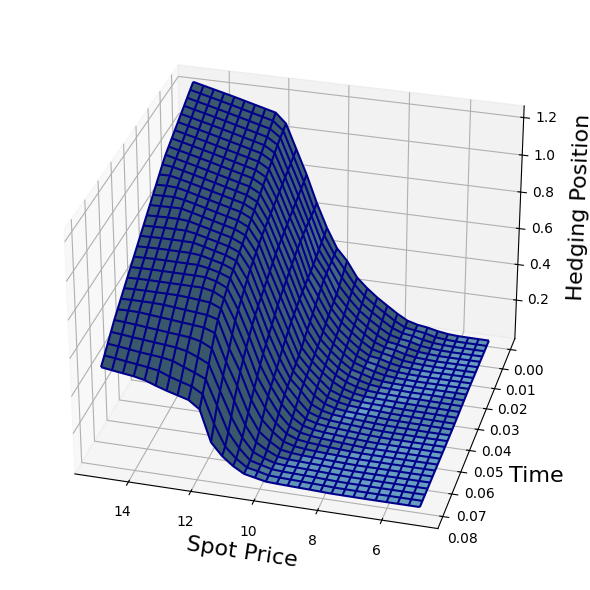

In [6]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid[i,j] = hedge([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)
# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid,color = "lightskyblue")
ax.plot_wireframe(X, Y , grid,color = "darkblue",label = "Hedge")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
#plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_3d_path_dependent.eps', format='eps')
plt.show()

Depict the Hedging Error

In [7]:
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


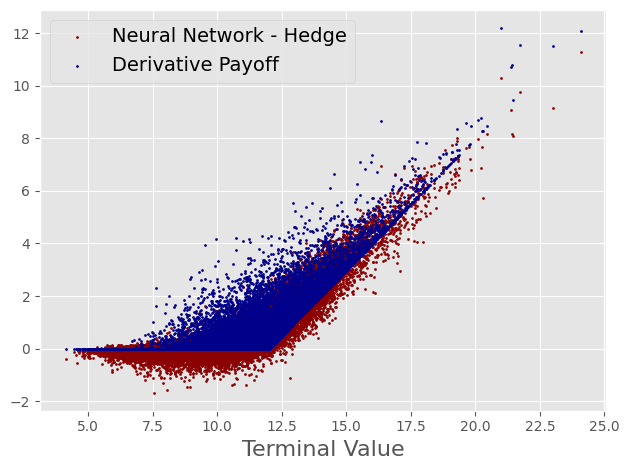

In [8]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend( fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_hedging_mc_path_dependent.eps', format='eps')
plt.show()


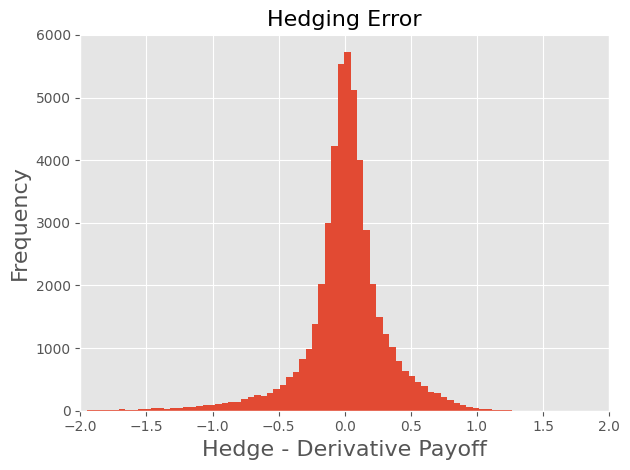

In [9]:
hedging_error = ((price + delta_S) - derivative_on_batch).numpy()
plt.hist(hedging_error,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent.eps', format='eps')
plt.show()


Save the model

In [10]:
hedge.save("model_path_dependent.h5")

## Training of a hedging strategy with fixed Parameters

In [11]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
# Specify parameters as the mean of the respective intervals.
a_0_fix = [0.5,0.5]
a_1_fix = [0.5,0.5]
b_0_fix = [0,0]
b_1_fix = [0,0]
gamma_fix = [1,1]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price_fix, hedge_fix = optimal_hedge(derivative,a_0_fix,a_1_fix,b_0_fix,b_1_fix,gamma_fix,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256)

  0%|          | 11/10000 [00:11<2:26:26,  1.14it/s]

Iteration:10, Price of Hedge: 0.11255252361297607, Loss: 0.12562263011932373


  0%|          | 21/10000 [00:21<2:58:45,  1.07s/it]

Iteration:20, Price of Hedge: 0.12067355215549469, Loss: 0.1775103658437729


  0%|          | 31/10000 [00:32<3:05:47,  1.12s/it]

Iteration:30, Price of Hedge: 0.13462667167186737, Loss: 0.21329505741596222


  0%|          | 41/10000 [00:42<2:52:31,  1.04s/it]

Iteration:40, Price of Hedge: 0.14612852036952972, Loss: 0.10564535856246948


  1%|          | 51/10000 [00:54<3:07:56,  1.13s/it]

Iteration:50, Price of Hedge: 0.15487734973430634, Loss: 0.0822163075208664


  1%|          | 61/10000 [01:05<3:05:23,  1.12s/it]

Iteration:60, Price of Hedge: 0.16147996485233307, Loss: 0.10520676523447037


  1%|          | 71/10000 [01:15<2:24:42,  1.14it/s]

Iteration:70, Price of Hedge: 0.16538892686367035, Loss: 0.12708795070648193


  1%|          | 81/10000 [01:25<2:49:34,  1.03s/it]

Iteration:80, Price of Hedge: 0.16881190240383148, Loss: 0.1284441351890564


  1%|          | 91/10000 [01:35<2:41:41,  1.02it/s]

Iteration:90, Price of Hedge: 0.16819338500499725, Loss: 0.11007026582956314


  1%|          | 101/10000 [01:45<2:58:51,  1.08s/it]

Iteration:100, Price of Hedge: 0.16737805306911469, Loss: 0.08135852217674255


  1%|          | 111/10000 [01:55<2:57:51,  1.08s/it]

Iteration:110, Price of Hedge: 0.16475355625152588, Loss: 0.1547868698835373


  1%|          | 121/10000 [02:05<2:36:01,  1.06it/s]

Iteration:120, Price of Hedge: 0.16497139632701874, Loss: 0.09168088436126709


  1%|▏         | 131/10000 [02:15<2:43:00,  1.01it/s]

Iteration:130, Price of Hedge: 0.16766391694545746, Loss: 0.08161243796348572


  1%|▏         | 141/10000 [02:26<3:24:01,  1.24s/it]

Iteration:140, Price of Hedge: 0.17036773264408112, Loss: 0.08680980652570724


  2%|▏         | 151/10000 [02:37<2:36:23,  1.05it/s]

Iteration:150, Price of Hedge: 0.17295397818088531, Loss: 0.05022657662630081


  2%|▏         | 161/10000 [02:48<3:13:02,  1.18s/it]

Iteration:160, Price of Hedge: 0.1707005649805069, Loss: 0.09391926974058151


  2%|▏         | 171/10000 [03:00<3:25:58,  1.26s/it]

Iteration:170, Price of Hedge: 0.16558054089546204, Loss: 0.13103622198104858


  2%|▏         | 181/10000 [03:10<2:45:26,  1.01s/it]

Iteration:180, Price of Hedge: 0.16662085056304932, Loss: 0.0551258847117424


  2%|▏         | 191/10000 [03:20<2:34:58,  1.05it/s]

Iteration:190, Price of Hedge: 0.16430769860744476, Loss: 0.04784739762544632


  2%|▏         | 201/10000 [03:30<2:56:45,  1.08s/it]

Iteration:200, Price of Hedge: 0.16225489974021912, Loss: 0.09413698315620422


  2%|▏         | 211/10000 [03:39<2:21:53,  1.15it/s]

Iteration:210, Price of Hedge: 0.16494596004486084, Loss: 0.10186879336833954


  2%|▏         | 221/10000 [03:50<2:39:23,  1.02it/s]

Iteration:220, Price of Hedge: 0.16916108131408691, Loss: 0.06319202482700348


  2%|▏         | 231/10000 [03:59<2:41:25,  1.01it/s]

Iteration:230, Price of Hedge: 0.17671775817871094, Loss: 0.08632536232471466


  2%|▏         | 241/10000 [04:10<2:52:16,  1.06s/it]

Iteration:240, Price of Hedge: 0.18001563847064972, Loss: 0.04184117540717125


  3%|▎         | 251/10000 [04:20<2:54:38,  1.07s/it]

Iteration:250, Price of Hedge: 0.17744314670562744, Loss: 0.05822288244962692


  3%|▎         | 261/10000 [04:30<2:55:26,  1.08s/it]

Iteration:260, Price of Hedge: 0.1709998995065689, Loss: 0.05602404475212097


  3%|▎         | 271/10000 [04:41<2:57:51,  1.10s/it]

Iteration:270, Price of Hedge: 0.16513048112392426, Loss: 0.052701983600854874


  3%|▎         | 281/10000 [04:53<3:12:41,  1.19s/it]

Iteration:280, Price of Hedge: 0.16715656220912933, Loss: 0.06587997078895569


  3%|▎         | 291/10000 [05:04<3:03:43,  1.14s/it]

Iteration:290, Price of Hedge: 0.17105932533740997, Loss: 0.0848909392952919


  3%|▎         | 301/10000 [05:14<2:18:48,  1.16it/s]

Iteration:300, Price of Hedge: 0.1744805872440338, Loss: 0.053668975830078125


  3%|▎         | 311/10000 [05:24<2:53:31,  1.07s/it]

Iteration:310, Price of Hedge: 0.16972780227661133, Loss: 0.06445112079381943


  3%|▎         | 321/10000 [05:34<2:35:34,  1.04it/s]

Iteration:320, Price of Hedge: 0.1670769453048706, Loss: 0.04087182134389877


  3%|▎         | 331/10000 [05:44<2:30:20,  1.07it/s]

Iteration:330, Price of Hedge: 0.16556045413017273, Loss: 0.06251168251037598


  3%|▎         | 341/10000 [05:54<2:47:32,  1.04s/it]

Iteration:340, Price of Hedge: 0.16906091570854187, Loss: 0.030707241967320442


  4%|▎         | 351/10000 [06:03<2:16:26,  1.18it/s]

Iteration:350, Price of Hedge: 0.16884037852287292, Loss: 0.026571981608867645


  4%|▎         | 361/10000 [06:14<2:55:59,  1.10s/it]

Iteration:360, Price of Hedge: 0.16949227452278137, Loss: 0.04267992079257965


  4%|▎         | 371/10000 [06:24<2:59:00,  1.12s/it]

Iteration:370, Price of Hedge: 0.17009125649929047, Loss: 0.05265810340642929


  4%|▍         | 381/10000 [06:35<2:31:54,  1.06it/s]

Iteration:380, Price of Hedge: 0.16704505681991577, Loss: 0.05328311026096344


  4%|▍         | 391/10000 [06:46<2:59:31,  1.12s/it]

Iteration:390, Price of Hedge: 0.16080023348331451, Loss: 0.029986293986439705


  4%|▍         | 401/10000 [06:57<3:29:36,  1.31s/it]

Iteration:400, Price of Hedge: 0.16162963211536407, Loss: 0.06619159877300262


  4%|▍         | 411/10000 [07:08<2:25:40,  1.10it/s]

Iteration:410, Price of Hedge: 0.17059838771820068, Loss: 0.03683581203222275


  4%|▍         | 421/10000 [07:18<2:26:09,  1.09it/s]

Iteration:420, Price of Hedge: 0.1747620552778244, Loss: 0.05080917850136757


  4%|▍         | 431/10000 [07:28<2:40:31,  1.01s/it]

Iteration:430, Price of Hedge: 0.1715330332517624, Loss: 0.03915632143616676


  4%|▍         | 441/10000 [07:38<2:45:27,  1.04s/it]

Iteration:440, Price of Hedge: 0.16874289512634277, Loss: 0.07347221672534943


  5%|▍         | 451/10000 [07:48<2:47:22,  1.05s/it]

Iteration:450, Price of Hedge: 0.1722079962491989, Loss: 0.04291326925158501


  5%|▍         | 461/10000 [07:57<2:30:16,  1.06it/s]

Iteration:460, Price of Hedge: 0.16725187003612518, Loss: 0.05673512816429138


  5%|▍         | 471/10000 [08:07<2:16:43,  1.16it/s]

Iteration:470, Price of Hedge: 0.17022715508937836, Loss: 0.04442351311445236


  5%|▍         | 481/10000 [08:18<3:04:47,  1.16s/it]

Iteration:480, Price of Hedge: 0.17147421836853027, Loss: 0.03918180614709854


  5%|▍         | 491/10000 [08:28<2:59:44,  1.13s/it]

Iteration:490, Price of Hedge: 0.17172572016716003, Loss: 0.026463478803634644


  5%|▌         | 501/10000 [08:39<2:37:05,  1.01it/s]

Iteration:500, Price of Hedge: 0.16927962005138397, Loss: 0.055450282990932465


  5%|▌         | 511/10000 [08:50<3:22:38,  1.28s/it]

Iteration:510, Price of Hedge: 0.16983120143413544, Loss: 0.05475615710020065


  5%|▌         | 521/10000 [09:01<2:43:02,  1.03s/it]

Iteration:520, Price of Hedge: 0.16630694270133972, Loss: 0.05276027321815491


  5%|▌         | 531/10000 [09:12<2:42:25,  1.03s/it]

Iteration:530, Price of Hedge: 0.16679465770721436, Loss: 0.04974948614835739


  5%|▌         | 541/10000 [09:22<2:52:48,  1.10s/it]

Iteration:540, Price of Hedge: 0.16957737505435944, Loss: 0.03678356111049652


  6%|▌         | 551/10000 [09:33<2:51:22,  1.09s/it]

Iteration:550, Price of Hedge: 0.17287419736385345, Loss: 0.05012363940477371


  6%|▌         | 561/10000 [09:43<2:29:44,  1.05it/s]

Iteration:560, Price of Hedge: 0.17231814563274384, Loss: 0.04212933033704758


  6%|▌         | 571/10000 [09:53<2:44:57,  1.05s/it]

Iteration:570, Price of Hedge: 0.17217393219470978, Loss: 0.04936506226658821


  6%|▌         | 581/10000 [10:03<2:13:48,  1.17it/s]

Iteration:580, Price of Hedge: 0.17614060640335083, Loss: 0.03964092209935188


  6%|▌         | 591/10000 [10:14<2:51:35,  1.09s/it]

Iteration:590, Price of Hedge: 0.17597031593322754, Loss: 0.03207165375351906


  6%|▌         | 601/10000 [10:23<2:47:04,  1.07s/it]

Iteration:600, Price of Hedge: 0.17055253684520721, Loss: 0.060818225145339966


  6%|▌         | 611/10000 [10:35<2:57:33,  1.13s/it]

Iteration:610, Price of Hedge: 0.16877931356430054, Loss: 0.04001152515411377


  6%|▌         | 621/10000 [10:45<2:33:15,  1.02it/s]

Iteration:620, Price of Hedge: 0.1704661101102829, Loss: 0.03641596436500549


  6%|▋         | 631/10000 [10:56<3:07:50,  1.20s/it]

Iteration:630, Price of Hedge: 0.17201463878154755, Loss: 0.032163288444280624


  6%|▋         | 641/10000 [11:07<2:31:14,  1.03it/s]

Iteration:640, Price of Hedge: 0.17338824272155762, Loss: 0.0555008202791214


  7%|▋         | 651/10000 [11:17<2:23:17,  1.09it/s]

Iteration:650, Price of Hedge: 0.1726311892271042, Loss: 0.03810611367225647


  7%|▋         | 661/10000 [11:27<2:31:03,  1.03it/s]

Iteration:660, Price of Hedge: 0.16847343742847443, Loss: 0.04462994262576103


  7%|▋         | 671/10000 [11:37<2:35:08,  1.00it/s]

Iteration:670, Price of Hedge: 0.16998210549354553, Loss: 0.0294012613594532


  7%|▋         | 681/10000 [11:48<2:46:37,  1.07s/it]

Iteration:680, Price of Hedge: 0.17173558473587036, Loss: 0.03105330653488636


  7%|▋         | 691/10000 [11:57<2:24:52,  1.07it/s]

Iteration:690, Price of Hedge: 0.16866260766983032, Loss: 0.05321318656206131


  7%|▋         | 701/10000 [12:07<2:17:58,  1.12it/s]

Iteration:700, Price of Hedge: 0.1712619960308075, Loss: 0.04838521033525467


  7%|▋         | 711/10000 [12:17<2:49:08,  1.09s/it]

Iteration:710, Price of Hedge: 0.16962915658950806, Loss: 0.030110744759440422


  7%|▋         | 721/10000 [12:27<2:46:57,  1.08s/it]

Iteration:720, Price of Hedge: 0.1675748974084854, Loss: 0.03794126212596893


  7%|▋         | 731/10000 [12:38<2:29:01,  1.04it/s]

Iteration:730, Price of Hedge: 0.17020989954471588, Loss: 0.03138119354844093


  7%|▋         | 741/10000 [12:49<3:15:28,  1.27s/it]

Iteration:740, Price of Hedge: 0.16764549911022186, Loss: 0.040882598608732224


  8%|▊         | 751/10000 [13:00<2:40:06,  1.04s/it]

Iteration:750, Price of Hedge: 0.163858562707901, Loss: 0.03354579955339432


  8%|▊         | 761/10000 [13:12<2:51:13,  1.11s/it]

Iteration:760, Price of Hedge: 0.1682257354259491, Loss: 0.06088699772953987


  8%|▊         | 771/10000 [13:22<2:51:22,  1.11s/it]

Iteration:770, Price of Hedge: 0.17122435569763184, Loss: 0.03973251208662987


  8%|▊         | 781/10000 [13:31<2:19:21,  1.10it/s]

Iteration:780, Price of Hedge: 0.16873037815093994, Loss: 0.03449932858347893


  8%|▊         | 791/10000 [13:41<2:20:48,  1.09it/s]

Iteration:790, Price of Hedge: 0.16462351381778717, Loss: 0.03319855034351349


  8%|▊         | 801/10000 [13:51<2:19:15,  1.10it/s]

Iteration:800, Price of Hedge: 0.17148925364017487, Loss: 0.04472128301858902


  8%|▊         | 811/10000 [14:01<2:36:03,  1.02s/it]

Iteration:810, Price of Hedge: 0.1766437292098999, Loss: 0.04372858256101608


  8%|▊         | 821/10000 [14:11<2:52:53,  1.13s/it]

Iteration:820, Price of Hedge: 0.16977918148040771, Loss: 0.034056052565574646


  8%|▊         | 831/10000 [14:21<2:34:47,  1.01s/it]

Iteration:830, Price of Hedge: 0.1654530167579651, Loss: 0.0510883629322052


  8%|▊         | 841/10000 [14:31<2:40:57,  1.05s/it]

Iteration:840, Price of Hedge: 0.1689402312040329, Loss: 0.03140483796596527


  9%|▊         | 851/10000 [14:43<3:07:45,  1.23s/it]

Iteration:850, Price of Hedge: 0.1743323802947998, Loss: 0.037684205919504166


  9%|▊         | 861/10000 [14:53<2:45:50,  1.09s/it]

Iteration:860, Price of Hedge: 0.17192788422107697, Loss: 0.05040591210126877


  9%|▊         | 871/10000 [15:05<3:03:41,  1.21s/it]

Iteration:870, Price of Hedge: 0.1650322675704956, Loss: 0.06921956688165665


  9%|▉         | 881/10000 [15:15<2:37:10,  1.03s/it]

Iteration:880, Price of Hedge: 0.16410653293132782, Loss: 0.03066961094737053


  9%|▉         | 891/10000 [15:25<2:12:13,  1.15it/s]

Iteration:890, Price of Hedge: 0.16259445250034332, Loss: 0.05037975683808327


  9%|▉         | 901/10000 [15:35<2:13:28,  1.14it/s]

Iteration:900, Price of Hedge: 0.16204044222831726, Loss: 0.035126764327287674


  9%|▉         | 911/10000 [15:45<2:52:00,  1.14s/it]

Iteration:910, Price of Hedge: 0.16797225177288055, Loss: 0.033305875957012177


  9%|▉         | 921/10000 [15:56<2:33:08,  1.01s/it]

Iteration:920, Price of Hedge: 0.17676834762096405, Loss: 0.031707823276519775


  9%|▉         | 931/10000 [16:06<2:19:28,  1.08it/s]

Iteration:930, Price of Hedge: 0.1786021739244461, Loss: 0.02882871776819229


  9%|▉         | 941/10000 [16:15<2:22:10,  1.06it/s]

Iteration:940, Price of Hedge: 0.176662877202034, Loss: 0.039852723479270935


 10%|▉         | 951/10000 [16:25<2:17:41,  1.10it/s]

Iteration:950, Price of Hedge: 0.173071026802063, Loss: 0.020773231983184814


 10%|▉         | 961/10000 [16:37<2:39:02,  1.06s/it]

Iteration:960, Price of Hedge: 0.1689990758895874, Loss: 0.0449208989739418


 10%|▉         | 971/10000 [16:46<2:13:49,  1.12it/s]

Iteration:970, Price of Hedge: 0.16529974341392517, Loss: 0.040312424302101135


 10%|▉         | 981/10000 [16:58<2:46:24,  1.11s/it]

Iteration:980, Price of Hedge: 0.17179825901985168, Loss: 0.059497397392988205


 10%|▉         | 991/10000 [17:10<2:58:05,  1.19s/it]

Iteration:990, Price of Hedge: 0.1728757917881012, Loss: 0.04518235847353935


 10%|█         | 1001/10000 [17:20<2:41:41,  1.08s/it]

Iteration:1000, Price of Hedge: 0.1722947657108307, Loss: 0.039090871810913086


 10%|█         | 1011/10000 [17:30<2:15:41,  1.10it/s]

Iteration:1010, Price of Hedge: 0.17132535576820374, Loss: 0.029847491532564163


 10%|█         | 1021/10000 [17:41<2:54:01,  1.16s/it]

Iteration:1020, Price of Hedge: 0.1686185747385025, Loss: 0.02984512969851494


 10%|█         | 1031/10000 [17:51<2:45:36,  1.11s/it]

Iteration:1030, Price of Hedge: 0.1689743846654892, Loss: 0.03658600151538849


 10%|█         | 1041/10000 [18:01<2:10:32,  1.14it/s]

Iteration:1040, Price of Hedge: 0.16880278289318085, Loss: 0.03490356355905533


 11%|█         | 1051/10000 [18:11<2:39:53,  1.07s/it]

Iteration:1050, Price of Hedge: 0.1659165322780609, Loss: 0.03878261521458626


 11%|█         | 1061/10000 [18:20<2:20:23,  1.06it/s]

Iteration:1060, Price of Hedge: 0.17034636437892914, Loss: 0.0319676548242569


 11%|█         | 1071/10000 [18:32<2:41:16,  1.08s/it]

Iteration:1070, Price of Hedge: 0.16602471470832825, Loss: 0.03165599703788757


 11%|█         | 1081/10000 [18:43<2:58:56,  1.20s/it]

Iteration:1080, Price of Hedge: 0.16823521256446838, Loss: 0.03162769973278046


 11%|█         | 1091/10000 [18:53<2:52:39,  1.16s/it]

Iteration:1090, Price of Hedge: 0.1679973602294922, Loss: 0.03234989196062088


 11%|█         | 1101/10000 [19:05<2:53:23,  1.17s/it]

Iteration:1100, Price of Hedge: 0.1687924861907959, Loss: 0.03708045929670334


 11%|█         | 1111/10000 [19:16<2:40:03,  1.08s/it]

Iteration:1110, Price of Hedge: 0.17637696862220764, Loss: 0.026218611747026443


 11%|█         | 1121/10000 [19:25<2:23:08,  1.03it/s]

Iteration:1120, Price of Hedge: 0.17171552777290344, Loss: 0.028635483235120773


 11%|█▏        | 1131/10000 [19:35<2:10:03,  1.14it/s]

Iteration:1130, Price of Hedge: 0.17079657316207886, Loss: 0.03431667387485504


 11%|█▏        | 1141/10000 [19:46<2:48:48,  1.14s/it]

Iteration:1140, Price of Hedge: 0.1683826893568039, Loss: 0.023529624566435814


 12%|█▏        | 1151/10000 [19:55<2:27:31,  1.00s/it]

Iteration:1150, Price of Hedge: 0.16763342916965485, Loss: 0.0363551527261734


 12%|█▏        | 1161/10000 [20:06<2:26:45,  1.00it/s]

Iteration:1160, Price of Hedge: 0.17113155126571655, Loss: 0.041728146374225616


 12%|█▏        | 1171/10000 [20:16<2:34:49,  1.05s/it]

Iteration:1170, Price of Hedge: 0.17052136361598969, Loss: 0.06830036640167236


 12%|█▏        | 1181/10000 [20:25<2:03:18,  1.19it/s]

Iteration:1180, Price of Hedge: 0.1722399741411209, Loss: 0.02630113810300827


 12%|█▏        | 1191/10000 [20:37<2:43:31,  1.11s/it]

Iteration:1190, Price of Hedge: 0.16521303355693817, Loss: 0.03952816128730774


 12%|█▏        | 1201/10000 [20:47<2:23:31,  1.02it/s]

Iteration:1200, Price of Hedge: 0.1665605902671814, Loss: 0.025296617299318314


 12%|█▏        | 1211/10000 [20:59<2:48:31,  1.15s/it]

Iteration:1210, Price of Hedge: 0.16542349755764008, Loss: 0.02341768518090248


 12%|█▏        | 1221/10000 [21:11<2:59:33,  1.23s/it]

Iteration:1220, Price of Hedge: 0.17018242180347443, Loss: 0.04069599509239197


 12%|█▏        | 1231/10000 [21:21<2:50:17,  1.17s/it]

Iteration:1230, Price of Hedge: 0.17177587747573853, Loss: 0.03908068314194679


 12%|█▏        | 1241/10000 [21:31<2:08:38,  1.13it/s]

Iteration:1240, Price of Hedge: 0.16989558935165405, Loss: 0.021430842578411102


 13%|█▎        | 1251/10000 [21:41<2:19:45,  1.04it/s]

Iteration:1250, Price of Hedge: 0.1699516624212265, Loss: 0.03337542712688446


 13%|█▎        | 1261/10000 [21:51<2:29:34,  1.03s/it]

Iteration:1260, Price of Hedge: 0.16584990918636322, Loss: 0.030110254883766174


 13%|█▎        | 1271/10000 [22:01<2:22:31,  1.02it/s]

Iteration:1270, Price of Hedge: 0.166520357131958, Loss: 0.03400164097547531


 13%|█▎        | 1281/10000 [22:11<2:35:20,  1.07s/it]

Iteration:1280, Price of Hedge: 0.16796845197677612, Loss: 0.01906880922615528


 13%|█▎        | 1291/10000 [22:20<2:04:55,  1.16it/s]

Iteration:1290, Price of Hedge: 0.1731148064136505, Loss: 0.023441635072231293


 13%|█▎        | 1301/10000 [22:31<2:50:33,  1.18s/it]

Iteration:1300, Price of Hedge: 0.1777898073196411, Loss: 0.023643795400857925


 13%|█▎        | 1311/10000 [22:42<2:37:22,  1.09s/it]

Iteration:1310, Price of Hedge: 0.17750591039657593, Loss: 0.02431803196668625


 13%|█▎        | 1321/10000 [22:53<2:35:27,  1.07s/it]

Iteration:1320, Price of Hedge: 0.16750624775886536, Loss: 0.034288909286260605


 13%|█▎        | 1331/10000 [23:05<2:40:25,  1.11s/it]

Iteration:1330, Price of Hedge: 0.16608458757400513, Loss: 0.020128777250647545


 13%|█▎        | 1341/10000 [23:16<2:41:09,  1.12s/it]

Iteration:1340, Price of Hedge: 0.17001128196716309, Loss: 0.02457740530371666


 14%|█▎        | 1351/10000 [23:25<2:17:29,  1.05it/s]

Iteration:1350, Price of Hedge: 0.17183247208595276, Loss: 0.04459468275308609


 14%|█▎        | 1361/10000 [23:35<2:08:52,  1.12it/s]

Iteration:1360, Price of Hedge: 0.16650110483169556, Loss: 0.025655098259449005


 14%|█▎        | 1371/10000 [23:45<2:41:37,  1.12s/it]

Iteration:1370, Price of Hedge: 0.16774050891399384, Loss: 0.04923677444458008


 14%|█▍        | 1381/10000 [23:55<2:24:49,  1.01s/it]

Iteration:1380, Price of Hedge: 0.1712951958179474, Loss: 0.02281411737203598


 14%|█▍        | 1391/10000 [24:05<2:22:02,  1.01it/s]

Iteration:1390, Price of Hedge: 0.17067371308803558, Loss: 0.029182234779000282


 14%|█▍        | 1401/10000 [24:15<2:23:32,  1.00s/it]

Iteration:1400, Price of Hedge: 0.16621248424053192, Loss: 0.03725408762693405


 14%|█▍        | 1411/10000 [24:25<2:02:16,  1.17it/s]

Iteration:1410, Price of Hedge: 0.16694976389408112, Loss: 0.03584183380007744


 14%|█▍        | 1421/10000 [24:37<2:42:46,  1.14s/it]

Iteration:1420, Price of Hedge: 0.17159155011177063, Loss: 0.022102147340774536


 14%|█▍        | 1431/10000 [24:46<2:08:57,  1.11it/s]

Iteration:1430, Price of Hedge: 0.1696183830499649, Loss: 0.0362083837389946


 14%|█▍        | 1441/10000 [24:58<2:44:15,  1.15s/it]

Iteration:1440, Price of Hedge: 0.1697562336921692, Loss: 0.03289881348609924


 15%|█▍        | 1451/10000 [25:10<2:52:31,  1.21s/it]

Iteration:1450, Price of Hedge: 0.17323479056358337, Loss: 0.040992941707372665


 15%|█▍        | 1461/10000 [25:19<2:32:33,  1.07s/it]

Iteration:1460, Price of Hedge: 0.17329256236553192, Loss: 0.04212062060832977


 15%|█▍        | 1471/10000 [25:29<2:06:33,  1.12it/s]

Iteration:1470, Price of Hedge: 0.17616626620292664, Loss: 0.022863060235977173


 15%|█▍        | 1481/10000 [25:39<2:31:48,  1.07s/it]

Iteration:1480, Price of Hedge: 0.17047493159770966, Loss: 0.03720974922180176


 15%|█▍        | 1491/10000 [25:48<2:07:52,  1.11it/s]

Iteration:1490, Price of Hedge: 0.17114563286304474, Loss: 0.032434336841106415


 15%|█▌        | 1501/10000 [25:59<2:24:03,  1.02s/it]

Iteration:1500, Price of Hedge: 0.16823166608810425, Loss: 0.027084529399871826


 15%|█▌        | 1511/10000 [26:09<2:35:07,  1.10s/it]

Iteration:1510, Price of Hedge: 0.1738124042749405, Loss: 0.02240832708775997


 15%|█▌        | 1521/10000 [26:18<2:02:59,  1.15it/s]

Iteration:1520, Price of Hedge: 0.17231842875480652, Loss: 0.04512183368206024


 15%|█▌        | 1531/10000 [26:29<2:40:59,  1.14s/it]

Iteration:1530, Price of Hedge: 0.1627417355775833, Loss: 0.031640466302633286


 15%|█▌        | 1541/10000 [26:40<2:32:42,  1.08s/it]

Iteration:1540, Price of Hedge: 0.16670702397823334, Loss: 0.018510757014155388


 16%|█▌        | 1551/10000 [26:50<2:01:06,  1.16it/s]

Iteration:1550, Price of Hedge: 0.16680200397968292, Loss: 0.03790481388568878


 16%|█▌        | 1561/10000 [27:02<2:41:29,  1.15s/it]

Iteration:1560, Price of Hedge: 0.17006051540374756, Loss: 0.03417353704571724


 16%|█▌        | 1571/10000 [27:14<2:57:05,  1.26s/it]

Iteration:1570, Price of Hedge: 0.17565102875232697, Loss: 0.04305056855082512


 16%|█▌        | 1581/10000 [27:24<2:21:09,  1.01s/it]

Iteration:1580, Price of Hedge: 0.1718570739030838, Loss: 0.016320044174790382


 16%|█▌        | 1591/10000 [27:33<2:08:25,  1.09it/s]

Iteration:1590, Price of Hedge: 0.173321932554245, Loss: 0.023933643475174904


 16%|█▌        | 1601/10000 [27:43<2:10:03,  1.08it/s]

Iteration:1600, Price of Hedge: 0.16896387934684753, Loss: 0.04045679420232773


 16%|█▌        | 1611/10000 [27:53<2:11:51,  1.06it/s]

Iteration:1610, Price of Hedge: 0.16652095317840576, Loss: 0.022816544398665428


 16%|█▌        | 1621/10000 [28:04<2:40:51,  1.15s/it]

Iteration:1620, Price of Hedge: 0.17252402007579803, Loss: 0.03773825615644455


 16%|█▋        | 1631/10000 [28:13<2:24:28,  1.04s/it]

Iteration:1630, Price of Hedge: 0.16642586886882782, Loss: 0.032840266823768616


 16%|█▋        | 1641/10000 [28:23<2:00:23,  1.16it/s]

Iteration:1640, Price of Hedge: 0.17431986331939697, Loss: 0.061894286423921585


 17%|█▋        | 1651/10000 [28:34<3:05:40,  1.33s/it]

Iteration:1650, Price of Hedge: 0.17647306621074677, Loss: 0.05637487769126892


 17%|█▋        | 1661/10000 [28:44<2:04:42,  1.11it/s]

Iteration:1660, Price of Hedge: 0.173227459192276, Loss: 0.045111581683158875


 17%|█▋        | 1671/10000 [28:55<2:31:00,  1.09s/it]

Iteration:1670, Price of Hedge: 0.1684008091688156, Loss: 0.0398426353931427


 17%|█▋        | 1681/10000 [29:07<2:49:28,  1.22s/it]

Iteration:1680, Price of Hedge: 0.17160235345363617, Loss: 0.0468265600502491


 17%|█▋        | 1691/10000 [29:17<2:07:28,  1.09it/s]

Iteration:1690, Price of Hedge: 0.1697852462530136, Loss: 0.034322984516620636


 17%|█▋        | 1701/10000 [29:28<2:26:14,  1.06s/it]

Iteration:1700, Price of Hedge: 0.17272678017616272, Loss: 0.030610255897045135


 17%|█▋        | 1711/10000 [29:37<2:21:48,  1.03s/it]

Iteration:1710, Price of Hedge: 0.16782797873020172, Loss: 0.038304030895233154


 17%|█▋        | 1721/10000 [29:47<1:56:18,  1.19it/s]

Iteration:1720, Price of Hedge: 0.1713809072971344, Loss: 0.02323714643716812


 17%|█▋        | 1731/10000 [29:58<2:33:53,  1.12s/it]

Iteration:1730, Price of Hedge: 0.1756865233182907, Loss: 0.01710994727909565


 17%|█▋        | 1741/10000 [30:07<2:22:01,  1.03s/it]

Iteration:1740, Price of Hedge: 0.1701483428478241, Loss: 0.026996729895472527


 18%|█▊        | 1751/10000 [30:17<1:56:58,  1.18it/s]

Iteration:1750, Price of Hedge: 0.17225487530231476, Loss: 0.02582787722349167


 18%|█▊        | 1761/10000 [30:27<2:35:19,  1.13s/it]

Iteration:1760, Price of Hedge: 0.16914667189121246, Loss: 0.034426167607307434


 18%|█▊        | 1771/10000 [30:38<2:17:08,  1.00it/s]

Iteration:1770, Price of Hedge: 0.16533462703227997, Loss: 0.024443544447422028


 18%|█▊        | 1781/10000 [30:48<2:08:32,  1.07it/s]

Iteration:1780, Price of Hedge: 0.1758042424917221, Loss: 0.05563622713088989


 18%|█▊        | 1791/10000 [31:00<2:44:19,  1.20s/it]

Iteration:1790, Price of Hedge: 0.18133635818958282, Loss: 0.032320182770490646


 18%|█▊        | 1801/10000 [31:12<2:57:25,  1.30s/it]

Iteration:1800, Price of Hedge: 0.1668679267168045, Loss: 0.022973939776420593


 18%|█▊        | 1811/10000 [31:21<2:06:27,  1.08it/s]

Iteration:1810, Price of Hedge: 0.16383706033229828, Loss: 0.03874985873699188


 18%|█▊        | 1821/10000 [31:31<2:18:01,  1.01s/it]

Iteration:1820, Price of Hedge: 0.17187811434268951, Loss: 0.04249948263168335


 18%|█▊        | 1831/10000 [31:41<1:52:56,  1.21it/s]

Iteration:1830, Price of Hedge: 0.17134706676006317, Loss: 0.046585723757743835


 18%|█▊        | 1841/10000 [31:51<2:18:12,  1.02s/it]

Iteration:1840, Price of Hedge: 0.1692240685224533, Loss: 0.042559996247291565


 19%|█▊        | 1851/10000 [32:01<2:35:52,  1.15s/it]

Iteration:1850, Price of Hedge: 0.17247360944747925, Loss: 0.017688408493995667


 19%|█▊        | 1861/10000 [32:11<2:02:21,  1.11it/s]

Iteration:1860, Price of Hedge: 0.1764826476573944, Loss: 0.041791293770074844


 19%|█▊        | 1871/10000 [32:21<2:07:30,  1.06it/s]

Iteration:1870, Price of Hedge: 0.17161506414413452, Loss: 0.027018925175070763


 19%|█▉        | 1881/10000 [32:31<2:24:18,  1.07s/it]

Iteration:1880, Price of Hedge: 0.17277969419956207, Loss: 0.028757799416780472


 19%|█▉        | 1891/10000 [32:42<2:11:01,  1.03it/s]

Iteration:1890, Price of Hedge: 0.17662343382835388, Loss: 0.027747243642807007


 19%|█▉        | 1901/10000 [32:52<2:06:24,  1.07it/s]

Iteration:1900, Price of Hedge: 0.1731942594051361, Loss: 0.03455746918916702


 19%|█▉        | 1911/10000 [33:04<2:45:31,  1.23s/it]

Iteration:1910, Price of Hedge: 0.1650737076997757, Loss: 0.041736356914043427


 19%|█▉        | 1921/10000 [33:15<2:17:55,  1.02s/it]

Iteration:1920, Price of Hedge: 0.16821905970573425, Loss: 0.01835727132856846


 19%|█▉        | 1931/10000 [33:26<2:17:09,  1.02s/it]

Iteration:1930, Price of Hedge: 0.17402173578739166, Loss: 0.020887630060315132


 19%|█▉        | 1941/10000 [33:35<2:19:12,  1.04s/it]

Iteration:1940, Price of Hedge: 0.17075033485889435, Loss: 0.022947872057557106


 20%|█▉        | 1951/10000 [33:45<2:00:31,  1.11it/s]

Iteration:1950, Price of Hedge: 0.16725146770477295, Loss: 0.03827599436044693


 20%|█▉        | 1961/10000 [33:56<2:25:05,  1.08s/it]

Iteration:1960, Price of Hedge: 0.1635887622833252, Loss: 0.0294443778693676


 20%|█▉        | 1971/10000 [34:05<2:01:55,  1.10it/s]

Iteration:1970, Price of Hedge: 0.17534853518009186, Loss: 0.030656978487968445


 20%|█▉        | 1981/10000 [34:16<2:19:01,  1.04s/it]

Iteration:1980, Price of Hedge: 0.1769697666168213, Loss: 0.035587407648563385


 20%|█▉        | 1991/10000 [34:25<2:24:46,  1.08s/it]

Iteration:1990, Price of Hedge: 0.17132291197776794, Loss: 0.04987525939941406


 20%|██        | 2001/10000 [34:36<2:24:21,  1.08s/it]

Iteration:2000, Price of Hedge: 0.16981546580791473, Loss: 0.019592929631471634


 20%|██        | 2011/10000 [34:47<2:10:54,  1.02it/s]

Iteration:2010, Price of Hedge: 0.1722916215658188, Loss: 0.03074820712208748


 20%|██        | 2021/10000 [34:57<2:38:59,  1.20s/it]

Iteration:2020, Price of Hedge: 0.17097912728786469, Loss: 0.030838608741760254


 20%|██        | 2031/10000 [35:09<2:24:15,  1.09s/it]

Iteration:2030, Price of Hedge: 0.1727442443370819, Loss: 0.0391082763671875


 20%|██        | 2041/10000 [35:19<2:10:06,  1.02it/s]

Iteration:2040, Price of Hedge: 0.17406991124153137, Loss: 0.02228616550564766


 21%|██        | 2051/10000 [35:30<2:30:42,  1.14s/it]

Iteration:2050, Price of Hedge: 0.17506380379199982, Loss: 0.04227737709879875


 21%|██        | 2061/10000 [35:39<2:18:54,  1.05s/it]

Iteration:2060, Price of Hedge: 0.16722148656845093, Loss: 0.035861771553754807


 21%|██        | 2071/10000 [35:49<2:07:09,  1.04it/s]

Iteration:2070, Price of Hedge: 0.16876032948493958, Loss: 0.03432187810540199


 21%|██        | 2081/10000 [35:59<2:06:15,  1.05it/s]

Iteration:2080, Price of Hedge: 0.17447422444820404, Loss: 0.030933121219277382


 21%|██        | 2091/10000 [36:08<1:53:01,  1.17it/s]

Iteration:2090, Price of Hedge: 0.18033643066883087, Loss: 0.03423839062452316


 21%|██        | 2101/10000 [36:19<2:32:53,  1.16s/it]

Iteration:2100, Price of Hedge: 0.1655118316411972, Loss: 0.03329598158597946


 21%|██        | 2111/10000 [36:29<2:17:12,  1.04s/it]

Iteration:2110, Price of Hedge: 0.1605844348669052, Loss: 0.03963419049978256


 21%|██        | 2121/10000 [36:40<2:24:30,  1.10s/it]

Iteration:2120, Price of Hedge: 0.17724613845348358, Loss: 0.02686692401766777


 21%|██▏       | 2131/10000 [36:51<2:36:03,  1.19s/it]

Iteration:2130, Price of Hedge: 0.17491300404071808, Loss: 0.03139428049325943


 21%|██▏       | 2141/10000 [37:02<2:45:12,  1.26s/it]

Iteration:2140, Price of Hedge: 0.16668640077114105, Loss: 0.02571447752416134


 22%|██▏       | 2151/10000 [37:15<2:12:45,  1.01s/it]

Iteration:2150, Price of Hedge: 0.1671045422554016, Loss: 0.038010504096746445


 22%|██▏       | 2161/10000 [37:26<2:25:20,  1.11s/it]

Iteration:2160, Price of Hedge: 0.16972780227661133, Loss: 0.04082198441028595


 22%|██▏       | 2171/10000 [37:35<2:24:24,  1.11s/it]

Iteration:2170, Price of Hedge: 0.17252792418003082, Loss: 0.02976725623011589


 22%|██▏       | 2181/10000 [37:45<1:55:17,  1.13it/s]

Iteration:2180, Price of Hedge: 0.17432671785354614, Loss: 0.023889463394880295


 22%|██▏       | 2191/10000 [37:56<2:19:49,  1.07s/it]

Iteration:2190, Price of Hedge: 0.162741556763649, Loss: 0.056338876485824585


 22%|██▏       | 2201/10000 [38:06<2:19:14,  1.07s/it]

Iteration:2200, Price of Hedge: 0.17365682125091553, Loss: 0.03574962168931961


 22%|██▏       | 2211/10000 [38:16<2:04:30,  1.04it/s]

Iteration:2210, Price of Hedge: 0.17456503212451935, Loss: 0.05757269635796547


 22%|██▏       | 2221/10000 [38:28<2:42:32,  1.25s/it]

Iteration:2220, Price of Hedge: 0.17165301740169525, Loss: 0.051844388246536255


 22%|██▏       | 2231/10000 [38:40<3:01:37,  1.40s/it]

Iteration:2230, Price of Hedge: 0.16937404870986938, Loss: 0.021540407091379166


 22%|██▏       | 2241/10000 [38:51<2:11:50,  1.02s/it]

Iteration:2240, Price of Hedge: 0.16959348320960999, Loss: 0.04710923507809639


 23%|██▎       | 2251/10000 [39:05<2:32:59,  1.18s/it]

Iteration:2250, Price of Hedge: 0.1722010225057602, Loss: 0.026418544352054596


 23%|██▎       | 2261/10000 [39:17<2:18:19,  1.07s/it]

Iteration:2260, Price of Hedge: 0.17102031409740448, Loss: 0.03186602517962456


 23%|██▎       | 2271/10000 [39:27<2:10:05,  1.01s/it]

Iteration:2270, Price of Hedge: 0.17226079106330872, Loss: 0.0364920012652874


 23%|██▎       | 2281/10000 [39:38<2:12:05,  1.03s/it]

Iteration:2280, Price of Hedge: 0.1745120882987976, Loss: 0.036932967603206635


 23%|██▎       | 2291/10000 [39:49<2:15:34,  1.06s/it]

Iteration:2290, Price of Hedge: 0.16763685643672943, Loss: 0.04275980964303017


 23%|██▎       | 2301/10000 [39:59<2:04:08,  1.03it/s]

Iteration:2300, Price of Hedge: 0.16708986461162567, Loss: 0.04143036529421806


 23%|██▎       | 2311/10000 [40:09<2:09:58,  1.01s/it]

Iteration:2310, Price of Hedge: 0.17535318434238434, Loss: 0.03122786059975624


 23%|██▎       | 2321/10000 [40:20<2:18:15,  1.08s/it]

Iteration:2320, Price of Hedge: 0.17756883800029755, Loss: 0.042895134538412094


 23%|██▎       | 2331/10000 [40:30<2:24:13,  1.13s/it]

Iteration:2330, Price of Hedge: 0.17679038643836975, Loss: 0.026547353714704514


 23%|██▎       | 2341/10000 [40:43<2:16:37,  1.07s/it]

Iteration:2340, Price of Hedge: 0.17315159738063812, Loss: 0.032766737043857574


 24%|██▎       | 2351/10000 [40:55<2:28:55,  1.17s/it]

Iteration:2350, Price of Hedge: 0.16631142795085907, Loss: 0.02637895941734314


 24%|██▎       | 2361/10000 [41:09<3:01:55,  1.43s/it]

Iteration:2360, Price of Hedge: 0.16709154844284058, Loss: 0.022897593677043915


 24%|██▎       | 2371/10000 [41:20<2:23:51,  1.13s/it]

Iteration:2370, Price of Hedge: 0.17082980275154114, Loss: 0.028851421549916267


 24%|██▍       | 2381/10000 [41:31<2:20:19,  1.11s/it]

Iteration:2380, Price of Hedge: 0.17156708240509033, Loss: 0.03715830296278


 24%|██▍       | 2391/10000 [41:41<2:07:04,  1.00s/it]

Iteration:2390, Price of Hedge: 0.16812632977962494, Loss: 0.025672484189271927


 24%|██▍       | 2401/10000 [41:50<1:54:58,  1.10it/s]

Iteration:2400, Price of Hedge: 0.1752997189760208, Loss: 0.019690491259098053


 24%|██▍       | 2411/10000 [42:01<2:01:50,  1.04it/s]

Iteration:2410, Price of Hedge: 0.17619459331035614, Loss: 0.02496248483657837


 24%|██▍       | 2421/10000 [42:11<2:25:15,  1.15s/it]

Iteration:2420, Price of Hedge: 0.17327368259429932, Loss: 0.03795302286744118


 24%|██▍       | 2431/10000 [42:21<2:06:15,  1.00s/it]

Iteration:2430, Price of Hedge: 0.16915105283260345, Loss: 0.03262021020054817


 24%|██▍       | 2441/10000 [42:31<1:53:44,  1.11it/s]

Iteration:2440, Price of Hedge: 0.17071424424648285, Loss: 0.036866605281829834


 25%|██▍       | 2451/10000 [42:43<2:42:09,  1.29s/it]

Iteration:2450, Price of Hedge: 0.17508748173713684, Loss: 0.04056734964251518


 25%|██▍       | 2461/10000 [42:52<2:05:12,  1.00it/s]

Iteration:2460, Price of Hedge: 0.17605671286582947, Loss: 0.034625232219696045


 25%|██▍       | 2471/10000 [43:03<2:19:35,  1.11s/it]

Iteration:2470, Price of Hedge: 0.16915693879127502, Loss: 0.0367988646030426


 25%|██▍       | 2481/10000 [43:15<2:32:54,  1.22s/it]

Iteration:2480, Price of Hedge: 0.1711391806602478, Loss: 0.04263635724782944


 25%|██▍       | 2491/10000 [43:24<1:53:15,  1.10it/s]

Iteration:2490, Price of Hedge: 0.1666834056377411, Loss: 0.02794661372900009


 25%|██▌       | 2501/10000 [43:35<2:11:17,  1.05s/it]

Iteration:2500, Price of Hedge: 0.17457690834999084, Loss: 0.024590685963630676


 25%|██▌       | 2511/10000 [43:45<2:16:49,  1.10s/it]

Iteration:2510, Price of Hedge: 0.17430226504802704, Loss: 0.02488972619175911


 25%|██▌       | 2521/10000 [43:57<2:28:41,  1.19s/it]

Iteration:2520, Price of Hedge: 0.16309824585914612, Loss: 0.035163745284080505


 25%|██▌       | 2531/10000 [44:08<2:08:06,  1.03s/it]

Iteration:2530, Price of Hedge: 0.16243763267993927, Loss: 0.025056142359972


 25%|██▌       | 2541/10000 [44:19<2:29:21,  1.20s/it]

Iteration:2540, Price of Hedge: 0.16547459363937378, Loss: 0.027573496103286743


 26%|██▌       | 2551/10000 [44:28<2:10:31,  1.05s/it]

Iteration:2550, Price of Hedge: 0.16965049505233765, Loss: 0.028159935027360916


 26%|██▌       | 2561/10000 [44:39<2:13:57,  1.08s/it]

Iteration:2560, Price of Hedge: 0.17503221333026886, Loss: 0.028057891875505447


 26%|██▌       | 2571/10000 [44:49<2:24:55,  1.17s/it]

Iteration:2570, Price of Hedge: 0.16899511218070984, Loss: 0.020784426480531693


 26%|██▌       | 2581/10000 [44:59<2:17:21,  1.11s/it]

Iteration:2580, Price of Hedge: 0.1701914370059967, Loss: 0.01925494521856308


 26%|██▌       | 2591/10000 [45:11<2:29:55,  1.21s/it]

Iteration:2590, Price of Hedge: 0.17610332369804382, Loss: 0.026029661297798157


 26%|██▌       | 2601/10000 [45:23<2:27:01,  1.19s/it]

Iteration:2600, Price of Hedge: 0.17354139685630798, Loss: 0.041254010051488876


 26%|██▌       | 2611/10000 [45:33<2:00:22,  1.02it/s]

Iteration:2610, Price of Hedge: 0.166199192404747, Loss: 0.05500219762325287


 26%|██▌       | 2621/10000 [45:43<2:00:28,  1.02it/s]

Iteration:2620, Price of Hedge: 0.17397399246692657, Loss: 0.02451242320239544


 26%|██▋       | 2631/10000 [45:53<2:10:04,  1.06s/it]

Iteration:2630, Price of Hedge: 0.17281122505664825, Loss: 0.028401870280504227


 26%|██▋       | 2641/10000 [46:03<1:46:55,  1.15it/s]

Iteration:2640, Price of Hedge: 0.17359767854213715, Loss: 0.028278402984142303


 27%|██▋       | 2651/10000 [46:14<2:15:23,  1.11s/it]

Iteration:2650, Price of Hedge: 0.17399723827838898, Loss: 0.034445010125637054


 27%|██▋       | 2661/10000 [46:23<2:14:00,  1.10s/it]

Iteration:2660, Price of Hedge: 0.1679043024778366, Loss: 0.027999738231301308


 27%|██▋       | 2671/10000 [46:33<1:56:52,  1.05it/s]

Iteration:2670, Price of Hedge: 0.16526518762111664, Loss: 0.02663920447230339


 27%|██▋       | 2681/10000 [46:45<2:12:15,  1.08s/it]

Iteration:2680, Price of Hedge: 0.17255249619483948, Loss: 0.04268842563033104


 27%|██▋       | 2691/10000 [46:54<1:56:43,  1.04it/s]

Iteration:2690, Price of Hedge: 0.17273639142513275, Loss: 0.02867966890335083


 27%|██▋       | 2701/10000 [47:06<2:25:47,  1.20s/it]

Iteration:2700, Price of Hedge: 0.1700199842453003, Loss: 0.03345419466495514


 27%|██▋       | 2711/10000 [47:17<2:28:41,  1.22s/it]

Iteration:2710, Price of Hedge: 0.16364885866641998, Loss: 0.017955493181943893


 27%|██▋       | 2721/10000 [47:27<2:13:46,  1.10s/it]

Iteration:2720, Price of Hedge: 0.1737160086631775, Loss: 0.018445629626512527


 27%|██▋       | 2731/10000 [47:37<1:53:28,  1.07it/s]

Iteration:2730, Price of Hedge: 0.17738860845565796, Loss: 0.04166842997074127


 27%|██▋       | 2741/10000 [47:47<2:03:49,  1.02s/it]

Iteration:2740, Price of Hedge: 0.16865447163581848, Loss: 0.02431304194033146


 28%|██▊       | 2751/10000 [47:56<1:41:22,  1.19it/s]

Iteration:2750, Price of Hedge: 0.1706518828868866, Loss: 0.034931957721710205


 28%|██▊       | 2761/10000 [48:07<2:10:24,  1.08s/it]

Iteration:2760, Price of Hedge: 0.16615869104862213, Loss: 0.030493348836898804


 28%|██▊       | 2771/10000 [48:17<2:11:11,  1.09s/it]

Iteration:2770, Price of Hedge: 0.1708180457353592, Loss: 0.02098865434527397


 28%|██▊       | 2781/10000 [48:27<1:43:54,  1.16it/s]

Iteration:2780, Price of Hedge: 0.1687050610780716, Loss: 0.027143649756908417


 28%|██▊       | 2791/10000 [48:39<2:19:37,  1.16s/it]

Iteration:2790, Price of Hedge: 0.17557457089424133, Loss: 0.042586155235767365


 28%|██▊       | 2801/10000 [48:49<2:06:17,  1.05s/it]

Iteration:2800, Price of Hedge: 0.17126581072807312, Loss: 0.02129109762609005


 28%|██▊       | 2811/10000 [48:58<1:51:40,  1.07it/s]

Iteration:2810, Price of Hedge: 0.17156457901000977, Loss: 0.029546260833740234


 28%|██▊       | 2821/10000 [49:11<2:17:22,  1.15s/it]

Iteration:2820, Price of Hedge: 0.17409634590148926, Loss: 0.03501565381884575


 28%|██▊       | 2831/10000 [49:22<2:13:36,  1.12s/it]

Iteration:2830, Price of Hedge: 0.17358243465423584, Loss: 0.03546972572803497


 28%|██▊       | 2841/10000 [49:32<2:04:35,  1.04s/it]

Iteration:2840, Price of Hedge: 0.17167916893959045, Loss: 0.023963499814271927


 29%|██▊       | 2851/10000 [49:43<1:55:01,  1.04it/s]

Iteration:2850, Price of Hedge: 0.17032994329929352, Loss: 0.021747322753071785


 29%|██▊       | 2861/10000 [49:53<2:02:38,  1.03s/it]

Iteration:2860, Price of Hedge: 0.16664688289165497, Loss: 0.024928979575634003


 29%|██▊       | 2871/10000 [50:02<1:43:31,  1.15it/s]

Iteration:2870, Price of Hedge: 0.16641908884048462, Loss: 0.03403273597359657


 29%|██▉       | 2881/10000 [50:13<2:10:48,  1.10s/it]

Iteration:2880, Price of Hedge: 0.1714726686477661, Loss: 0.037190645933151245


 29%|██▉       | 2891/10000 [50:22<2:09:46,  1.10s/it]

Iteration:2890, Price of Hedge: 0.17541682720184326, Loss: 0.025192536413669586


 29%|██▉       | 2901/10000 [50:32<1:46:26,  1.11it/s]

Iteration:2900, Price of Hedge: 0.16800367832183838, Loss: 0.022463910281658173


 29%|██▉       | 2911/10000 [50:44<2:17:57,  1.17s/it]

Iteration:2910, Price of Hedge: 0.17162519693374634, Loss: 0.027502384036779404


 29%|██▉       | 2921/10000 [50:54<1:59:41,  1.01s/it]

Iteration:2920, Price of Hedge: 0.16649514436721802, Loss: 0.017236365005373955


 29%|██▉       | 2931/10000 [51:05<2:15:42,  1.15s/it]

Iteration:2930, Price of Hedge: 0.1670304238796234, Loss: 0.023487139493227005


 29%|██▉       | 2941/10000 [51:17<2:21:07,  1.20s/it]

Iteration:2940, Price of Hedge: 0.17292548716068268, Loss: 0.028860706835985184


 30%|██▉       | 2951/10000 [51:29<2:25:23,  1.24s/it]

Iteration:2950, Price of Hedge: 0.16786816716194153, Loss: 0.02178906835615635


 30%|██▉       | 2961/10000 [51:39<1:41:41,  1.15it/s]

Iteration:2960, Price of Hedge: 0.16623389720916748, Loss: 0.0204424187541008


 30%|██▉       | 2971/10000 [51:50<2:11:03,  1.12s/it]

Iteration:2970, Price of Hedge: 0.16895069181919098, Loss: 0.03771695867180824


 30%|██▉       | 2981/10000 [51:59<2:05:52,  1.08s/it]

Iteration:2980, Price of Hedge: 0.17311230301856995, Loss: 0.022407229989767075


 30%|██▉       | 2991/10000 [52:09<1:45:28,  1.11it/s]

Iteration:2990, Price of Hedge: 0.16378365457057953, Loss: 0.038062553852796555


 30%|███       | 3001/10000 [52:19<1:59:40,  1.03s/it]

Iteration:3000, Price of Hedge: 0.16769179701805115, Loss: 0.03107828088104725


 30%|███       | 3011/10000 [52:29<1:44:39,  1.11it/s]

Iteration:3010, Price of Hedge: 0.17717716097831726, Loss: 0.050120748579502106


 30%|███       | 3021/10000 [52:41<2:03:29,  1.06s/it]

Iteration:3020, Price of Hedge: 0.17600566148757935, Loss: 0.02531014010310173


 30%|███       | 3031/10000 [52:52<2:13:55,  1.15s/it]

Iteration:3030, Price of Hedge: 0.16857649385929108, Loss: 0.028600089251995087


 30%|███       | 3041/10000 [53:01<1:59:49,  1.03s/it]

Iteration:3040, Price of Hedge: 0.17149148881435394, Loss: 0.039999790489673615


 31%|███       | 3051/10000 [53:13<2:13:27,  1.15s/it]

Iteration:3050, Price of Hedge: 0.17918281257152557, Loss: 0.04288603737950325


 31%|███       | 3061/10000 [53:24<1:58:26,  1.02s/it]

Iteration:3060, Price of Hedge: 0.1747194230556488, Loss: 0.04393833130598068


 31%|███       | 3071/10000 [53:33<1:42:18,  1.13it/s]

Iteration:3070, Price of Hedge: 0.17135712504386902, Loss: 0.029157888144254684


 31%|███       | 3081/10000 [53:43<1:49:24,  1.05it/s]

Iteration:3080, Price of Hedge: 0.16829217970371246, Loss: 0.02003844827413559


 31%|███       | 3091/10000 [53:54<2:18:06,  1.20s/it]

Iteration:3090, Price of Hedge: 0.1738167405128479, Loss: 0.04738340154290199


 31%|███       | 3101/10000 [54:04<1:56:23,  1.01s/it]

Iteration:3100, Price of Hedge: 0.17878331243991852, Loss: 0.038369957357645035


 31%|███       | 3111/10000 [54:14<1:45:06,  1.09it/s]

Iteration:3110, Price of Hedge: 0.158875972032547, Loss: 0.020590893924236298


 31%|███       | 3121/10000 [54:24<2:01:35,  1.06s/it]

Iteration:3120, Price of Hedge: 0.1674932837486267, Loss: 0.03306777402758598


 31%|███▏      | 3131/10000 [54:35<2:03:03,  1.07s/it]

Iteration:3130, Price of Hedge: 0.18013833463191986, Loss: 0.027224719524383545


 31%|███▏      | 3141/10000 [54:46<1:52:45,  1.01it/s]

Iteration:3140, Price of Hedge: 0.16814637184143066, Loss: 0.033953532576560974


 32%|███▏      | 3151/10000 [54:56<1:59:47,  1.05s/it]

Iteration:3150, Price of Hedge: 0.17530417442321777, Loss: 0.030392546206712723


 32%|███▏      | 3161/10000 [55:07<2:12:42,  1.16s/it]

Iteration:3160, Price of Hedge: 0.1753167062997818, Loss: 0.029325785115361214


 32%|███▏      | 3171/10000 [55:19<2:27:26,  1.30s/it]

Iteration:3170, Price of Hedge: 0.16343100368976593, Loss: 0.032036829739809036


 32%|███▏      | 3181/10000 [55:30<2:06:10,  1.11s/it]

Iteration:3180, Price of Hedge: 0.1669807881116867, Loss: 0.05019766837358475


 32%|███▏      | 3191/10000 [55:39<1:36:12,  1.18it/s]

Iteration:3190, Price of Hedge: 0.17919650673866272, Loss: 0.02629895880818367


 32%|███▏      | 3201/10000 [55:50<2:08:26,  1.13s/it]

Iteration:3200, Price of Hedge: 0.1679379642009735, Loss: 0.03260699659585953


 32%|███▏      | 3211/10000 [56:00<2:07:14,  1.12s/it]

Iteration:3210, Price of Hedge: 0.17335529625415802, Loss: 0.018490774556994438


 32%|███▏      | 3221/10000 [56:10<1:40:51,  1.12it/s]

Iteration:3220, Price of Hedge: 0.17159932851791382, Loss: 0.023362495005130768


 32%|███▏      | 3231/10000 [56:20<2:00:51,  1.07s/it]

Iteration:3230, Price of Hedge: 0.17048978805541992, Loss: 0.02205057628452778


 32%|███▏      | 3241/10000 [56:29<1:48:06,  1.04it/s]

Iteration:3240, Price of Hedge: 0.16840028762817383, Loss: 0.04455306753516197


 33%|███▎      | 3251/10000 [56:41<1:57:13,  1.04s/it]

Iteration:3250, Price of Hedge: 0.16933847963809967, Loss: 0.016765398904681206


 33%|███▎      | 3261/10000 [56:52<2:05:26,  1.12s/it]

Iteration:3260, Price of Hedge: 0.17519624531269073, Loss: 0.02301177754998207


 33%|███▎      | 3271/10000 [57:01<1:49:29,  1.02it/s]

Iteration:3270, Price of Hedge: 0.16803939640522003, Loss: 0.022007126361131668


 33%|███▎      | 3281/10000 [57:14<2:16:51,  1.22s/it]

Iteration:3280, Price of Hedge: 0.17217233777046204, Loss: 0.031716685742139816


 33%|███▎      | 3291/10000 [57:29<2:42:18,  1.45s/it]

Iteration:3290, Price of Hedge: 0.17605124413967133, Loss: 0.025291413068771362


 33%|███▎      | 3301/10000 [57:39<1:51:43,  1.00s/it]

Iteration:3300, Price of Hedge: 0.1694653332233429, Loss: 0.0361175499856472


 33%|███▎      | 3311/10000 [57:48<1:33:25,  1.19it/s]

Iteration:3310, Price of Hedge: 0.16542363166809082, Loss: 0.020959921181201935


 33%|███▎      | 3321/10000 [58:00<2:06:02,  1.13s/it]

Iteration:3320, Price of Hedge: 0.1684911698102951, Loss: 0.02569221332669258


 33%|███▎      | 3331/10000 [58:10<1:54:03,  1.03s/it]

Iteration:3330, Price of Hedge: 0.17711907625198364, Loss: 0.021391913294792175


 33%|███▎      | 3341/10000 [58:19<1:33:24,  1.19it/s]

Iteration:3340, Price of Hedge: 0.16683033108711243, Loss: 0.017544109374284744


 34%|███▎      | 3351/10000 [58:29<1:53:33,  1.02s/it]

Iteration:3350, Price of Hedge: 0.17289316654205322, Loss: 0.02845383994281292


 34%|███▎      | 3361/10000 [58:39<1:53:15,  1.02s/it]

Iteration:3360, Price of Hedge: 0.1724221408367157, Loss: 0.030494434759020805


 34%|███▎      | 3371/10000 [58:49<1:43:50,  1.06it/s]

Iteration:3370, Price of Hedge: 0.16902045905590057, Loss: 0.037806227803230286


 34%|███▍      | 3381/10000 [59:00<1:53:12,  1.03s/it]

Iteration:3380, Price of Hedge: 0.16232362389564514, Loss: 0.017713148146867752


 34%|███▍      | 3391/10000 [59:11<2:15:45,  1.23s/it]

Iteration:3390, Price of Hedge: 0.170474112033844, Loss: 0.019437503069639206


 34%|███▍      | 3401/10000 [59:23<2:10:31,  1.19s/it]

Iteration:3400, Price of Hedge: 0.1678168922662735, Loss: 0.03468234837055206


 34%|███▍      | 3411/10000 [59:34<1:51:33,  1.02s/it]

Iteration:3410, Price of Hedge: 0.16523410379886627, Loss: 0.02153681591153145


 34%|███▍      | 3421/10000 [59:43<1:42:36,  1.07it/s]

Iteration:3420, Price of Hedge: 0.17015184462070465, Loss: 0.025412186980247498


 34%|███▍      | 3431/10000 [59:53<1:44:37,  1.05it/s]

Iteration:3430, Price of Hedge: 0.17451754212379456, Loss: 0.02193480357527733


 34%|███▍      | 3441/10000 [1:00:04<1:57:05,  1.07s/it]

Iteration:3440, Price of Hedge: 0.16688401997089386, Loss: 0.025161415338516235


 35%|███▍      | 3451/10000 [1:00:13<1:43:01,  1.06it/s]

Iteration:3450, Price of Hedge: 0.16419821977615356, Loss: 0.02095455676317215


 35%|███▍      | 3461/10000 [1:00:23<1:37:08,  1.12it/s]

Iteration:3460, Price of Hedge: 0.1785454899072647, Loss: 0.440199613571167


 35%|███▍      | 3471/10000 [1:00:34<2:08:18,  1.18s/it]

Iteration:3470, Price of Hedge: 0.1611342877149582, Loss: 0.12187722325325012


 35%|███▍      | 3481/10000 [1:00:45<1:44:13,  1.04it/s]

Iteration:3480, Price of Hedge: 0.16688339412212372, Loss: 0.05283234640955925


 35%|███▍      | 3491/10000 [1:00:55<1:36:35,  1.12it/s]

Iteration:3490, Price of Hedge: 0.17300309240818024, Loss: 0.04161655902862549


 35%|███▌      | 3501/10000 [1:01:06<2:17:32,  1.27s/it]

Iteration:3500, Price of Hedge: 0.16725672781467438, Loss: 0.049901098012924194


 35%|███▌      | 3511/10000 [1:01:17<1:53:17,  1.05s/it]

Iteration:3510, Price of Hedge: 0.1702936589717865, Loss: 0.03683822602033615


 35%|███▌      | 3521/10000 [1:01:29<1:58:00,  1.09s/it]

Iteration:3520, Price of Hedge: 0.18154622614383698, Loss: 0.04992650821805


 35%|███▌      | 3531/10000 [1:01:39<1:57:13,  1.09s/it]

Iteration:3530, Price of Hedge: 0.17120197415351868, Loss: 0.025032218545675278


 35%|███▌      | 3541/10000 [1:01:48<1:43:38,  1.04it/s]

Iteration:3540, Price of Hedge: 0.16671234369277954, Loss: 0.037420500069856644


 36%|███▌      | 3551/10000 [1:01:58<1:37:41,  1.10it/s]

Iteration:3550, Price of Hedge: 0.16331574320793152, Loss: 0.03773421794176102


 36%|███▌      | 3561/10000 [1:02:09<2:02:55,  1.15s/it]

Iteration:3560, Price of Hedge: 0.1640467494726181, Loss: 0.023192554712295532


 36%|███▌      | 3571/10000 [1:02:19<1:51:21,  1.04s/it]

Iteration:3570, Price of Hedge: 0.17866769433021545, Loss: 0.049514129757881165


 36%|███▌      | 3581/10000 [1:02:29<1:44:06,  1.03it/s]

Iteration:3580, Price of Hedge: 0.16713428497314453, Loss: 0.029589451849460602


 36%|███▌      | 3591/10000 [1:02:39<2:01:20,  1.14s/it]

Iteration:3590, Price of Hedge: 0.16279998421669006, Loss: 0.04299953579902649


 36%|███▌      | 3601/10000 [1:02:51<1:57:27,  1.10s/it]

Iteration:3600, Price of Hedge: 0.17782306671142578, Loss: 0.036607541143894196


 36%|███▌      | 3611/10000 [1:03:02<1:54:57,  1.08s/it]

Iteration:3610, Price of Hedge: 0.17104831337928772, Loss: 0.03510455787181854


 36%|███▌      | 3621/10000 [1:03:14<2:05:39,  1.18s/it]

Iteration:3620, Price of Hedge: 0.16867300868034363, Loss: 0.020749911665916443


 36%|███▋      | 3631/10000 [1:03:26<1:58:48,  1.12s/it]

Iteration:3630, Price of Hedge: 0.16769689321517944, Loss: 0.024730822071433067


 36%|███▋      | 3641/10000 [1:03:38<2:17:41,  1.30s/it]

Iteration:3640, Price of Hedge: 0.1753484308719635, Loss: 0.03140924498438835


 37%|███▋      | 3651/10000 [1:03:51<2:18:23,  1.31s/it]

Iteration:3650, Price of Hedge: 0.1787492036819458, Loss: 0.02211916819214821


 37%|███▋      | 3661/10000 [1:04:02<1:58:11,  1.12s/it]

Iteration:3660, Price of Hedge: 0.16703931987285614, Loss: 0.05171124264597893


 37%|███▋      | 3671/10000 [1:04:13<2:00:47,  1.15s/it]

Iteration:3670, Price of Hedge: 0.1822938621044159, Loss: 0.03308406472206116


 37%|███▋      | 3681/10000 [1:04:23<1:43:54,  1.01it/s]

Iteration:3680, Price of Hedge: 0.17331025004386902, Loss: 0.034367091953754425


 37%|███▋      | 3691/10000 [1:04:35<2:13:23,  1.27s/it]

Iteration:3690, Price of Hedge: 0.16569913923740387, Loss: 0.039295684546232224


 37%|███▋      | 3701/10000 [1:04:47<2:12:48,  1.27s/it]

Iteration:3700, Price of Hedge: 0.16112756729125977, Loss: 0.017661061137914658


 37%|███▋      | 3711/10000 [1:04:58<1:38:28,  1.06it/s]

Iteration:3710, Price of Hedge: 0.17631183564662933, Loss: 0.02287832647562027


 37%|███▋      | 3721/10000 [1:05:10<2:12:24,  1.27s/it]

Iteration:3720, Price of Hedge: 0.1764671951532364, Loss: 0.026065675541758537


 37%|███▋      | 3731/10000 [1:05:23<2:28:55,  1.43s/it]

Iteration:3730, Price of Hedge: 0.1694563329219818, Loss: 0.03743061423301697


 37%|███▋      | 3741/10000 [1:05:34<2:04:03,  1.19s/it]

Iteration:3740, Price of Hedge: 0.17347407341003418, Loss: 0.02367394231259823


 38%|███▊      | 3751/10000 [1:05:46<1:47:25,  1.03s/it]

Iteration:3750, Price of Hedge: 0.17328181862831116, Loss: 0.024813521653413773


 38%|███▊      | 3761/10000 [1:05:58<1:51:34,  1.07s/it]

Iteration:3760, Price of Hedge: 0.1700975000858307, Loss: 0.0361659899353981


 38%|███▊      | 3771/10000 [1:06:09<2:01:04,  1.17s/it]

Iteration:3770, Price of Hedge: 0.17322641611099243, Loss: 0.03372083976864815


 38%|███▊      | 3781/10000 [1:06:19<1:51:15,  1.07s/it]

Iteration:3780, Price of Hedge: 0.1740456521511078, Loss: 0.024721214547753334


 38%|███▊      | 3791/10000 [1:06:29<1:42:27,  1.01it/s]

Iteration:3790, Price of Hedge: 0.17190569639205933, Loss: 0.028132859617471695


 38%|███▊      | 3801/10000 [1:06:39<1:54:30,  1.11s/it]

Iteration:3800, Price of Hedge: 0.1645730882883072, Loss: 0.014897997491061687


 38%|███▊      | 3811/10000 [1:06:50<1:51:15,  1.08s/it]

Iteration:3810, Price of Hedge: 0.17050135135650635, Loss: 0.051604386419057846


 38%|███▊      | 3821/10000 [1:07:00<1:43:21,  1.00s/it]

Iteration:3820, Price of Hedge: 0.17959825694561005, Loss: 0.03547539561986923


 38%|███▊      | 3831/10000 [1:07:10<1:51:05,  1.08s/it]

Iteration:3830, Price of Hedge: 0.16970732808113098, Loss: 0.024589166045188904


 38%|███▊      | 3841/10000 [1:07:22<1:49:01,  1.06s/it]

Iteration:3840, Price of Hedge: 0.16307850182056427, Loss: 0.03242730349302292


 39%|███▊      | 3851/10000 [1:07:34<1:55:26,  1.13s/it]

Iteration:3850, Price of Hedge: 0.17314864695072174, Loss: 0.04053459316492081


 39%|███▊      | 3861/10000 [1:07:43<1:55:58,  1.13s/it]

Iteration:3860, Price of Hedge: 0.16823434829711914, Loss: 0.03233588486909866


 39%|███▊      | 3871/10000 [1:07:53<1:29:46,  1.14it/s]

Iteration:3870, Price of Hedge: 0.16248811781406403, Loss: 0.02966824173927307


 39%|███▉      | 3881/10000 [1:08:03<1:52:12,  1.10s/it]

Iteration:3880, Price of Hedge: 0.1762862503528595, Loss: 0.030430974438786507


 39%|███▉      | 3891/10000 [1:08:12<1:32:00,  1.11it/s]

Iteration:3890, Price of Hedge: 0.17023865878582, Loss: 0.01795770414173603


 39%|███▉      | 3901/10000 [1:08:23<1:46:07,  1.04s/it]

Iteration:3900, Price of Hedge: 0.1653323471546173, Loss: 0.021228663623332977


 39%|███▉      | 3911/10000 [1:08:33<1:51:44,  1.10s/it]

Iteration:3910, Price of Hedge: 0.1722433865070343, Loss: 0.030186206102371216


 39%|███▉      | 3921/10000 [1:08:45<1:54:14,  1.13s/it]

Iteration:3920, Price of Hedge: 0.16658808290958405, Loss: 0.02494746446609497


 39%|███▉      | 3931/10000 [1:08:55<1:37:43,  1.04it/s]

Iteration:3930, Price of Hedge: 0.17824755609035492, Loss: 0.020755087956786156


 39%|███▉      | 3941/10000 [1:09:05<1:44:43,  1.04s/it]

Iteration:3940, Price of Hedge: 0.16981221735477448, Loss: 0.025572683662176132


 40%|███▉      | 3951/10000 [1:09:16<1:50:50,  1.10s/it]

Iteration:3950, Price of Hedge: 0.16131502389907837, Loss: 0.02247331291437149


 40%|███▉      | 3961/10000 [1:09:29<2:04:29,  1.24s/it]

Iteration:3960, Price of Hedge: 0.17279505729675293, Loss: 0.03830361366271973


 40%|███▉      | 3971/10000 [1:09:40<1:43:16,  1.03s/it]

Iteration:3970, Price of Hedge: 0.17569425702095032, Loss: 0.020361782982945442


 40%|███▉      | 3981/10000 [1:09:49<1:26:41,  1.16it/s]

Iteration:3980, Price of Hedge: 0.1772737205028534, Loss: 0.024602830410003662


 40%|███▉      | 3991/10000 [1:09:59<1:34:24,  1.06it/s]

Iteration:3990, Price of Hedge: 0.17074157297611237, Loss: 0.0359211303293705


 40%|████      | 4001/10000 [1:10:10<1:55:28,  1.15s/it]

Iteration:4000, Price of Hedge: 0.16385716199874878, Loss: 0.0325777605175972


 40%|████      | 4011/10000 [1:10:19<1:41:19,  1.02s/it]

Iteration:4010, Price of Hedge: 0.16532011330127716, Loss: 0.01766633242368698


 40%|████      | 4021/10000 [1:10:29<1:35:12,  1.05it/s]

Iteration:4020, Price of Hedge: 0.17348740994930267, Loss: 0.045885954052209854


 40%|████      | 4031/10000 [1:10:40<2:03:24,  1.24s/it]

Iteration:4030, Price of Hedge: 0.168927863240242, Loss: 0.024268079549074173


 40%|████      | 4041/10000 [1:10:51<1:28:35,  1.12it/s]

Iteration:4040, Price of Hedge: 0.16631999611854553, Loss: 0.03174693137407303


 41%|████      | 4051/10000 [1:11:01<1:39:03,  1.00it/s]

Iteration:4050, Price of Hedge: 0.17171911895275116, Loss: 0.03633202612400055


 41%|████      | 4061/10000 [1:11:12<2:09:42,  1.31s/it]

Iteration:4060, Price of Hedge: 0.1715579628944397, Loss: 0.022933373227715492


 41%|████      | 4071/10000 [1:11:24<1:50:12,  1.12s/it]

Iteration:4070, Price of Hedge: 0.16482514142990112, Loss: 0.02846575528383255


 41%|████      | 4081/10000 [1:11:35<1:40:10,  1.02s/it]

Iteration:4080, Price of Hedge: 0.17370837926864624, Loss: 0.033388763666152954


 41%|████      | 4091/10000 [1:11:45<1:45:45,  1.07s/it]

Iteration:4090, Price of Hedge: 0.17223845422267914, Loss: 0.02006007730960846


 41%|████      | 4101/10000 [1:11:54<1:24:41,  1.16it/s]

Iteration:4100, Price of Hedge: 0.16467566788196564, Loss: 0.020957788452506065


 41%|████      | 4111/10000 [1:12:05<1:41:39,  1.04s/it]

Iteration:4110, Price of Hedge: 0.16442041099071503, Loss: 0.027684366330504417


 41%|████      | 4121/10000 [1:12:14<1:36:20,  1.02it/s]

Iteration:4120, Price of Hedge: 0.18155503273010254, Loss: 0.02693716436624527


 41%|████▏     | 4131/10000 [1:12:24<1:32:58,  1.05it/s]

Iteration:4130, Price of Hedge: 0.17242464423179626, Loss: 0.025158144533634186


 41%|████▏     | 4141/10000 [1:12:35<1:44:12,  1.07s/it]

Iteration:4140, Price of Hedge: 0.16404826939105988, Loss: 0.023262672126293182


 42%|████▏     | 4151/10000 [1:12:46<1:41:31,  1.04s/it]

Iteration:4150, Price of Hedge: 0.16710032522678375, Loss: 0.02681571990251541


 42%|████▏     | 4161/10000 [1:12:56<1:25:59,  1.13it/s]

Iteration:4160, Price of Hedge: 0.16841880977153778, Loss: 0.03368719294667244


 42%|████▏     | 4171/10000 [1:13:07<1:53:33,  1.17s/it]

Iteration:4170, Price of Hedge: 0.17656727135181427, Loss: 0.022061966359615326


 42%|████▏     | 4181/10000 [1:13:17<1:35:35,  1.01it/s]

Iteration:4180, Price of Hedge: 0.1648348867893219, Loss: 0.036843106150627136


 42%|████▏     | 4191/10000 [1:13:29<1:36:49,  1.00s/it]

Iteration:4190, Price of Hedge: 0.16916055977344513, Loss: 0.0191035233438015


 42%|████▏     | 4201/10000 [1:13:39<1:36:12,  1.00it/s]

Iteration:4200, Price of Hedge: 0.16967184841632843, Loss: 0.023193292319774628


 42%|████▏     | 4211/10000 [1:13:48<1:22:29,  1.17it/s]

Iteration:4210, Price of Hedge: 0.16609781980514526, Loss: 0.03708384558558464


 42%|████▏     | 4221/10000 [1:13:59<1:38:11,  1.02s/it]

Iteration:4220, Price of Hedge: 0.1646871566772461, Loss: 0.02258327789604664


 42%|████▏     | 4231/10000 [1:14:09<1:47:48,  1.12s/it]

Iteration:4230, Price of Hedge: 0.17158013582229614, Loss: 0.037015318870544434


 42%|████▏     | 4241/10000 [1:14:19<1:43:45,  1.08s/it]

Iteration:4240, Price of Hedge: 0.17781366407871246, Loss: 0.045666176825761795


 43%|████▎     | 4251/10000 [1:14:32<2:03:14,  1.29s/it]

Iteration:4250, Price of Hedge: 0.17706161737442017, Loss: 0.034733228385448456


 43%|████▎     | 4261/10000 [1:14:46<2:13:08,  1.39s/it]

Iteration:4260, Price of Hedge: 0.1686646193265915, Loss: 0.021874867379665375


 43%|████▎     | 4271/10000 [1:14:57<1:54:43,  1.20s/it]

Iteration:4270, Price of Hedge: 0.16409198939800262, Loss: 0.027437500655651093


 43%|████▎     | 4281/10000 [1:15:08<1:34:55,  1.00it/s]

Iteration:4280, Price of Hedge: 0.17306479811668396, Loss: 0.02567240595817566


 43%|████▎     | 4291/10000 [1:15:21<1:53:01,  1.19s/it]

Iteration:4290, Price of Hedge: 0.16685710847377777, Loss: 0.040244609117507935


 43%|████▎     | 4301/10000 [1:15:34<2:00:02,  1.26s/it]

Iteration:4300, Price of Hedge: 0.17104093730449677, Loss: 0.023179810494184494


 43%|████▎     | 4311/10000 [1:15:45<1:49:17,  1.15s/it]

Iteration:4310, Price of Hedge: 0.17268063127994537, Loss: 0.04211335629224777


 43%|████▎     | 4321/10000 [1:15:56<1:44:09,  1.10s/it]

Iteration:4320, Price of Hedge: 0.1724068969488144, Loss: 0.02918987348675728


 43%|████▎     | 4331/10000 [1:16:06<1:34:17,  1.00it/s]

Iteration:4330, Price of Hedge: 0.17122510075569153, Loss: 0.01853892020881176


 43%|████▎     | 4341/10000 [1:16:18<2:05:12,  1.33s/it]

Iteration:4340, Price of Hedge: 0.16875672340393066, Loss: 0.018646378070116043


 44%|████▎     | 4351/10000 [1:16:29<1:38:23,  1.05s/it]

Iteration:4350, Price of Hedge: 0.16818781197071075, Loss: 0.02387944981455803


 44%|████▎     | 4361/10000 [1:16:41<1:49:48,  1.17s/it]

Iteration:4360, Price of Hedge: 0.17167925834655762, Loss: 0.030414044857025146


 44%|████▎     | 4371/10000 [1:16:54<1:46:29,  1.14s/it]

Iteration:4370, Price of Hedge: 0.16788950562477112, Loss: 0.016334110870957375


 44%|████▍     | 4381/10000 [1:17:05<1:48:42,  1.16s/it]

Iteration:4380, Price of Hedge: 0.1621938943862915, Loss: 0.024245452135801315


 44%|████▍     | 4391/10000 [1:17:16<1:44:47,  1.12s/it]

Iteration:4390, Price of Hedge: 0.17646998167037964, Loss: 0.014486245810985565


 44%|████▍     | 4401/10000 [1:17:29<1:52:24,  1.20s/it]

Iteration:4400, Price of Hedge: 0.1777639389038086, Loss: 0.03837593272328377


 44%|████▍     | 4411/10000 [1:17:38<1:43:07,  1.11s/it]

Iteration:4410, Price of Hedge: 0.17015531659126282, Loss: 0.02078842930495739


 44%|████▍     | 4421/10000 [1:17:48<1:22:24,  1.13it/s]

Iteration:4420, Price of Hedge: 0.16515600681304932, Loss: 0.026048118248581886


 44%|████▍     | 4431/10000 [1:17:58<1:24:01,  1.10it/s]

Iteration:4430, Price of Hedge: 0.17308299243450165, Loss: 0.02443784661591053


 44%|████▍     | 4441/10000 [1:18:08<1:39:06,  1.07s/it]

Iteration:4440, Price of Hedge: 0.1633630394935608, Loss: 0.029926571995019913


 45%|████▍     | 4451/10000 [1:18:18<1:34:00,  1.02s/it]

Iteration:4450, Price of Hedge: 0.1734650433063507, Loss: 0.021098751574754715


 45%|████▍     | 4461/10000 [1:18:28<1:33:14,  1.01s/it]

Iteration:4460, Price of Hedge: 0.17234212160110474, Loss: 0.027000512927770615


 45%|████▍     | 4471/10000 [1:18:38<1:30:13,  1.02it/s]

Iteration:4470, Price of Hedge: 0.17056173086166382, Loss: 0.04294504597783089


 45%|████▍     | 4481/10000 [1:18:50<1:40:34,  1.09s/it]

Iteration:4480, Price of Hedge: 0.17583051323890686, Loss: 0.02576531283557415


 45%|████▍     | 4491/10000 [1:19:00<1:37:45,  1.06s/it]

Iteration:4490, Price of Hedge: 0.1695351004600525, Loss: 0.024611391127109528


 45%|████▌     | 4501/10000 [1:19:09<1:18:39,  1.17it/s]

Iteration:4500, Price of Hedge: 0.16590555012226105, Loss: 0.025316797196865082


 45%|████▌     | 4511/10000 [1:19:22<1:47:56,  1.18s/it]

Iteration:4510, Price of Hedge: 0.17100775241851807, Loss: 0.03260844945907593


 45%|████▌     | 4521/10000 [1:19:33<1:48:24,  1.19s/it]

Iteration:4520, Price of Hedge: 0.18201963603496552, Loss: 0.02634618617594242


 45%|████▌     | 4531/10000 [1:19:43<1:36:57,  1.06s/it]

Iteration:4530, Price of Hedge: 0.16898690164089203, Loss: 0.030988963320851326


 45%|████▌     | 4541/10000 [1:19:53<1:24:42,  1.07it/s]

Iteration:4540, Price of Hedge: 0.17457416653633118, Loss: 0.02709246054291725


 46%|████▌     | 4551/10000 [1:20:03<1:34:21,  1.04s/it]

Iteration:4550, Price of Hedge: 0.16983811557292938, Loss: 0.03572952747344971


 46%|████▌     | 4561/10000 [1:20:12<1:16:48,  1.18it/s]

Iteration:4560, Price of Hedge: 0.15908823907375336, Loss: 0.01901591382920742


 46%|████▌     | 4571/10000 [1:20:23<1:29:35,  1.01it/s]

Iteration:4570, Price of Hedge: 0.1738300323486328, Loss: 0.022990509867668152


 46%|████▌     | 4581/10000 [1:20:33<1:39:15,  1.10s/it]

Iteration:4580, Price of Hedge: 0.17013993859291077, Loss: 0.027436330914497375


 46%|████▌     | 4591/10000 [1:20:43<1:37:28,  1.08s/it]

Iteration:4590, Price of Hedge: 0.1622508317232132, Loss: 0.02258506417274475


 46%|████▌     | 4601/10000 [1:20:54<1:30:38,  1.01s/it]

Iteration:4600, Price of Hedge: 0.17593882977962494, Loss: 0.037723034620285034


 46%|████▌     | 4611/10000 [1:21:04<1:33:24,  1.04s/it]

Iteration:4610, Price of Hedge: 0.1772492527961731, Loss: 0.022456632927060127


 46%|████▌     | 4621/10000 [1:21:14<1:41:58,  1.14s/it]

Iteration:4620, Price of Hedge: 0.16990916430950165, Loss: 0.02576521411538124


 46%|████▋     | 4631/10000 [1:21:27<1:52:24,  1.26s/it]

Iteration:4630, Price of Hedge: 0.17265990376472473, Loss: 0.026772260665893555


 46%|████▋     | 4641/10000 [1:21:37<1:37:36,  1.09s/it]

Iteration:4640, Price of Hedge: 0.18082667887210846, Loss: 0.019952131435275078


 47%|████▋     | 4651/10000 [1:21:46<1:17:05,  1.16it/s]

Iteration:4650, Price of Hedge: 0.1754530966281891, Loss: 0.030298033729195595


 47%|████▋     | 4661/10000 [1:21:57<1:36:40,  1.09s/it]

Iteration:4660, Price of Hedge: 0.16790175437927246, Loss: 0.023791473358869553


 47%|████▋     | 4671/10000 [1:22:06<1:32:09,  1.04s/it]

Iteration:4670, Price of Hedge: 0.1606920212507248, Loss: 0.021847791969776154


 47%|████▋     | 4681/10000 [1:22:17<1:26:46,  1.02it/s]

Iteration:4680, Price of Hedge: 0.1697571873664856, Loss: 0.03204993158578873


 47%|████▋     | 4691/10000 [1:22:27<1:34:40,  1.07s/it]

Iteration:4690, Price of Hedge: 0.16028346121311188, Loss: 0.024800613522529602


 47%|████▋     | 4701/10000 [1:22:36<1:16:45,  1.15it/s]

Iteration:4700, Price of Hedge: 0.1702325940132141, Loss: 0.017169306054711342


 47%|████▋     | 4711/10000 [1:22:48<1:41:47,  1.15s/it]

Iteration:4710, Price of Hedge: 0.17743425071239471, Loss: 0.0233867596834898


 47%|████▋     | 4721/10000 [1:22:58<1:41:55,  1.16s/it]

Iteration:4720, Price of Hedge: 0.1641821414232254, Loss: 0.017972398549318314


 47%|████▋     | 4731/10000 [1:23:08<1:22:50,  1.06it/s]

Iteration:4730, Price of Hedge: 0.1715473085641861, Loss: 0.04303840547800064


 47%|████▋     | 4741/10000 [1:23:19<1:43:00,  1.18s/it]

Iteration:4740, Price of Hedge: 0.1754542887210846, Loss: 0.05744098871946335


 48%|████▊     | 4751/10000 [1:23:31<1:46:32,  1.22s/it]

Iteration:4750, Price of Hedge: 0.17348724603652954, Loss: 0.03184930980205536


 48%|████▊     | 4761/10000 [1:23:40<1:13:41,  1.18it/s]

Iteration:4760, Price of Hedge: 0.17238585650920868, Loss: 0.0256064273416996


 48%|████▊     | 4771/10000 [1:23:51<1:30:19,  1.04s/it]

Iteration:4770, Price of Hedge: 0.16794393956661224, Loss: 0.024466190487146378


 48%|████▊     | 4781/10000 [1:24:01<1:39:36,  1.15s/it]

Iteration:4780, Price of Hedge: 0.1674744188785553, Loss: 0.025661427527666092


 48%|████▊     | 4791/10000 [1:24:11<1:27:46,  1.01s/it]

Iteration:4790, Price of Hedge: 0.16639137268066406, Loss: 0.03584154695272446


 48%|████▊     | 4801/10000 [1:24:21<1:21:29,  1.06it/s]

Iteration:4800, Price of Hedge: 0.18253961205482483, Loss: 0.019914373755455017


 48%|████▊     | 4811/10000 [1:24:30<1:16:51,  1.13it/s]

Iteration:4810, Price of Hedge: 0.17219407856464386, Loss: 0.022732842713594437


 48%|████▊     | 4821/10000 [1:24:41<1:33:23,  1.08s/it]

Iteration:4820, Price of Hedge: 0.16365180909633636, Loss: 0.01853336952626705


 48%|████▊     | 4831/10000 [1:24:52<1:29:56,  1.04s/it]

Iteration:4830, Price of Hedge: 0.16904592514038086, Loss: 0.018572017550468445


 48%|████▊     | 4841/10000 [1:25:02<1:18:28,  1.10it/s]

Iteration:4840, Price of Hedge: 0.17096400260925293, Loss: 0.015839289873838425


 49%|████▊     | 4851/10000 [1:25:12<1:16:32,  1.12it/s]

Iteration:4850, Price of Hedge: 0.1719958782196045, Loss: 0.04581167548894882


 49%|████▊     | 4861/10000 [1:25:24<1:43:15,  1.21s/it]

Iteration:4860, Price of Hedge: 0.1694135069847107, Loss: 0.03434380516409874


 49%|████▊     | 4871/10000 [1:25:34<1:24:24,  1.01it/s]

Iteration:4870, Price of Hedge: 0.17732051014900208, Loss: 0.023026593029499054


 49%|████▉     | 4881/10000 [1:25:45<1:30:47,  1.06s/it]

Iteration:4880, Price of Hedge: 0.17457515001296997, Loss: 0.020932944491505623


 49%|████▉     | 4891/10000 [1:25:55<1:34:38,  1.11s/it]

Iteration:4890, Price of Hedge: 0.17175263166427612, Loss: 0.02548334375023842


 49%|████▉     | 4901/10000 [1:26:05<1:20:29,  1.06it/s]

Iteration:4900, Price of Hedge: 0.16422463953495026, Loss: 0.02399441972374916


 49%|████▉     | 4911/10000 [1:26:15<1:15:56,  1.12it/s]

Iteration:4910, Price of Hedge: 0.1813160926103592, Loss: 0.025829492136836052


 49%|████▉     | 4921/10000 [1:26:25<1:34:52,  1.12s/it]

Iteration:4920, Price of Hedge: 0.1770283281803131, Loss: 0.03629787266254425


 49%|████▉     | 4931/10000 [1:26:35<1:27:55,  1.04s/it]

Iteration:4930, Price of Hedge: 0.16572754085063934, Loss: 0.028470974415540695


 49%|████▉     | 4941/10000 [1:26:46<1:28:36,  1.05s/it]

Iteration:4940, Price of Hedge: 0.16741223633289337, Loss: 0.016661271452903748


 50%|████▉     | 4951/10000 [1:26:56<1:30:56,  1.08s/it]

Iteration:4950, Price of Hedge: 0.16252011060714722, Loss: 0.0217719879001379


 50%|████▉     | 4961/10000 [1:27:06<1:27:32,  1.04s/it]

Iteration:4960, Price of Hedge: 0.16671468317508698, Loss: 0.02318025752902031


 50%|████▉     | 4971/10000 [1:27:17<1:32:38,  1.11s/it]

Iteration:4970, Price of Hedge: 0.16752704977989197, Loss: 0.028217311948537827


 50%|████▉     | 4981/10000 [1:27:29<1:49:40,  1.31s/it]

Iteration:4980, Price of Hedge: 0.17247416079044342, Loss: 0.021727371960878372


 50%|████▉     | 4991/10000 [1:27:38<1:11:43,  1.16it/s]

Iteration:4990, Price of Hedge: 0.1662452220916748, Loss: 0.025267329066991806


 50%|█████     | 5001/10000 [1:27:49<1:30:18,  1.08s/it]

Iteration:5000, Price of Hedge: 0.1747538298368454, Loss: 0.029774030670523643


 50%|█████     | 5011/10000 [1:27:58<1:27:51,  1.06s/it]

Iteration:5010, Price of Hedge: 0.16691617667675018, Loss: 0.030686216428875923


 50%|█████     | 5021/10000 [1:28:09<1:18:43,  1.05it/s]

Iteration:5020, Price of Hedge: 0.1700463443994522, Loss: 0.01847231388092041


 50%|█████     | 5031/10000 [1:28:19<1:23:55,  1.01s/it]

Iteration:5030, Price of Hedge: 0.1679701805114746, Loss: 0.022622689604759216


 50%|█████     | 5041/10000 [1:28:28<1:11:12,  1.16it/s]

Iteration:5040, Price of Hedge: 0.16699185967445374, Loss: 0.022398579865694046


 51%|█████     | 5051/10000 [1:28:39<1:32:05,  1.12s/it]

Iteration:5050, Price of Hedge: 0.18108263611793518, Loss: 0.03593556582927704


 51%|█████     | 5061/10000 [1:28:51<1:40:32,  1.22s/it]

Iteration:5060, Price of Hedge: 0.1739906370639801, Loss: 0.024478131905198097


 51%|█████     | 5071/10000 [1:29:00<1:20:26,  1.02it/s]

Iteration:5070, Price of Hedge: 0.16827595233917236, Loss: 0.022946109995245934


 51%|█████     | 5081/10000 [1:29:10<1:15:35,  1.08it/s]

Iteration:5080, Price of Hedge: 0.17649824917316437, Loss: 0.024552013725042343


 51%|█████     | 5091/10000 [1:29:21<1:45:27,  1.29s/it]

Iteration:5090, Price of Hedge: 0.16806389391422272, Loss: 0.02620401605963707


 51%|█████     | 5101/10000 [1:29:32<1:25:06,  1.04s/it]

Iteration:5100, Price of Hedge: 0.1576388031244278, Loss: 0.018440619111061096


 51%|█████     | 5111/10000 [1:29:43<1:23:03,  1.02s/it]

Iteration:5110, Price of Hedge: 0.17392021417617798, Loss: 0.021270977333188057


 51%|█████     | 5121/10000 [1:29:53<1:32:11,  1.13s/it]

Iteration:5120, Price of Hedge: 0.17720815539360046, Loss: 0.02224954031407833


 51%|█████▏    | 5131/10000 [1:30:03<1:26:22,  1.06s/it]

Iteration:5130, Price of Hedge: 0.16392558813095093, Loss: 0.023603228852152824


 51%|█████▏    | 5141/10000 [1:30:13<1:17:50,  1.04it/s]

Iteration:5140, Price of Hedge: 0.16629673540592194, Loss: 0.02935733273625374


 52%|█████▏    | 5151/10000 [1:30:23<1:14:59,  1.08it/s]

Iteration:5150, Price of Hedge: 0.17028293013572693, Loss: 0.029030248522758484


 52%|█████▏    | 5161/10000 [1:30:33<1:16:34,  1.05it/s]

Iteration:5160, Price of Hedge: 0.16974201798439026, Loss: 0.015174990519881248


 52%|█████▏    | 5171/10000 [1:30:43<1:37:23,  1.21s/it]

Iteration:5170, Price of Hedge: 0.17058922350406647, Loss: 0.029286962002515793


 52%|█████▏    | 5181/10000 [1:30:53<1:10:54,  1.13it/s]

Iteration:5180, Price of Hedge: 0.17521581053733826, Loss: 0.047044940292835236


 52%|█████▏    | 5191/10000 [1:31:04<1:21:18,  1.01s/it]

Iteration:5190, Price of Hedge: 0.17343538999557495, Loss: 0.021375680342316628


 52%|█████▏    | 5201/10000 [1:31:15<1:37:48,  1.22s/it]

Iteration:5200, Price of Hedge: 0.17245909571647644, Loss: 0.01961074024438858


 52%|█████▏    | 5211/10000 [1:31:26<1:25:54,  1.08s/it]

Iteration:5210, Price of Hedge: 0.1711585819721222, Loss: 0.023167870938777924


 52%|█████▏    | 5221/10000 [1:31:37<1:18:00,  1.02it/s]

Iteration:5220, Price of Hedge: 0.1794722080230713, Loss: 0.01702433079481125


 52%|█████▏    | 5231/10000 [1:31:47<1:20:34,  1.01s/it]

Iteration:5230, Price of Hedge: 0.17021450400352478, Loss: 0.017490819096565247


 52%|█████▏    | 5241/10000 [1:31:57<1:09:00,  1.15it/s]

Iteration:5240, Price of Hedge: 0.16252906620502472, Loss: 0.026386789977550507


 53%|█████▎    | 5251/10000 [1:32:07<1:10:00,  1.13it/s]

Iteration:5250, Price of Hedge: 0.17517374455928802, Loss: 0.02805115096271038


 53%|█████▎    | 5261/10000 [1:32:17<1:28:11,  1.12s/it]

Iteration:5260, Price of Hedge: 0.16858509182929993, Loss: 0.036839354783296585


 53%|█████▎    | 5271/10000 [1:32:27<1:22:30,  1.05s/it]

Iteration:5270, Price of Hedge: 0.16495545208454132, Loss: 0.030094115063548088


 53%|█████▎    | 5281/10000 [1:32:37<1:14:42,  1.05it/s]

Iteration:5280, Price of Hedge: 0.17709895968437195, Loss: 0.028878573328256607


 53%|█████▎    | 5291/10000 [1:32:48<1:33:53,  1.20s/it]

Iteration:5290, Price of Hedge: 0.17252802848815918, Loss: 0.02844381332397461


 53%|█████▎    | 5301/10000 [1:32:58<1:24:16,  1.08s/it]

Iteration:5300, Price of Hedge: 0.16447028517723083, Loss: 0.05072541907429695


 53%|█████▎    | 5311/10000 [1:33:09<1:18:11,  1.00s/it]

Iteration:5310, Price of Hedge: 0.16835950314998627, Loss: 0.02418729104101658


 53%|█████▎    | 5321/10000 [1:33:18<1:21:50,  1.05s/it]

Iteration:5320, Price of Hedge: 0.1707247942686081, Loss: 0.028700271621346474


 53%|█████▎    | 5331/10000 [1:33:30<1:26:18,  1.11s/it]

Iteration:5330, Price of Hedge: 0.16521774232387543, Loss: 0.024339500814676285


 53%|█████▎    | 5341/10000 [1:33:41<1:25:24,  1.10s/it]

Iteration:5340, Price of Hedge: 0.17540791630744934, Loss: 0.025895122438669205


 54%|█████▎    | 5351/10000 [1:33:51<1:22:54,  1.07s/it]

Iteration:5350, Price of Hedge: 0.17271852493286133, Loss: 0.03567280247807503


 54%|█████▎    | 5361/10000 [1:34:01<1:14:54,  1.03it/s]

Iteration:5360, Price of Hedge: 0.168389230966568, Loss: 0.015114390291273594


 54%|█████▎    | 5371/10000 [1:34:11<1:21:25,  1.06s/it]

Iteration:5370, Price of Hedge: 0.1759532392024994, Loss: 0.021786577999591827


 54%|█████▍    | 5381/10000 [1:34:20<1:07:47,  1.14it/s]

Iteration:5380, Price of Hedge: 0.1678987443447113, Loss: 0.03221007436513901


 54%|█████▍    | 5391/10000 [1:34:30<1:09:32,  1.10it/s]

Iteration:5390, Price of Hedge: 0.16940416395664215, Loss: 0.019803062081336975


 54%|█████▍    | 5401/10000 [1:34:41<1:23:46,  1.09s/it]

Iteration:5400, Price of Hedge: 0.16959768533706665, Loss: 0.02253800630569458


 54%|█████▍    | 5411/10000 [1:34:52<1:19:52,  1.04s/it]

Iteration:5410, Price of Hedge: 0.17242313921451569, Loss: 0.03323296830058098


 54%|█████▍    | 5421/10000 [1:35:05<1:24:49,  1.11s/it]

Iteration:5420, Price of Hedge: 0.17451439797878265, Loss: 0.03303554654121399


 54%|█████▍    | 5431/10000 [1:35:15<1:19:44,  1.05s/it]

Iteration:5430, Price of Hedge: 0.17109353840351105, Loss: 0.031563371419906616


 54%|█████▍    | 5441/10000 [1:35:26<1:26:08,  1.13s/it]

Iteration:5440, Price of Hedge: 0.16705098748207092, Loss: 0.022382661700248718


 55%|█████▍    | 5451/10000 [1:35:38<1:23:10,  1.10s/it]

Iteration:5450, Price of Hedge: 0.168271005153656, Loss: 0.024770811200141907


 55%|█████▍    | 5461/10000 [1:35:48<1:17:51,  1.03s/it]

Iteration:5460, Price of Hedge: 0.17458580434322357, Loss: 0.020998254418373108


 55%|█████▍    | 5471/10000 [1:35:57<1:07:32,  1.12it/s]

Iteration:5470, Price of Hedge: 0.17478425800800323, Loss: 0.02908182330429554


 55%|█████▍    | 5481/10000 [1:36:07<1:05:28,  1.15it/s]

Iteration:5480, Price of Hedge: 0.17416782677173615, Loss: 0.025871431455016136


 55%|█████▍    | 5491/10000 [1:36:18<1:24:39,  1.13s/it]

Iteration:5490, Price of Hedge: 0.16549867391586304, Loss: 0.05044922977685928


 55%|█████▌    | 5501/10000 [1:36:27<1:17:46,  1.04s/it]

Iteration:5500, Price of Hedge: 0.17095470428466797, Loss: 0.033202383667230606


 55%|█████▌    | 5511/10000 [1:36:37<1:15:32,  1.01s/it]

Iteration:5510, Price of Hedge: 0.16544094681739807, Loss: 0.021081574261188507


 55%|█████▌    | 5521/10000 [1:36:49<1:36:47,  1.30s/it]

Iteration:5520, Price of Hedge: 0.17062918841838837, Loss: 0.022240661084651947


 55%|█████▌    | 5531/10000 [1:36:59<1:09:42,  1.07it/s]

Iteration:5530, Price of Hedge: 0.17479515075683594, Loss: 0.026882866397500038


 55%|█████▌    | 5541/10000 [1:37:09<1:07:11,  1.11it/s]

Iteration:5540, Price of Hedge: 0.16812071204185486, Loss: 0.019593041390180588


 56%|█████▌    | 5551/10000 [1:37:18<1:21:38,  1.10s/it]

Iteration:5550, Price of Hedge: 0.16248466074466705, Loss: 0.025597887113690376


 56%|█████▌    | 5561/10000 [1:37:30<1:17:33,  1.05s/it]

Iteration:5560, Price of Hedge: 0.1648871898651123, Loss: 0.026508845388889313


 56%|█████▌    | 5571/10000 [1:37:42<1:16:37,  1.04s/it]

Iteration:5570, Price of Hedge: 0.17462605237960815, Loss: 0.018633577972650528


 56%|█████▌    | 5581/10000 [1:37:51<1:15:34,  1.03s/it]

Iteration:5580, Price of Hedge: 0.17547079920768738, Loss: 0.022516055032610893


 56%|█████▌    | 5591/10000 [1:38:01<1:04:00,  1.15it/s]

Iteration:5590, Price of Hedge: 0.16704732179641724, Loss: 0.024954065680503845


 56%|█████▌    | 5601/10000 [1:38:12<1:22:38,  1.13s/it]

Iteration:5600, Price of Hedge: 0.16233088076114655, Loss: 0.022062554955482483


 56%|█████▌    | 5611/10000 [1:38:21<1:14:53,  1.02s/it]

Iteration:5610, Price of Hedge: 0.1704142838716507, Loss: 0.024379458278417587


 56%|█████▌    | 5621/10000 [1:38:31<1:06:28,  1.10it/s]

Iteration:5620, Price of Hedge: 0.16820289194583893, Loss: 0.016357656568288803


 56%|█████▋    | 5631/10000 [1:38:41<1:15:53,  1.04s/it]

Iteration:5630, Price of Hedge: 0.16473354399204254, Loss: 0.02856561541557312


 56%|█████▋    | 5641/10000 [1:38:53<1:18:05,  1.07s/it]

Iteration:5640, Price of Hedge: 0.1717422902584076, Loss: 0.026903191581368446


 57%|█████▋    | 5651/10000 [1:39:03<1:04:44,  1.12it/s]

Iteration:5650, Price of Hedge: 0.17852473258972168, Loss: 0.031472347676754


 57%|█████▋    | 5661/10000 [1:39:13<1:18:24,  1.08s/it]

Iteration:5660, Price of Hedge: 0.15900640189647675, Loss: 0.02497331239283085


 57%|█████▋    | 5671/10000 [1:39:24<1:21:37,  1.13s/it]

Iteration:5670, Price of Hedge: 0.17550131678581238, Loss: 0.028615010902285576


 57%|█████▋    | 5681/10000 [1:39:36<1:28:15,  1.23s/it]

Iteration:5680, Price of Hedge: 0.17147330939769745, Loss: 0.02623699977993965


 57%|█████▋    | 5691/10000 [1:39:46<1:27:01,  1.21s/it]

Iteration:5690, Price of Hedge: 0.16750948131084442, Loss: 0.02403661422431469


 57%|█████▋    | 5701/10000 [1:39:56<1:10:44,  1.01it/s]

Iteration:5700, Price of Hedge: 0.16648493707180023, Loss: 0.024176687002182007


 57%|█████▋    | 5711/10000 [1:40:06<1:05:04,  1.10it/s]

Iteration:5710, Price of Hedge: 0.1705647110939026, Loss: 0.024140506982803345


 57%|█████▋    | 5721/10000 [1:40:16<1:19:22,  1.11s/it]

Iteration:5720, Price of Hedge: 0.17746733129024506, Loss: 0.023322297260165215


 57%|█████▋    | 5731/10000 [1:40:26<1:12:59,  1.03s/it]

Iteration:5730, Price of Hedge: 0.1692826896905899, Loss: 0.01856718771159649


 57%|█████▋    | 5741/10000 [1:40:37<1:11:59,  1.01s/it]

Iteration:5740, Price of Hedge: 0.16686679422855377, Loss: 0.022713586688041687


 58%|█████▊    | 5751/10000 [1:40:47<1:19:28,  1.12s/it]

Iteration:5750, Price of Hedge: 0.17691947519779205, Loss: 0.02943919599056244


 58%|█████▊    | 5761/10000 [1:40:58<1:13:29,  1.04s/it]

Iteration:5760, Price of Hedge: 0.16973087191581726, Loss: 0.03082921914756298


 58%|█████▊    | 5771/10000 [1:41:08<1:12:41,  1.03s/it]

Iteration:5770, Price of Hedge: 0.16848540306091309, Loss: 0.021727170795202255


 58%|█████▊    | 5781/10000 [1:41:18<1:06:53,  1.05it/s]

Iteration:5780, Price of Hedge: 0.16981734335422516, Loss: 0.0276724174618721


 58%|█████▊    | 5791/10000 [1:41:30<1:25:27,  1.22s/it]

Iteration:5790, Price of Hedge: 0.17777085304260254, Loss: 0.02450830116868019


 58%|█████▊    | 5801/10000 [1:41:41<1:12:28,  1.04s/it]

Iteration:5800, Price of Hedge: 0.172014519572258, Loss: 0.032519128173589706


 58%|█████▊    | 5811/10000 [1:41:50<59:43,  1.17it/s]  

Iteration:5810, Price of Hedge: 0.17023064196109772, Loss: 0.024721603840589523


 58%|█████▊    | 5821/10000 [1:42:00<1:11:47,  1.03s/it]

Iteration:5820, Price of Hedge: 0.16887402534484863, Loss: 0.02407320961356163


 58%|█████▊    | 5831/10000 [1:42:11<1:20:19,  1.16s/it]

Iteration:5830, Price of Hedge: 0.1732301115989685, Loss: 0.01719723455607891


 58%|█████▊    | 5841/10000 [1:42:20<1:05:53,  1.05it/s]

Iteration:5840, Price of Hedge: 0.16713495552539825, Loss: 0.04243241250514984


 59%|█████▊    | 5851/10000 [1:42:30<1:01:52,  1.12it/s]

Iteration:5850, Price of Hedge: 0.17982813715934753, Loss: 0.04001515731215477


 59%|█████▊    | 5861/10000 [1:42:40<1:10:18,  1.02s/it]

Iteration:5860, Price of Hedge: 0.16998955607414246, Loss: 0.029187599197030067


 59%|█████▊    | 5871/10000 [1:42:51<1:10:35,  1.03s/it]

Iteration:5870, Price of Hedge: 0.1622481346130371, Loss: 0.02574564889073372


 59%|█████▉    | 5881/10000 [1:43:01<1:03:17,  1.08it/s]

Iteration:5880, Price of Hedge: 0.18227508664131165, Loss: 0.02566586434841156


 59%|█████▉    | 5891/10000 [1:43:11<1:03:54,  1.07it/s]

Iteration:5890, Price of Hedge: 0.17214369773864746, Loss: 0.03422711417078972


 59%|█████▉    | 5901/10000 [1:43:22<1:17:15,  1.13s/it]

Iteration:5900, Price of Hedge: 0.1646585464477539, Loss: 0.03111901879310608


 59%|█████▉    | 5911/10000 [1:43:34<1:22:57,  1.22s/it]

Iteration:5910, Price of Hedge: 0.1711842268705368, Loss: 0.03231751173734665


 59%|█████▉    | 5921/10000 [1:43:44<1:17:36,  1.14s/it]

Iteration:5920, Price of Hedge: 0.16951043903827667, Loss: 0.05302731692790985


 59%|█████▉    | 5931/10000 [1:43:54<58:24,  1.16it/s]  

Iteration:5930, Price of Hedge: 0.17179444432258606, Loss: 0.018838077783584595


 59%|█████▉    | 5941/10000 [1:44:04<1:13:01,  1.08s/it]

Iteration:5940, Price of Hedge: 0.16198793053627014, Loss: 0.02507839724421501


 60%|█████▉    | 5951/10000 [1:44:13<1:04:19,  1.05it/s]

Iteration:5950, Price of Hedge: 0.16826729476451874, Loss: 0.03338601812720299


 60%|█████▉    | 5961/10000 [1:44:24<1:08:37,  1.02s/it]

Iteration:5960, Price of Hedge: 0.18128381669521332, Loss: 0.023701868951320648


 60%|█████▉    | 5971/10000 [1:44:35<1:11:02,  1.06s/it]

Iteration:5970, Price of Hedge: 0.1621323525905609, Loss: 0.0255283173173666


 60%|█████▉    | 5981/10000 [1:44:45<1:10:19,  1.05s/it]

Iteration:5980, Price of Hedge: 0.17056801915168762, Loss: 0.025284716859459877


 60%|█████▉    | 5991/10000 [1:44:56<1:04:06,  1.04it/s]

Iteration:5990, Price of Hedge: 0.17408999800682068, Loss: 0.02295440062880516


 60%|██████    | 6001/10000 [1:45:06<1:13:59,  1.11s/it]

Iteration:6000, Price of Hedge: 0.16426758468151093, Loss: 0.01879349909722805


 60%|██████    | 6011/10000 [1:45:17<1:14:32,  1.12s/it]

Iteration:6010, Price of Hedge: 0.1752011477947235, Loss: 0.01908840984106064


 60%|██████    | 6021/10000 [1:45:30<1:25:46,  1.29s/it]

Iteration:6020, Price of Hedge: 0.17531339824199677, Loss: 0.0317804329097271


 60%|██████    | 6031/10000 [1:45:43<1:26:17,  1.30s/it]

Iteration:6030, Price of Hedge: 0.16840773820877075, Loss: 0.016089491546154022


 60%|██████    | 6041/10000 [1:45:53<1:12:20,  1.10s/it]

Iteration:6040, Price of Hedge: 0.17333582043647766, Loss: 0.02657250128686428


 61%|██████    | 6051/10000 [1:46:04<1:07:58,  1.03s/it]

Iteration:6050, Price of Hedge: 0.17382384836673737, Loss: 0.022163350135087967


 61%|██████    | 6061/10000 [1:46:15<1:06:18,  1.01s/it]

Iteration:6060, Price of Hedge: 0.15973171591758728, Loss: 0.02129719778895378


 61%|██████    | 6071/10000 [1:46:27<1:21:06,  1.24s/it]

Iteration:6070, Price of Hedge: 0.174911767244339, Loss: 0.04720773175358772


 61%|██████    | 6081/10000 [1:46:37<1:11:13,  1.09s/it]

Iteration:6080, Price of Hedge: 0.17098024487495422, Loss: 0.014714007265865803


 61%|██████    | 6091/10000 [1:46:49<1:21:35,  1.25s/it]

Iteration:6090, Price of Hedge: 0.16641944646835327, Loss: 0.024525556713342667


 61%|██████    | 6101/10000 [1:47:01<1:14:04,  1.14s/it]

Iteration:6100, Price of Hedge: 0.17320935428142548, Loss: 0.016670936718583107


 61%|██████    | 6111/10000 [1:47:13<1:22:32,  1.27s/it]

Iteration:6110, Price of Hedge: 0.16809529066085815, Loss: 0.024463795125484467


 61%|██████    | 6121/10000 [1:47:25<1:24:55,  1.31s/it]

Iteration:6120, Price of Hedge: 0.17130693793296814, Loss: 0.024632444605231285


 61%|██████▏   | 6131/10000 [1:47:39<1:23:31,  1.30s/it]

Iteration:6130, Price of Hedge: 0.18282094597816467, Loss: 0.02135421335697174


 61%|██████▏   | 6141/10000 [1:47:50<1:16:33,  1.19s/it]

Iteration:6140, Price of Hedge: 0.1732030212879181, Loss: 0.029005223885178566


 62%|██████▏   | 6151/10000 [1:48:00<1:12:27,  1.13s/it]

Iteration:6150, Price of Hedge: 0.17471323907375336, Loss: 0.027960872277617455


 62%|██████▏   | 6161/10000 [1:48:10<1:03:23,  1.01it/s]

Iteration:6160, Price of Hedge: 0.17317849397659302, Loss: 0.030433831736445427


 62%|██████▏   | 6171/10000 [1:48:20<1:03:41,  1.00it/s]

Iteration:6170, Price of Hedge: 0.1682373285293579, Loss: 0.061675045639276505


 62%|██████▏   | 6181/10000 [1:48:30<59:03,  1.08it/s]  

Iteration:6180, Price of Hedge: 0.1721881777048111, Loss: 0.035133425146341324


 62%|██████▏   | 6191/10000 [1:48:40<54:53,  1.16it/s]  

Iteration:6190, Price of Hedge: 0.17047111690044403, Loss: 0.018456991761922836


 62%|██████▏   | 6201/10000 [1:48:52<1:15:00,  1.18s/it]

Iteration:6200, Price of Hedge: 0.15767280757427216, Loss: 0.03127903491258621


 62%|██████▏   | 6211/10000 [1:49:01<56:16,  1.12it/s]  

Iteration:6210, Price of Hedge: 0.1748104840517044, Loss: 0.025393269956111908


 62%|██████▏   | 6221/10000 [1:49:11<56:31,  1.11it/s]  

Iteration:6220, Price of Hedge: 0.17707602679729462, Loss: 0.025382764637470245


 62%|██████▏   | 6231/10000 [1:49:22<1:16:28,  1.22s/it]

Iteration:6230, Price of Hedge: 0.16734661161899567, Loss: 0.029582329094409943


 62%|██████▏   | 6241/10000 [1:49:32<1:03:21,  1.01s/it]

Iteration:6240, Price of Hedge: 0.17336110770702362, Loss: 0.023436404764652252


 63%|██████▎   | 6251/10000 [1:49:44<1:06:19,  1.06s/it]

Iteration:6250, Price of Hedge: 0.16336342692375183, Loss: 0.03928261250257492


 63%|██████▎   | 6261/10000 [1:49:54<1:07:37,  1.09s/it]

Iteration:6260, Price of Hedge: 0.16620299220085144, Loss: 0.03855122998356819


 63%|██████▎   | 6271/10000 [1:50:04<56:34,  1.10it/s]  

Iteration:6270, Price of Hedge: 0.17073623836040497, Loss: 0.02761346474289894


 63%|██████▎   | 6281/10000 [1:50:14<55:39,  1.11it/s]  

Iteration:6280, Price of Hedge: 0.17640547454357147, Loss: 0.019467631354928017


 63%|██████▎   | 6291/10000 [1:50:23<1:01:18,  1.01it/s]

Iteration:6290, Price of Hedge: 0.16891813278198242, Loss: 0.024475140497088432


 63%|██████▎   | 6301/10000 [1:50:34<1:05:10,  1.06s/it]

Iteration:6300, Price of Hedge: 0.1638297140598297, Loss: 0.018695589154958725


 63%|██████▎   | 6311/10000 [1:50:44<1:07:43,  1.10s/it]

Iteration:6310, Price of Hedge: 0.1721232682466507, Loss: 0.03441605716943741


 63%|██████▎   | 6321/10000 [1:50:55<1:02:19,  1.02s/it]

Iteration:6320, Price of Hedge: 0.17401491105556488, Loss: 0.021922267973423004


 63%|██████▎   | 6331/10000 [1:51:05<1:01:52,  1.01s/it]

Iteration:6330, Price of Hedge: 0.1659887731075287, Loss: 0.025094617158174515


 63%|██████▎   | 6341/10000 [1:51:15<1:06:36,  1.09s/it]

Iteration:6340, Price of Hedge: 0.1679418832063675, Loss: 0.018869560211896896


 64%|██████▎   | 6351/10000 [1:51:25<1:03:28,  1.04s/it]

Iteration:6350, Price of Hedge: 0.16560089588165283, Loss: 0.03638933598995209


 64%|██████▎   | 6361/10000 [1:51:38<1:10:44,  1.17s/it]

Iteration:6360, Price of Hedge: 0.17244413495063782, Loss: 0.045343074947595596


 64%|██████▎   | 6371/10000 [1:51:48<1:07:02,  1.11s/it]

Iteration:6370, Price of Hedge: 0.16760079562664032, Loss: 0.03356894850730896


 64%|██████▍   | 6381/10000 [1:51:58<1:01:51,  1.03s/it]

Iteration:6380, Price of Hedge: 0.16429995000362396, Loss: 0.02719021961092949


 64%|██████▍   | 6391/10000 [1:52:08<55:17,  1.09it/s]  

Iteration:6390, Price of Hedge: 0.1721097230911255, Loss: 0.031876254826784134


 64%|██████▍   | 6401/10000 [1:52:18<1:06:16,  1.10s/it]

Iteration:6400, Price of Hedge: 0.17008164525032043, Loss: 0.02373066172003746


 64%|██████▍   | 6411/10000 [1:52:28<56:37,  1.06it/s]  

Iteration:6410, Price of Hedge: 0.16536937654018402, Loss: 0.023366903886198997


 64%|██████▍   | 6421/10000 [1:52:38<58:49,  1.01it/s]  

Iteration:6420, Price of Hedge: 0.1769496649503708, Loss: 0.024664785712957382


 64%|██████▍   | 6431/10000 [1:52:49<1:13:32,  1.24s/it]

Iteration:6430, Price of Hedge: 0.16593562066555023, Loss: 0.023365842178463936


 64%|██████▍   | 6441/10000 [1:53:00<1:03:05,  1.06s/it]

Iteration:6440, Price of Hedge: 0.1680489182472229, Loss: 0.03796470910310745


 65%|██████▍   | 6451/10000 [1:53:10<55:49,  1.06it/s]  

Iteration:6450, Price of Hedge: 0.16979041695594788, Loss: 0.018187925219535828


 65%|██████▍   | 6461/10000 [1:53:20<1:00:45,  1.03s/it]

Iteration:6460, Price of Hedge: 0.17648355662822723, Loss: 0.024781687185168266


 65%|██████▍   | 6471/10000 [1:53:32<1:06:12,  1.13s/it]

Iteration:6470, Price of Hedge: 0.16627240180969238, Loss: 0.01962171494960785


 65%|██████▍   | 6481/10000 [1:53:43<1:03:13,  1.08s/it]

Iteration:6480, Price of Hedge: 0.16884277760982513, Loss: 0.039941444993019104


 65%|██████▍   | 6491/10000 [1:53:53<1:07:34,  1.16s/it]

Iteration:6490, Price of Hedge: 0.17430266737937927, Loss: 0.019873620942234993


 65%|██████▌   | 6501/10000 [1:54:03<58:00,  1.01it/s]  

Iteration:6500, Price of Hedge: 0.17194034159183502, Loss: 0.027130231261253357


 65%|██████▌   | 6511/10000 [1:54:14<1:03:15,  1.09s/it]

Iteration:6510, Price of Hedge: 0.16620680689811707, Loss: 0.05088737979531288


 65%|██████▌   | 6521/10000 [1:54:26<1:09:25,  1.20s/it]

Iteration:6520, Price of Hedge: 0.16863319277763367, Loss: 0.023862075060606003


 65%|██████▌   | 6531/10000 [1:54:37<1:06:39,  1.15s/it]

Iteration:6530, Price of Hedge: 0.17440079152584076, Loss: 0.03406926989555359


 65%|██████▌   | 6541/10000 [1:54:50<1:15:23,  1.31s/it]

Iteration:6540, Price of Hedge: 0.16627593338489532, Loss: 0.01527278870344162


 66%|██████▌   | 6551/10000 [1:55:02<1:11:10,  1.24s/it]

Iteration:6550, Price of Hedge: 0.17119279503822327, Loss: 0.03138086199760437


 66%|██████▌   | 6561/10000 [1:55:14<1:12:56,  1.27s/it]

Iteration:6560, Price of Hedge: 0.17378433048725128, Loss: 0.029937319457530975


 66%|██████▌   | 6571/10000 [1:55:24<1:04:36,  1.13s/it]

Iteration:6570, Price of Hedge: 0.16648514568805695, Loss: 0.02943338453769684


 66%|██████▌   | 6581/10000 [1:55:37<1:09:38,  1.22s/it]

Iteration:6580, Price of Hedge: 0.16907960176467896, Loss: 0.039082713425159454


 66%|██████▌   | 6591/10000 [1:55:47<59:43,  1.05s/it]  

Iteration:6590, Price of Hedge: 0.17967084050178528, Loss: 0.035168733447790146


 66%|██████▌   | 6601/10000 [1:55:57<51:48,  1.09it/s]  

Iteration:6600, Price of Hedge: 0.17897801101207733, Loss: 0.023969411849975586


 66%|██████▌   | 6611/10000 [1:56:09<56:59,  1.01s/it]  

Iteration:6610, Price of Hedge: 0.16094937920570374, Loss: 0.023417970165610313


 66%|██████▌   | 6621/10000 [1:56:19<56:27,  1.00s/it]  

Iteration:6620, Price of Hedge: 0.16482482850551605, Loss: 0.03186604753136635


 66%|██████▋   | 6631/10000 [1:56:28<47:45,  1.18it/s]  

Iteration:6630, Price of Hedge: 0.1749945878982544, Loss: 0.028674239292740822


 66%|██████▋   | 6641/10000 [1:56:39<59:28,  1.06s/it]  

Iteration:6640, Price of Hedge: 0.1664935201406479, Loss: 0.035888463258743286


 67%|██████▋   | 6651/10000 [1:56:50<1:10:32,  1.26s/it]

Iteration:6650, Price of Hedge: 0.17781153321266174, Loss: 0.016828611493110657


 67%|██████▋   | 6661/10000 [1:57:00<47:59,  1.16it/s]  

Iteration:6660, Price of Hedge: 0.1748395562171936, Loss: 0.02037612907588482


 67%|██████▋   | 6671/10000 [1:57:11<1:01:12,  1.10s/it]

Iteration:6670, Price of Hedge: 0.16170980036258698, Loss: 0.03639720380306244


 67%|██████▋   | 6681/10000 [1:57:21<1:03:24,  1.15s/it]

Iteration:6680, Price of Hedge: 0.17663544416427612, Loss: 0.029848750680685043


 67%|██████▋   | 6691/10000 [1:57:31<1:00:47,  1.10s/it]

Iteration:6690, Price of Hedge: 0.16871120035648346, Loss: 0.0223519466817379


 67%|██████▋   | 6701/10000 [1:57:43<55:03,  1.00s/it]  

Iteration:6700, Price of Hedge: 0.16334344446659088, Loss: 0.02945059724152088


 67%|██████▋   | 6711/10000 [1:57:53<1:00:05,  1.10s/it]

Iteration:6710, Price of Hedge: 0.17206326127052307, Loss: 0.021389231085777283


 67%|██████▋   | 6721/10000 [1:58:03<54:51,  1.00s/it]  

Iteration:6720, Price of Hedge: 0.17475996911525726, Loss: 0.022150138393044472


 67%|██████▋   | 6731/10000 [1:58:14<55:16,  1.01s/it]  

Iteration:6730, Price of Hedge: 0.16315585374832153, Loss: 0.029333261772990227


 67%|██████▋   | 6741/10000 [1:58:23<55:52,  1.03s/it]

Iteration:6740, Price of Hedge: 0.1693113148212433, Loss: 0.02311200276017189


 68%|██████▊   | 6751/10000 [1:58:33<46:01,  1.18it/s]  

Iteration:6750, Price of Hedge: 0.17315207421779633, Loss: 0.021532300859689713


 68%|██████▊   | 6761/10000 [1:58:44<1:01:02,  1.13s/it]

Iteration:6760, Price of Hedge: 0.16861042380332947, Loss: 0.0178481787443161


 68%|██████▊   | 6771/10000 [1:58:55<53:20,  1.01it/s]  

Iteration:6770, Price of Hedge: 0.17190051078796387, Loss: 0.02617291733622551


 68%|██████▊   | 6781/10000 [1:59:05<51:28,  1.04it/s]  

Iteration:6780, Price of Hedge: 0.17077754437923431, Loss: 0.022965706884860992


 68%|██████▊   | 6791/10000 [1:59:15<58:44,  1.10s/it]  

Iteration:6790, Price of Hedge: 0.16206617653369904, Loss: 0.027496887370944023


 68%|██████▊   | 6801/10000 [1:59:25<53:11,  1.00it/s]

Iteration:6800, Price of Hedge: 0.1745528131723404, Loss: 0.02648911625146866


 68%|██████▊   | 6811/10000 [1:59:38<1:05:45,  1.24s/it]

Iteration:6810, Price of Hedge: 0.17646083235740662, Loss: 0.030585207045078278


 68%|██████▊   | 6821/10000 [1:59:48<51:23,  1.03it/s]  

Iteration:6820, Price of Hedge: 0.1618451029062271, Loss: 0.04773600399494171


 68%|██████▊   | 6831/10000 [1:59:57<44:28,  1.19it/s]

Iteration:6830, Price of Hedge: 0.16363012790679932, Loss: 0.022921308875083923


 68%|██████▊   | 6841/10000 [2:00:08<55:25,  1.05s/it]  

Iteration:6840, Price of Hedge: 0.1652412861585617, Loss: 0.028745288029313087


 69%|██████▊   | 6851/10000 [2:00:18<1:03:47,  1.22s/it]

Iteration:6850, Price of Hedge: 0.1733548492193222, Loss: 0.016301829367876053


 69%|██████▊   | 6861/10000 [2:00:28<52:11,  1.00it/s]  

Iteration:6860, Price of Hedge: 0.16690558195114136, Loss: 0.030596090480685234


 69%|██████▊   | 6871/10000 [2:00:38<47:57,  1.09it/s]  

Iteration:6870, Price of Hedge: 0.1723218411207199, Loss: 0.01742488518357277


 69%|██████▉   | 6881/10000 [2:00:49<1:03:04,  1.21s/it]

Iteration:6880, Price of Hedge: 0.159724622964859, Loss: 0.01988336816430092


 69%|██████▉   | 6891/10000 [2:00:59<49:07,  1.05it/s]  

Iteration:6890, Price of Hedge: 0.16989441215991974, Loss: 0.022883910685777664


 69%|██████▉   | 6901/10000 [2:01:09<49:06,  1.05it/s]  

Iteration:6900, Price of Hedge: 0.17978356778621674, Loss: 0.027787677943706512


 69%|██████▉   | 6911/10000 [2:01:19<47:38,  1.08it/s]

Iteration:6910, Price of Hedge: 0.16128788888454437, Loss: 0.047729190438985825


 69%|██████▉   | 6921/10000 [2:01:30<59:41,  1.16s/it]  

Iteration:6920, Price of Hedge: 0.1759454756975174, Loss: 0.036839839071035385


 69%|██████▉   | 6931/10000 [2:01:42<1:04:11,  1.26s/it]

Iteration:6930, Price of Hedge: 0.17594704031944275, Loss: 0.025702346116304398


 69%|██████▉   | 6941/10000 [2:01:52<57:28,  1.13s/it]  

Iteration:6940, Price of Hedge: 0.16090941429138184, Loss: 0.031135376542806625


 70%|██████▉   | 6951/10000 [2:02:02<44:31,  1.14it/s]

Iteration:6950, Price of Hedge: 0.1645841896533966, Loss: 0.03221981227397919


 70%|██████▉   | 6961/10000 [2:02:12<52:31,  1.04s/it]

Iteration:6960, Price of Hedge: 0.17222310602664948, Loss: 0.03312067687511444


 70%|██████▉   | 6971/10000 [2:02:22<48:10,  1.05it/s]

Iteration:6970, Price of Hedge: 0.17181645333766937, Loss: 0.02288159169256687


 70%|██████▉   | 6981/10000 [2:02:33<50:33,  1.00s/it]

Iteration:6980, Price of Hedge: 0.17790068686008453, Loss: 0.025580277666449547


 70%|██████▉   | 6991/10000 [2:02:42<54:06,  1.08s/it]

Iteration:6990, Price of Hedge: 0.1738440990447998, Loss: 0.025242427363991737


 70%|███████   | 7001/10000 [2:02:53<55:11,  1.10s/it]

Iteration:7000, Price of Hedge: 0.1711350977420807, Loss: 0.019213635474443436


 70%|███████   | 7011/10000 [2:03:04<48:44,  1.02it/s]

Iteration:7010, Price of Hedge: 0.1713980734348297, Loss: 0.03278922289609909


 70%|███████   | 7021/10000 [2:03:14<50:59,  1.03s/it]

Iteration:7020, Price of Hedge: 0.17239584028720856, Loss: 0.019463753327727318


 70%|███████   | 7031/10000 [2:03:23<44:48,  1.10it/s]

Iteration:7030, Price of Hedge: 0.16619613766670227, Loss: 0.018679331988096237


 70%|███████   | 7041/10000 [2:03:35<53:00,  1.07s/it]  

Iteration:7040, Price of Hedge: 0.17474505305290222, Loss: 0.018913786858320236


 71%|███████   | 7051/10000 [2:03:47<57:33,  1.17s/it]  

Iteration:7050, Price of Hedge: 0.1685914546251297, Loss: 0.02208217978477478


 71%|███████   | 7061/10000 [2:03:57<46:37,  1.05it/s]

Iteration:7060, Price of Hedge: 0.16845060884952545, Loss: 0.02921109087765217


 71%|███████   | 7071/10000 [2:04:07<43:02,  1.13it/s]

Iteration:7070, Price of Hedge: 0.17321011424064636, Loss: 0.016425101086497307


 71%|███████   | 7081/10000 [2:04:17<53:17,  1.10s/it]

Iteration:7080, Price of Hedge: 0.17145155370235443, Loss: 0.025014542043209076


 71%|███████   | 7091/10000 [2:04:27<52:03,  1.07s/it]

Iteration:7090, Price of Hedge: 0.16524825990200043, Loss: 0.04102981090545654


 71%|███████   | 7101/10000 [2:04:37<47:45,  1.01it/s]

Iteration:7100, Price of Hedge: 0.1672871857881546, Loss: 0.033967260271310806


 71%|███████   | 7111/10000 [2:04:47<52:24,  1.09s/it]

Iteration:7110, Price of Hedge: 0.16915614902973175, Loss: 0.01826954260468483


 71%|███████   | 7121/10000 [2:04:58<53:28,  1.11s/it]  

Iteration:7120, Price of Hedge: 0.16880297660827637, Loss: 0.017754005268216133


 71%|███████▏  | 7131/10000 [2:05:09<49:42,  1.04s/it]

Iteration:7130, Price of Hedge: 0.16285908222198486, Loss: 0.020133759826421738


 71%|███████▏  | 7141/10000 [2:05:18<43:39,  1.09it/s]

Iteration:7140, Price of Hedge: 0.16689585149288177, Loss: 0.02295679599046707


 72%|███████▏  | 7151/10000 [2:05:29<48:32,  1.02s/it]

Iteration:7150, Price of Hedge: 0.17346742749214172, Loss: 0.027043849229812622


 72%|███████▏  | 7161/10000 [2:05:41<53:29,  1.13s/it]  

Iteration:7160, Price of Hedge: 0.17423024773597717, Loss: 0.02899762988090515


 72%|███████▏  | 7171/10000 [2:05:51<51:22,  1.09s/it]

Iteration:7170, Price of Hedge: 0.17223870754241943, Loss: 0.019336968660354614


 72%|███████▏  | 7181/10000 [2:06:02<46:30,  1.01it/s]

Iteration:7180, Price of Hedge: 0.1627681702375412, Loss: 0.03312651067972183


 72%|███████▏  | 7191/10000 [2:06:12<48:01,  1.03s/it]

Iteration:7190, Price of Hedge: 0.18255749344825745, Loss: 0.023469936102628708


 72%|███████▏  | 7201/10000 [2:06:21<39:59,  1.17it/s]

Iteration:7200, Price of Hedge: 0.16571404039859772, Loss: 0.021980050951242447


 72%|███████▏  | 7211/10000 [2:06:31<42:37,  1.09it/s]

Iteration:7210, Price of Hedge: 0.16415908932685852, Loss: 0.021164674311876297


 72%|███████▏  | 7221/10000 [2:06:42<54:47,  1.18s/it]

Iteration:7220, Price of Hedge: 0.17061637341976166, Loss: 0.02535187266767025


 72%|███████▏  | 7231/10000 [2:06:52<50:13,  1.09s/it]

Iteration:7230, Price of Hedge: 0.16673418879508972, Loss: 0.034713394939899445


 72%|███████▏  | 7241/10000 [2:07:03<47:03,  1.02s/it]

Iteration:7240, Price of Hedge: 0.1671789437532425, Loss: 0.02790164016187191


 73%|███████▎  | 7251/10000 [2:07:13<52:55,  1.16s/it]

Iteration:7250, Price of Hedge: 0.16551099717617035, Loss: 0.0235641710460186


 73%|███████▎  | 7261/10000 [2:07:23<46:21,  1.02s/it]

Iteration:7260, Price of Hedge: 0.17454102635383606, Loss: 0.018287278711795807


 73%|███████▎  | 7271/10000 [2:07:34<51:07,  1.12s/it]

Iteration:7270, Price of Hedge: 0.1732255518436432, Loss: 0.030236437916755676


 73%|███████▎  | 7281/10000 [2:07:46<55:26,  1.22s/it]

Iteration:7280, Price of Hedge: 0.168049618601799, Loss: 0.025242626667022705


 73%|███████▎  | 7291/10000 [2:07:56<39:30,  1.14it/s]

Iteration:7290, Price of Hedge: 0.16200636327266693, Loss: 0.028432810679078102


 73%|███████▎  | 7301/10000 [2:08:06<46:17,  1.03s/it]

Iteration:7300, Price of Hedge: 0.18046477437019348, Loss: 0.015596382319927216


 73%|███████▎  | 7311/10000 [2:08:16<47:29,  1.06s/it]

Iteration:7310, Price of Hedge: 0.1720913201570511, Loss: 0.022137152031064034


 73%|███████▎  | 7321/10000 [2:08:26<41:42,  1.07it/s]

Iteration:7320, Price of Hedge: 0.1612551063299179, Loss: 0.022320156916975975


 73%|███████▎  | 7331/10000 [2:08:36<43:38,  1.02it/s]

Iteration:7330, Price of Hedge: 0.17258206009864807, Loss: 0.015794536098837852


 73%|███████▎  | 7341/10000 [2:08:45<37:53,  1.17it/s]

Iteration:7340, Price of Hedge: 0.17410258948802948, Loss: 0.04141642898321152


 74%|███████▎  | 7351/10000 [2:08:57<51:46,  1.17s/it]

Iteration:7350, Price of Hedge: 0.16846956312656403, Loss: 0.029064146801829338


 74%|███████▎  | 7361/10000 [2:09:07<47:50,  1.09s/it]

Iteration:7360, Price of Hedge: 0.1646805852651596, Loss: 0.04730648547410965


 74%|███████▎  | 7371/10000 [2:09:16<39:41,  1.10it/s]

Iteration:7370, Price of Hedge: 0.1712198555469513, Loss: 0.03156275302171707


 74%|███████▍  | 7381/10000 [2:09:28<51:45,  1.19s/it]

Iteration:7380, Price of Hedge: 0.1750192493200302, Loss: 0.03484030067920685


 74%|███████▍  | 7391/10000 [2:09:40<57:03,  1.31s/it]

Iteration:7390, Price of Hedge: 0.173912912607193, Loss: 0.025994060561060905


 74%|███████▍  | 7401/10000 [2:09:51<43:45,  1.01s/it]

Iteration:7400, Price of Hedge: 0.1662774235010147, Loss: 0.02532263472676277


 74%|███████▍  | 7411/10000 [2:10:01<43:32,  1.01s/it]

Iteration:7410, Price of Hedge: 0.1691770851612091, Loss: 0.024318812415003777


 74%|███████▍  | 7421/10000 [2:10:12<47:50,  1.11s/it]

Iteration:7420, Price of Hedge: 0.180869922041893, Loss: 0.02648748643696308


 74%|███████▍  | 7431/10000 [2:10:22<44:58,  1.05s/it]

Iteration:7430, Price of Hedge: 0.17215076088905334, Loss: 0.011400064453482628


 74%|███████▍  | 7441/10000 [2:10:32<38:58,  1.09it/s]

Iteration:7440, Price of Hedge: 0.16785892844200134, Loss: 0.025574810802936554


 75%|███████▍  | 7451/10000 [2:10:42<48:06,  1.13s/it]

Iteration:7450, Price of Hedge: 0.1741538941860199, Loss: 0.03311038762331009


 75%|███████▍  | 7461/10000 [2:10:53<48:14,  1.14s/it]

Iteration:7460, Price of Hedge: 0.16954053938388824, Loss: 0.018710356205701828


 75%|███████▍  | 7471/10000 [2:11:03<36:43,  1.15it/s]

Iteration:7470, Price of Hedge: 0.1708735078573227, Loss: 0.02499016746878624


 75%|███████▍  | 7481/10000 [2:11:13<46:20,  1.10s/it]

Iteration:7480, Price of Hedge: 0.16942845284938812, Loss: 0.02706337533891201


 75%|███████▍  | 7491/10000 [2:11:23<42:48,  1.02s/it]

Iteration:7490, Price of Hedge: 0.17337927222251892, Loss: 0.03502938523888588


 75%|███████▌  | 7501/10000 [2:11:34<43:23,  1.04s/it]

Iteration:7500, Price of Hedge: 0.16910763084888458, Loss: 0.01879853382706642


 75%|███████▌  | 7511/10000 [2:11:46<53:55,  1.30s/it]

Iteration:7510, Price of Hedge: 0.17040666937828064, Loss: 0.02485015243291855


 75%|███████▌  | 7521/10000 [2:11:56<36:07,  1.14it/s]

Iteration:7520, Price of Hedge: 0.17424798011779785, Loss: 0.030258862301707268


 75%|███████▌  | 7531/10000 [2:12:06<43:57,  1.07s/it]

Iteration:7530, Price of Hedge: 0.16489358246326447, Loss: 0.029434096068143845


 75%|███████▌  | 7541/10000 [2:12:16<45:55,  1.12s/it]

Iteration:7540, Price of Hedge: 0.1704765260219574, Loss: 0.03239782527089119


 76%|███████▌  | 7551/10000 [2:12:26<38:59,  1.05it/s]

Iteration:7550, Price of Hedge: 0.16197477281093597, Loss: 0.020943276584148407


 76%|███████▌  | 7561/10000 [2:12:36<39:22,  1.03it/s]

Iteration:7560, Price of Hedge: 0.18175680935382843, Loss: 0.02733646333217621


 76%|███████▌  | 7571/10000 [2:12:45<35:09,  1.15it/s]

Iteration:7570, Price of Hedge: 0.17312796413898468, Loss: 0.02406318113207817


 76%|███████▌  | 7581/10000 [2:12:57<46:34,  1.16s/it]

Iteration:7580, Price of Hedge: 0.1652814745903015, Loss: 0.017889050766825676


 76%|███████▌  | 7591/10000 [2:13:07<41:44,  1.04s/it]

Iteration:7590, Price of Hedge: 0.1754029393196106, Loss: 0.021550089120864868


 76%|███████▌  | 7601/10000 [2:13:17<35:31,  1.13it/s]

Iteration:7600, Price of Hedge: 0.16612732410430908, Loss: 0.017808442935347557


 76%|███████▌  | 7611/10000 [2:13:28<43:21,  1.09s/it]

Iteration:7610, Price of Hedge: 0.17894674837589264, Loss: 0.02284921146929264


 76%|███████▌  | 7621/10000 [2:13:39<48:28,  1.22s/it]

Iteration:7620, Price of Hedge: 0.16619111597537994, Loss: 0.036442551761865616


 76%|███████▋  | 7631/10000 [2:13:51<45:49,  1.16s/it]

Iteration:7630, Price of Hedge: 0.1801871806383133, Loss: 0.02393994852900505


 76%|███████▋  | 7641/10000 [2:14:01<35:32,  1.11it/s]

Iteration:7640, Price of Hedge: 0.17026285827159882, Loss: 0.035135626792907715


 77%|███████▋  | 7651/10000 [2:14:11<42:42,  1.09s/it]

Iteration:7650, Price of Hedge: 0.15905945003032684, Loss: 0.03381217271089554


 77%|███████▋  | 7661/10000 [2:14:21<42:19,  1.09s/it]

Iteration:7660, Price of Hedge: 0.17586778104305267, Loss: 0.020800117403268814


 77%|███████▋  | 7671/10000 [2:14:32<36:23,  1.07it/s]

Iteration:7670, Price of Hedge: 0.16802027821540833, Loss: 0.024479353800415993


 77%|███████▋  | 7681/10000 [2:14:41<39:06,  1.01s/it]

Iteration:7680, Price of Hedge: 0.1723126769065857, Loss: 0.020061837509274483


 77%|███████▋  | 7691/10000 [2:14:52<43:47,  1.14s/it]

Iteration:7690, Price of Hedge: 0.16479352116584778, Loss: 0.025580808520317078


 77%|███████▋  | 7701/10000 [2:15:03<35:01,  1.09it/s]

Iteration:7700, Price of Hedge: 0.1638721525669098, Loss: 0.01599886082112789


 77%|███████▋  | 7711/10000 [2:15:13<42:56,  1.13s/it]

Iteration:7710, Price of Hedge: 0.17311587929725647, Loss: 0.02024368941783905


 77%|███████▋  | 7721/10000 [2:15:23<38:34,  1.02s/it]

Iteration:7720, Price of Hedge: 0.16937927901744843, Loss: 0.025880848988890648


 77%|███████▋  | 7731/10000 [2:15:34<40:28,  1.07s/it]

Iteration:7730, Price of Hedge: 0.16812016069889069, Loss: 0.030837610363960266


 77%|███████▋  | 7741/10000 [2:15:46<48:26,  1.29s/it]

Iteration:7740, Price of Hedge: 0.17796511948108673, Loss: 0.027854472398757935


 78%|███████▊  | 7751/10000 [2:15:56<32:42,  1.15it/s]

Iteration:7750, Price of Hedge: 0.17137810587882996, Loss: 0.019511323422193527


 78%|███████▊  | 7761/10000 [2:16:07<37:17,  1.00it/s]

Iteration:7760, Price of Hedge: 0.16357646882534027, Loss: 0.03498504310846329


 78%|███████▊  | 7771/10000 [2:16:16<40:54,  1.10s/it]

Iteration:7770, Price of Hedge: 0.1721658855676651, Loss: 0.027588702738285065


 78%|███████▊  | 7781/10000 [2:16:27<39:26,  1.07s/it]

Iteration:7780, Price of Hedge: 0.16687682271003723, Loss: 0.025467514991760254


 78%|███████▊  | 7791/10000 [2:16:37<36:44,  1.00it/s]

Iteration:7790, Price of Hedge: 0.16480782628059387, Loss: 0.03136550262570381


 78%|███████▊  | 7801/10000 [2:16:46<35:52,  1.02it/s]

Iteration:7800, Price of Hedge: 0.17058640718460083, Loss: 0.025233738124370575


 78%|███████▊  | 7811/10000 [2:16:58<40:31,  1.11s/it]

Iteration:7810, Price of Hedge: 0.17025455832481384, Loss: 0.024440843611955643


 78%|███████▊  | 7821/10000 [2:17:08<36:05,  1.01it/s]

Iteration:7820, Price of Hedge: 0.17187637090682983, Loss: 0.022427018731832504


 78%|███████▊  | 7831/10000 [2:17:18<33:43,  1.07it/s]

Iteration:7830, Price of Hedge: 0.17229294776916504, Loss: 0.030597398057579994


 78%|███████▊  | 7841/10000 [2:17:28<32:19,  1.11it/s]

Iteration:7840, Price of Hedge: 0.16269390285015106, Loss: 0.019552771002054214


 79%|███████▊  | 7851/10000 [2:17:40<43:10,  1.21s/it]

Iteration:7850, Price of Hedge: 0.17697200179100037, Loss: 0.012820536270737648


 79%|███████▊  | 7861/10000 [2:17:51<42:53,  1.20s/it]

Iteration:7860, Price of Hedge: 0.1710958480834961, Loss: 0.026370402425527573


 79%|███████▊  | 7871/10000 [2:18:01<32:39,  1.09it/s]

Iteration:7870, Price of Hedge: 0.16010364890098572, Loss: 0.03011472150683403


 79%|███████▉  | 7881/10000 [2:18:12<38:12,  1.08s/it]

Iteration:7880, Price of Hedge: 0.170366108417511, Loss: 0.025514990091323853


 79%|███████▉  | 7891/10000 [2:18:21<33:05,  1.06it/s]

Iteration:7890, Price of Hedge: 0.17461086809635162, Loss: 0.018711170181632042


 79%|███████▉  | 7901/10000 [2:18:32<34:02,  1.03it/s]

Iteration:7900, Price of Hedge: 0.16495828330516815, Loss: 0.03214111924171448


 79%|███████▉  | 7911/10000 [2:18:42<36:44,  1.06s/it]

Iteration:7910, Price of Hedge: 0.1726422905921936, Loss: 0.034691888839006424


 79%|███████▉  | 7921/10000 [2:18:52<38:19,  1.11s/it]

Iteration:7920, Price of Hedge: 0.1725110560655594, Loss: 0.0361630916595459


 79%|███████▉  | 7931/10000 [2:19:03<32:14,  1.07it/s]

Iteration:7930, Price of Hedge: 0.16870296001434326, Loss: 0.02530173771083355


 79%|███████▉  | 7941/10000 [2:19:14<37:37,  1.10s/it]

Iteration:7940, Price of Hedge: 0.16929417848587036, Loss: 0.020014161244034767


 80%|███████▉  | 7951/10000 [2:19:23<32:19,  1.06it/s]

Iteration:7950, Price of Hedge: 0.16927319765090942, Loss: 0.02860187739133835


 80%|███████▉  | 7961/10000 [2:19:34<35:33,  1.05s/it]

Iteration:7960, Price of Hedge: 0.16914010047912598, Loss: 0.02566460333764553


 80%|███████▉  | 7971/10000 [2:19:46<45:02,  1.33s/it]

Iteration:7970, Price of Hedge: 0.1735491007566452, Loss: 0.02636665105819702


 80%|███████▉  | 7981/10000 [2:19:56<30:30,  1.10it/s]

Iteration:7980, Price of Hedge: 0.1662490963935852, Loss: 0.01694818213582039


 80%|███████▉  | 7991/10000 [2:20:06<31:18,  1.07it/s]

Iteration:7990, Price of Hedge: 0.17388668656349182, Loss: 0.02802830934524536


 80%|████████  | 8001/10000 [2:20:17<36:03,  1.08s/it]

Iteration:8000, Price of Hedge: 0.16881825029850006, Loss: 0.032870545983314514


 80%|████████  | 8011/10000 [2:20:26<34:08,  1.03s/it]

Iteration:8010, Price of Hedge: 0.16762675344944, Loss: 0.03572871908545494


 80%|████████  | 8021/10000 [2:20:37<33:14,  1.01s/it]

Iteration:8020, Price of Hedge: 0.17168459296226501, Loss: 0.022597819566726685


 80%|████████  | 8031/10000 [2:20:47<34:23,  1.05s/it]

Iteration:8030, Price of Hedge: 0.1652267426252365, Loss: 0.012736060656607151


 80%|████████  | 8041/10000 [2:20:58<36:37,  1.12s/it]

Iteration:8040, Price of Hedge: 0.17689473927021027, Loss: 0.029921136796474457


 81%|████████  | 8051/10000 [2:21:08<33:08,  1.02s/it]

Iteration:8050, Price of Hedge: 0.17481113970279694, Loss: 0.02618902549147606


 81%|████████  | 8061/10000 [2:21:18<29:22,  1.10it/s]

Iteration:8060, Price of Hedge: 0.1738019436597824, Loss: 0.021168040111660957


 81%|████████  | 8071/10000 [2:21:28<29:07,  1.10it/s]

Iteration:8070, Price of Hedge: 0.16797684133052826, Loss: 0.022592123597860336


 81%|████████  | 8081/10000 [2:21:40<38:34,  1.21s/it]

Iteration:8080, Price of Hedge: 0.1740744262933731, Loss: 0.03850559890270233


 81%|████████  | 8091/10000 [2:21:51<39:01,  1.23s/it]

Iteration:8090, Price of Hedge: 0.1783352792263031, Loss: 0.045394208282232285


 81%|████████  | 8101/10000 [2:22:02<32:39,  1.03s/it]

Iteration:8100, Price of Hedge: 0.16583947837352753, Loss: 0.04278677701950073


 81%|████████  | 8111/10000 [2:22:15<33:40,  1.07s/it]

Iteration:8110, Price of Hedge: 0.17145243287086487, Loss: 0.026817686855793


 81%|████████  | 8121/10000 [2:22:24<34:02,  1.09s/it]

Iteration:8120, Price of Hedge: 0.17259275913238525, Loss: 0.020682480186223984


 81%|████████▏ | 8131/10000 [2:22:34<27:58,  1.11it/s]

Iteration:8130, Price of Hedge: 0.16281405091285706, Loss: 0.021134380251169205


 81%|████████▏ | 8141/10000 [2:22:45<33:29,  1.08s/it]

Iteration:8140, Price of Hedge: 0.17223045229911804, Loss: 0.03238426148891449


 82%|████████▏ | 8151/10000 [2:22:56<36:01,  1.17s/it]

Iteration:8150, Price of Hedge: 0.17730644345283508, Loss: 0.0267275832593441


 82%|████████▏ | 8161/10000 [2:23:06<26:41,  1.15it/s]

Iteration:8160, Price of Hedge: 0.1636623591184616, Loss: 0.03953525051474571


 82%|████████▏ | 8171/10000 [2:23:17<34:14,  1.12s/it]

Iteration:8170, Price of Hedge: 0.17128190398216248, Loss: 0.023461181670427322


 82%|████████▏ | 8181/10000 [2:23:26<32:51,  1.08s/it]

Iteration:8180, Price of Hedge: 0.17851042747497559, Loss: 0.02051657810807228


 82%|████████▏ | 8191/10000 [2:23:36<29:13,  1.03it/s]

Iteration:8190, Price of Hedge: 0.16360008716583252, Loss: 0.026717808097600937


 82%|████████▏ | 8201/10000 [2:23:49<33:15,  1.11s/it]

Iteration:8200, Price of Hedge: 0.1609780490398407, Loss: 0.020426101982593536


 82%|████████▏ | 8211/10000 [2:23:58<27:34,  1.08it/s]

Iteration:8210, Price of Hedge: 0.176321879029274, Loss: 0.02979320101439953


 82%|████████▏ | 8221/10000 [2:24:09<30:32,  1.03s/it]

Iteration:8220, Price of Hedge: 0.1703767478466034, Loss: 0.028402332216501236


 82%|████████▏ | 8231/10000 [2:24:19<31:49,  1.08s/it]

Iteration:8230, Price of Hedge: 0.16831938922405243, Loss: 0.02677035704255104


 82%|████████▏ | 8241/10000 [2:24:29<27:49,  1.05it/s]

Iteration:8240, Price of Hedge: 0.1680723875761032, Loss: 0.023105887696146965


 83%|████████▎ | 8251/10000 [2:24:39<26:32,  1.10it/s]

Iteration:8250, Price of Hedge: 0.18190313875675201, Loss: 0.021039895713329315


 83%|████████▎ | 8261/10000 [2:24:50<36:04,  1.24s/it]

Iteration:8260, Price of Hedge: 0.17067909240722656, Loss: 0.02397114969789982


 83%|████████▎ | 8271/10000 [2:25:01<27:52,  1.03it/s]

Iteration:8270, Price of Hedge: 0.16627946496009827, Loss: 0.043134450912475586


 83%|████████▎ | 8281/10000 [2:25:11<26:50,  1.07it/s]

Iteration:8280, Price of Hedge: 0.17383801937103271, Loss: 0.024472393095493317


 83%|████████▎ | 8291/10000 [2:25:22<32:17,  1.13s/it]

Iteration:8290, Price of Hedge: 0.16601091623306274, Loss: 0.01911708526313305


 83%|████████▎ | 8301/10000 [2:25:31<30:07,  1.06s/it]

Iteration:8300, Price of Hedge: 0.16879098117351532, Loss: 0.03486897051334381


 83%|████████▎ | 8311/10000 [2:25:43<31:58,  1.14s/it]

Iteration:8310, Price of Hedge: 0.16757553815841675, Loss: 0.025685887783765793


 83%|████████▎ | 8321/10000 [2:25:55<33:12,  1.19s/it]

Iteration:8320, Price of Hedge: 0.1767072081565857, Loss: 0.038342636078596115


 83%|████████▎ | 8331/10000 [2:26:04<24:31,  1.13it/s]

Iteration:8330, Price of Hedge: 0.16834793984889984, Loss: 0.014798672869801521


 83%|████████▎ | 8341/10000 [2:26:14<24:54,  1.11it/s]

Iteration:8340, Price of Hedge: 0.1661507785320282, Loss: 0.020612122491002083


 84%|████████▎ | 8351/10000 [2:26:24<29:31,  1.07s/it]

Iteration:8350, Price of Hedge: 0.17210474610328674, Loss: 0.02887885458767414


 84%|████████▎ | 8361/10000 [2:26:34<29:02,  1.06s/it]

Iteration:8360, Price of Hedge: 0.17159120738506317, Loss: 0.02674083784222603


 84%|████████▎ | 8371/10000 [2:26:45<28:29,  1.05s/it]

Iteration:8370, Price of Hedge: 0.18269501626491547, Loss: 0.02472607046365738


 84%|████████▍ | 8381/10000 [2:26:55<31:58,  1.18s/it]

Iteration:8380, Price of Hedge: 0.16804742813110352, Loss: 0.028630085289478302


 84%|████████▍ | 8391/10000 [2:27:05<23:22,  1.15it/s]

Iteration:8390, Price of Hedge: 0.1676201969385147, Loss: 0.021855637431144714


 84%|████████▍ | 8401/10000 [2:27:16<30:12,  1.13s/it]

Iteration:8400, Price of Hedge: 0.17584730684757233, Loss: 0.022969558835029602


 84%|████████▍ | 8411/10000 [2:27:26<28:43,  1.08s/it]

Iteration:8410, Price of Hedge: 0.1658332794904709, Loss: 0.01985698938369751


 84%|████████▍ | 8421/10000 [2:27:36<25:07,  1.05it/s]

Iteration:8420, Price of Hedge: 0.17114554345607758, Loss: 0.021399639546871185


 84%|████████▍ | 8431/10000 [2:27:48<30:36,  1.17s/it]

Iteration:8430, Price of Hedge: 0.170509934425354, Loss: 0.027951862663030624


 84%|████████▍ | 8441/10000 [2:27:58<23:01,  1.13it/s]

Iteration:8440, Price of Hedge: 0.17637300491333008, Loss: 0.02838863804936409


 85%|████████▍ | 8451/10000 [2:28:08<25:26,  1.01it/s]

Iteration:8450, Price of Hedge: 0.1717114895582199, Loss: 0.019192175939679146


 85%|████████▍ | 8461/10000 [2:28:19<29:37,  1.15s/it]

Iteration:8460, Price of Hedge: 0.16571542620658875, Loss: 0.031589116901159286


 85%|████████▍ | 8471/10000 [2:28:28<24:48,  1.03it/s]

Iteration:8470, Price of Hedge: 0.176630437374115, Loss: 0.02574913576245308


 85%|████████▍ | 8481/10000 [2:28:39<23:02,  1.10it/s]

Iteration:8480, Price of Hedge: 0.18006524443626404, Loss: 0.02317459136247635


 85%|████████▍ | 8491/10000 [2:28:49<27:36,  1.10s/it]

Iteration:8490, Price of Hedge: 0.16537123918533325, Loss: 0.03011799231171608


 85%|████████▌ | 8501/10000 [2:29:00<25:29,  1.02s/it]

Iteration:8500, Price of Hedge: 0.1712358593940735, Loss: 0.024724802002310753


 85%|████████▌ | 8511/10000 [2:29:10<21:59,  1.13it/s]

Iteration:8510, Price of Hedge: 0.17312876880168915, Loss: 0.023097269237041473


 85%|████████▌ | 8521/10000 [2:29:20<24:30,  1.01it/s]

Iteration:8520, Price of Hedge: 0.1599043756723404, Loss: 0.03141522407531738


 85%|████████▌ | 8531/10000 [2:29:30<24:34,  1.00s/it]

Iteration:8530, Price of Hedge: 0.1779986172914505, Loss: 0.022444726899266243


 85%|████████▌ | 8541/10000 [2:29:41<27:08,  1.12s/it]

Iteration:8540, Price of Hedge: 0.16596278548240662, Loss: 0.0215444415807724


 86%|████████▌ | 8551/10000 [2:29:53<32:04,  1.33s/it]

Iteration:8550, Price of Hedge: 0.1725614368915558, Loss: 0.03290172666311264


 86%|████████▌ | 8561/10000 [2:30:03<21:38,  1.11it/s]

Iteration:8560, Price of Hedge: 0.17157161235809326, Loss: 0.02328851819038391


 86%|████████▌ | 8571/10000 [2:30:13<21:40,  1.10it/s]

Iteration:8570, Price of Hedge: 0.1690240353345871, Loss: 0.03231541067361832


 86%|████████▌ | 8581/10000 [2:30:23<21:55,  1.08it/s]

Iteration:8580, Price of Hedge: 0.16850893199443817, Loss: 0.01704537495970726


 86%|████████▌ | 8591/10000 [2:30:33<24:57,  1.06s/it]

Iteration:8590, Price of Hedge: 0.16693739593029022, Loss: 0.028272759169340134


 86%|████████▌ | 8601/10000 [2:30:44<24:36,  1.06s/it]

Iteration:8600, Price of Hedge: 0.16567844152450562, Loss: 0.018653444945812225


 86%|████████▌ | 8611/10000 [2:30:53<22:44,  1.02it/s]

Iteration:8610, Price of Hedge: 0.17226366698741913, Loss: 0.023310989141464233


 86%|████████▌ | 8621/10000 [2:31:05<23:46,  1.03s/it]

Iteration:8620, Price of Hedge: 0.16865788400173187, Loss: 0.022557804360985756


 86%|████████▋ | 8631/10000 [2:31:15<24:31,  1.07s/it]

Iteration:8630, Price of Hedge: 0.1718926876783371, Loss: 0.016509849578142166


 86%|████████▋ | 8641/10000 [2:31:24<19:41,  1.15it/s]

Iteration:8640, Price of Hedge: 0.1752215325832367, Loss: 0.02307698503136635


 87%|████████▋ | 8651/10000 [2:31:34<19:53,  1.13it/s]

Iteration:8650, Price of Hedge: 0.1730090081691742, Loss: 0.030774971470236778


 87%|████████▋ | 8661/10000 [2:31:47<30:01,  1.35s/it]

Iteration:8660, Price of Hedge: 0.171615332365036, Loss: 0.02831955999135971


 87%|████████▋ | 8671/10000 [2:31:57<20:08,  1.10it/s]

Iteration:8670, Price of Hedge: 0.17148995399475098, Loss: 0.025185711681842804


 87%|████████▋ | 8681/10000 [2:32:08<23:18,  1.06s/it]

Iteration:8680, Price of Hedge: 0.16041789948940277, Loss: 0.017003031447529793


 87%|████████▋ | 8691/10000 [2:32:17<25:44,  1.18s/it]

Iteration:8690, Price of Hedge: 0.17180614173412323, Loss: 0.01880021020770073


 87%|████████▋ | 8701/10000 [2:32:27<20:40,  1.05it/s]

Iteration:8700, Price of Hedge: 0.17693442106246948, Loss: 0.02642407827079296


 87%|████████▋ | 8711/10000 [2:32:37<20:04,  1.07it/s]

Iteration:8710, Price of Hedge: 0.1663742959499359, Loss: 0.027682118117809296


 87%|████████▋ | 8721/10000 [2:32:47<19:39,  1.08it/s]

Iteration:8720, Price of Hedge: 0.1702563464641571, Loss: 0.019099649041891098


 87%|████████▋ | 8731/10000 [2:32:58<23:53,  1.13s/it]

Iteration:8730, Price of Hedge: 0.1782485693693161, Loss: 0.025693975389003754


 87%|████████▋ | 8741/10000 [2:33:08<20:01,  1.05it/s]

Iteration:8740, Price of Hedge: 0.16560018062591553, Loss: 0.026448635384440422


 88%|████████▊ | 8751/10000 [2:33:18<18:21,  1.13it/s]

Iteration:8750, Price of Hedge: 0.16664598882198334, Loss: 0.017663808539509773


 88%|████████▊ | 8761/10000 [2:33:28<19:46,  1.04it/s]

Iteration:8760, Price of Hedge: 0.17675921320915222, Loss: 0.021045418456196785


 88%|████████▊ | 8771/10000 [2:33:39<25:36,  1.25s/it]

Iteration:8770, Price of Hedge: 0.16990794241428375, Loss: 0.02567930892109871


 88%|████████▊ | 8781/10000 [2:33:50<23:30,  1.16s/it]

Iteration:8780, Price of Hedge: 0.1663387417793274, Loss: 0.02648429200053215


 88%|████████▊ | 8791/10000 [2:34:01<19:14,  1.05it/s]

Iteration:8790, Price of Hedge: 0.1703869253396988, Loss: 0.021727049723267555


 88%|████████▊ | 8801/10000 [2:34:11<20:19,  1.02s/it]

Iteration:8800, Price of Hedge: 0.16746722161769867, Loss: 0.028613604605197906


 88%|████████▊ | 8811/10000 [2:34:21<17:40,  1.12it/s]

Iteration:8810, Price of Hedge: 0.16866464912891388, Loss: 0.018684856593608856


 88%|████████▊ | 8821/10000 [2:34:31<17:29,  1.12it/s]

Iteration:8820, Price of Hedge: 0.16996663808822632, Loss: 0.026317326352000237


 88%|████████▊ | 8831/10000 [2:34:42<22:40,  1.16s/it]

Iteration:8830, Price of Hedge: 0.16578562557697296, Loss: 0.02150895446538925


 88%|████████▊ | 8841/10000 [2:34:52<21:16,  1.10s/it]

Iteration:8840, Price of Hedge: 0.17162854969501495, Loss: 0.0206172876060009


 89%|████████▊ | 8851/10000 [2:35:03<20:51,  1.09s/it]

Iteration:8850, Price of Hedge: 0.16852688789367676, Loss: 0.022183407098054886


 89%|████████▊ | 8861/10000 [2:35:13<20:57,  1.10s/it]

Iteration:8860, Price of Hedge: 0.17109961807727814, Loss: 0.02662041038274765


 89%|████████▊ | 8871/10000 [2:35:23<19:15,  1.02s/it]

Iteration:8870, Price of Hedge: 0.16985690593719482, Loss: 0.028382912278175354


 89%|████████▉ | 8881/10000 [2:35:33<17:29,  1.07it/s]

Iteration:8880, Price of Hedge: 0.17293135821819305, Loss: 0.02482171170413494


 89%|████████▉ | 8891/10000 [2:35:44<23:13,  1.26s/it]

Iteration:8890, Price of Hedge: 0.1691584438085556, Loss: 0.04065399616956711


 89%|████████▉ | 8901/10000 [2:35:56<20:34,  1.12s/it]

Iteration:8900, Price of Hedge: 0.17974776029586792, Loss: 0.029363684356212616


 89%|████████▉ | 8911/10000 [2:36:06<17:32,  1.03it/s]

Iteration:8910, Price of Hedge: 0.1709912270307541, Loss: 0.027021009474992752


 89%|████████▉ | 8921/10000 [2:36:16<18:18,  1.02s/it]

Iteration:8920, Price of Hedge: 0.1727280169725418, Loss: 0.026796646416187286


 89%|████████▉ | 8931/10000 [2:36:26<15:10,  1.17it/s]

Iteration:8930, Price of Hedge: 0.1669960916042328, Loss: 0.03425677493214607


 89%|████████▉ | 8941/10000 [2:36:37<19:52,  1.13s/it]

Iteration:8940, Price of Hedge: 0.16991588473320007, Loss: 0.02569892629981041


 90%|████████▉ | 8951/10000 [2:36:46<18:39,  1.07s/it]

Iteration:8950, Price of Hedge: 0.17278128862380981, Loss: 0.027717405930161476


 90%|████████▉ | 8961/10000 [2:36:57<17:39,  1.02s/it]

Iteration:8960, Price of Hedge: 0.17354385554790497, Loss: 0.02099912241101265


 90%|████████▉ | 8971/10000 [2:37:08<19:42,  1.15s/it]

Iteration:8970, Price of Hedge: 0.16065791249275208, Loss: 0.015756813809275627


 90%|████████▉ | 8981/10000 [2:37:18<17:21,  1.02s/it]

Iteration:8980, Price of Hedge: 0.175860196352005, Loss: 0.025083597749471664


 90%|████████▉ | 8991/10000 [2:37:28<14:36,  1.15it/s]

Iteration:8990, Price of Hedge: 0.17528434097766876, Loss: 0.02746911160647869


 90%|█████████ | 9001/10000 [2:37:38<18:56,  1.14s/it]

Iteration:9000, Price of Hedge: 0.1710267961025238, Loss: 0.032959140837192535


 90%|█████████ | 9011/10000 [2:37:49<17:27,  1.06s/it]

Iteration:9010, Price of Hedge: 0.16928021609783173, Loss: 0.020250855013728142


 90%|█████████ | 9021/10000 [2:38:01<18:47,  1.15s/it]

Iteration:9020, Price of Hedge: 0.17022112011909485, Loss: 0.02036958932876587


 90%|█████████ | 9031/10000 [2:38:11<18:02,  1.12s/it]

Iteration:9030, Price of Hedge: 0.1574200987815857, Loss: 0.02274468168616295


 90%|█████████ | 9041/10000 [2:38:20<14:36,  1.09it/s]

Iteration:9040, Price of Hedge: 0.1721222847700119, Loss: 0.027718549594283104


 91%|█████████ | 9051/10000 [2:38:30<14:17,  1.11it/s]

Iteration:9050, Price of Hedge: 0.17443165183067322, Loss: 0.027959953993558884


 91%|█████████ | 9061/10000 [2:38:41<16:34,  1.06s/it]

Iteration:9060, Price of Hedge: 0.16260108351707458, Loss: 0.024930506944656372


 91%|█████████ | 9071/10000 [2:38:50<15:23,  1.01it/s]

Iteration:9070, Price of Hedge: 0.1702445149421692, Loss: 0.03382182866334915


 91%|█████████ | 9081/10000 [2:39:02<15:19,  1.00s/it]

Iteration:9080, Price of Hedge: 0.17677991092205048, Loss: 0.024419765919446945


 91%|█████████ | 9091/10000 [2:39:12<15:53,  1.05s/it]

Iteration:9090, Price of Hedge: 0.1737123727798462, Loss: 0.025694450363516808


 91%|█████████ | 9101/10000 [2:39:22<14:41,  1.02it/s]

Iteration:9100, Price of Hedge: 0.16899800300598145, Loss: 0.021162256598472595


 91%|█████████ | 9111/10000 [2:39:33<15:09,  1.02s/it]

Iteration:9110, Price of Hedge: 0.16033107042312622, Loss: 0.02917400561273098


 91%|█████████ | 9121/10000 [2:39:43<16:56,  1.16s/it]

Iteration:9120, Price of Hedge: 0.1715371459722519, Loss: 0.017816323786973953


 91%|█████████▏| 9131/10000 [2:39:55<15:20,  1.06s/it]

Iteration:9130, Price of Hedge: 0.17499756813049316, Loss: 0.0161728672683239


 91%|█████████▏| 9141/10000 [2:40:06<16:02,  1.12s/it]

Iteration:9140, Price of Hedge: 0.1764405518770218, Loss: 0.03213891386985779


 92%|█████████▏| 9151/10000 [2:40:16<15:58,  1.13s/it]

Iteration:9150, Price of Hedge: 0.1721971035003662, Loss: 0.01942799985408783


 92%|█████████▏| 9161/10000 [2:40:26<13:07,  1.07it/s]

Iteration:9160, Price of Hedge: 0.16259309649467468, Loss: 0.030090592801570892


 92%|█████████▏| 9171/10000 [2:40:36<13:11,  1.05it/s]

Iteration:9170, Price of Hedge: 0.16878628730773926, Loss: 0.036866504698991776


 92%|█████████▏| 9181/10000 [2:40:45<12:30,  1.09it/s]

Iteration:9180, Price of Hedge: 0.1679374724626541, Loss: 0.022114764899015427


 92%|█████████▏| 9191/10000 [2:40:57<15:04,  1.12s/it]

Iteration:9190, Price of Hedge: 0.16861805319786072, Loss: 0.020732332020998


 92%|█████████▏| 9201/10000 [2:41:08<15:02,  1.13s/it]

Iteration:9200, Price of Hedge: 0.1687965989112854, Loss: 0.04132964834570885


 92%|█████████▏| 9211/10000 [2:41:17<12:41,  1.04it/s]

Iteration:9210, Price of Hedge: 0.16560399532318115, Loss: 0.02888420596718788


 92%|█████████▏| 9221/10000 [2:41:28<12:33,  1.03it/s]

Iteration:9220, Price of Hedge: 0.17128486931324005, Loss: 0.028596065938472748


 92%|█████████▏| 9231/10000 [2:41:38<13:27,  1.05s/it]

Iteration:9230, Price of Hedge: 0.1682152897119522, Loss: 0.02903980389237404


 92%|█████████▏| 9241/10000 [2:41:49<14:54,  1.18s/it]

Iteration:9240, Price of Hedge: 0.17007695138454437, Loss: 0.029333844780921936


 93%|█████████▎| 9251/10000 [2:42:00<12:49,  1.03s/it]

Iteration:9250, Price of Hedge: 0.1739806830883026, Loss: 0.01991289108991623


 93%|█████████▎| 9261/10000 [2:42:11<14:18,  1.16s/it]

Iteration:9260, Price of Hedge: 0.1679774969816208, Loss: 0.019225072115659714


 93%|█████████▎| 9271/10000 [2:42:21<12:24,  1.02s/it]

Iteration:9270, Price of Hedge: 0.17001065611839294, Loss: 0.014254591427743435


 93%|█████████▎| 9281/10000 [2:42:31<10:42,  1.12it/s]

Iteration:9280, Price of Hedge: 0.17789146304130554, Loss: 0.021932967007160187


 93%|█████████▎| 9291/10000 [2:42:41<12:40,  1.07s/it]

Iteration:9290, Price of Hedge: 0.16947050392627716, Loss: 0.026120835915207863


 93%|█████████▎| 9301/10000 [2:42:50<11:12,  1.04it/s]

Iteration:9300, Price of Hedge: 0.16728022694587708, Loss: 0.025913940742611885


 93%|█████████▎| 9311/10000 [2:43:02<11:46,  1.03s/it]

Iteration:9310, Price of Hedge: 0.1750195175409317, Loss: 0.022769739851355553


 93%|█████████▎| 9321/10000 [2:43:12<12:07,  1.07s/it]

Iteration:9320, Price of Hedge: 0.1671396940946579, Loss: 0.028091488406062126


 93%|█████████▎| 9331/10000 [2:43:22<11:49,  1.06s/it]

Iteration:9330, Price of Hedge: 0.17430607974529266, Loss: 0.02077508717775345


 93%|█████████▎| 9341/10000 [2:43:32<11:06,  1.01s/it]

Iteration:9340, Price of Hedge: 0.1741226762533188, Loss: 0.023055443540215492


 94%|█████████▎| 9351/10000 [2:43:42<10:49,  1.00s/it]

Iteration:9350, Price of Hedge: 0.1722564995288849, Loss: 0.015690766274929047


 94%|█████████▎| 9361/10000 [2:43:54<11:48,  1.11s/it]

Iteration:9360, Price of Hedge: 0.16100043058395386, Loss: 0.029835013672709465


 94%|█████████▎| 9371/10000 [2:44:05<11:32,  1.10s/it]

Iteration:9370, Price of Hedge: 0.17277386784553528, Loss: 0.02111968770623207


 94%|█████████▍| 9381/10000 [2:44:15<11:04,  1.07s/it]

Iteration:9380, Price of Hedge: 0.17873898148536682, Loss: 0.025550078600645065


 94%|█████████▍| 9391/10000 [2:44:25<09:05,  1.12it/s]

Iteration:9390, Price of Hedge: 0.16775041818618774, Loss: 0.03193295747041702


 94%|█████████▍| 9401/10000 [2:44:35<10:44,  1.08s/it]

Iteration:9400, Price of Hedge: 0.16207076609134674, Loss: 0.017397381365299225


 94%|█████████▍| 9411/10000 [2:44:44<08:20,  1.18it/s]

Iteration:9410, Price of Hedge: 0.17636334896087646, Loss: 0.025852475315332413


 94%|█████████▍| 9421/10000 [2:44:56<11:13,  1.16s/it]

Iteration:9420, Price of Hedge: 0.17283719778060913, Loss: 0.031433504074811935


 94%|█████████▍| 9431/10000 [2:45:07<10:45,  1.13s/it]

Iteration:9430, Price of Hedge: 0.17151440680027008, Loss: 0.01946759968996048


 94%|█████████▍| 9441/10000 [2:45:16<08:27,  1.10it/s]

Iteration:9440, Price of Hedge: 0.1713510900735855, Loss: 0.02310248278081417


 95%|█████████▍| 9451/10000 [2:45:27<09:26,  1.03s/it]

Iteration:9450, Price of Hedge: 0.17375566065311432, Loss: 0.029343100264668465


 95%|█████████▍| 9461/10000 [2:45:37<09:50,  1.10s/it]

Iteration:9460, Price of Hedge: 0.17211833596229553, Loss: 0.029418185353279114


 95%|█████████▍| 9471/10000 [2:45:48<10:43,  1.22s/it]

Iteration:9470, Price of Hedge: 0.16798202693462372, Loss: 0.0268744844943285


 95%|█████████▍| 9481/10000 [2:46:00<09:29,  1.10s/it]

Iteration:9480, Price of Hedge: 0.16691672801971436, Loss: 0.018852699548006058


 95%|█████████▍| 9491/10000 [2:46:10<10:07,  1.19s/it]

Iteration:9490, Price of Hedge: 0.16839435696601868, Loss: 0.03517612814903259


 95%|█████████▌| 9501/10000 [2:46:20<08:49,  1.06s/it]

Iteration:9500, Price of Hedge: 0.17192594707012177, Loss: 0.03149425983428955


 95%|█████████▌| 9511/10000 [2:46:30<07:31,  1.08it/s]

Iteration:9510, Price of Hedge: 0.17629215121269226, Loss: 0.03758861497044563


 95%|█████████▌| 9521/10000 [2:46:40<07:50,  1.02it/s]

Iteration:9520, Price of Hedge: 0.1696879118680954, Loss: 0.03041672892868519


 95%|█████████▌| 9531/10000 [2:46:49<06:51,  1.14it/s]

Iteration:9530, Price of Hedge: 0.16227713227272034, Loss: 0.021506816148757935


 95%|█████████▌| 9541/10000 [2:47:01<08:29,  1.11s/it]

Iteration:9540, Price of Hedge: 0.17233414947986603, Loss: 0.01382389571517706


 96%|█████████▌| 9551/10000 [2:47:11<06:50,  1.09it/s]

Iteration:9550, Price of Hedge: 0.17131786048412323, Loss: 0.02513127215206623


 96%|█████████▌| 9561/10000 [2:47:21<07:05,  1.03it/s]

Iteration:9560, Price of Hedge: 0.17374637722969055, Loss: 0.03434128314256668


 96%|█████████▌| 9571/10000 [2:47:32<07:54,  1.11s/it]

Iteration:9570, Price of Hedge: 0.17550604045391083, Loss: 0.027693139389157295


 96%|█████████▌| 9581/10000 [2:47:41<06:37,  1.05it/s]

Iteration:9580, Price of Hedge: 0.168190136551857, Loss: 0.03358342498540878


 96%|█████████▌| 9591/10000 [2:47:53<08:12,  1.20s/it]

Iteration:9590, Price of Hedge: 0.1776375025510788, Loss: 0.03135232627391815


 96%|█████████▌| 9601/10000 [2:48:04<07:13,  1.09s/it]

Iteration:9600, Price of Hedge: 0.17850935459136963, Loss: 0.025358855724334717


 96%|█████████▌| 9611/10000 [2:48:13<05:49,  1.11it/s]

Iteration:9610, Price of Hedge: 0.17419730126857758, Loss: 0.01849600113928318


 96%|█████████▌| 9621/10000 [2:48:24<06:41,  1.06s/it]

Iteration:9620, Price of Hedge: 0.17214730381965637, Loss: 0.02786075323820114


 96%|█████████▋| 9631/10000 [2:48:34<06:49,  1.11s/it]

Iteration:9630, Price of Hedge: 0.17790274322032928, Loss: 0.015826676040887833


 96%|█████████▋| 9641/10000 [2:48:44<05:27,  1.10it/s]

Iteration:9640, Price of Hedge: 0.1665278971195221, Loss: 0.021746698766946793


 97%|█████████▋| 9651/10000 [2:48:54<05:20,  1.09it/s]

Iteration:9650, Price of Hedge: 0.17102624475955963, Loss: 0.0200716070830822


 97%|█████████▋| 9661/10000 [2:49:06<07:10,  1.27s/it]

Iteration:9660, Price of Hedge: 0.17255187034606934, Loss: 0.037533290684223175


 97%|█████████▋| 9671/10000 [2:49:15<04:58,  1.10it/s]

Iteration:9670, Price of Hedge: 0.16399648785591125, Loss: 0.013900931924581528


 97%|█████████▋| 9681/10000 [2:49:25<04:55,  1.08it/s]

Iteration:9680, Price of Hedge: 0.16426479816436768, Loss: 0.018164359033107758


 97%|█████████▋| 9691/10000 [2:49:38<06:06,  1.19s/it]

Iteration:9690, Price of Hedge: 0.16832976043224335, Loss: 0.02376413904130459


 97%|█████████▋| 9701/10000 [2:49:48<05:18,  1.07s/it]

Iteration:9700, Price of Hedge: 0.172333762049675, Loss: 0.023657768964767456


 97%|█████████▋| 9711/10000 [2:50:00<04:58,  1.03s/it]

Iteration:9710, Price of Hedge: 0.17276279628276825, Loss: 0.023288846015930176


 97%|█████████▋| 9721/10000 [2:50:11<05:23,  1.16s/it]

Iteration:9720, Price of Hedge: 0.17098066210746765, Loss: 0.029043322429060936


 97%|█████████▋| 9731/10000 [2:50:20<04:30,  1.00s/it]

Iteration:9730, Price of Hedge: 0.17471571266651154, Loss: 0.02390284277498722


 97%|█████████▋| 9741/10000 [2:50:31<04:06,  1.05it/s]

Iteration:9740, Price of Hedge: 0.1622975766658783, Loss: 0.023529157042503357


 98%|█████████▊| 9751/10000 [2:50:40<04:18,  1.04s/it]

Iteration:9750, Price of Hedge: 0.16850700974464417, Loss: 0.018618544563651085


 98%|█████████▊| 9761/10000 [2:50:50<03:24,  1.17it/s]

Iteration:9760, Price of Hedge: 0.17477624118328094, Loss: 0.02285013347864151


 98%|█████████▊| 9771/10000 [2:51:02<04:47,  1.25s/it]

Iteration:9770, Price of Hedge: 0.15887309610843658, Loss: 0.038079969584941864


 98%|█████████▊| 9781/10000 [2:51:12<03:46,  1.03s/it]

Iteration:9780, Price of Hedge: 0.17104962468147278, Loss: 0.017439473420381546


 98%|█████████▊| 9791/10000 [2:51:21<02:54,  1.20it/s]

Iteration:9790, Price of Hedge: 0.17810283601284027, Loss: 0.025842754170298576


 98%|█████████▊| 9801/10000 [2:51:32<03:43,  1.12s/it]

Iteration:9800, Price of Hedge: 0.1697007119655609, Loss: 0.023303668946027756


 98%|█████████▊| 9811/10000 [2:51:41<03:08,  1.00it/s]

Iteration:9810, Price of Hedge: 0.16498461365699768, Loss: 0.02678092010319233


 98%|█████████▊| 9821/10000 [2:51:53<03:16,  1.10s/it]

Iteration:9820, Price of Hedge: 0.17504948377609253, Loss: 0.029720455408096313


 98%|█████████▊| 9831/10000 [2:52:05<02:54,  1.03s/it]

Iteration:9830, Price of Hedge: 0.172245055437088, Loss: 0.02227136865258217


 98%|█████████▊| 9841/10000 [2:52:14<02:28,  1.07it/s]

Iteration:9840, Price of Hedge: 0.16778194904327393, Loss: 0.027058715000748634


 99%|█████████▊| 9851/10000 [2:52:24<02:23,  1.04it/s]

Iteration:9850, Price of Hedge: 0.15669356286525726, Loss: 0.03419999033212662


 99%|█████████▊| 9861/10000 [2:52:35<02:46,  1.20s/it]

Iteration:9860, Price of Hedge: 0.1691441535949707, Loss: 0.022271916270256042


 99%|█████████▊| 9871/10000 [2:52:45<02:11,  1.02s/it]

Iteration:9870, Price of Hedge: 0.1773703396320343, Loss: 0.022117389366030693


 99%|█████████▉| 9881/10000 [2:52:55<01:49,  1.08it/s]

Iteration:9880, Price of Hedge: 0.1704557240009308, Loss: 0.034790024161338806


 99%|█████████▉| 9891/10000 [2:53:07<02:20,  1.29s/it]

Iteration:9890, Price of Hedge: 0.16985706984996796, Loss: 0.019116710871458054


 99%|█████████▉| 9901/10000 [2:53:16<01:36,  1.02it/s]

Iteration:9900, Price of Hedge: 0.16221214830875397, Loss: 0.01805541291832924


 99%|█████████▉| 9911/10000 [2:53:26<01:21,  1.09it/s]

Iteration:9910, Price of Hedge: 0.17678256332874298, Loss: 0.028935443609952927


 99%|█████████▉| 9921/10000 [2:53:36<01:19,  1.01s/it]

Iteration:9920, Price of Hedge: 0.17277948558330536, Loss: 0.04103533923625946


 99%|█████████▉| 9931/10000 [2:53:47<01:19,  1.15s/it]

Iteration:9930, Price of Hedge: 0.17357544600963593, Loss: 0.022179733961820602


 99%|█████████▉| 9941/10000 [2:53:59<01:09,  1.18s/it]

Iteration:9940, Price of Hedge: 0.1692240685224533, Loss: 0.027462441474199295


100%|█████████▉| 9951/10000 [2:54:09<00:58,  1.20s/it]

Iteration:9950, Price of Hedge: 0.16173122823238373, Loss: 0.0312357097864151


100%|█████████▉| 9961/10000 [2:54:19<00:37,  1.03it/s]

Iteration:9960, Price of Hedge: 0.16696853935718536, Loss: 0.026573222130537033


100%|█████████▉| 9971/10000 [2:54:29<00:27,  1.06it/s]

Iteration:9970, Price of Hedge: 0.17515406012535095, Loss: 0.01779242977499962


100%|█████████▉| 9981/10000 [2:54:39<00:18,  1.05it/s]

Iteration:9980, Price of Hedge: 0.16590169072151184, Loss: 0.016559230163693428


100%|█████████▉| 9991/10000 [2:54:49<00:08,  1.03it/s]

Iteration:9990, Price of Hedge: 0.16445188224315643, Loss: 0.01576102152466774


100%|██████████| 10000/10000 [2:54:59<00:00,  1.05s/it]


We display the trained non-robust strategy.

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_22852\1585531989.py:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]


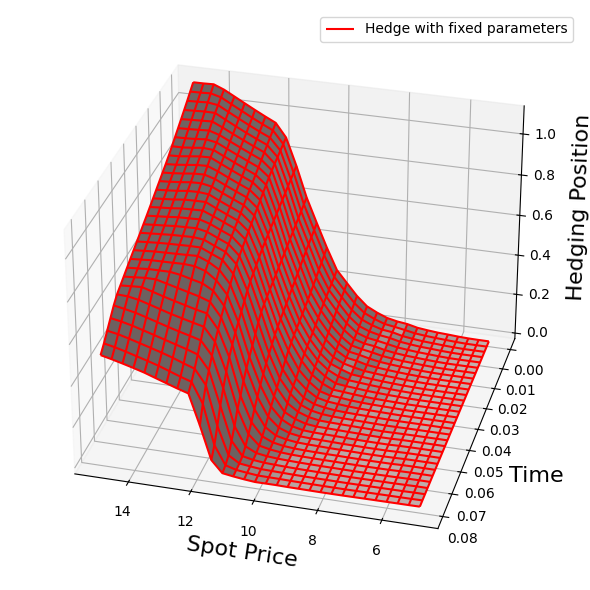

In [12]:
nr_discrete_points = 30 # Number of discrete points for the grid
# Create list of times and values
times = np.linspace(0,T,nr_discrete_points+1)[:-1]
values = np.linspace(x_0-x_0*0.5,x_0+x_0*0.5,nr_discrete_points)
# Empty grid
grid_fix = np.zeros((nr_discrete_points,nr_discrete_points))
#grid_Delta_hedge = np.zeros((nr_discrete_points,nr_discrete_points))
# Fill the grid with the values of the trained hedge
for i in range(len(times)):
    for j in range(len(values)):
        grid_fix[i,j] = hedge_fix([tf.reshape([values[j]],[1,1]),tf.reshape([times[i]],[1,1])]).numpy()[0]
        #grid_Delta_hedge[i,j] = BS_Delta(0.5,0,values[j],T-times[i],x_0)

# 3D PLOT
X, Y = np.meshgrid(values, times)

style.use('default')
fig = plt.figure(figsize=(6,6))
fig.subplots_adjust(bottom=0.15)
ax = fig.add_subplot(1, 1, 1, projection='3d')
#ax.plot_wireframe(X, Y , grid_Delta_hedge,color = "darkred",label = "Delta-Hedge")
ax.plot_surface(X, Y , grid_fix,color = "mistyrose")
ax.plot_wireframe(X, Y , grid_fix,color = "red",label = "Hedge with fixed parameters")

ax.view_init(30, 105)
ax.set_ylabel("Time", fontsize=16, labelpad=15)
ax.set_xlabel("Spot Price", fontsize=16)
ax.set_zlabel("Hedging Position", fontsize=16, labelpad=10)
plt.legend()
plt.tight_layout()
plt.savefig('eps/fig_path_dependent_uncertain_fix.eps', format='eps')
plt.show()

Compare the hedges

In [30]:
style.use('ggplot')
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)

# The hedge with fix gamma
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_fix = [hedge_fix([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_fix = tf.reduce_sum([hedge_evaluated_fix[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch_fix = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

# The hedge for the model with uncertainty
#path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated = [hedge([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1))]) for i in range(n)]
delta_S = tf.reduce_sum([hedge_evaluated[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)]) 

Compare how the hedges perform.

C:\Users\jul_ses\AppData\Local\Temp\ipykernel_22852\3441932874.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


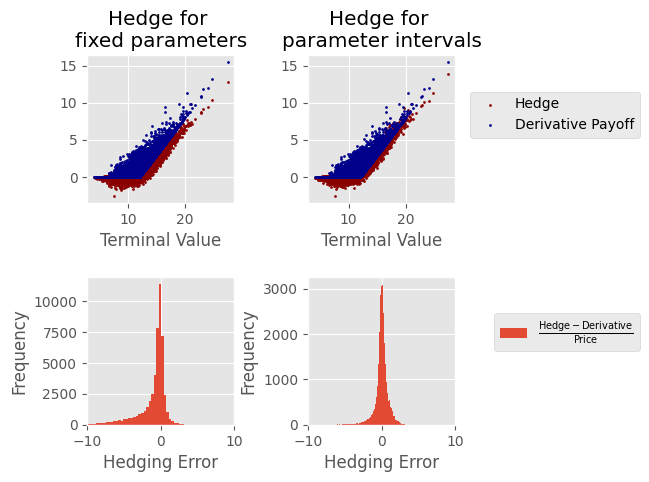

In [31]:
style.use('ggplot')
fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.5,wspace = 0.5,right=0.7)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_fix + delta_S_fix,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,0].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch_fix,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
axs[0,0].set_xlabel("Terminal Value")
axs[0,0].set_title("Hedge for \nfixed parameters")
axs[0,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price + delta_S,(BATCH_SIZE,1)),
            color = "darkred",label = "Hedge",s=2)
axs[0,1].scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative",s=2)
axs[0,1].set_xlabel("Terminal Value")
axs[0,1].set_title("Hedge for \nparameter intervals")

hedging_error_fix = (((price_fix + delta_S_fix) - derivative_on_batch_fix)/price_fix).numpy()
axs[1,0].hist(hedging_error_fix,100,label = r"$\frac{\mathrm{Hedge}-\mathrm{Derivative}}{\mathrm{Price}}$")
axs[1,0].set_ylabel("Frequency")
axs[1,0].set_xlim([-10,10])
axs[1,0].set_xlabel("Hedging Error")
axs[1,0].legend(loc = 0, bbox_to_anchor=(3.8, 0.8))

hedging_error = (((price + delta_S) - derivative_on_batch)/price).numpy()
axs[1,1].hist(hedging_error,200)
axs[1,1].set_xlabel("Hedging Error")
axs[1,1].set_xlim([-10,10])
axs[1,1].set_ylabel("Frequency")

fig.savefig('eps/fig_path_dependent_example_hedge_error.eps', format='eps')
fig.show()

Adjusted Histogram: Difference between hedging errors

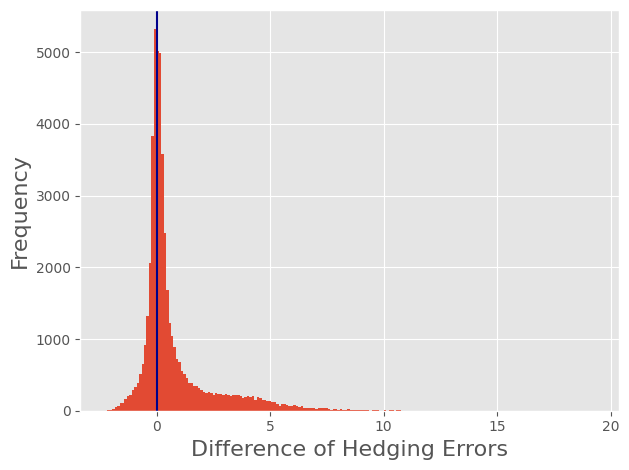

In [32]:
hedging_difference = np.abs(hedging_error_fix) - np.abs(hedging_error)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
#plt.xlim([-10,10])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_difference.eps', format='eps')
plt.show()

## Statistics on Relative Hedging Errors

Fixed Parameters:

In [33]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,1.319926
std,2.048046
min,0.000001
25%,0.199680
50%,0.498206
75%,1.441343
max,30.403664


Robust Parameters:

In [34]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.576081
std,0.670838
min,0.000007
25%,0.149744
50%,0.346724
75%,0.746918
max,11.115946


# Part 2)
# Non-Markovian Setting: We let the hedge depend also on the max

In [35]:
T = 30 / 365 # Maturity
n = 30 # Trading Dates
a_0 = [0.3,0.7]
a_1 = [0.4,0.6]
b_0 = [-0.2,0.2]
b_1 = [-0.1,0.1]
gamma = [0.5,1.5]
x_0 = 10.
def derivative(path):
    return tf.nn.relu(tf.math.reduce_max(path)-12)

price_non_M, hedge_non_M = optimal_hedge(derivative,a_0,a_1,b_0,b_1,gamma,x_0,T,n,
                             depth = 4,nr_neurons = 256,EPOCHS = 10000,l_r = 0.005,BATCH_SIZE =256,
                            path_dependent = True)

  0%|          | 11/10000 [00:09<2:18:03,  1.21it/s]

Iteration:10, Price of Hedge: 0.39348286390304565, Loss: 0.7212789058685303


  0%|          | 21/10000 [00:19<2:42:08,  1.03it/s]

Iteration:20, Price of Hedge: 0.3768364489078522, Loss: 0.47380343079566956


  0%|          | 31/10000 [00:27<2:31:44,  1.09it/s]

Iteration:30, Price of Hedge: 0.3621678352355957, Loss: 0.33239394426345825


  0%|          | 41/10000 [00:43<5:42:11,  2.06s/it]

Iteration:40, Price of Hedge: 0.35230860114097595, Loss: 0.3806101083755493


  1%|          | 51/10000 [00:54<2:28:00,  1.12it/s]

Iteration:50, Price of Hedge: 0.3453822731971741, Loss: 0.2874239683151245


  1%|          | 61/10000 [01:02<2:25:14,  1.14it/s]

Iteration:60, Price of Hedge: 0.3461548686027527, Loss: 0.3519929051399231


  1%|          | 71/10000 [01:14<3:22:25,  1.22s/it]

Iteration:70, Price of Hedge: 0.35488083958625793, Loss: 0.22534170746803284


  1%|          | 81/10000 [01:29<3:19:24,  1.21s/it]

Iteration:80, Price of Hedge: 0.3583090901374817, Loss: 0.2852840721607208


  1%|          | 91/10000 [01:38<2:33:09,  1.08it/s]

Iteration:90, Price of Hedge: 0.3535512685775757, Loss: 0.1939300000667572


  1%|          | 101/10000 [01:46<2:10:54,  1.26it/s]

Iteration:100, Price of Hedge: 0.35213765501976013, Loss: 0.2693266272544861


  1%|          | 111/10000 [01:54<2:26:58,  1.12it/s]

Iteration:110, Price of Hedge: 0.3558562397956848, Loss: 0.1974557489156723


  1%|          | 121/10000 [02:02<1:55:45,  1.42it/s]

Iteration:120, Price of Hedge: 0.3576886057853699, Loss: 0.2265467643737793


  1%|▏         | 131/10000 [02:09<2:11:01,  1.26it/s]

Iteration:130, Price of Hedge: 0.36474230885505676, Loss: 0.2584749758243561


  1%|▏         | 141/10000 [02:16<1:51:03,  1.48it/s]

Iteration:140, Price of Hedge: 0.36976784467697144, Loss: 0.2498515248298645


  2%|▏         | 151/10000 [02:24<2:15:34,  1.21it/s]

Iteration:150, Price of Hedge: 0.36434465646743774, Loss: 0.1074693500995636


  2%|▏         | 161/10000 [02:37<4:28:49,  1.64s/it]

Iteration:160, Price of Hedge: 0.3614881634712219, Loss: 0.16354578733444214


  2%|▏         | 171/10000 [02:46<2:03:33,  1.33it/s]

Iteration:170, Price of Hedge: 0.3550862669944763, Loss: 0.2232254296541214


  2%|▏         | 181/10000 [02:53<1:56:53,  1.40it/s]

Iteration:180, Price of Hedge: 0.35541126132011414, Loss: 0.10318167507648468


  2%|▏         | 191/10000 [03:02<2:13:01,  1.23it/s]

Iteration:190, Price of Hedge: 0.3564441502094269, Loss: 0.11523106694221497


  2%|▏         | 201/10000 [03:09<1:48:50,  1.50it/s]

Iteration:200, Price of Hedge: 0.3604978621006012, Loss: 0.12029951810836792


  2%|▏         | 211/10000 [03:16<1:59:30,  1.37it/s]

Iteration:210, Price of Hedge: 0.36860179901123047, Loss: 0.2007552683353424


  2%|▏         | 221/10000 [03:24<1:55:49,  1.41it/s]

Iteration:220, Price of Hedge: 0.36614543199539185, Loss: 0.25172144174575806


  2%|▏         | 231/10000 [03:32<2:01:54,  1.34it/s]

Iteration:230, Price of Hedge: 0.35800081491470337, Loss: 0.14977514743804932


  2%|▏         | 241/10000 [03:39<1:58:17,  1.38it/s]

Iteration:240, Price of Hedge: 0.3563987910747528, Loss: 0.2140064537525177


  3%|▎         | 251/10000 [03:47<1:59:20,  1.36it/s]

Iteration:250, Price of Hedge: 0.3557979464530945, Loss: 0.11151991784572601


  3%|▎         | 261/10000 [03:53<1:49:33,  1.48it/s]

Iteration:260, Price of Hedge: 0.35784122347831726, Loss: 0.18348583579063416


  3%|▎         | 271/10000 [04:01<2:09:40,  1.25it/s]

Iteration:270, Price of Hedge: 0.35938215255737305, Loss: 0.13505536317825317


  3%|▎         | 281/10000 [04:08<1:53:20,  1.43it/s]

Iteration:280, Price of Hedge: 0.3549596965312958, Loss: 0.1390792727470398


  3%|▎         | 291/10000 [04:15<2:08:36,  1.26it/s]

Iteration:290, Price of Hedge: 0.35031089186668396, Loss: 0.208883136510849


  3%|▎         | 301/10000 [04:22<1:48:32,  1.49it/s]

Iteration:300, Price of Hedge: 0.35108643770217896, Loss: 0.12616197764873505


  3%|▎         | 311/10000 [04:29<1:51:29,  1.45it/s]

Iteration:310, Price of Hedge: 0.3443600535392761, Loss: 0.37599214911460876


  3%|▎         | 321/10000 [04:37<1:54:20,  1.41it/s]

Iteration:320, Price of Hedge: 0.34874483942985535, Loss: 0.14168137311935425


  3%|▎         | 331/10000 [04:44<1:51:07,  1.45it/s]

Iteration:330, Price of Hedge: 0.36035212874412537, Loss: 0.1914558708667755


  3%|▎         | 341/10000 [04:51<1:54:18,  1.41it/s]

Iteration:340, Price of Hedge: 0.37385594844818115, Loss: 0.15229222178459167


  4%|▎         | 351/10000 [04:58<1:50:39,  1.45it/s]

Iteration:350, Price of Hedge: 0.36995357275009155, Loss: 0.14716170728206635


  4%|▎         | 361/10000 [05:06<2:08:11,  1.25it/s]

Iteration:360, Price of Hedge: 0.36171838641166687, Loss: 0.21259938180446625


  4%|▎         | 371/10000 [05:13<1:50:01,  1.46it/s]

Iteration:370, Price of Hedge: 0.3581946790218353, Loss: 0.14544427394866943


  4%|▍         | 381/10000 [05:20<2:09:17,  1.24it/s]

Iteration:380, Price of Hedge: 0.3586190640926361, Loss: 0.1506466269493103


  4%|▍         | 391/10000 [05:27<1:48:56,  1.47it/s]

Iteration:390, Price of Hedge: 0.3576582670211792, Loss: 0.1445736587047577


  4%|▍         | 401/10000 [05:34<1:49:04,  1.47it/s]

Iteration:400, Price of Hedge: 0.35410916805267334, Loss: 0.15971124172210693


  4%|▍         | 411/10000 [05:41<1:50:12,  1.45it/s]

Iteration:410, Price of Hedge: 0.35502588748931885, Loss: 0.13857987523078918


  4%|▍         | 421/10000 [05:48<1:48:11,  1.48it/s]

Iteration:420, Price of Hedge: 0.35340768098831177, Loss: 0.12657001614570618


  4%|▍         | 431/10000 [05:55<1:51:39,  1.43it/s]

Iteration:430, Price of Hedge: 0.3594530522823334, Loss: 0.12739187479019165


  4%|▍         | 441/10000 [06:02<1:47:27,  1.48it/s]

Iteration:440, Price of Hedge: 0.36012470722198486, Loss: 0.16919873654842377


  5%|▍         | 451/10000 [06:09<2:00:19,  1.32it/s]

Iteration:450, Price of Hedge: 0.3610970675945282, Loss: 0.14343416690826416


  5%|▍         | 461/10000 [06:16<1:49:11,  1.46it/s]

Iteration:460, Price of Hedge: 0.3651442527770996, Loss: 0.13153958320617676


  5%|▍         | 471/10000 [06:24<2:10:59,  1.21it/s]

Iteration:470, Price of Hedge: 0.3582160174846649, Loss: 0.18849915266036987


  5%|▍         | 481/10000 [06:31<2:02:53,  1.29it/s]

Iteration:480, Price of Hedge: 0.3534446060657501, Loss: 0.15433138608932495


  5%|▍         | 491/10000 [06:39<2:02:07,  1.30it/s]

Iteration:490, Price of Hedge: 0.3556268513202667, Loss: 0.15517768263816833


  5%|▌         | 501/10000 [06:46<1:48:59,  1.45it/s]

Iteration:500, Price of Hedge: 0.35885775089263916, Loss: 0.11315947026014328


  5%|▌         | 511/10000 [06:53<1:46:43,  1.48it/s]

Iteration:510, Price of Hedge: 0.36049899458885193, Loss: 0.10197875648736954


  5%|▌         | 521/10000 [07:00<1:46:20,  1.49it/s]

Iteration:520, Price of Hedge: 0.3522537648677826, Loss: 0.18888194859027863


  5%|▌         | 531/10000 [07:07<1:49:17,  1.44it/s]

Iteration:530, Price of Hedge: 0.3639991581439972, Loss: 0.16813912987709045


  5%|▌         | 541/10000 [07:15<1:56:56,  1.35it/s]

Iteration:540, Price of Hedge: 0.3685654401779175, Loss: 0.2190353125333786


  6%|▌         | 551/10000 [07:22<1:52:24,  1.40it/s]

Iteration:550, Price of Hedge: 0.3546909689903259, Loss: 0.17224109172821045


  6%|▌         | 561/10000 [07:29<2:04:39,  1.26it/s]

Iteration:560, Price of Hedge: 0.3430726230144501, Loss: 0.22722084820270538


  6%|▌         | 571/10000 [07:37<1:49:28,  1.44it/s]

Iteration:570, Price of Hedge: 0.3458167314529419, Loss: 0.11724603176116943


  6%|▌         | 581/10000 [07:44<2:06:40,  1.24it/s]

Iteration:580, Price of Hedge: 0.357148677110672, Loss: 0.1371966153383255


  6%|▌         | 591/10000 [07:51<1:45:22,  1.49it/s]

Iteration:590, Price of Hedge: 0.36277133226394653, Loss: 0.1364945024251938


  6%|▌         | 601/10000 [07:57<1:43:09,  1.52it/s]

Iteration:600, Price of Hedge: 0.36270609498023987, Loss: 0.23234660923480988


  6%|▌         | 611/10000 [08:05<1:48:19,  1.44it/s]

Iteration:610, Price of Hedge: 0.3631950616836548, Loss: 0.16789674758911133


  6%|▌         | 621/10000 [08:12<1:45:38,  1.48it/s]

Iteration:620, Price of Hedge: 0.3608408272266388, Loss: 0.13937592506408691


  6%|▋         | 631/10000 [08:20<2:00:15,  1.30it/s]

Iteration:630, Price of Hedge: 0.3620104193687439, Loss: 0.13657772541046143


  6%|▋         | 641/10000 [08:27<1:48:41,  1.44it/s]

Iteration:640, Price of Hedge: 0.36860960721969604, Loss: 0.11412125825881958


  7%|▋         | 651/10000 [08:36<2:05:26,  1.24it/s]

Iteration:650, Price of Hedge: 0.36835041642189026, Loss: 0.1476280838251114


  7%|▋         | 661/10000 [08:42<1:50:16,  1.41it/s]

Iteration:660, Price of Hedge: 0.36989670991897583, Loss: 0.1178525909781456


  7%|▋         | 671/10000 [08:50<2:00:55,  1.29it/s]

Iteration:670, Price of Hedge: 0.36680981516838074, Loss: 0.18169808387756348


  7%|▋         | 681/10000 [08:57<1:45:18,  1.47it/s]

Iteration:680, Price of Hedge: 0.37060439586639404, Loss: 0.17759564518928528


  7%|▋         | 691/10000 [09:04<2:12:40,  1.17it/s]

Iteration:690, Price of Hedge: 0.36632823944091797, Loss: 0.15248413383960724


  7%|▋         | 701/10000 [09:12<2:02:49,  1.26it/s]

Iteration:700, Price of Hedge: 0.35408782958984375, Loss: 0.1514294445514679


  7%|▋         | 711/10000 [09:20<2:03:08,  1.26it/s]

Iteration:710, Price of Hedge: 0.3523099422454834, Loss: 0.13402912020683289


  7%|▋         | 721/10000 [09:27<1:43:38,  1.49it/s]

Iteration:720, Price of Hedge: 0.3556278347969055, Loss: 0.13302063941955566


  7%|▋         | 731/10000 [09:33<1:41:55,  1.52it/s]

Iteration:730, Price of Hedge: 0.35969164967536926, Loss: 0.1266128122806549


  7%|▋         | 741/10000 [09:41<1:50:12,  1.40it/s]

Iteration:740, Price of Hedge: 0.3618107736110687, Loss: 0.12686121463775635


  8%|▊         | 751/10000 [09:48<1:42:04,  1.51it/s]

Iteration:750, Price of Hedge: 0.36638593673706055, Loss: 0.1272224485874176


  8%|▊         | 761/10000 [09:56<2:05:51,  1.22it/s]

Iteration:760, Price of Hedge: 0.36393776535987854, Loss: 0.14302799105644226


  8%|▊         | 771/10000 [10:03<1:48:50,  1.41it/s]

Iteration:770, Price of Hedge: 0.3626447021961212, Loss: 0.1354612410068512


  8%|▊         | 781/10000 [10:11<1:59:48,  1.28it/s]

Iteration:780, Price of Hedge: 0.36432453989982605, Loss: 0.193363219499588


  8%|▊         | 791/10000 [10:18<1:46:04,  1.45it/s]

Iteration:790, Price of Hedge: 0.3569360375404358, Loss: 0.11799465864896774


  8%|▊         | 801/10000 [10:25<1:55:55,  1.32it/s]

Iteration:800, Price of Hedge: 0.35500070452690125, Loss: 0.18261858820915222


  8%|▊         | 811/10000 [10:33<1:58:50,  1.29it/s]

Iteration:810, Price of Hedge: 0.3585585057735443, Loss: 0.14410215616226196


  8%|▊         | 821/10000 [10:41<2:06:57,  1.20it/s]

Iteration:820, Price of Hedge: 0.3717871308326721, Loss: 0.15841445326805115


  8%|▊         | 831/10000 [10:48<1:48:32,  1.41it/s]

Iteration:830, Price of Hedge: 0.3662506937980652, Loss: 0.1577191948890686


  8%|▊         | 841/10000 [10:55<2:02:45,  1.24it/s]

Iteration:840, Price of Hedge: 0.357051819562912, Loss: 0.13309623301029205


  9%|▊         | 851/10000 [11:02<1:45:07,  1.45it/s]

Iteration:850, Price of Hedge: 0.34821468591690063, Loss: 0.18422426283359528


  9%|▊         | 861/10000 [11:09<1:43:31,  1.47it/s]

Iteration:860, Price of Hedge: 0.36101365089416504, Loss: 0.1605449765920639


  9%|▊         | 871/10000 [11:17<1:47:28,  1.42it/s]

Iteration:870, Price of Hedge: 0.36366915702819824, Loss: 0.16644984483718872


  9%|▉         | 881/10000 [11:24<1:46:25,  1.43it/s]

Iteration:880, Price of Hedge: 0.3481641113758087, Loss: 0.15586239099502563


  9%|▉         | 891/10000 [11:31<1:49:57,  1.38it/s]

Iteration:890, Price of Hedge: 0.35078540444374084, Loss: 0.12833546102046967


  9%|▉         | 901/10000 [11:38<1:43:43,  1.46it/s]

Iteration:900, Price of Hedge: 0.35776278376579285, Loss: 0.18621224164962769


  9%|▉         | 911/10000 [11:46<1:53:20,  1.34it/s]

Iteration:910, Price of Hedge: 0.36947816610336304, Loss: 0.1239483430981636


  9%|▉         | 921/10000 [11:52<1:42:13,  1.48it/s]

Iteration:920, Price of Hedge: 0.37276002764701843, Loss: 0.11502617597579956


  9%|▉         | 931/10000 [12:00<2:08:01,  1.18it/s]

Iteration:930, Price of Hedge: 0.35542964935302734, Loss: 0.159695565700531


  9%|▉         | 941/10000 [12:08<1:53:56,  1.33it/s]

Iteration:940, Price of Hedge: 0.3551722764968872, Loss: 0.1151372641324997


 10%|▉         | 951/10000 [12:15<1:57:30,  1.28it/s]

Iteration:950, Price of Hedge: 0.3679213225841522, Loss: 0.16854587197303772


 10%|▉         | 961/10000 [12:23<1:44:14,  1.45it/s]

Iteration:960, Price of Hedge: 0.3553476631641388, Loss: 0.13453468680381775


 10%|▉         | 971/10000 [12:29<1:44:27,  1.44it/s]

Iteration:970, Price of Hedge: 0.351065069437027, Loss: 0.10972446203231812


 10%|▉         | 981/10000 [12:38<1:58:12,  1.27it/s]

Iteration:980, Price of Hedge: 0.35401344299316406, Loss: 0.15409153699874878


 10%|▉         | 991/10000 [12:45<1:45:06,  1.43it/s]

Iteration:990, Price of Hedge: 0.36027631163597107, Loss: 0.12417635321617126


 10%|█         | 1001/10000 [12:53<1:46:07,  1.41it/s]

Iteration:1000, Price of Hedge: 0.36390507221221924, Loss: 0.1637164056301117


 10%|█         | 1011/10000 [13:00<1:44:57,  1.43it/s]

Iteration:1010, Price of Hedge: 0.36534383893013, Loss: 0.11904999613761902


 10%|█         | 1021/10000 [13:07<1:59:27,  1.25it/s]

Iteration:1020, Price of Hedge: 0.3574175238609314, Loss: 0.15086419880390167


 10%|█         | 1031/10000 [13:14<1:40:13,  1.49it/s]

Iteration:1030, Price of Hedge: 0.34622758626937866, Loss: 0.1128409132361412


 10%|█         | 1041/10000 [13:22<1:54:10,  1.31it/s]

Iteration:1040, Price of Hedge: 0.35399648547172546, Loss: 0.11243873834609985


 11%|█         | 1051/10000 [13:29<1:44:23,  1.43it/s]

Iteration:1050, Price of Hedge: 0.362903356552124, Loss: 0.11662456393241882


 11%|█         | 1061/10000 [13:36<2:00:09,  1.24it/s]

Iteration:1060, Price of Hedge: 0.3556375503540039, Loss: 0.1466503143310547


 11%|█         | 1071/10000 [13:44<1:45:46,  1.41it/s]

Iteration:1070, Price of Hedge: 0.3546401560306549, Loss: 0.12475112080574036


 11%|█         | 1081/10000 [13:51<1:56:51,  1.27it/s]

Iteration:1080, Price of Hedge: 0.35173916816711426, Loss: 0.11535458266735077


 11%|█         | 1091/10000 [13:59<1:44:45,  1.42it/s]

Iteration:1090, Price of Hedge: 0.35976338386535645, Loss: 0.1862429678440094


 11%|█         | 1101/10000 [14:06<2:04:07,  1.19it/s]

Iteration:1100, Price of Hedge: 0.3633447587490082, Loss: 0.09722493588924408


 11%|█         | 1111/10000 [14:14<1:50:18,  1.34it/s]

Iteration:1110, Price of Hedge: 0.3545380234718323, Loss: 0.11014529317617416


 11%|█         | 1121/10000 [14:22<1:46:23,  1.39it/s]

Iteration:1120, Price of Hedge: 0.3496622145175934, Loss: 0.21971449255943298


 11%|█▏        | 1131/10000 [14:29<1:42:08,  1.45it/s]

Iteration:1130, Price of Hedge: 0.35028961300849915, Loss: 0.15294232964515686


 11%|█▏        | 1141/10000 [14:37<1:56:52,  1.26it/s]

Iteration:1140, Price of Hedge: 0.3645149767398834, Loss: 0.15100109577178955


 12%|█▏        | 1151/10000 [14:46<1:54:47,  1.28it/s]

Iteration:1150, Price of Hedge: 0.37021201848983765, Loss: 0.13463741540908813


 12%|█▏        | 1161/10000 [14:53<1:39:18,  1.48it/s]

Iteration:1160, Price of Hedge: 0.356473445892334, Loss: 0.19123169779777527


 12%|█▏        | 1171/10000 [15:00<1:46:51,  1.38it/s]

Iteration:1170, Price of Hedge: 0.3599415123462677, Loss: 0.12868274748325348


 12%|█▏        | 1181/10000 [15:07<1:42:15,  1.44it/s]

Iteration:1180, Price of Hedge: 0.3704679012298584, Loss: 0.14336855709552765


 12%|█▏        | 1191/10000 [15:15<1:53:17,  1.30it/s]

Iteration:1190, Price of Hedge: 0.36118632555007935, Loss: 0.15589642524719238


 12%|█▏        | 1201/10000 [15:22<1:40:53,  1.45it/s]

Iteration:1200, Price of Hedge: 0.3600230813026428, Loss: 0.12612101435661316


 12%|█▏        | 1211/10000 [15:30<1:53:55,  1.29it/s]

Iteration:1210, Price of Hedge: 0.35810473561286926, Loss: 0.1433502435684204


 12%|█▏        | 1221/10000 [15:37<1:37:42,  1.50it/s]

Iteration:1220, Price of Hedge: 0.35988354682922363, Loss: 0.13835611939430237


 12%|█▏        | 1231/10000 [15:44<1:57:49,  1.24it/s]

Iteration:1230, Price of Hedge: 0.3631885349750519, Loss: 0.09254567325115204


 12%|█▏        | 1241/10000 [15:51<1:38:44,  1.48it/s]

Iteration:1240, Price of Hedge: 0.3585934638977051, Loss: 0.1439966857433319


 13%|█▎        | 1251/10000 [15:58<1:44:13,  1.40it/s]

Iteration:1250, Price of Hedge: 0.35631343722343445, Loss: 0.1258545070886612


 13%|█▎        | 1261/10000 [16:05<1:39:01,  1.47it/s]

Iteration:1260, Price of Hedge: 0.3554924726486206, Loss: 0.17515696585178375


 13%|█▎        | 1271/10000 [16:12<1:41:03,  1.44it/s]

Iteration:1270, Price of Hedge: 0.35796403884887695, Loss: 0.16446471214294434


 13%|█▎        | 1281/10000 [16:19<1:40:32,  1.45it/s]

Iteration:1280, Price of Hedge: 0.36915111541748047, Loss: 0.12443220615386963


 13%|█▎        | 1291/10000 [16:26<1:34:58,  1.53it/s]

Iteration:1290, Price of Hedge: 0.3725786805152893, Loss: 0.20601001381874084


 13%|█▎        | 1301/10000 [16:33<1:52:10,  1.29it/s]

Iteration:1300, Price of Hedge: 0.3549855649471283, Loss: 0.08101417124271393


 13%|█▎        | 1311/10000 [16:41<1:41:39,  1.42it/s]

Iteration:1310, Price of Hedge: 0.34729713201522827, Loss: 0.12068454176187515


 13%|█▎        | 1321/10000 [16:48<1:55:21,  1.25it/s]

Iteration:1320, Price of Hedge: 0.36562687158584595, Loss: 0.11693620681762695


 13%|█▎        | 1331/10000 [16:55<1:37:05,  1.49it/s]

Iteration:1330, Price of Hedge: 0.36070793867111206, Loss: 0.10720065981149673


 13%|█▎        | 1341/10000 [17:02<1:36:39,  1.49it/s]

Iteration:1340, Price of Hedge: 0.35541707277297974, Loss: 0.1361171454191208


 14%|█▎        | 1351/10000 [17:09<1:36:38,  1.49it/s]

Iteration:1350, Price of Hedge: 0.35081785917282104, Loss: 0.11179078370332718


 14%|█▎        | 1361/10000 [17:15<1:34:58,  1.52it/s]

Iteration:1360, Price of Hedge: 0.3563739061355591, Loss: 0.09690441936254501


 14%|█▎        | 1371/10000 [17:23<1:41:17,  1.42it/s]

Iteration:1370, Price of Hedge: 0.3602283000946045, Loss: 0.16182038187980652


 14%|█▍        | 1381/10000 [17:29<1:34:33,  1.52it/s]

Iteration:1380, Price of Hedge: 0.3670930564403534, Loss: 0.102452352643013


 14%|█▍        | 1391/10000 [17:36<1:52:43,  1.27it/s]

Iteration:1390, Price of Hedge: 0.3705044984817505, Loss: 0.2475011646747589


 14%|█▍        | 1401/10000 [17:43<1:34:33,  1.52it/s]

Iteration:1400, Price of Hedge: 0.3623129725456238, Loss: 0.10447150468826294


 14%|█▍        | 1411/10000 [17:50<1:37:06,  1.47it/s]

Iteration:1410, Price of Hedge: 0.35864347219467163, Loss: 0.1596411019563675


 14%|█▍        | 1421/10000 [17:57<1:35:38,  1.50it/s]

Iteration:1420, Price of Hedge: 0.3491300642490387, Loss: 0.12766492366790771


 14%|█▍        | 1431/10000 [18:03<1:33:17,  1.53it/s]

Iteration:1430, Price of Hedge: 0.35360094904899597, Loss: 0.14041249454021454


 14%|█▍        | 1441/10000 [18:11<1:39:56,  1.43it/s]

Iteration:1440, Price of Hedge: 0.3462236821651459, Loss: 0.1548731029033661


 15%|█▍        | 1451/10000 [18:17<1:33:35,  1.52it/s]

Iteration:1450, Price of Hedge: 0.35758793354034424, Loss: 0.16788117587566376


 15%|█▍        | 1461/10000 [18:24<1:50:44,  1.29it/s]

Iteration:1460, Price of Hedge: 0.3690306544303894, Loss: 0.10208146274089813


 15%|█▍        | 1471/10000 [18:31<1:35:03,  1.50it/s]

Iteration:1470, Price of Hedge: 0.36357051134109497, Loss: 0.19073833525180817


 15%|█▍        | 1481/10000 [18:38<1:53:19,  1.25it/s]

Iteration:1480, Price of Hedge: 0.34784308075904846, Loss: 0.09730987995862961


 15%|█▍        | 1491/10000 [18:46<1:36:12,  1.47it/s]

Iteration:1490, Price of Hedge: 0.3409118056297302, Loss: 0.10235139727592468


 15%|█▌        | 1501/10000 [18:52<1:32:51,  1.53it/s]

Iteration:1500, Price of Hedge: 0.3477797508239746, Loss: 0.11206565797328949


 15%|█▌        | 1511/10000 [19:00<1:36:59,  1.46it/s]

Iteration:1510, Price of Hedge: 0.3599965572357178, Loss: 0.1428222507238388


 15%|█▌        | 1521/10000 [19:06<1:32:43,  1.52it/s]

Iteration:1520, Price of Hedge: 0.36293432116508484, Loss: 0.11467202007770538


 15%|█▌        | 1531/10000 [19:13<1:48:28,  1.30it/s]

Iteration:1530, Price of Hedge: 0.36363744735717773, Loss: 0.07687115669250488


 15%|█▌        | 1541/10000 [19:20<1:33:47,  1.50it/s]

Iteration:1540, Price of Hedge: 0.36070817708969116, Loss: 0.11142092198133469


 16%|█▌        | 1551/10000 [19:27<1:45:37,  1.33it/s]

Iteration:1550, Price of Hedge: 0.3594699501991272, Loss: 0.14051799476146698


 16%|█▌        | 1561/10000 [19:34<1:33:05,  1.51it/s]

Iteration:1560, Price of Hedge: 0.36422020196914673, Loss: 0.09800151735544205


 16%|█▌        | 1571/10000 [19:41<1:31:35,  1.53it/s]

Iteration:1570, Price of Hedge: 0.3682500720024109, Loss: 0.13280703127384186


 16%|█▌        | 1581/10000 [19:48<1:36:20,  1.46it/s]

Iteration:1580, Price of Hedge: 0.3642003536224365, Loss: 0.1682959496974945


 16%|█▌        | 1591/10000 [19:55<1:32:31,  1.51it/s]

Iteration:1590, Price of Hedge: 0.35420534014701843, Loss: 0.10585816204547882


 16%|█▌        | 1601/10000 [20:02<1:43:51,  1.35it/s]

Iteration:1600, Price of Hedge: 0.35136285424232483, Loss: 0.1217641830444336


 16%|█▌        | 1611/10000 [20:08<1:31:33,  1.53it/s]

Iteration:1610, Price of Hedge: 0.3587854206562042, Loss: 0.14088556170463562


 16%|█▌        | 1621/10000 [20:16<1:46:50,  1.31it/s]

Iteration:1620, Price of Hedge: 0.36179715394973755, Loss: 0.14721660315990448


 16%|█▋        | 1631/10000 [20:25<2:00:10,  1.16it/s]

Iteration:1630, Price of Hedge: 0.3572496175765991, Loss: 0.1206735223531723


 16%|█▋        | 1641/10000 [20:32<1:48:54,  1.28it/s]

Iteration:1640, Price of Hedge: 0.35345658659935, Loss: 0.1153515875339508


 17%|█▋        | 1651/10000 [20:39<1:41:54,  1.37it/s]

Iteration:1650, Price of Hedge: 0.35461950302124023, Loss: 0.12177827954292297


 17%|█▋        | 1661/10000 [20:46<1:41:23,  1.37it/s]

Iteration:1660, Price of Hedge: 0.35192009806632996, Loss: 0.1394565850496292


 17%|█▋        | 1671/10000 [20:54<1:41:10,  1.37it/s]

Iteration:1670, Price of Hedge: 0.35282617807388306, Loss: 0.11535042524337769


 17%|█▋        | 1681/10000 [21:01<1:32:37,  1.50it/s]

Iteration:1680, Price of Hedge: 0.36262524127960205, Loss: 0.1298084259033203


 17%|█▋        | 1691/10000 [21:08<1:35:15,  1.45it/s]

Iteration:1690, Price of Hedge: 0.3680878281593323, Loss: 0.12656918168067932


 17%|█▋        | 1701/10000 [21:15<1:32:02,  1.50it/s]

Iteration:1700, Price of Hedge: 0.3568558990955353, Loss: 0.1172204464673996


 17%|█▋        | 1711/10000 [21:23<1:40:31,  1.37it/s]

Iteration:1710, Price of Hedge: 0.3519044518470764, Loss: 0.15489816665649414


 17%|█▋        | 1721/10000 [21:29<1:30:13,  1.53it/s]

Iteration:1720, Price of Hedge: 0.35731402039527893, Loss: 0.08776149153709412


 17%|█▋        | 1731/10000 [21:36<1:46:32,  1.29it/s]

Iteration:1730, Price of Hedge: 0.3562697768211365, Loss: 0.15637552738189697


 17%|█▋        | 1741/10000 [21:43<1:30:50,  1.52it/s]

Iteration:1740, Price of Hedge: 0.3630475103855133, Loss: 0.15000861883163452


 18%|█▊        | 1751/10000 [21:50<1:31:17,  1.51it/s]

Iteration:1750, Price of Hedge: 0.3708398640155792, Loss: 0.1796300858259201


 18%|█▊        | 1761/10000 [21:57<1:31:59,  1.49it/s]

Iteration:1760, Price of Hedge: 0.36808720231056213, Loss: 0.19091328978538513


 18%|█▊        | 1771/10000 [22:03<1:30:15,  1.52it/s]

Iteration:1770, Price of Hedge: 0.36336854100227356, Loss: 0.09419424086809158


 18%|█▊        | 1781/10000 [22:11<1:49:07,  1.26it/s]

Iteration:1780, Price of Hedge: 0.36268267035484314, Loss: 0.1332634687423706


 18%|█▊        | 1791/10000 [22:18<1:37:18,  1.41it/s]

Iteration:1790, Price of Hedge: 0.35666370391845703, Loss: 0.12230722606182098


 18%|█▊        | 1801/10000 [22:26<1:47:00,  1.28it/s]

Iteration:1800, Price of Hedge: 0.3546701669692993, Loss: 0.09003040194511414


 18%|█▊        | 1811/10000 [22:33<1:35:13,  1.43it/s]

Iteration:1810, Price of Hedge: 0.363105446100235, Loss: 0.09055142104625702


 18%|█▊        | 1821/10000 [22:41<2:03:18,  1.11it/s]

Iteration:1820, Price of Hedge: 0.3625289499759674, Loss: 0.1069890633225441


 18%|█▊        | 1831/10000 [22:48<1:33:31,  1.46it/s]

Iteration:1830, Price of Hedge: 0.3462631106376648, Loss: 0.24055986106395721


 18%|█▊        | 1841/10000 [22:55<1:46:50,  1.27it/s]

Iteration:1840, Price of Hedge: 0.3399350345134735, Loss: 0.10836650431156158


 19%|█▊        | 1851/10000 [23:03<1:33:49,  1.45it/s]

Iteration:1850, Price of Hedge: 0.3469270169734955, Loss: 0.1453445553779602


 19%|█▊        | 1861/10000 [23:09<1:35:36,  1.42it/s]

Iteration:1860, Price of Hedge: 0.3647349178791046, Loss: 0.18879303336143494


 19%|█▊        | 1871/10000 [23:17<1:32:27,  1.47it/s]

Iteration:1870, Price of Hedge: 0.36040931940078735, Loss: 0.11822686344385147


 19%|█▉        | 1881/10000 [23:24<1:32:47,  1.46it/s]

Iteration:1880, Price of Hedge: 0.35593414306640625, Loss: 0.1306581199169159


 19%|█▉        | 1891/10000 [23:31<1:36:16,  1.40it/s]

Iteration:1890, Price of Hedge: 0.355049192905426, Loss: 0.15118727087974548


 19%|█▉        | 1901/10000 [23:38<1:32:43,  1.46it/s]

Iteration:1900, Price of Hedge: 0.35009562969207764, Loss: 0.2229500114917755


 19%|█▉        | 1911/10000 [23:46<1:43:29,  1.30it/s]

Iteration:1910, Price of Hedge: 0.3528072237968445, Loss: 0.15805870294570923


 19%|█▉        | 1921/10000 [23:53<1:31:46,  1.47it/s]

Iteration:1920, Price of Hedge: 0.34792712330818176, Loss: 0.10047800838947296


 19%|█▉        | 1931/10000 [24:00<1:46:52,  1.26it/s]

Iteration:1930, Price of Hedge: 0.35534822940826416, Loss: 0.11411246657371521


 19%|█▉        | 1941/10000 [24:07<1:31:59,  1.46it/s]

Iteration:1940, Price of Hedge: 0.3567207157611847, Loss: 0.10538166761398315


 20%|█▉        | 1951/10000 [24:14<1:39:18,  1.35it/s]

Iteration:1950, Price of Hedge: 0.3539603054523468, Loss: 0.0849730372428894


 20%|█▉        | 1961/10000 [24:22<1:35:53,  1.40it/s]

Iteration:1960, Price of Hedge: 0.36446288228034973, Loss: 0.11119694262742996


 20%|█▉        | 1971/10000 [24:29<1:32:58,  1.44it/s]

Iteration:1970, Price of Hedge: 0.371774286031723, Loss: 0.1343178153038025


 20%|█▉        | 1981/10000 [24:36<1:34:42,  1.41it/s]

Iteration:1980, Price of Hedge: 0.3626692593097687, Loss: 0.10542569309473038


 20%|█▉        | 1991/10000 [24:44<1:36:34,  1.38it/s]

Iteration:1990, Price of Hedge: 0.35953906178474426, Loss: 0.09986670315265656


 20%|██        | 2001/10000 [24:51<1:36:59,  1.37it/s]

Iteration:2000, Price of Hedge: 0.3559960722923279, Loss: 0.09103968739509583


 20%|██        | 2011/10000 [24:58<1:33:49,  1.42it/s]

Iteration:2010, Price of Hedge: 0.3469988703727722, Loss: 0.11989302933216095


 20%|██        | 2021/10000 [25:06<1:41:13,  1.31it/s]

Iteration:2020, Price of Hedge: 0.34753164649009705, Loss: 0.09028599411249161


 20%|██        | 2031/10000 [25:13<1:29:56,  1.48it/s]

Iteration:2030, Price of Hedge: 0.35199159383773804, Loss: 0.10242205858230591


 20%|██        | 2041/10000 [25:20<1:46:28,  1.25it/s]

Iteration:2040, Price of Hedge: 0.36345282196998596, Loss: 0.18395835161209106


 21%|██        | 2051/10000 [25:27<1:30:52,  1.46it/s]

Iteration:2050, Price of Hedge: 0.37355437874794006, Loss: 0.11917524039745331


 21%|██        | 2061/10000 [25:34<1:37:35,  1.36it/s]

Iteration:2060, Price of Hedge: 0.3629537522792816, Loss: 0.16786861419677734


 21%|██        | 2071/10000 [25:42<1:31:17,  1.45it/s]

Iteration:2070, Price of Hedge: 0.34624823927879333, Loss: 0.13852548599243164


 21%|██        | 2081/10000 [25:48<1:29:57,  1.47it/s]

Iteration:2080, Price of Hedge: 0.358110636472702, Loss: 0.10058730840682983


 21%|██        | 2091/10000 [25:56<1:34:44,  1.39it/s]

Iteration:2090, Price of Hedge: 0.3516550064086914, Loss: 0.09536590427160263


 21%|██        | 2101/10000 [26:03<1:30:29,  1.45it/s]

Iteration:2100, Price of Hedge: 0.354781836271286, Loss: 0.12656599283218384


 21%|██        | 2111/10000 [26:11<1:38:28,  1.34it/s]

Iteration:2110, Price of Hedge: 0.3609042167663574, Loss: 0.13075293600559235


 21%|██        | 2121/10000 [26:17<1:28:07,  1.49it/s]

Iteration:2120, Price of Hedge: 0.3615473806858063, Loss: 0.12094715237617493


 21%|██▏       | 2131/10000 [26:25<1:46:02,  1.24it/s]

Iteration:2130, Price of Hedge: 0.35357338190078735, Loss: 0.1575021743774414


 21%|██▏       | 2141/10000 [26:32<1:29:56,  1.46it/s]

Iteration:2140, Price of Hedge: 0.35041552782058716, Loss: 0.1274930238723755


 22%|██▏       | 2151/10000 [26:39<1:43:14,  1.27it/s]

Iteration:2150, Price of Hedge: 0.350525438785553, Loss: 0.11791657656431198


 22%|██▏       | 2161/10000 [26:47<1:36:35,  1.35it/s]

Iteration:2160, Price of Hedge: 0.3518731892108917, Loss: 0.09500052034854889


 22%|██▏       | 2171/10000 [26:54<1:30:49,  1.44it/s]

Iteration:2170, Price of Hedge: 0.34748440980911255, Loss: 0.10183650255203247


 22%|██▏       | 2181/10000 [27:01<1:29:58,  1.45it/s]

Iteration:2180, Price of Hedge: 0.3565056025981903, Loss: 0.10539461672306061


 22%|██▏       | 2191/10000 [27:08<1:29:24,  1.46it/s]

Iteration:2190, Price of Hedge: 0.35577183961868286, Loss: 0.09073236584663391


 22%|██▏       | 2201/10000 [27:16<1:34:28,  1.38it/s]

Iteration:2200, Price of Hedge: 0.3539396822452545, Loss: 0.1130184531211853


 22%|██▏       | 2211/10000 [27:22<1:30:35,  1.43it/s]

Iteration:2210, Price of Hedge: 0.35832712054252625, Loss: 0.13810649514198303


 22%|██▏       | 2221/10000 [27:30<1:40:20,  1.29it/s]

Iteration:2220, Price of Hedge: 0.36464473605155945, Loss: 0.1736050546169281


 22%|██▏       | 2231/10000 [27:37<1:29:42,  1.44it/s]

Iteration:2230, Price of Hedge: 0.3594273030757904, Loss: 0.11872255802154541


 22%|██▏       | 2241/10000 [27:45<1:57:44,  1.10it/s]

Iteration:2240, Price of Hedge: 0.3609306514263153, Loss: 0.14376786351203918


 23%|██▎       | 2251/10000 [27:53<1:36:17,  1.34it/s]

Iteration:2250, Price of Hedge: 0.36309900879859924, Loss: 0.1238955408334732


 23%|██▎       | 2261/10000 [28:01<2:12:02,  1.02s/it]

Iteration:2260, Price of Hedge: 0.3474458158016205, Loss: 0.1179620623588562


 23%|██▎       | 2271/10000 [28:09<1:33:06,  1.38it/s]

Iteration:2270, Price of Hedge: 0.35336732864379883, Loss: 0.14402884244918823


 23%|██▎       | 2281/10000 [28:17<1:53:45,  1.13it/s]

Iteration:2280, Price of Hedge: 0.3639940619468689, Loss: 0.16177527606487274


 23%|██▎       | 2291/10000 [28:27<2:06:45,  1.01it/s]

Iteration:2290, Price of Hedge: 0.367191344499588, Loss: 0.13666696846485138


 23%|██▎       | 2301/10000 [28:37<2:20:12,  1.09s/it]

Iteration:2300, Price of Hedge: 0.3619798719882965, Loss: 0.12106801569461823


 23%|██▎       | 2311/10000 [28:46<1:57:43,  1.09it/s]

Iteration:2310, Price of Hedge: 0.3528498113155365, Loss: 0.11316174268722534


 23%|██▎       | 2321/10000 [28:54<1:33:44,  1.37it/s]

Iteration:2320, Price of Hedge: 0.3472535312175751, Loss: 0.11574096232652664


 23%|██▎       | 2331/10000 [29:01<1:28:53,  1.44it/s]

Iteration:2330, Price of Hedge: 0.35893943905830383, Loss: 0.18114614486694336


 23%|██▎       | 2341/10000 [29:09<1:38:42,  1.29it/s]

Iteration:2340, Price of Hedge: 0.3598068654537201, Loss: 0.12241415679454803


 24%|██▎       | 2351/10000 [29:16<1:33:53,  1.36it/s]

Iteration:2350, Price of Hedge: 0.3622410297393799, Loss: 0.14827397465705872


 24%|██▎       | 2361/10000 [29:24<1:35:34,  1.33it/s]

Iteration:2360, Price of Hedge: 0.36846640706062317, Loss: 0.09020611643791199


 24%|██▎       | 2371/10000 [29:33<1:52:32,  1.13it/s]

Iteration:2370, Price of Hedge: 0.36236220598220825, Loss: 0.16665449738502502


 24%|██▍       | 2381/10000 [29:42<1:50:56,  1.14it/s]

Iteration:2380, Price of Hedge: 0.36327657103538513, Loss: 0.10351554304361343


 24%|██▍       | 2391/10000 [29:49<1:29:24,  1.42it/s]

Iteration:2390, Price of Hedge: 0.3620130121707916, Loss: 0.11873657256364822


 24%|██▍       | 2401/10000 [29:59<1:54:54,  1.10it/s]

Iteration:2400, Price of Hedge: 0.3571423888206482, Loss: 0.13441161811351776


 24%|██▍       | 2411/10000 [30:07<1:46:24,  1.19it/s]

Iteration:2410, Price of Hedge: 0.3611505925655365, Loss: 0.08197815716266632


 24%|██▍       | 2421/10000 [30:14<1:30:54,  1.39it/s]

Iteration:2420, Price of Hedge: 0.3629992604255676, Loss: 0.1282431185245514


 24%|██▍       | 2431/10000 [30:21<1:24:36,  1.49it/s]

Iteration:2430, Price of Hedge: 0.36428001523017883, Loss: 0.13291455805301666


 24%|██▍       | 2441/10000 [30:29<1:31:22,  1.38it/s]

Iteration:2440, Price of Hedge: 0.3651227653026581, Loss: 0.1699303388595581


 25%|██▍       | 2451/10000 [30:36<1:23:48,  1.50it/s]

Iteration:2450, Price of Hedge: 0.37162306904792786, Loss: 0.1243896484375


 25%|██▍       | 2461/10000 [30:44<1:37:45,  1.29it/s]

Iteration:2460, Price of Hedge: 0.3713248372077942, Loss: 0.15081702172756195


 25%|██▍       | 2471/10000 [30:51<1:23:48,  1.50it/s]

Iteration:2470, Price of Hedge: 0.3668569326400757, Loss: 0.11243691295385361


 25%|██▍       | 2481/10000 [30:58<1:31:46,  1.37it/s]

Iteration:2480, Price of Hedge: 0.36632606387138367, Loss: 0.197385773062706


 25%|██▍       | 2491/10000 [31:05<1:25:48,  1.46it/s]

Iteration:2490, Price of Hedge: 0.3621296286582947, Loss: 0.1300494521856308


 25%|██▌       | 2501/10000 [31:13<1:45:16,  1.19it/s]

Iteration:2500, Price of Hedge: 0.3634386956691742, Loss: 0.09164312481880188


 25%|██▌       | 2511/10000 [31:20<1:30:12,  1.38it/s]

Iteration:2510, Price of Hedge: 0.3576785624027252, Loss: 0.11695237457752228


 25%|██▌       | 2521/10000 [31:28<1:46:23,  1.17it/s]

Iteration:2520, Price of Hedge: 0.3636913299560547, Loss: 0.08507359772920609


 25%|██▌       | 2531/10000 [31:36<1:35:52,  1.30it/s]

Iteration:2530, Price of Hedge: 0.37155914306640625, Loss: 0.17281463742256165


 25%|██▌       | 2541/10000 [31:45<2:10:15,  1.05s/it]

Iteration:2540, Price of Hedge: 0.366090327501297, Loss: 0.1660645306110382


 26%|██▌       | 2551/10000 [31:53<1:40:13,  1.24it/s]

Iteration:2550, Price of Hedge: 0.36864185333251953, Loss: 0.08788813650608063


 26%|██▌       | 2561/10000 [32:02<1:47:27,  1.15it/s]

Iteration:2560, Price of Hedge: 0.36675596237182617, Loss: 0.1114254742860794


 26%|██▌       | 2571/10000 [32:10<1:30:29,  1.37it/s]

Iteration:2570, Price of Hedge: 0.3592509627342224, Loss: 0.10044282674789429


 26%|██▌       | 2581/10000 [32:18<1:46:57,  1.16it/s]

Iteration:2580, Price of Hedge: 0.347773939371109, Loss: 0.13223996758460999


 26%|██▌       | 2591/10000 [32:25<1:27:58,  1.40it/s]

Iteration:2590, Price of Hedge: 0.3541628420352936, Loss: 0.10780739784240723


 26%|██▌       | 2601/10000 [32:33<2:06:28,  1.03s/it]

Iteration:2600, Price of Hedge: 0.3652113080024719, Loss: 0.1286574900150299


 26%|██▌       | 2611/10000 [32:43<2:06:46,  1.03s/it]

Iteration:2610, Price of Hedge: 0.3691977858543396, Loss: 0.11029574275016785


 26%|██▌       | 2621/10000 [32:54<2:03:50,  1.01s/it]

Iteration:2620, Price of Hedge: 0.3654801845550537, Loss: 0.13330745697021484


 26%|██▋       | 2631/10000 [33:04<2:02:26,  1.00it/s]

Iteration:2630, Price of Hedge: 0.36209020018577576, Loss: 0.11661512404680252


 26%|██▋       | 2641/10000 [33:12<1:39:23,  1.23it/s]

Iteration:2640, Price of Hedge: 0.36701110005378723, Loss: 0.11543739587068558


 27%|██▋       | 2651/10000 [33:21<1:55:56,  1.06it/s]

Iteration:2650, Price of Hedge: 0.36076900362968445, Loss: 0.1394745111465454


 27%|██▋       | 2661/10000 [33:28<1:26:44,  1.41it/s]

Iteration:2660, Price of Hedge: 0.3586783707141876, Loss: 0.08913245797157288


 27%|██▋       | 2671/10000 [33:36<1:36:02,  1.27it/s]

Iteration:2670, Price of Hedge: 0.3678223788738251, Loss: 0.14942201972007751


 27%|██▋       | 2681/10000 [33:43<1:23:36,  1.46it/s]

Iteration:2680, Price of Hedge: 0.3640906512737274, Loss: 0.17811329662799835


 27%|██▋       | 2691/10000 [33:50<1:23:25,  1.46it/s]

Iteration:2690, Price of Hedge: 0.3610278069972992, Loss: 0.09323537349700928


 27%|██▋       | 2701/10000 [33:57<1:25:25,  1.42it/s]

Iteration:2700, Price of Hedge: 0.35150009393692017, Loss: 0.12501272559165955


 27%|██▋       | 2711/10000 [34:04<1:25:48,  1.42it/s]

Iteration:2710, Price of Hedge: 0.3538135886192322, Loss: 0.11209364235401154


 27%|██▋       | 2721/10000 [34:12<1:26:29,  1.40it/s]

Iteration:2720, Price of Hedge: 0.3602662682533264, Loss: 0.1707402765750885


 27%|██▋       | 2731/10000 [34:18<1:23:02,  1.46it/s]

Iteration:2730, Price of Hedge: 0.3725910782814026, Loss: 0.1027577817440033


 27%|██▋       | 2741/10000 [34:26<1:42:16,  1.18it/s]

Iteration:2740, Price of Hedge: 0.37951189279556274, Loss: 0.148287832736969


 28%|██▊       | 2751/10000 [34:34<1:29:35,  1.35it/s]

Iteration:2750, Price of Hedge: 0.35792410373687744, Loss: 0.11992892622947693


 28%|██▊       | 2761/10000 [34:43<1:45:14,  1.15it/s]

Iteration:2760, Price of Hedge: 0.3463199734687805, Loss: 0.1506531834602356


 28%|██▊       | 2771/10000 [34:51<1:32:04,  1.31it/s]

Iteration:2770, Price of Hedge: 0.3558977246284485, Loss: 0.14353424310684204


 28%|██▊       | 2781/10000 [35:00<1:52:00,  1.07it/s]

Iteration:2780, Price of Hedge: 0.3668547570705414, Loss: 0.18644684553146362


 28%|██▊       | 2791/10000 [35:08<1:28:56,  1.35it/s]

Iteration:2790, Price of Hedge: 0.35332587361335754, Loss: 0.10962589085102081


 28%|██▊       | 2801/10000 [35:17<1:43:32,  1.16it/s]

Iteration:2800, Price of Hedge: 0.3476945459842682, Loss: 0.1558963656425476


 28%|██▊       | 2811/10000 [35:25<1:44:56,  1.14it/s]

Iteration:2810, Price of Hedge: 0.3560083508491516, Loss: 0.11493300646543503


 28%|██▊       | 2821/10000 [35:34<1:28:46,  1.35it/s]

Iteration:2820, Price of Hedge: 0.36794567108154297, Loss: 0.10596142709255219


 28%|██▊       | 2831/10000 [35:41<1:23:54,  1.42it/s]

Iteration:2830, Price of Hedge: 0.3639895021915436, Loss: 0.12628202140331268


 28%|██▊       | 2841/10000 [35:48<1:22:45,  1.44it/s]

Iteration:2840, Price of Hedge: 0.3648492991924286, Loss: 0.11486012488603592


 29%|██▊       | 2851/10000 [35:55<1:20:13,  1.49it/s]

Iteration:2850, Price of Hedge: 0.3569600582122803, Loss: 0.1252889186143875


 29%|██▊       | 2861/10000 [36:03<1:28:22,  1.35it/s]

Iteration:2860, Price of Hedge: 0.3485933244228363, Loss: 0.160441055893898


 29%|██▊       | 2871/10000 [36:09<1:20:13,  1.48it/s]

Iteration:2870, Price of Hedge: 0.3552911877632141, Loss: 0.12959954142570496


 29%|██▉       | 2881/10000 [36:17<1:39:16,  1.20it/s]

Iteration:2880, Price of Hedge: 0.360492080450058, Loss: 0.12421673536300659


 29%|██▉       | 2891/10000 [36:24<1:21:58,  1.45it/s]

Iteration:2890, Price of Hedge: 0.36143258213996887, Loss: 0.13809846341609955


 29%|██▉       | 2901/10000 [36:32<1:44:04,  1.14it/s]

Iteration:2900, Price of Hedge: 0.3738754987716675, Loss: 0.11994874477386475


 29%|██▉       | 2911/10000 [36:40<1:36:52,  1.22it/s]

Iteration:2910, Price of Hedge: 0.3588793873786926, Loss: 0.12474723160266876


 29%|██▉       | 2921/10000 [36:53<2:43:02,  1.38s/it]

Iteration:2920, Price of Hedge: 0.3530983626842499, Loss: 0.09255179017782211


 29%|██▉       | 2931/10000 [37:02<1:50:28,  1.07it/s]

Iteration:2930, Price of Hedge: 0.3603861331939697, Loss: 0.1280437707901001


 29%|██▉       | 2941/10000 [37:10<1:30:17,  1.30it/s]

Iteration:2940, Price of Hedge: 0.3583047091960907, Loss: 0.0953085720539093


 30%|██▉       | 2951/10000 [37:18<1:39:18,  1.18it/s]

Iteration:2950, Price of Hedge: 0.3512694835662842, Loss: 0.10834847390651703


 30%|██▉       | 2961/10000 [37:27<1:27:16,  1.34it/s]

Iteration:2960, Price of Hedge: 0.3659772276878357, Loss: 0.16152295470237732


 30%|██▉       | 2971/10000 [37:34<1:30:24,  1.30it/s]

Iteration:2970, Price of Hedge: 0.3627311587333679, Loss: 0.08270344883203506


 30%|██▉       | 2981/10000 [37:42<1:24:17,  1.39it/s]

Iteration:2980, Price of Hedge: 0.3558390140533447, Loss: 0.10824723541736603


 30%|██▉       | 2991/10000 [37:49<1:22:52,  1.41it/s]

Iteration:2990, Price of Hedge: 0.36266255378723145, Loss: 0.10564976930618286


 30%|███       | 3001/10000 [37:57<1:25:23,  1.37it/s]

Iteration:3000, Price of Hedge: 0.3648439645767212, Loss: 0.14228837192058563


 30%|███       | 3011/10000 [38:05<1:40:35,  1.16it/s]

Iteration:3010, Price of Hedge: 0.36228373646736145, Loss: 0.09396124631166458


 30%|███       | 3021/10000 [38:15<1:40:08,  1.16it/s]

Iteration:3020, Price of Hedge: 0.3595447540283203, Loss: 0.1083948016166687


 30%|███       | 3031/10000 [38:24<1:44:34,  1.11it/s]

Iteration:3030, Price of Hedge: 0.3421466052532196, Loss: 0.09191371500492096


 30%|███       | 3041/10000 [38:31<1:26:20,  1.34it/s]

Iteration:3040, Price of Hedge: 0.3517591655254364, Loss: 0.13961049914360046


 31%|███       | 3051/10000 [38:39<1:26:50,  1.33it/s]

Iteration:3050, Price of Hedge: 0.3616982698440552, Loss: 0.1447499841451645


 31%|███       | 3061/10000 [38:46<1:28:40,  1.30it/s]

Iteration:3060, Price of Hedge: 0.3501429557800293, Loss: 0.09412318468093872


 31%|███       | 3071/10000 [38:54<1:28:07,  1.31it/s]

Iteration:3070, Price of Hedge: 0.3463391065597534, Loss: 0.11408986151218414


 31%|███       | 3081/10000 [39:01<1:22:08,  1.40it/s]

Iteration:3080, Price of Hedge: 0.35891470313072205, Loss: 0.1311698704957962


 31%|███       | 3091/10000 [39:08<1:19:56,  1.44it/s]

Iteration:3090, Price of Hedge: 0.3622077703475952, Loss: 0.12540186941623688


 31%|███       | 3101/10000 [39:16<1:23:13,  1.38it/s]

Iteration:3100, Price of Hedge: 0.36354830861091614, Loss: 0.14322763681411743


 31%|███       | 3111/10000 [39:23<1:18:27,  1.46it/s]

Iteration:3110, Price of Hedge: 0.36269664764404297, Loss: 0.11847873032093048


 31%|███       | 3121/10000 [39:30<1:25:21,  1.34it/s]

Iteration:3120, Price of Hedge: 0.3515588343143463, Loss: 0.11358000338077545


 31%|███▏      | 3131/10000 [39:37<1:18:21,  1.46it/s]

Iteration:3130, Price of Hedge: 0.35431545972824097, Loss: 0.12094263732433319


 31%|███▏      | 3141/10000 [39:45<1:35:01,  1.20it/s]

Iteration:3140, Price of Hedge: 0.36443740129470825, Loss: 0.10364994406700134


 32%|███▏      | 3151/10000 [39:52<1:17:28,  1.47it/s]

Iteration:3150, Price of Hedge: 0.3635139763355255, Loss: 0.08637261390686035


 32%|███▏      | 3161/10000 [39:59<1:28:39,  1.29it/s]

Iteration:3160, Price of Hedge: 0.3587490916252136, Loss: 0.09772760421037674


 32%|███▏      | 3171/10000 [40:06<1:18:51,  1.44it/s]

Iteration:3170, Price of Hedge: 0.3700029253959656, Loss: 0.1891222596168518


 32%|███▏      | 3181/10000 [40:13<1:17:02,  1.48it/s]

Iteration:3180, Price of Hedge: 0.37177595496177673, Loss: 0.10421276092529297


 32%|███▏      | 3191/10000 [40:21<1:18:08,  1.45it/s]

Iteration:3190, Price of Hedge: 0.3456621766090393, Loss: 0.1430785357952118


 32%|███▏      | 3201/10000 [40:27<1:16:01,  1.49it/s]

Iteration:3200, Price of Hedge: 0.35172420740127563, Loss: 0.10040081292390823


 32%|███▏      | 3211/10000 [40:35<1:22:13,  1.38it/s]

Iteration:3210, Price of Hedge: 0.3529396057128906, Loss: 0.14505977928638458


 32%|███▏      | 3221/10000 [40:42<1:16:26,  1.48it/s]

Iteration:3220, Price of Hedge: 0.35244351625442505, Loss: 0.08731532096862793


 32%|███▏      | 3231/10000 [40:50<1:36:00,  1.18it/s]

Iteration:3230, Price of Hedge: 0.3588322401046753, Loss: 0.158301442861557


 32%|███▏      | 3241/10000 [40:57<1:19:18,  1.42it/s]

Iteration:3240, Price of Hedge: 0.3667237162590027, Loss: 0.17062631249427795


 33%|███▎      | 3251/10000 [41:04<1:29:49,  1.25it/s]

Iteration:3250, Price of Hedge: 0.35341718792915344, Loss: 0.1196688637137413


 33%|███▎      | 3261/10000 [41:11<1:15:50,  1.48it/s]

Iteration:3260, Price of Hedge: 0.3616024851799011, Loss: 0.11680535972118378


 33%|███▎      | 3271/10000 [41:18<1:19:51,  1.40it/s]

Iteration:3270, Price of Hedge: 0.36460649967193604, Loss: 0.18641532957553864


 33%|███▎      | 3281/10000 [41:25<1:16:56,  1.46it/s]

Iteration:3280, Price of Hedge: 0.3568280041217804, Loss: 0.11540611833333969


 33%|███▎      | 3291/10000 [41:32<1:15:58,  1.47it/s]

Iteration:3290, Price of Hedge: 0.33784300088882446, Loss: 0.1524113118648529


 33%|███▎      | 3301/10000 [41:40<1:22:24,  1.35it/s]

Iteration:3300, Price of Hedge: 0.3525019884109497, Loss: 0.11091182380914688


 33%|███▎      | 3311/10000 [41:46<1:15:54,  1.47it/s]

Iteration:3310, Price of Hedge: 0.36454442143440247, Loss: 0.12547796964645386


 33%|███▎      | 3321/10000 [41:54<1:26:33,  1.29it/s]

Iteration:3320, Price of Hedge: 0.36741289496421814, Loss: 0.16939453780651093


 33%|███▎      | 3331/10000 [42:01<1:18:02,  1.42it/s]

Iteration:3330, Price of Hedge: 0.364369660615921, Loss: 0.12874078750610352


 33%|███▎      | 3341/10000 [42:08<1:29:19,  1.24it/s]

Iteration:3340, Price of Hedge: 0.35271477699279785, Loss: 0.08851887285709381


 34%|███▎      | 3351/10000 [42:15<1:18:21,  1.41it/s]

Iteration:3350, Price of Hedge: 0.3595101237297058, Loss: 0.09187698364257812


 34%|███▎      | 3361/10000 [42:23<1:36:29,  1.15it/s]

Iteration:3360, Price of Hedge: 0.3612157106399536, Loss: 0.10402382910251617


 34%|███▎      | 3371/10000 [42:34<1:43:44,  1.06it/s]

Iteration:3370, Price of Hedge: 0.35722607374191284, Loss: 0.12001296132802963


 34%|███▍      | 3381/10000 [42:44<1:41:37,  1.09it/s]

Iteration:3380, Price of Hedge: 0.3535339832305908, Loss: 0.13095591962337494


 34%|███▍      | 3391/10000 [42:52<1:23:38,  1.32it/s]

Iteration:3390, Price of Hedge: 0.3626639246940613, Loss: 0.1265198290348053


 34%|███▍      | 3401/10000 [42:59<1:22:35,  1.33it/s]

Iteration:3400, Price of Hedge: 0.3680642247200012, Loss: 0.09424038231372833


 34%|███▍      | 3411/10000 [43:06<1:14:54,  1.47it/s]

Iteration:3410, Price of Hedge: 0.3661271929740906, Loss: 0.09945239126682281


 34%|███▍      | 3421/10000 [43:14<1:25:21,  1.28it/s]

Iteration:3420, Price of Hedge: 0.36378154158592224, Loss: 0.14352008700370789


 34%|███▍      | 3431/10000 [43:21<1:29:33,  1.22it/s]

Iteration:3430, Price of Hedge: 0.37029802799224854, Loss: 0.0976753681898117


 34%|███▍      | 3441/10000 [43:30<2:04:31,  1.14s/it]

Iteration:3440, Price of Hedge: 0.35919636487960815, Loss: 0.14501412212848663


 35%|███▍      | 3451/10000 [43:40<2:18:45,  1.27s/it]

Iteration:3450, Price of Hedge: 0.3506486415863037, Loss: 0.10768967121839523


 35%|███▍      | 3461/10000 [43:48<1:21:23,  1.34it/s]

Iteration:3460, Price of Hedge: 0.3562524914741516, Loss: 0.11400758475065231


 35%|███▍      | 3471/10000 [43:55<1:17:49,  1.40it/s]

Iteration:3470, Price of Hedge: 0.360933393239975, Loss: 0.1862805336713791


 35%|███▍      | 3481/10000 [44:03<1:19:18,  1.37it/s]

Iteration:3480, Price of Hedge: 0.36250758171081543, Loss: 0.10445693880319595


 35%|███▍      | 3491/10000 [44:09<1:13:11,  1.48it/s]

Iteration:3490, Price of Hedge: 0.35121721029281616, Loss: 0.09409406036138535


 35%|███▌      | 3501/10000 [44:17<1:28:48,  1.22it/s]

Iteration:3500, Price of Hedge: 0.35138610005378723, Loss: 0.09887033700942993


 35%|███▌      | 3511/10000 [44:24<1:16:38,  1.41it/s]

Iteration:3510, Price of Hedge: 0.3631795346736908, Loss: 0.1299978792667389


 35%|███▌      | 3521/10000 [44:32<1:28:02,  1.23it/s]

Iteration:3520, Price of Hedge: 0.3712647557258606, Loss: 0.14421027898788452


 35%|███▌      | 3531/10000 [44:39<1:16:29,  1.41it/s]

Iteration:3530, Price of Hedge: 0.37462499737739563, Loss: 0.0795578807592392


 35%|███▌      | 3541/10000 [44:46<1:19:10,  1.36it/s]

Iteration:3540, Price of Hedge: 0.35485032200813293, Loss: 0.13399450480937958


 36%|███▌      | 3551/10000 [44:54<1:21:40,  1.32it/s]

Iteration:3550, Price of Hedge: 0.355727881193161, Loss: 0.11655748635530472


 36%|███▌      | 3561/10000 [45:01<1:14:58,  1.43it/s]

Iteration:3560, Price of Hedge: 0.36603420972824097, Loss: 0.10192762315273285


 36%|███▌      | 3571/10000 [45:09<1:15:37,  1.42it/s]

Iteration:3570, Price of Hedge: 0.36633768677711487, Loss: 0.14255017042160034


 36%|███▌      | 3581/10000 [45:16<1:13:28,  1.46it/s]

Iteration:3580, Price of Hedge: 0.3580286502838135, Loss: 0.10879258811473846


 36%|███▌      | 3591/10000 [45:24<1:21:31,  1.31it/s]

Iteration:3590, Price of Hedge: 0.352825403213501, Loss: 0.16413983702659607


 36%|███▌      | 3601/10000 [45:32<1:21:35,  1.31it/s]

Iteration:3600, Price of Hedge: 0.3585728406906128, Loss: 0.15014654397964478


 36%|███▌      | 3611/10000 [45:39<1:17:58,  1.37it/s]

Iteration:3610, Price of Hedge: 0.37328678369522095, Loss: 0.12771373987197876


 36%|███▌      | 3621/10000 [45:46<1:13:20,  1.45it/s]

Iteration:3620, Price of Hedge: 0.36247408390045166, Loss: 0.15221098065376282


 36%|███▋      | 3631/10000 [45:54<1:20:15,  1.32it/s]

Iteration:3630, Price of Hedge: 0.36135971546173096, Loss: 0.10047896206378937


 36%|███▋      | 3641/10000 [46:01<1:18:16,  1.35it/s]

Iteration:3640, Price of Hedge: 0.3639538288116455, Loss: 0.09704488515853882


 37%|███▋      | 3651/10000 [46:09<1:27:40,  1.21it/s]

Iteration:3650, Price of Hedge: 0.36464786529541016, Loss: 0.17177079617977142


 37%|███▋      | 3661/10000 [46:16<1:14:22,  1.42it/s]

Iteration:3660, Price of Hedge: 0.36177483201026917, Loss: 0.14249423146247864


 37%|███▋      | 3671/10000 [46:24<1:25:07,  1.24it/s]

Iteration:3670, Price of Hedge: 0.3531752824783325, Loss: 0.0857371836900711


 37%|███▋      | 3681/10000 [46:31<1:18:44,  1.34it/s]

Iteration:3680, Price of Hedge: 0.3523121178150177, Loss: 0.07393065094947815


 37%|███▋      | 3691/10000 [46:38<1:21:20,  1.29it/s]

Iteration:3690, Price of Hedge: 0.345646470785141, Loss: 0.12106919288635254


 37%|███▋      | 3701/10000 [46:47<1:17:07,  1.36it/s]

Iteration:3700, Price of Hedge: 0.34850725531578064, Loss: 0.14689680933952332


 37%|███▋      | 3711/10000 [46:55<1:27:41,  1.20it/s]

Iteration:3710, Price of Hedge: 0.3543235957622528, Loss: 0.127132847905159


 37%|███▋      | 3721/10000 [47:02<1:12:52,  1.44it/s]

Iteration:3720, Price of Hedge: 0.37716811895370483, Loss: 0.1342606544494629


 37%|███▋      | 3731/10000 [47:09<1:12:36,  1.44it/s]

Iteration:3730, Price of Hedge: 0.3675592839717865, Loss: 0.11944442987442017


 37%|███▋      | 3741/10000 [47:16<1:13:02,  1.43it/s]

Iteration:3740, Price of Hedge: 0.35999587178230286, Loss: 0.10587331652641296


 38%|███▊      | 3751/10000 [47:23<1:11:17,  1.46it/s]

Iteration:3750, Price of Hedge: 0.35115349292755127, Loss: 0.1107996255159378


 38%|███▊      | 3761/10000 [47:31<1:16:11,  1.36it/s]

Iteration:3760, Price of Hedge: 0.36320310831069946, Loss: 0.10706199705600739


 38%|███▊      | 3771/10000 [47:38<1:10:19,  1.48it/s]

Iteration:3770, Price of Hedge: 0.3610253632068634, Loss: 0.08984985947608948


 38%|███▊      | 3781/10000 [47:45<1:20:25,  1.29it/s]

Iteration:3780, Price of Hedge: 0.33894291520118713, Loss: 0.1040121540427208


 38%|███▊      | 3791/10000 [47:52<1:10:31,  1.47it/s]

Iteration:3790, Price of Hedge: 0.3552182614803314, Loss: 0.09193611145019531


 38%|███▊      | 3801/10000 [47:59<1:18:42,  1.31it/s]

Iteration:3800, Price of Hedge: 0.358126699924469, Loss: 0.1715620458126068


 38%|███▊      | 3811/10000 [48:06<1:11:42,  1.44it/s]

Iteration:3810, Price of Hedge: 0.3623978793621063, Loss: 0.12095887959003448


 38%|███▊      | 3821/10000 [48:13<1:10:28,  1.46it/s]

Iteration:3820, Price of Hedge: 0.36667895317077637, Loss: 0.09533067047595978


 38%|███▊      | 3831/10000 [48:21<1:14:40,  1.38it/s]

Iteration:3830, Price of Hedge: 0.36070704460144043, Loss: 0.12079455703496933


 38%|███▊      | 3841/10000 [48:27<1:10:14,  1.46it/s]

Iteration:3840, Price of Hedge: 0.35232144594192505, Loss: 0.09597466886043549


 39%|███▊      | 3851/10000 [48:35<1:15:08,  1.36it/s]

Iteration:3850, Price of Hedge: 0.3559172749519348, Loss: 0.14538171887397766


 39%|███▊      | 3861/10000 [48:42<1:09:19,  1.48it/s]

Iteration:3860, Price of Hedge: 0.3644794225692749, Loss: 0.11002890765666962


 39%|███▊      | 3871/10000 [48:50<1:32:44,  1.10it/s]

Iteration:3870, Price of Hedge: 0.37372887134552, Loss: 0.11945872008800507


 39%|███▉      | 3881/10000 [48:58<1:18:14,  1.30it/s]

Iteration:3880, Price of Hedge: 0.3722046911716461, Loss: 0.14499184489250183


 39%|███▉      | 3891/10000 [49:08<1:29:52,  1.13it/s]

Iteration:3890, Price of Hedge: 0.35789212584495544, Loss: 0.10721608251333237


 39%|███▉      | 3901/10000 [49:17<1:27:40,  1.16it/s]

Iteration:3900, Price of Hedge: 0.35701125860214233, Loss: 0.16404858231544495


 39%|███▉      | 3911/10000 [49:27<1:26:42,  1.17it/s]

Iteration:3910, Price of Hedge: 0.3572096526622772, Loss: 0.15284794569015503


 39%|███▉      | 3921/10000 [49:34<1:20:18,  1.26it/s]

Iteration:3920, Price of Hedge: 0.3636136054992676, Loss: 0.11252203583717346


 39%|███▉      | 3931/10000 [49:43<1:22:19,  1.23it/s]

Iteration:3930, Price of Hedge: 0.3809766471385956, Loss: 0.17554715275764465


 39%|███▉      | 3941/10000 [49:51<1:28:36,  1.14it/s]

Iteration:3940, Price of Hedge: 0.36563998460769653, Loss: 0.14562192559242249


 40%|███▉      | 3951/10000 [49:58<1:09:26,  1.45it/s]

Iteration:3950, Price of Hedge: 0.35826584696769714, Loss: 0.10449105501174927


 40%|███▉      | 3961/10000 [50:05<1:07:25,  1.49it/s]

Iteration:3960, Price of Hedge: 0.35594063997268677, Loss: 0.12863397598266602


 40%|███▉      | 3971/10000 [50:12<1:08:32,  1.47it/s]

Iteration:3970, Price of Hedge: 0.36145514249801636, Loss: 0.11929409205913544


 40%|███▉      | 3981/10000 [50:19<1:06:35,  1.51it/s]

Iteration:3980, Price of Hedge: 0.365623414516449, Loss: 0.11215822398662567


 40%|███▉      | 3991/10000 [50:26<1:14:28,  1.34it/s]

Iteration:3990, Price of Hedge: 0.35492047667503357, Loss: 0.1595291942358017


 40%|████      | 4001/10000 [50:33<1:06:35,  1.50it/s]

Iteration:4000, Price of Hedge: 0.3659933805465698, Loss: 0.11715877056121826


 40%|████      | 4011/10000 [50:40<1:17:55,  1.28it/s]

Iteration:4010, Price of Hedge: 0.3562546968460083, Loss: 0.11721071600914001


 40%|████      | 4021/10000 [50:47<1:06:28,  1.50it/s]

Iteration:4020, Price of Hedge: 0.34984931349754333, Loss: 0.14249779284000397


 40%|████      | 4031/10000 [50:54<1:18:54,  1.26it/s]

Iteration:4030, Price of Hedge: 0.35432010889053345, Loss: 0.10793718695640564


 40%|████      | 4041/10000 [51:02<1:07:20,  1.47it/s]

Iteration:4040, Price of Hedge: 0.35668596625328064, Loss: 0.1329527050256729


 41%|████      | 4051/10000 [51:08<1:06:28,  1.49it/s]

Iteration:4050, Price of Hedge: 0.35105234384536743, Loss: 0.10627202689647675


 41%|████      | 4061/10000 [51:16<1:08:42,  1.44it/s]

Iteration:4060, Price of Hedge: 0.35787156224250793, Loss: 0.09829944372177124


 41%|████      | 4071/10000 [51:22<1:05:30,  1.51it/s]

Iteration:4070, Price of Hedge: 0.36697548627853394, Loss: 0.11755312979221344


 41%|████      | 4081/10000 [51:31<1:40:19,  1.02s/it]

Iteration:4080, Price of Hedge: 0.3602084517478943, Loss: 0.15537101030349731


 41%|████      | 4091/10000 [51:39<1:15:22,  1.31it/s]

Iteration:4090, Price of Hedge: 0.35987982153892517, Loss: 0.13404935598373413


 41%|████      | 4101/10000 [51:47<1:25:21,  1.15it/s]

Iteration:4100, Price of Hedge: 0.36114805936813354, Loss: 0.1268330216407776


 41%|████      | 4111/10000 [51:55<1:10:49,  1.39it/s]

Iteration:4110, Price of Hedge: 0.3544115424156189, Loss: 0.1673649102449417


 41%|████      | 4121/10000 [52:03<1:12:39,  1.35it/s]

Iteration:4120, Price of Hedge: 0.35527750849723816, Loss: 0.0809166431427002


 41%|████▏     | 4131/10000 [52:09<1:05:25,  1.49it/s]

Iteration:4130, Price of Hedge: 0.3636559545993805, Loss: 0.12119673192501068


 41%|████▏     | 4141/10000 [52:16<1:17:14,  1.26it/s]

Iteration:4140, Price of Hedge: 0.3599116802215576, Loss: 0.09352970868349075


 42%|████▏     | 4151/10000 [52:24<1:09:47,  1.40it/s]

Iteration:4150, Price of Hedge: 0.35587406158447266, Loss: 0.0974871814250946


 42%|████▏     | 4161/10000 [52:30<1:10:49,  1.37it/s]

Iteration:4160, Price of Hedge: 0.36166608333587646, Loss: 0.10068431496620178


 42%|████▏     | 4171/10000 [52:38<1:11:21,  1.36it/s]

Iteration:4170, Price of Hedge: 0.3464075028896332, Loss: 0.16205739974975586


 42%|████▏     | 4181/10000 [52:45<1:04:38,  1.50it/s]

Iteration:4180, Price of Hedge: 0.35717782378196716, Loss: 0.06772254407405853


 42%|████▏     | 4191/10000 [52:53<1:14:20,  1.30it/s]

Iteration:4190, Price of Hedge: 0.36964157223701477, Loss: 0.12230517715215683


 42%|████▏     | 4201/10000 [53:00<1:05:44,  1.47it/s]

Iteration:4200, Price of Hedge: 0.36324527859687805, Loss: 0.08186627179384232


 42%|████▏     | 4211/10000 [53:08<1:15:35,  1.28it/s]

Iteration:4210, Price of Hedge: 0.35082247853279114, Loss: 0.09439782798290253


 42%|████▏     | 4221/10000 [53:15<1:09:35,  1.38it/s]

Iteration:4220, Price of Hedge: 0.35384491086006165, Loss: 0.09310027956962585


 42%|████▏     | 4231/10000 [53:25<1:28:26,  1.09it/s]

Iteration:4230, Price of Hedge: 0.36561039090156555, Loss: 0.07796145975589752


 42%|████▏     | 4241/10000 [53:32<1:15:01,  1.28it/s]

Iteration:4240, Price of Hedge: 0.36868780851364136, Loss: 0.10621046274900436


 43%|████▎     | 4251/10000 [53:42<1:24:12,  1.14it/s]

Iteration:4250, Price of Hedge: 0.36088451743125916, Loss: 0.12249695509672165


 43%|████▎     | 4261/10000 [53:50<1:16:55,  1.24it/s]

Iteration:4260, Price of Hedge: 0.36137276887893677, Loss: 0.19395339488983154


 43%|████▎     | 4271/10000 [53:58<1:12:35,  1.32it/s]

Iteration:4270, Price of Hedge: 0.35396507382392883, Loss: 0.1272323727607727


 43%|████▎     | 4281/10000 [54:05<1:03:52,  1.49it/s]

Iteration:4280, Price of Hedge: 0.3552558124065399, Loss: 0.11451384425163269


 43%|████▎     | 4291/10000 [54:12<1:05:05,  1.46it/s]

Iteration:4290, Price of Hedge: 0.35120198130607605, Loss: 0.12432853132486343


 43%|████▎     | 4301/10000 [54:19<1:02:41,  1.51it/s]

Iteration:4300, Price of Hedge: 0.34945160150527954, Loss: 0.18681639432907104


 43%|████▎     | 4311/10000 [54:26<1:08:47,  1.38it/s]

Iteration:4310, Price of Hedge: 0.3557003438472748, Loss: 0.11325161159038544


 43%|████▎     | 4321/10000 [54:33<1:03:19,  1.49it/s]

Iteration:4320, Price of Hedge: 0.35772591829299927, Loss: 0.09941886365413666


 43%|████▎     | 4331/10000 [54:41<1:28:23,  1.07it/s]

Iteration:4330, Price of Hedge: 0.3697742223739624, Loss: 0.1104942336678505


 43%|████▎     | 4341/10000 [54:50<1:21:01,  1.16it/s]

Iteration:4340, Price of Hedge: 0.36900147795677185, Loss: 0.13628548383712769


 44%|████▎     | 4351/10000 [55:01<1:25:02,  1.11it/s]

Iteration:4350, Price of Hedge: 0.3548729419708252, Loss: 0.0664731115102768


 44%|████▎     | 4361/10000 [55:08<1:04:46,  1.45it/s]

Iteration:4360, Price of Hedge: 0.35637953877449036, Loss: 0.0975034236907959


 44%|████▎     | 4371/10000 [55:15<1:04:41,  1.45it/s]

Iteration:4370, Price of Hedge: 0.35329321026802063, Loss: 0.10950511693954468


 44%|████▍     | 4381/10000 [55:22<1:02:31,  1.50it/s]

Iteration:4380, Price of Hedge: 0.34967532753944397, Loss: 0.1270293891429901


 44%|████▍     | 4391/10000 [55:29<1:10:26,  1.33it/s]

Iteration:4390, Price of Hedge: 0.36002299189567566, Loss: 0.12400504946708679


 44%|████▍     | 4401/10000 [55:36<1:05:49,  1.42it/s]

Iteration:4400, Price of Hedge: 0.362324059009552, Loss: 0.11500631272792816


 44%|████▍     | 4411/10000 [55:43<1:13:08,  1.27it/s]

Iteration:4410, Price of Hedge: 0.3542989492416382, Loss: 0.13457442820072174


 44%|████▍     | 4421/10000 [55:50<1:02:11,  1.50it/s]

Iteration:4420, Price of Hedge: 0.3634963035583496, Loss: 0.1378827691078186


 44%|████▍     | 4431/10000 [55:57<1:01:17,  1.51it/s]

Iteration:4430, Price of Hedge: 0.37003961205482483, Loss: 0.16558097302913666


 44%|████▍     | 4441/10000 [56:04<1:03:08,  1.47it/s]

Iteration:4440, Price of Hedge: 0.3602844476699829, Loss: 0.09541979432106018


 45%|████▍     | 4451/10000 [56:11<1:01:34,  1.50it/s]

Iteration:4450, Price of Hedge: 0.35981258749961853, Loss: 0.0928674042224884


 45%|████▍     | 4461/10000 [56:18<1:06:03,  1.40it/s]

Iteration:4460, Price of Hedge: 0.35073649883270264, Loss: 0.1041068360209465


 45%|████▍     | 4471/10000 [56:25<1:00:50,  1.51it/s]

Iteration:4470, Price of Hedge: 0.3647821843624115, Loss: 0.11895754933357239


 45%|████▍     | 4481/10000 [56:32<1:11:22,  1.29it/s]

Iteration:4480, Price of Hedge: 0.37515997886657715, Loss: 0.0833621621131897


 45%|████▍     | 4491/10000 [56:39<1:11:47,  1.28it/s]

Iteration:4490, Price of Hedge: 0.3542148768901825, Loss: 0.1469467729330063


 45%|████▌     | 4501/10000 [56:47<1:18:58,  1.16it/s]

Iteration:4500, Price of Hedge: 0.35453367233276367, Loss: 0.1482740044593811


 45%|████▌     | 4511/10000 [56:56<1:15:16,  1.22it/s]

Iteration:4510, Price of Hedge: 0.36843591928482056, Loss: 0.08693954348564148


 45%|████▌     | 4521/10000 [57:04<1:21:17,  1.12it/s]

Iteration:4520, Price of Hedge: 0.36544856429100037, Loss: 0.16100767254829407


 45%|████▌     | 4531/10000 [57:12<1:07:07,  1.36it/s]

Iteration:4530, Price of Hedge: 0.3688708245754242, Loss: 0.11932632327079773


 45%|████▌     | 4541/10000 [57:21<1:26:29,  1.05it/s]

Iteration:4540, Price of Hedge: 0.3513118624687195, Loss: 0.10745199769735336


 46%|████▌     | 4551/10000 [57:28<1:01:49,  1.47it/s]

Iteration:4550, Price of Hedge: 0.3438947796821594, Loss: 0.09126666188240051


 46%|████▌     | 4561/10000 [57:35<1:09:49,  1.30it/s]

Iteration:4560, Price of Hedge: 0.3598703444004059, Loss: 0.09293162822723389


 46%|████▌     | 4571/10000 [57:43<1:04:49,  1.40it/s]

Iteration:4570, Price of Hedge: 0.3701555132865906, Loss: 0.14409756660461426


 46%|████▌     | 4581/10000 [57:49<59:48,  1.51it/s]  

Iteration:4580, Price of Hedge: 0.36059480905532837, Loss: 0.10455825924873352


 46%|████▌     | 4591/10000 [57:57<1:00:49,  1.48it/s]

Iteration:4590, Price of Hedge: 0.35445937514305115, Loss: 0.12079430371522903


 46%|████▌     | 4601/10000 [58:04<1:00:33,  1.49it/s]

Iteration:4600, Price of Hedge: 0.3574458658695221, Loss: 0.1898527294397354


 46%|████▌     | 4611/10000 [58:11<1:09:11,  1.30it/s]

Iteration:4610, Price of Hedge: 0.3607100248336792, Loss: 0.1449660062789917


 46%|████▌     | 4621/10000 [58:18<1:00:00,  1.49it/s]

Iteration:4620, Price of Hedge: 0.3683749735355377, Loss: 0.14329209923744202


 46%|████▋     | 4631/10000 [58:25<1:07:09,  1.33it/s]

Iteration:4630, Price of Hedge: 0.3657156527042389, Loss: 0.10717175900936127


 46%|████▋     | 4641/10000 [58:32<1:00:10,  1.48it/s]

Iteration:4640, Price of Hedge: 0.35906609892845154, Loss: 0.0816870778799057


 47%|████▋     | 4651/10000 [58:39<1:06:26,  1.34it/s]

Iteration:4650, Price of Hedge: 0.3615850508213043, Loss: 0.11872205883264542


 47%|████▋     | 4661/10000 [58:46<59:29,  1.50it/s]  

Iteration:4660, Price of Hedge: 0.3626004457473755, Loss: 0.10502554476261139


 47%|████▋     | 4671/10000 [58:53<59:20,  1.50it/s]

Iteration:4670, Price of Hedge: 0.36114659905433655, Loss: 0.10563089698553085


 47%|████▋     | 4681/10000 [59:01<1:03:08,  1.40it/s]

Iteration:4680, Price of Hedge: 0.35276010632514954, Loss: 0.108064204454422


 47%|████▋     | 4691/10000 [59:07<58:27,  1.51it/s]  

Iteration:4690, Price of Hedge: 0.3449116349220276, Loss: 0.1237180233001709


 47%|████▋     | 4701/10000 [59:15<1:06:18,  1.33it/s]

Iteration:4700, Price of Hedge: 0.35383832454681396, Loss: 0.10631619393825531


 47%|████▋     | 4711/10000 [59:21<58:59,  1.49it/s]  

Iteration:4710, Price of Hedge: 0.3622879683971405, Loss: 0.11779481172561646


 47%|████▋     | 4721/10000 [59:29<1:08:41,  1.28it/s]

Iteration:4720, Price of Hedge: 0.3617371916770935, Loss: 0.16282951831817627


 47%|████▋     | 4731/10000 [59:35<57:56,  1.52it/s]  

Iteration:4730, Price of Hedge: 0.35026371479034424, Loss: 0.12362416833639145


 47%|████▋     | 4741/10000 [59:42<1:07:23,  1.30it/s]

Iteration:4740, Price of Hedge: 0.3587203323841095, Loss: 0.10922011733055115


 48%|████▊     | 4751/10000 [59:50<59:47,  1.46it/s]  

Iteration:4750, Price of Hedge: 0.3719208240509033, Loss: 0.14573773741722107


 48%|████▊     | 4761/10000 [59:56<58:18,  1.50it/s]

Iteration:4760, Price of Hedge: 0.3672153353691101, Loss: 0.12754225730895996


 48%|████▊     | 4771/10000 [1:00:04<1:00:34,  1.44it/s]

Iteration:4770, Price of Hedge: 0.36400988698005676, Loss: 0.10363121330738068


 48%|████▊     | 4781/10000 [1:00:10<58:10,  1.50it/s]  

Iteration:4780, Price of Hedge: 0.3557703495025635, Loss: 0.13421660661697388


 48%|████▊     | 4791/10000 [1:00:18<1:04:41,  1.34it/s]

Iteration:4790, Price of Hedge: 0.35173270106315613, Loss: 0.10419058054685593


 48%|████▊     | 4801/10000 [1:00:24<57:34,  1.51it/s]  

Iteration:4800, Price of Hedge: 0.35837969183921814, Loss: 0.14382317662239075


 48%|████▊     | 4811/10000 [1:00:32<1:10:54,  1.22it/s]

Iteration:4810, Price of Hedge: 0.3667167127132416, Loss: 0.2045515477657318


 48%|████▊     | 4821/10000 [1:00:39<59:07,  1.46it/s]  

Iteration:4820, Price of Hedge: 0.3660832345485687, Loss: 0.1821880340576172


 48%|████▊     | 4831/10000 [1:00:46<1:01:07,  1.41it/s]

Iteration:4830, Price of Hedge: 0.3595283627510071, Loss: 0.11527495831251144


 48%|████▊     | 4841/10000 [1:00:53<1:00:09,  1.43it/s]

Iteration:4840, Price of Hedge: 0.3601699471473694, Loss: 0.10348860174417496


 49%|████▊     | 4851/10000 [1:01:01<1:00:02,  1.43it/s]

Iteration:4850, Price of Hedge: 0.3646753430366516, Loss: 0.11126184463500977


 49%|████▊     | 4861/10000 [1:01:08<58:56,  1.45it/s]  

Iteration:4860, Price of Hedge: 0.3630736172199249, Loss: 0.14297804236412048


 49%|████▊     | 4871/10000 [1:01:15<57:04,  1.50it/s]

Iteration:4870, Price of Hedge: 0.3727942407131195, Loss: 0.14306969940662384


 49%|████▉     | 4881/10000 [1:01:22<1:02:26,  1.37it/s]

Iteration:4880, Price of Hedge: 0.36896729469299316, Loss: 0.08719247579574585


 49%|████▉     | 4891/10000 [1:01:29<59:31,  1.43it/s]  

Iteration:4890, Price of Hedge: 0.36234310269355774, Loss: 0.13048702478408813


 49%|████▉     | 4901/10000 [1:01:36<1:06:56,  1.27it/s]

Iteration:4900, Price of Hedge: 0.3496808111667633, Loss: 0.10017241537570953


 49%|████▉     | 4911/10000 [1:01:43<56:51,  1.49it/s]  

Iteration:4910, Price of Hedge: 0.35325369238853455, Loss: 0.11054295301437378


 49%|████▉     | 4921/10000 [1:01:50<57:15,  1.48it/s]

Iteration:4920, Price of Hedge: 0.3646744191646576, Loss: 0.1142277866601944


 49%|████▉     | 4931/10000 [1:01:57<56:51,  1.49it/s]  

Iteration:4930, Price of Hedge: 0.35780295729637146, Loss: 0.092183917760849


 49%|████▉     | 4941/10000 [1:02:03<56:33,  1.49it/s]

Iteration:4940, Price of Hedge: 0.3489089608192444, Loss: 0.11120440065860748


 50%|████▉     | 4951/10000 [1:02:11<1:00:50,  1.38it/s]

Iteration:4950, Price of Hedge: 0.3535827398300171, Loss: 0.09852773696184158


 50%|████▉     | 4961/10000 [1:02:19<1:16:44,  1.09it/s]

Iteration:4960, Price of Hedge: 0.3646807372570038, Loss: 0.10024932771921158


 50%|████▉     | 4971/10000 [1:02:27<1:05:08,  1.29it/s]

Iteration:4970, Price of Hedge: 0.3695507049560547, Loss: 0.09965948015451431


 50%|████▉     | 4981/10000 [1:02:34<57:41,  1.45it/s]  

Iteration:4980, Price of Hedge: 0.36040642857551575, Loss: 0.10388286411762238


 50%|████▉     | 4991/10000 [1:02:42<1:08:38,  1.22it/s]

Iteration:4990, Price of Hedge: 0.3727874755859375, Loss: 0.11217005550861359


 50%|█████     | 5001/10000 [1:02:49<59:49,  1.39it/s]  

Iteration:5000, Price of Hedge: 0.37332406640052795, Loss: 0.08271248638629913


 50%|█████     | 5011/10000 [1:02:58<1:23:01,  1.00it/s]

Iteration:5010, Price of Hedge: 0.36694034934043884, Loss: 0.11657816916704178


 50%|█████     | 5021/10000 [1:03:06<59:59,  1.38it/s]  

Iteration:5020, Price of Hedge: 0.3636151850223541, Loss: 0.15214253962039948


 50%|█████     | 5031/10000 [1:03:15<1:16:03,  1.09it/s]

Iteration:5030, Price of Hedge: 0.35538342595100403, Loss: 0.13182026147842407


 50%|█████     | 5041/10000 [1:03:22<59:34,  1.39it/s]  

Iteration:5040, Price of Hedge: 0.35457098484039307, Loss: 0.10438068956136703


 51%|█████     | 5051/10000 [1:03:30<1:09:19,  1.19it/s]

Iteration:5050, Price of Hedge: 0.36409565806388855, Loss: 0.12762606143951416


 51%|█████     | 5061/10000 [1:03:37<58:49,  1.40it/s]  

Iteration:5060, Price of Hedge: 0.3697054088115692, Loss: 0.12285353243350983


 51%|█████     | 5071/10000 [1:03:45<1:12:54,  1.13it/s]

Iteration:5070, Price of Hedge: 0.3698028028011322, Loss: 0.09968206286430359


 51%|█████     | 5081/10000 [1:03:53<58:31,  1.40it/s]  

Iteration:5080, Price of Hedge: 0.35903534293174744, Loss: 0.07501615583896637


 51%|█████     | 5091/10000 [1:04:01<1:12:00,  1.14it/s]

Iteration:5090, Price of Hedge: 0.3637629747390747, Loss: 0.08945520967245102


 51%|█████     | 5101/10000 [1:04:08<58:34,  1.39it/s]  

Iteration:5100, Price of Hedge: 0.3703692555427551, Loss: 0.09852417558431625


 51%|█████     | 5111/10000 [1:04:15<1:07:34,  1.21it/s]

Iteration:5110, Price of Hedge: 0.36062049865722656, Loss: 0.10260285437107086


 51%|█████     | 5121/10000 [1:04:26<1:37:09,  1.19s/it]

Iteration:5120, Price of Hedge: 0.3607868552207947, Loss: 0.08786014467477798


 51%|█████▏    | 5131/10000 [1:04:41<1:29:09,  1.10s/it]

Iteration:5130, Price of Hedge: 0.3659116327762604, Loss: 0.07380959391593933


 51%|█████▏    | 5141/10000 [1:04:51<1:16:39,  1.06it/s]

Iteration:5140, Price of Hedge: 0.36264047026634216, Loss: 0.10851248353719711


 52%|█████▏    | 5151/10000 [1:05:00<1:17:52,  1.04it/s]

Iteration:5150, Price of Hedge: 0.3529103398323059, Loss: 0.10737215727567673


 52%|█████▏    | 5161/10000 [1:05:09<1:00:33,  1.33it/s]

Iteration:5160, Price of Hedge: 0.3589104115962982, Loss: 0.09406878054141998


 52%|█████▏    | 5171/10000 [1:05:16<55:51,  1.44it/s]  

Iteration:5170, Price of Hedge: 0.3595689535140991, Loss: 0.11386692523956299


 52%|█████▏    | 5181/10000 [1:05:26<1:03:19,  1.27it/s]

Iteration:5180, Price of Hedge: 0.3613761067390442, Loss: 0.11064621806144714


 52%|█████▏    | 5191/10000 [1:05:33<1:08:55,  1.16it/s]

Iteration:5190, Price of Hedge: 0.35809287428855896, Loss: 0.11405549943447113


 52%|█████▏    | 5201/10000 [1:05:42<1:16:31,  1.05it/s]

Iteration:5200, Price of Hedge: 0.3526385426521301, Loss: 0.08439412713050842


 52%|█████▏    | 5211/10000 [1:05:50<56:56,  1.40it/s]  

Iteration:5210, Price of Hedge: 0.36055517196655273, Loss: 0.09244892001152039


 52%|█████▏    | 5221/10000 [1:05:57<56:22,  1.41it/s]  

Iteration:5220, Price of Hedge: 0.3526591360569, Loss: 0.099990613758564


 52%|█████▏    | 5231/10000 [1:06:04<55:03,  1.44it/s]

Iteration:5230, Price of Hedge: 0.35082346200942993, Loss: 0.08766467869281769


 52%|█████▏    | 5241/10000 [1:06:12<54:57,  1.44it/s]  

Iteration:5240, Price of Hedge: 0.36225706338882446, Loss: 0.1180633008480072


 53%|█████▎    | 5251/10000 [1:06:19<53:50,  1.47it/s]

Iteration:5250, Price of Hedge: 0.3672041594982147, Loss: 0.08098921924829483


 53%|█████▎    | 5261/10000 [1:06:26<57:40,  1.37it/s]  

Iteration:5260, Price of Hedge: 0.35687190294265747, Loss: 0.08272051811218262


 53%|█████▎    | 5271/10000 [1:06:33<56:29,  1.40it/s]

Iteration:5270, Price of Hedge: 0.3555874228477478, Loss: 0.10213915258646011


 53%|█████▎    | 5281/10000 [1:06:41<1:03:57,  1.23it/s]

Iteration:5280, Price of Hedge: 0.35484007000923157, Loss: 0.12549571692943573


 53%|█████▎    | 5291/10000 [1:06:48<55:26,  1.42it/s]  

Iteration:5290, Price of Hedge: 0.34578806161880493, Loss: 0.0649096816778183


 53%|█████▎    | 5301/10000 [1:06:55<59:02,  1.33it/s]

Iteration:5300, Price of Hedge: 0.3604108393192291, Loss: 0.08471024036407471


 53%|█████▎    | 5311/10000 [1:07:03<56:57,  1.37it/s]  

Iteration:5310, Price of Hedge: 0.3685382008552551, Loss: 0.10620813071727753


 53%|█████▎    | 5321/10000 [1:07:10<55:55,  1.39it/s]

Iteration:5320, Price of Hedge: 0.3523203432559967, Loss: 0.15522876381874084


 53%|█████▎    | 5331/10000 [1:07:17<54:25,  1.43it/s]  

Iteration:5330, Price of Hedge: 0.3481327295303345, Loss: 0.13163411617279053


 53%|█████▎    | 5341/10000 [1:07:24<56:08,  1.38it/s]

Iteration:5340, Price of Hedge: 0.35857680439949036, Loss: 0.07996246218681335


 54%|█████▎    | 5351/10000 [1:07:34<1:03:13,  1.23it/s]

Iteration:5350, Price of Hedge: 0.3583766222000122, Loss: 0.13076819479465485


 54%|█████▎    | 5361/10000 [1:07:41<56:10,  1.38it/s]  

Iteration:5360, Price of Hedge: 0.3707542419433594, Loss: 0.09206441789865494


 54%|█████▎    | 5371/10000 [1:07:48<54:19,  1.42it/s]  

Iteration:5370, Price of Hedge: 0.3570018708705902, Loss: 0.06655794382095337


 54%|█████▍    | 5381/10000 [1:07:55<53:11,  1.45it/s]

Iteration:5380, Price of Hedge: 0.3491106629371643, Loss: 0.08663434535264969


 54%|█████▍    | 5391/10000 [1:08:03<57:04,  1.35it/s]  

Iteration:5390, Price of Hedge: 0.35766297578811646, Loss: 0.09715384244918823


 54%|█████▍    | 5401/10000 [1:08:11<56:20,  1.36it/s]  

Iteration:5400, Price of Hedge: 0.3587760627269745, Loss: 0.08072654902935028


 54%|█████▍    | 5411/10000 [1:08:19<58:44,  1.30it/s]  

Iteration:5410, Price of Hedge: 0.35444778203964233, Loss: 0.10554245859384537


 54%|█████▍    | 5421/10000 [1:08:26<58:15,  1.31it/s]

Iteration:5420, Price of Hedge: 0.3586704432964325, Loss: 0.1170269101858139


 54%|█████▍    | 5431/10000 [1:08:34<59:10,  1.29it/s]  

Iteration:5430, Price of Hedge: 0.3598630428314209, Loss: 0.07248921692371368


 54%|█████▍    | 5441/10000 [1:08:41<52:20,  1.45it/s]

Iteration:5440, Price of Hedge: 0.3539886176586151, Loss: 0.12905243039131165


 55%|█████▍    | 5451/10000 [1:08:48<1:03:02,  1.20it/s]

Iteration:5450, Price of Hedge: 0.3608221411705017, Loss: 0.09757159650325775


 55%|█████▍    | 5461/10000 [1:08:56<55:40,  1.36it/s]  

Iteration:5460, Price of Hedge: 0.3627427816390991, Loss: 0.05400516092777252


 55%|█████▍    | 5471/10000 [1:09:04<1:08:49,  1.10it/s]

Iteration:5470, Price of Hedge: 0.349948525428772, Loss: 0.11403550207614899


 55%|█████▍    | 5481/10000 [1:09:12<52:21,  1.44it/s]  

Iteration:5480, Price of Hedge: 0.35894495248794556, Loss: 0.15500660240650177


 55%|█████▍    | 5491/10000 [1:09:19<55:42,  1.35it/s]

Iteration:5490, Price of Hedge: 0.36409232020378113, Loss: 0.10327086597681046


 55%|█████▌    | 5501/10000 [1:09:26<50:33,  1.48it/s]

Iteration:5500, Price of Hedge: 0.35438984632492065, Loss: 0.0890362411737442


 55%|█████▌    | 5511/10000 [1:09:32<50:44,  1.47it/s]

Iteration:5510, Price of Hedge: 0.35065215826034546, Loss: 0.051105812191963196


 55%|█████▌    | 5521/10000 [1:09:40<55:35,  1.34it/s]

Iteration:5520, Price of Hedge: 0.34826430678367615, Loss: 0.13328802585601807


 55%|█████▌    | 5531/10000 [1:09:47<50:10,  1.48it/s]

Iteration:5530, Price of Hedge: 0.3600671589374542, Loss: 0.1193973571062088


 55%|█████▌    | 5541/10000 [1:09:55<57:07,  1.30it/s]  

Iteration:5540, Price of Hedge: 0.3641608953475952, Loss: 0.14231353998184204


 56%|█████▌    | 5551/10000 [1:10:01<49:41,  1.49it/s]

Iteration:5550, Price of Hedge: 0.35318538546562195, Loss: 0.10531961917877197


 56%|█████▌    | 5561/10000 [1:10:10<1:02:53,  1.18it/s]

Iteration:5560, Price of Hedge: 0.3571837544441223, Loss: 0.08957822620868683


 56%|█████▌    | 5571/10000 [1:10:16<51:21,  1.44it/s]  

Iteration:5570, Price of Hedge: 0.3635075092315674, Loss: 0.14800339937210083


 56%|█████▌    | 5581/10000 [1:10:24<57:52,  1.27it/s]

Iteration:5580, Price of Hedge: 0.3606829345226288, Loss: 0.0934474989771843


 56%|█████▌    | 5591/10000 [1:10:31<51:03,  1.44it/s]

Iteration:5590, Price of Hedge: 0.35757800936698914, Loss: 0.1663384884595871


 56%|█████▌    | 5601/10000 [1:10:38<55:58,  1.31it/s]

Iteration:5600, Price of Hedge: 0.3619248569011688, Loss: 0.12300188839435577


 56%|█████▌    | 5611/10000 [1:10:45<52:53,  1.38it/s]  

Iteration:5610, Price of Hedge: 0.3644776940345764, Loss: 0.0943092405796051


 56%|█████▌    | 5621/10000 [1:10:52<48:56,  1.49it/s]

Iteration:5620, Price of Hedge: 0.356401264667511, Loss: 0.11704233288764954


 56%|█████▋    | 5631/10000 [1:11:00<56:47,  1.28it/s]

Iteration:5630, Price of Hedge: 0.3583028316497803, Loss: 0.07845289260149002


 56%|█████▋    | 5641/10000 [1:11:07<51:04,  1.42it/s]

Iteration:5640, Price of Hedge: 0.3611244261264801, Loss: 0.10913670808076859


 57%|█████▋    | 5651/10000 [1:11:15<51:57,  1.40it/s]

Iteration:5650, Price of Hedge: 0.3659663200378418, Loss: 0.12022273242473602


 57%|█████▋    | 5661/10000 [1:11:21<47:49,  1.51it/s]

Iteration:5660, Price of Hedge: 0.3630807101726532, Loss: 0.08393660187721252


 57%|█████▋    | 5671/10000 [1:11:29<58:06,  1.24it/s]

Iteration:5670, Price of Hedge: 0.3588155508041382, Loss: 0.09340374916791916


 57%|█████▋    | 5681/10000 [1:11:36<55:00,  1.31it/s]

Iteration:5680, Price of Hedge: 0.3521241247653961, Loss: 0.1339486539363861


 57%|█████▋    | 5691/10000 [1:11:44<59:57,  1.20it/s]

Iteration:5690, Price of Hedge: 0.3494044244289398, Loss: 0.10676166415214539


 57%|█████▋    | 5701/10000 [1:11:51<51:56,  1.38it/s]  

Iteration:5700, Price of Hedge: 0.3603886365890503, Loss: 0.09440423548221588


 57%|█████▋    | 5711/10000 [1:12:04<1:59:13,  1.67s/it]

Iteration:5710, Price of Hedge: 0.35393044352531433, Loss: 0.1304674744606018


 57%|█████▋    | 5721/10000 [1:12:15<1:21:56,  1.15s/it]

Iteration:5720, Price of Hedge: 0.3527361750602722, Loss: 0.10248419642448425


 57%|█████▋    | 5731/10000 [1:12:23<53:57,  1.32it/s]  

Iteration:5730, Price of Hedge: 0.3608693480491638, Loss: 0.10962481051683426


 57%|█████▋    | 5741/10000 [1:12:31<57:21,  1.24it/s]

Iteration:5740, Price of Hedge: 0.36039769649505615, Loss: 0.12353426218032837


 58%|█████▊    | 5751/10000 [1:12:39<51:24,  1.38it/s]  

Iteration:5750, Price of Hedge: 0.35066017508506775, Loss: 0.1507374793291092


 58%|█████▊    | 5761/10000 [1:12:46<58:29,  1.21it/s]

Iteration:5760, Price of Hedge: 0.34843239188194275, Loss: 0.10293211787939072


 58%|█████▊    | 5771/10000 [1:12:59<1:07:15,  1.05it/s]

Iteration:5770, Price of Hedge: 0.35796597599983215, Loss: 0.08465467393398285


 58%|█████▊    | 5781/10000 [1:13:08<55:45,  1.26it/s]  

Iteration:5780, Price of Hedge: 0.3670252561569214, Loss: 0.08278702199459076


 58%|█████▊    | 5791/10000 [1:13:15<47:51,  1.47it/s]

Iteration:5790, Price of Hedge: 0.36953264474868774, Loss: 0.07876847684383392


 58%|█████▊    | 5801/10000 [1:13:22<53:02,  1.32it/s]

Iteration:5800, Price of Hedge: 0.3624134063720703, Loss: 0.07131178677082062


 58%|█████▊    | 5811/10000 [1:13:29<46:57,  1.49it/s]

Iteration:5810, Price of Hedge: 0.3571326732635498, Loss: 0.09409035742282867


 58%|█████▊    | 5821/10000 [1:13:37<59:57,  1.16it/s]  

Iteration:5820, Price of Hedge: 0.3541552722454071, Loss: 0.11238527297973633


 58%|█████▊    | 5831/10000 [1:13:47<1:21:09,  1.17s/it]

Iteration:5830, Price of Hedge: 0.3484697937965393, Loss: 0.08281902968883514


 58%|█████▊    | 5841/10000 [1:13:58<1:26:26,  1.25s/it]

Iteration:5840, Price of Hedge: 0.3492908477783203, Loss: 0.13623785972595215


 59%|█████▊    | 5851/10000 [1:14:08<1:11:13,  1.03s/it]

Iteration:5850, Price of Hedge: 0.3660385310649872, Loss: 0.09302663058042526


 59%|█████▊    | 5861/10000 [1:14:15<49:40,  1.39it/s]  

Iteration:5860, Price of Hedge: 0.3592919111251831, Loss: 0.08727502077817917


 59%|█████▊    | 5871/10000 [1:14:23<52:46,  1.30it/s]

Iteration:5870, Price of Hedge: 0.3464260995388031, Loss: 0.11482168734073639


 59%|█████▉    | 5881/10000 [1:14:30<46:57,  1.46it/s]

Iteration:5880, Price of Hedge: 0.35536155104637146, Loss: 0.07120539247989655


 59%|█████▉    | 5891/10000 [1:14:37<46:19,  1.48it/s]

Iteration:5890, Price of Hedge: 0.3633953332901001, Loss: 0.07217632979154587


 59%|█████▉    | 5901/10000 [1:14:44<47:27,  1.44it/s]

Iteration:5900, Price of Hedge: 0.36082723736763, Loss: 0.07475152611732483


 59%|█████▉    | 5911/10000 [1:14:51<46:34,  1.46it/s]

Iteration:5910, Price of Hedge: 0.35631003975868225, Loss: 0.09081224352121353


 59%|█████▉    | 5921/10000 [1:14:59<53:10,  1.28it/s]

Iteration:5920, Price of Hedge: 0.35546618700027466, Loss: 0.052857622504234314


 59%|█████▉    | 5931/10000 [1:15:06<48:11,  1.41it/s]

Iteration:5930, Price of Hedge: 0.3623493015766144, Loss: 0.08602932095527649


 59%|█████▉    | 5941/10000 [1:15:14<52:08,  1.30it/s]

Iteration:5940, Price of Hedge: 0.367529034614563, Loss: 0.07900355756282806


 60%|█████▉    | 5951/10000 [1:15:21<48:17,  1.40it/s]

Iteration:5950, Price of Hedge: 0.3646259903907776, Loss: 0.0954190343618393


 60%|█████▉    | 5961/10000 [1:15:28<53:26,  1.26it/s]

Iteration:5960, Price of Hedge: 0.3470882773399353, Loss: 0.08564119040966034


 60%|█████▉    | 5971/10000 [1:15:35<45:30,  1.48it/s]

Iteration:5970, Price of Hedge: 0.3539108335971832, Loss: 0.09946896135807037


 60%|█████▉    | 5981/10000 [1:15:42<47:41,  1.40it/s]

Iteration:5980, Price of Hedge: 0.35546499490737915, Loss: 0.14327849447727203


 60%|█████▉    | 5991/10000 [1:15:49<46:03,  1.45it/s]

Iteration:5990, Price of Hedge: 0.3696781396865845, Loss: 0.09279610216617584


 60%|██████    | 6001/10000 [1:15:56<45:13,  1.47it/s]

Iteration:6000, Price of Hedge: 0.3660235106945038, Loss: 0.08483961224555969


 60%|██████    | 6011/10000 [1:16:04<47:35,  1.40it/s]

Iteration:6010, Price of Hedge: 0.36227908730506897, Loss: 0.12710848450660706


 60%|██████    | 6021/10000 [1:16:10<44:40,  1.48it/s]

Iteration:6020, Price of Hedge: 0.35798054933547974, Loss: 0.18258948624134064


 60%|██████    | 6031/10000 [1:16:18<50:02,  1.32it/s]

Iteration:6030, Price of Hedge: 0.34655261039733887, Loss: 0.16421079635620117


 60%|██████    | 6041/10000 [1:16:24<44:34,  1.48it/s]

Iteration:6040, Price of Hedge: 0.35582220554351807, Loss: 0.12292332947254181


 61%|██████    | 6051/10000 [1:16:32<52:24,  1.26it/s]

Iteration:6050, Price of Hedge: 0.36923983693122864, Loss: 0.14414429664611816


 61%|██████    | 6061/10000 [1:16:39<45:54,  1.43it/s]

Iteration:6060, Price of Hedge: 0.36745551228523254, Loss: 0.08367961645126343


 61%|██████    | 6071/10000 [1:16:46<45:56,  1.43it/s]

Iteration:6070, Price of Hedge: 0.3639806807041168, Loss: 0.08771111071109772


 61%|██████    | 6081/10000 [1:16:53<46:08,  1.42it/s]

Iteration:6080, Price of Hedge: 0.3569388687610626, Loss: 0.10616740584373474


 61%|██████    | 6091/10000 [1:17:00<45:45,  1.42it/s]

Iteration:6090, Price of Hedge: 0.35526445508003235, Loss: 0.09508185088634491


 61%|██████    | 6101/10000 [1:17:08<48:17,  1.35it/s]

Iteration:6100, Price of Hedge: 0.3585921823978424, Loss: 0.1448356807231903


 61%|██████    | 6111/10000 [1:17:15<43:39,  1.48it/s]

Iteration:6110, Price of Hedge: 0.3472004234790802, Loss: 0.13964755833148956


 61%|██████    | 6121/10000 [1:17:22<47:55,  1.35it/s]

Iteration:6120, Price of Hedge: 0.3585304319858551, Loss: 0.12777629494667053


 61%|██████▏   | 6131/10000 [1:17:29<43:53,  1.47it/s]

Iteration:6130, Price of Hedge: 0.3543825149536133, Loss: 0.0812850147485733


 61%|██████▏   | 6141/10000 [1:17:37<54:21,  1.18it/s]

Iteration:6140, Price of Hedge: 0.3574375808238983, Loss: 0.08772540837526321


 62%|██████▏   | 6151/10000 [1:17:44<45:24,  1.41it/s]

Iteration:6150, Price of Hedge: 0.3643159568309784, Loss: 0.11556451767683029


 62%|██████▏   | 6161/10000 [1:17:52<53:35,  1.19it/s]

Iteration:6160, Price of Hedge: 0.3624109923839569, Loss: 0.09060662239789963


 62%|██████▏   | 6171/10000 [1:18:00<46:29,  1.37it/s]

Iteration:6170, Price of Hedge: 0.3544057011604309, Loss: 0.08978249132633209


 62%|██████▏   | 6181/10000 [1:18:08<50:46,  1.25it/s]

Iteration:6180, Price of Hedge: 0.35001999139785767, Loss: 0.10003164410591125


 62%|██████▏   | 6191/10000 [1:18:15<44:43,  1.42it/s]

Iteration:6190, Price of Hedge: 0.3585470914840698, Loss: 0.0934072881937027


 62%|██████▏   | 6201/10000 [1:18:23<49:49,  1.27it/s]

Iteration:6200, Price of Hedge: 0.37041038274765015, Loss: 0.10325784981250763


 62%|██████▏   | 6211/10000 [1:18:30<45:28,  1.39it/s]

Iteration:6210, Price of Hedge: 0.3582463264465332, Loss: 0.09915324300527573


 62%|██████▏   | 6221/10000 [1:18:38<51:06,  1.23it/s]

Iteration:6220, Price of Hedge: 0.3598325252532959, Loss: 0.12138224393129349


 62%|██████▏   | 6231/10000 [1:18:46<43:45,  1.44it/s]

Iteration:6230, Price of Hedge: 0.3614828884601593, Loss: 0.11116934567689896


 62%|██████▏   | 6241/10000 [1:18:53<46:27,  1.35it/s]

Iteration:6240, Price of Hedge: 0.36272022128105164, Loss: 0.0844176858663559


 63%|██████▎   | 6251/10000 [1:19:03<53:55,  1.16it/s]  

Iteration:6250, Price of Hedge: 0.3648204505443573, Loss: 0.1422554850578308


 63%|██████▎   | 6261/10000 [1:19:17<1:29:14,  1.43s/it]

Iteration:6260, Price of Hedge: 0.36335432529449463, Loss: 0.08013689517974854


 63%|██████▎   | 6271/10000 [1:19:25<58:46,  1.06it/s]  

Iteration:6270, Price of Hedge: 0.35155218839645386, Loss: 0.08112260699272156


 63%|██████▎   | 6281/10000 [1:19:35<51:32,  1.20it/s]  

Iteration:6280, Price of Hedge: 0.3607484996318817, Loss: 0.10199271887540817


 63%|██████▎   | 6291/10000 [1:19:45<1:06:44,  1.08s/it]

Iteration:6290, Price of Hedge: 0.36267486214637756, Loss: 0.0953965038061142


 63%|██████▎   | 6301/10000 [1:19:53<50:00,  1.23it/s]  

Iteration:6300, Price of Hedge: 0.36535513401031494, Loss: 0.10074841976165771


 63%|██████▎   | 6311/10000 [1:20:03<1:01:13,  1.00it/s]

Iteration:6310, Price of Hedge: 0.3667626678943634, Loss: 0.1761186122894287


 63%|██████▎   | 6321/10000 [1:20:11<46:59,  1.30it/s]  

Iteration:6320, Price of Hedge: 0.366044819355011, Loss: 0.13347718119621277


 63%|██████▎   | 6331/10000 [1:20:20<1:06:08,  1.08s/it]

Iteration:6330, Price of Hedge: 0.36075538396835327, Loss: 0.11583717167377472


 63%|██████▎   | 6341/10000 [1:20:29<49:16,  1.24it/s]  

Iteration:6340, Price of Hedge: 0.34407126903533936, Loss: 0.10767872631549835


 64%|██████▎   | 6351/10000 [1:20:40<1:00:00,  1.01it/s]

Iteration:6350, Price of Hedge: 0.35492217540740967, Loss: 0.13183340430259705


 64%|██████▎   | 6361/10000 [1:20:49<1:03:08,  1.04s/it]

Iteration:6360, Price of Hedge: 0.37512707710266113, Loss: 0.09972517192363739


 64%|██████▎   | 6371/10000 [1:20:58<49:52,  1.21it/s]  

Iteration:6370, Price of Hedge: 0.3625030219554901, Loss: 0.06446380913257599


 64%|██████▍   | 6381/10000 [1:21:07<53:07,  1.14it/s]

Iteration:6380, Price of Hedge: 0.35546794533729553, Loss: 0.09372982382774353


 64%|██████▍   | 6391/10000 [1:21:15<42:34,  1.41it/s]

Iteration:6390, Price of Hedge: 0.35094234347343445, Loss: 0.11682642996311188


 64%|██████▍   | 6401/10000 [1:21:22<46:49,  1.28it/s]

Iteration:6400, Price of Hedge: 0.3588075339794159, Loss: 0.06541593372821808


 64%|██████▍   | 6411/10000 [1:21:33<1:09:00,  1.15s/it]

Iteration:6410, Price of Hedge: 0.36126619577407837, Loss: 0.06831787526607513


 64%|██████▍   | 6421/10000 [1:21:43<48:02,  1.24it/s]  

Iteration:6420, Price of Hedge: 0.3530882000923157, Loss: 0.06456008553504944


 64%|██████▍   | 6431/10000 [1:21:51<48:47,  1.22it/s]

Iteration:6430, Price of Hedge: 0.37055596709251404, Loss: 0.07725840061903


 64%|██████▍   | 6441/10000 [1:21:59<43:18,  1.37it/s]

Iteration:6440, Price of Hedge: 0.3671925365924835, Loss: 0.09964820742607117


 65%|██████▍   | 6451/10000 [1:22:06<45:55,  1.29it/s]

Iteration:6450, Price of Hedge: 0.3682270348072052, Loss: 0.09026332199573517


 65%|██████▍   | 6461/10000 [1:22:14<44:41,  1.32it/s]

Iteration:6460, Price of Hedge: 0.35918474197387695, Loss: 0.06587731838226318


 65%|██████▍   | 6471/10000 [1:22:21<40:38,  1.45it/s]

Iteration:6470, Price of Hedge: 0.3525811731815338, Loss: 0.0981079563498497


 65%|██████▍   | 6481/10000 [1:22:30<45:06,  1.30it/s]

Iteration:6480, Price of Hedge: 0.3590214252471924, Loss: 0.07700203359127045


 65%|██████▍   | 6491/10000 [1:22:37<43:16,  1.35it/s]

Iteration:6490, Price of Hedge: 0.3641599416732788, Loss: 0.09419459104537964


 65%|██████▌   | 6501/10000 [1:22:45<45:42,  1.28it/s]

Iteration:6500, Price of Hedge: 0.35587355494499207, Loss: 0.07803686708211899


 65%|██████▌   | 6511/10000 [1:22:52<41:02,  1.42it/s]

Iteration:6510, Price of Hedge: 0.3529176414012909, Loss: 0.16381067037582397


 65%|██████▌   | 6521/10000 [1:23:02<57:09,  1.01it/s]  

Iteration:6520, Price of Hedge: 0.3696308135986328, Loss: 0.1271955519914627


 65%|██████▌   | 6531/10000 [1:23:10<49:40,  1.16it/s]

Iteration:6530, Price of Hedge: 0.3619782030582428, Loss: 0.08212636411190033


 65%|██████▌   | 6541/10000 [1:23:18<40:50,  1.41it/s]

Iteration:6540, Price of Hedge: 0.3520064651966095, Loss: 0.11491422355175018


 66%|██████▌   | 6551/10000 [1:23:25<38:41,  1.49it/s]

Iteration:6550, Price of Hedge: 0.35467854142189026, Loss: 0.09464426338672638


 66%|██████▌   | 6561/10000 [1:23:32<39:33,  1.45it/s]

Iteration:6560, Price of Hedge: 0.36493250727653503, Loss: 0.06951530277729034


 66%|██████▌   | 6571/10000 [1:23:39<38:36,  1.48it/s]

Iteration:6570, Price of Hedge: 0.3633592128753662, Loss: 0.0948963388800621


 66%|██████▌   | 6581/10000 [1:23:46<43:48,  1.30it/s]

Iteration:6580, Price of Hedge: 0.3576703369617462, Loss: 0.20439384877681732


 66%|██████▌   | 6591/10000 [1:23:54<44:05,  1.29it/s]

Iteration:6590, Price of Hedge: 0.36046645045280457, Loss: 0.1407839059829712


 66%|██████▌   | 6601/10000 [1:24:02<43:27,  1.30it/s]

Iteration:6600, Price of Hedge: 0.3711704909801483, Loss: 0.05949120223522186


 66%|██████▌   | 6611/10000 [1:24:09<38:16,  1.48it/s]

Iteration:6610, Price of Hedge: 0.36288753151893616, Loss: 0.08408638089895248


 66%|██████▌   | 6621/10000 [1:24:16<44:25,  1.27it/s]

Iteration:6620, Price of Hedge: 0.3534928560256958, Loss: 0.08324691653251648


 66%|██████▋   | 6631/10000 [1:24:23<38:09,  1.47it/s]

Iteration:6630, Price of Hedge: 0.3661884665489197, Loss: 0.12034067511558533


 66%|██████▋   | 6641/10000 [1:24:30<39:28,  1.42it/s]

Iteration:6640, Price of Hedge: 0.3633720576763153, Loss: 0.09037265181541443


 67%|██████▋   | 6651/10000 [1:24:37<38:09,  1.46it/s]

Iteration:6650, Price of Hedge: 0.35210543870925903, Loss: 0.07594616711139679


 67%|██████▋   | 6661/10000 [1:24:44<37:33,  1.48it/s]

Iteration:6660, Price of Hedge: 0.3541451394557953, Loss: 0.06084577739238739


 67%|██████▋   | 6671/10000 [1:24:51<39:43,  1.40it/s]

Iteration:6670, Price of Hedge: 0.36537155508995056, Loss: 0.0728992149233818


 67%|██████▋   | 6681/10000 [1:24:58<37:18,  1.48it/s]

Iteration:6680, Price of Hedge: 0.3635851740837097, Loss: 0.08028830587863922


 67%|██████▋   | 6691/10000 [1:25:06<46:25,  1.19it/s]

Iteration:6690, Price of Hedge: 0.3509482443332672, Loss: 0.11698891222476959


 67%|██████▋   | 6701/10000 [1:25:13<38:06,  1.44it/s]

Iteration:6700, Price of Hedge: 0.35992658138275146, Loss: 0.08211954683065414


 67%|██████▋   | 6711/10000 [1:25:20<43:06,  1.27it/s]

Iteration:6710, Price of Hedge: 0.3631305992603302, Loss: 0.11791495978832245


 67%|██████▋   | 6721/10000 [1:25:27<36:46,  1.49it/s]

Iteration:6720, Price of Hedge: 0.3652248680591583, Loss: 0.10220098495483398


 67%|██████▋   | 6731/10000 [1:25:34<39:16,  1.39it/s]

Iteration:6730, Price of Hedge: 0.3575657308101654, Loss: 0.11872747540473938


 67%|██████▋   | 6741/10000 [1:25:41<38:59,  1.39it/s]

Iteration:6740, Price of Hedge: 0.3521853983402252, Loss: 0.09853341430425644


 68%|██████▊   | 6751/10000 [1:25:48<36:27,  1.49it/s]

Iteration:6750, Price of Hedge: 0.3547557294368744, Loss: 0.0925530344247818


 68%|██████▊   | 6761/10000 [1:25:56<38:16,  1.41it/s]

Iteration:6760, Price of Hedge: 0.3648596704006195, Loss: 0.09257548302412033


 68%|██████▊   | 6771/10000 [1:26:02<36:32,  1.47it/s]

Iteration:6770, Price of Hedge: 0.36306625604629517, Loss: 0.07937522977590561


 68%|██████▊   | 6781/10000 [1:26:10<40:21,  1.33it/s]

Iteration:6780, Price of Hedge: 0.3667248487472534, Loss: 0.07448392361402512


 68%|██████▊   | 6791/10000 [1:26:16<35:56,  1.49it/s]

Iteration:6790, Price of Hedge: 0.36209574341773987, Loss: 0.10492466390132904


 68%|██████▊   | 6801/10000 [1:26:24<42:04,  1.27it/s]

Iteration:6800, Price of Hedge: 0.36717748641967773, Loss: 0.09808439016342163


 68%|██████▊   | 6811/10000 [1:26:31<36:13,  1.47it/s]

Iteration:6810, Price of Hedge: 0.3628920316696167, Loss: 0.10194747149944305


 68%|██████▊   | 6821/10000 [1:26:37<35:56,  1.47it/s]

Iteration:6820, Price of Hedge: 0.35419124364852905, Loss: 0.10712743550539017


 68%|██████▊   | 6831/10000 [1:26:45<40:30,  1.30it/s]

Iteration:6830, Price of Hedge: 0.36024361848831177, Loss: 0.06508821994066238


 68%|██████▊   | 6841/10000 [1:26:52<35:31,  1.48it/s]

Iteration:6840, Price of Hedge: 0.35565561056137085, Loss: 0.06389623880386353


 69%|██████▊   | 6851/10000 [1:27:00<36:22,  1.44it/s]

Iteration:6850, Price of Hedge: 0.3577256500720978, Loss: 0.07843314856290817


 69%|██████▊   | 6861/10000 [1:27:07<39:43,  1.32it/s]

Iteration:6860, Price of Hedge: 0.36123159527778625, Loss: 0.09887529909610748


 69%|██████▊   | 6871/10000 [1:27:15<38:57,  1.34it/s]

Iteration:6870, Price of Hedge: 0.3562467396259308, Loss: 0.08966833353042603


 69%|██████▉   | 6881/10000 [1:27:23<45:48,  1.13it/s]

Iteration:6880, Price of Hedge: 0.35204747319221497, Loss: 0.0760377049446106


 69%|██████▉   | 6891/10000 [1:27:34<49:49,  1.04it/s]  

Iteration:6890, Price of Hedge: 0.34488850831985474, Loss: 0.08016960322856903


 69%|██████▉   | 6901/10000 [1:27:42<38:49,  1.33it/s]

Iteration:6900, Price of Hedge: 0.35571667551994324, Loss: 0.10092031955718994


 69%|██████▉   | 6911/10000 [1:27:50<37:50,  1.36it/s]

Iteration:6910, Price of Hedge: 0.3591809570789337, Loss: 0.07347165793180466


 69%|██████▉   | 6921/10000 [1:27:57<36:19,  1.41it/s]

Iteration:6920, Price of Hedge: 0.36627432703971863, Loss: 0.10595986247062683


 69%|██████▉   | 6931/10000 [1:28:05<38:05,  1.34it/s]

Iteration:6930, Price of Hedge: 0.3567887246608734, Loss: 0.10974112153053284


 69%|██████▉   | 6941/10000 [1:28:12<37:47,  1.35it/s]

Iteration:6940, Price of Hedge: 0.36795851588249207, Loss: 0.09638374298810959


 70%|██████▉   | 6951/10000 [1:28:20<36:17,  1.40it/s]

Iteration:6950, Price of Hedge: 0.3706913888454437, Loss: 0.11205824464559555


 70%|██████▉   | 6961/10000 [1:28:27<36:43,  1.38it/s]

Iteration:6960, Price of Hedge: 0.3576177656650543, Loss: 0.10911892354488373


 70%|██████▉   | 6971/10000 [1:28:35<38:54,  1.30it/s]

Iteration:6970, Price of Hedge: 0.347371906042099, Loss: 0.10610083490610123


 70%|██████▉   | 6981/10000 [1:28:42<35:34,  1.41it/s]

Iteration:6980, Price of Hedge: 0.35733845829963684, Loss: 0.08487053960561752


 70%|██████▉   | 6991/10000 [1:28:50<42:51,  1.17it/s]

Iteration:6990, Price of Hedge: 0.3587101399898529, Loss: 0.0994519293308258


 70%|███████   | 7001/10000 [1:28:57<36:30,  1.37it/s]

Iteration:7000, Price of Hedge: 0.3727664649486542, Loss: 0.10187141597270966


 70%|███████   | 7011/10000 [1:29:08<59:24,  1.19s/it]

Iteration:7010, Price of Hedge: 0.3651311993598938, Loss: 0.07754030078649521


 70%|███████   | 7021/10000 [1:29:18<49:01,  1.01it/s]

Iteration:7020, Price of Hedge: 0.3589922785758972, Loss: 0.08446821570396423


 70%|███████   | 7031/10000 [1:29:26<40:48,  1.21it/s]

Iteration:7030, Price of Hedge: 0.35374993085861206, Loss: 0.11277520656585693


 70%|███████   | 7041/10000 [1:29:37<1:05:02,  1.32s/it]

Iteration:7040, Price of Hedge: 0.3598838448524475, Loss: 0.08666565269231796


 71%|███████   | 7051/10000 [1:29:47<1:00:03,  1.22s/it]

Iteration:7050, Price of Hedge: 0.36154982447624207, Loss: 0.11894567310810089


 71%|███████   | 7061/10000 [1:29:58<50:57,  1.04s/it]  

Iteration:7060, Price of Hedge: 0.35519149899482727, Loss: 0.09902878850698471


 71%|███████   | 7071/10000 [1:30:07<45:13,  1.08it/s]

Iteration:7070, Price of Hedge: 0.34955093264579773, Loss: 0.07892076671123505


 71%|███████   | 7081/10000 [1:30:15<37:37,  1.29it/s]

Iteration:7080, Price of Hedge: 0.3590765595436096, Loss: 0.08952388912439346


 71%|███████   | 7091/10000 [1:30:23<45:31,  1.07it/s]

Iteration:7090, Price of Hedge: 0.35779130458831787, Loss: 0.09065358340740204


 71%|███████   | 7101/10000 [1:30:33<42:28,  1.14it/s]

Iteration:7100, Price of Hedge: 0.3583512008190155, Loss: 0.11677006632089615


 71%|███████   | 7111/10000 [1:30:45<52:47,  1.10s/it]  

Iteration:7110, Price of Hedge: 0.35694220662117004, Loss: 0.10161307454109192


 71%|███████   | 7121/10000 [1:30:52<38:05,  1.26it/s]

Iteration:7120, Price of Hedge: 0.3605186343193054, Loss: 0.08036185801029205


 71%|███████▏  | 7131/10000 [1:31:01<38:36,  1.24it/s]

Iteration:7130, Price of Hedge: 0.36947885155677795, Loss: 0.0840439647436142


 71%|███████▏  | 7141/10000 [1:31:10<50:44,  1.06s/it]

Iteration:7140, Price of Hedge: 0.3608015477657318, Loss: 0.06061816215515137


 72%|███████▏  | 7151/10000 [1:31:20<42:16,  1.12it/s]

Iteration:7150, Price of Hedge: 0.3495664596557617, Loss: 0.092527374625206


 72%|███████▏  | 7161/10000 [1:31:28<43:43,  1.08it/s]

Iteration:7160, Price of Hedge: 0.34671226143836975, Loss: 0.08256055414676666


 72%|███████▏  | 7171/10000 [1:31:40<50:32,  1.07s/it]  

Iteration:7170, Price of Hedge: 0.36828505992889404, Loss: 0.09747890383005142


 72%|███████▏  | 7181/10000 [1:31:54<1:10:27,  1.50s/it]

Iteration:7180, Price of Hedge: 0.3648260235786438, Loss: 0.08394961804151535


 72%|███████▏  | 7191/10000 [1:32:05<43:21,  1.08it/s]  

Iteration:7190, Price of Hedge: 0.34916314482688904, Loss: 0.08143472671508789


 72%|███████▏  | 7201/10000 [1:32:12<31:27,  1.48it/s]

Iteration:7200, Price of Hedge: 0.3497275710105896, Loss: 0.10429112613201141


 72%|███████▏  | 7211/10000 [1:32:19<34:06,  1.36it/s]

Iteration:7210, Price of Hedge: 0.3578924238681793, Loss: 0.10614319145679474


 72%|███████▏  | 7221/10000 [1:32:26<31:11,  1.48it/s]

Iteration:7220, Price of Hedge: 0.3605491518974304, Loss: 0.10052379965782166


 72%|███████▏  | 7231/10000 [1:32:34<35:51,  1.29it/s]

Iteration:7230, Price of Hedge: 0.3534854054450989, Loss: 0.10122417658567429


 72%|███████▏  | 7241/10000 [1:32:40<30:51,  1.49it/s]

Iteration:7240, Price of Hedge: 0.36479583382606506, Loss: 0.11797866225242615


 73%|███████▎  | 7251/10000 [1:32:47<35:21,  1.30it/s]

Iteration:7250, Price of Hedge: 0.35580381751060486, Loss: 0.10345730930566788


 73%|███████▎  | 7261/10000 [1:32:54<30:58,  1.47it/s]

Iteration:7260, Price of Hedge: 0.3603619337081909, Loss: 0.07890143990516663


 73%|███████▎  | 7271/10000 [1:33:01<30:25,  1.50it/s]

Iteration:7270, Price of Hedge: 0.35368645191192627, Loss: 0.08143780380487442


 73%|███████▎  | 7281/10000 [1:33:09<34:25,  1.32it/s]

Iteration:7280, Price of Hedge: 0.3605582118034363, Loss: 0.07656917721033096


 73%|███████▎  | 7291/10000 [1:33:16<30:55,  1.46it/s]

Iteration:7290, Price of Hedge: 0.3599538505077362, Loss: 0.06742741167545319


 73%|███████▎  | 7301/10000 [1:33:23<31:23,  1.43it/s]

Iteration:7300, Price of Hedge: 0.35333847999572754, Loss: 0.08778835833072662


 73%|███████▎  | 7311/10000 [1:33:30<30:04,  1.49it/s]

Iteration:7310, Price of Hedge: 0.34979820251464844, Loss: 0.08132129162549973


 73%|███████▎  | 7321/10000 [1:33:38<33:57,  1.32it/s]

Iteration:7320, Price of Hedge: 0.3648410141468048, Loss: 0.18272864818572998


 73%|███████▎  | 7331/10000 [1:33:44<29:53,  1.49it/s]

Iteration:7330, Price of Hedge: 0.36037054657936096, Loss: 0.0889340341091156


 73%|███████▎  | 7341/10000 [1:33:51<33:36,  1.32it/s]

Iteration:7340, Price of Hedge: 0.3578745722770691, Loss: 0.11186210811138153


 74%|███████▎  | 7351/10000 [1:33:58<30:00,  1.47it/s]

Iteration:7350, Price of Hedge: 0.367800772190094, Loss: 0.1097755953669548


 74%|███████▎  | 7361/10000 [1:34:05<29:32,  1.49it/s]

Iteration:7360, Price of Hedge: 0.3681618571281433, Loss: 0.08006376028060913


 74%|███████▎  | 7371/10000 [1:34:13<30:12,  1.45it/s]

Iteration:7370, Price of Hedge: 0.3593033254146576, Loss: 0.10003049671649933


 74%|███████▍  | 7381/10000 [1:34:19<29:00,  1.50it/s]

Iteration:7380, Price of Hedge: 0.35364970564842224, Loss: 0.1393023133277893


 74%|███████▍  | 7391/10000 [1:34:27<31:17,  1.39it/s]

Iteration:7390, Price of Hedge: 0.3650045394897461, Loss: 0.10855785012245178


 74%|███████▍  | 7401/10000 [1:34:33<28:54,  1.50it/s]

Iteration:7400, Price of Hedge: 0.3670634627342224, Loss: 0.09845725446939468


 74%|███████▍  | 7411/10000 [1:34:41<34:17,  1.26it/s]

Iteration:7410, Price of Hedge: 0.3520316183567047, Loss: 0.1135282963514328


 74%|███████▍  | 7421/10000 [1:34:47<28:37,  1.50it/s]

Iteration:7420, Price of Hedge: 0.3518843650817871, Loss: 0.08356791734695435


 74%|███████▍  | 7431/10000 [1:34:55<32:47,  1.31it/s]

Iteration:7430, Price of Hedge: 0.35029566287994385, Loss: 0.0862492173910141


 74%|███████▍  | 7441/10000 [1:35:02<29:30,  1.45it/s]

Iteration:7440, Price of Hedge: 0.34988850355148315, Loss: 0.0710810124874115


 75%|███████▍  | 7451/10000 [1:35:10<33:37,  1.26it/s]

Iteration:7450, Price of Hedge: 0.3687901198863983, Loss: 0.10421165078878403


 75%|███████▍  | 7461/10000 [1:35:18<29:36,  1.43it/s]

Iteration:7460, Price of Hedge: 0.36282697319984436, Loss: 0.11322816461324692


 75%|███████▍  | 7471/10000 [1:35:24<28:52,  1.46it/s]

Iteration:7470, Price of Hedge: 0.3609601855278015, Loss: 0.12309368699789047


 75%|███████▍  | 7481/10000 [1:35:32<29:36,  1.42it/s]

Iteration:7480, Price of Hedge: 0.3612384796142578, Loss: 0.08314584195613861


 75%|███████▍  | 7491/10000 [1:35:39<28:17,  1.48it/s]

Iteration:7490, Price of Hedge: 0.359385222196579, Loss: 0.07721975445747375


 75%|███████▌  | 7501/10000 [1:35:46<30:52,  1.35it/s]

Iteration:7500, Price of Hedge: 0.35071590542793274, Loss: 0.1071915328502655


 75%|███████▌  | 7511/10000 [1:35:53<28:06,  1.48it/s]

Iteration:7510, Price of Hedge: 0.36101099848747253, Loss: 0.09900738298892975


 75%|███████▌  | 7521/10000 [1:36:00<33:23,  1.24it/s]

Iteration:7520, Price of Hedge: 0.3692920207977295, Loss: 0.14322710037231445


 75%|███████▌  | 7531/10000 [1:36:07<27:25,  1.50it/s]

Iteration:7530, Price of Hedge: 0.3604109585285187, Loss: 0.09280327707529068


 75%|███████▌  | 7541/10000 [1:36:14<29:09,  1.41it/s]

Iteration:7540, Price of Hedge: 0.3619881868362427, Loss: 0.10121455788612366


 76%|███████▌  | 7551/10000 [1:36:21<27:22,  1.49it/s]

Iteration:7550, Price of Hedge: 0.36894357204437256, Loss: 0.108399897813797


 76%|███████▌  | 7561/10000 [1:36:28<26:47,  1.52it/s]

Iteration:7560, Price of Hedge: 0.35426026582717896, Loss: 0.11676990985870361


 76%|███████▌  | 7571/10000 [1:36:35<28:12,  1.44it/s]

Iteration:7570, Price of Hedge: 0.34786275029182434, Loss: 0.1054520308971405


 76%|███████▌  | 7581/10000 [1:36:42<26:37,  1.51it/s]

Iteration:7580, Price of Hedge: 0.3575243353843689, Loss: 0.05637454614043236


 76%|███████▌  | 7591/10000 [1:36:49<31:24,  1.28it/s]

Iteration:7590, Price of Hedge: 0.3561924993991852, Loss: 0.05896741896867752


 76%|███████▌  | 7601/10000 [1:36:56<26:30,  1.51it/s]

Iteration:7600, Price of Hedge: 0.3597916066646576, Loss: 0.11345234513282776


 76%|███████▌  | 7611/10000 [1:37:03<29:10,  1.36it/s]

Iteration:7610, Price of Hedge: 0.36637505888938904, Loss: 0.09413106739521027


 76%|███████▌  | 7621/10000 [1:37:10<29:25,  1.35it/s]

Iteration:7620, Price of Hedge: 0.366528183221817, Loss: 0.102839395403862


 76%|███████▋  | 7631/10000 [1:37:17<26:38,  1.48it/s]

Iteration:7630, Price of Hedge: 0.36806556582450867, Loss: 0.10037462413311005


 76%|███████▋  | 7641/10000 [1:37:24<26:49,  1.47it/s]

Iteration:7640, Price of Hedge: 0.36684170365333557, Loss: 0.07077270746231079


 77%|███████▋  | 7651/10000 [1:37:31<26:01,  1.50it/s]

Iteration:7650, Price of Hedge: 0.36185696721076965, Loss: 0.12322945147752762


 77%|███████▋  | 7661/10000 [1:37:38<27:57,  1.39it/s]

Iteration:7660, Price of Hedge: 0.3654291033744812, Loss: 0.09710285067558289


 77%|███████▋  | 7671/10000 [1:37:45<25:28,  1.52it/s]

Iteration:7670, Price of Hedge: 0.3715761601924896, Loss: 0.11101207882165909


 77%|███████▋  | 7681/10000 [1:37:52<30:57,  1.25it/s]

Iteration:7680, Price of Hedge: 0.3606460690498352, Loss: 0.0860162228345871


 77%|███████▋  | 7691/10000 [1:37:59<25:40,  1.50it/s]

Iteration:7690, Price of Hedge: 0.35893866419792175, Loss: 0.06891781836748123


 77%|███████▋  | 7701/10000 [1:38:06<26:26,  1.45it/s]

Iteration:7700, Price of Hedge: 0.3550449311733246, Loss: 0.08102130889892578


 77%|███████▋  | 7711/10000 [1:38:13<25:42,  1.48it/s]

Iteration:7710, Price of Hedge: 0.35422569513320923, Loss: 0.08328521251678467


 77%|███████▋  | 7721/10000 [1:38:20<25:02,  1.52it/s]

Iteration:7720, Price of Hedge: 0.3536851704120636, Loss: 0.10277532786130905


 77%|███████▋  | 7731/10000 [1:38:27<26:28,  1.43it/s]

Iteration:7730, Price of Hedge: 0.35914304852485657, Loss: 0.06785226613283157


 77%|███████▋  | 7741/10000 [1:38:33<25:06,  1.50it/s]

Iteration:7740, Price of Hedge: 0.36165574193000793, Loss: 0.058557990938425064


 78%|███████▊  | 7751/10000 [1:38:41<29:04,  1.29it/s]

Iteration:7750, Price of Hedge: 0.35317322611808777, Loss: 0.09864557534456253


 78%|███████▊  | 7761/10000 [1:38:47<24:41,  1.51it/s]

Iteration:7760, Price of Hedge: 0.3612686097621918, Loss: 0.10327465832233429


 78%|███████▊  | 7771/10000 [1:38:54<26:42,  1.39it/s]

Iteration:7770, Price of Hedge: 0.36956915259361267, Loss: 0.11527523398399353


 78%|███████▊  | 7781/10000 [1:39:01<24:46,  1.49it/s]

Iteration:7780, Price of Hedge: 0.34658321738243103, Loss: 0.08564198017120361


 78%|███████▊  | 7791/10000 [1:39:08<24:57,  1.48it/s]

Iteration:7790, Price of Hedge: 0.34843191504478455, Loss: 0.1355927288532257


 78%|███████▊  | 7801/10000 [1:39:16<27:07,  1.35it/s]

Iteration:7800, Price of Hedge: 0.36856675148010254, Loss: 0.06300748139619827


 78%|███████▊  | 7811/10000 [1:39:23<24:33,  1.49it/s]

Iteration:7810, Price of Hedge: 0.3687345087528229, Loss: 0.09574507176876068


 78%|███████▊  | 7821/10000 [1:39:30<26:15,  1.38it/s]

Iteration:7820, Price of Hedge: 0.36148801445961, Loss: 0.10906599462032318


 78%|███████▊  | 7831/10000 [1:39:37<23:53,  1.51it/s]

Iteration:7830, Price of Hedge: 0.3510955572128296, Loss: 0.09443958103656769


 78%|███████▊  | 7841/10000 [1:39:44<29:14,  1.23it/s]

Iteration:7840, Price of Hedge: 0.36626338958740234, Loss: 0.10070332884788513


 79%|███████▊  | 7851/10000 [1:39:52<27:10,  1.32it/s]

Iteration:7850, Price of Hedge: 0.36565983295440674, Loss: 0.09762556850910187


 79%|███████▊  | 7861/10000 [1:39:59<26:40,  1.34it/s]

Iteration:7860, Price of Hedge: 0.35533273220062256, Loss: 0.13083533942699432


 79%|███████▊  | 7871/10000 [1:40:08<28:33,  1.24it/s]

Iteration:7870, Price of Hedge: 0.34155645966529846, Loss: 0.08850400149822235


 79%|███████▉  | 7881/10000 [1:40:15<26:57,  1.31it/s]

Iteration:7880, Price of Hedge: 0.34971389174461365, Loss: 0.08050493896007538


 79%|███████▉  | 7891/10000 [1:40:22<23:28,  1.50it/s]

Iteration:7890, Price of Hedge: 0.3575441837310791, Loss: 0.11308923363685608


 79%|███████▉  | 7901/10000 [1:40:29<25:39,  1.36it/s]

Iteration:7900, Price of Hedge: 0.35954052209854126, Loss: 0.08671366423368454


 79%|███████▉  | 7911/10000 [1:40:37<25:23,  1.37it/s]

Iteration:7910, Price of Hedge: 0.3608258366584778, Loss: 0.09253191947937012


 79%|███████▉  | 7921/10000 [1:40:46<34:40,  1.00s/it]

Iteration:7920, Price of Hedge: 0.36675864458084106, Loss: 0.08584658801555634


 79%|███████▉  | 7931/10000 [1:40:55<28:28,  1.21it/s]

Iteration:7930, Price of Hedge: 0.3645196557044983, Loss: 0.12118253111839294


 79%|███████▉  | 7941/10000 [1:41:05<34:02,  1.01it/s]

Iteration:7940, Price of Hedge: 0.36321792006492615, Loss: 0.12701007723808289


 80%|███████▉  | 7951/10000 [1:41:14<31:54,  1.07it/s]

Iteration:7950, Price of Hedge: 0.3663334846496582, Loss: 0.11413009464740753


 80%|███████▉  | 7961/10000 [1:41:25<29:59,  1.13it/s]

Iteration:7960, Price of Hedge: 0.35486069321632385, Loss: 0.11851741373538971


 80%|███████▉  | 7971/10000 [1:41:32<25:33,  1.32it/s]

Iteration:7970, Price of Hedge: 0.36537811160087585, Loss: 0.1066301017999649


 80%|███████▉  | 7981/10000 [1:41:41<27:08,  1.24it/s]

Iteration:7980, Price of Hedge: 0.37009868025779724, Loss: 0.14568640291690826


 80%|███████▉  | 7991/10000 [1:41:50<37:58,  1.13s/it]

Iteration:7990, Price of Hedge: 0.3647979497909546, Loss: 0.07106555998325348


 80%|████████  | 8001/10000 [1:42:04<44:39,  1.34s/it]

Iteration:8000, Price of Hedge: 0.3596818149089813, Loss: 0.10237027704715729


 80%|████████  | 8011/10000 [1:42:19<37:48,  1.14s/it]  

Iteration:8010, Price of Hedge: 0.35823047161102295, Loss: 0.07803092896938324


 80%|████████  | 8021/10000 [1:42:29<29:48,  1.11it/s]

Iteration:8020, Price of Hedge: 0.35455217957496643, Loss: 0.08508334308862686


 80%|████████  | 8031/10000 [1:42:36<25:01,  1.31it/s]

Iteration:8030, Price of Hedge: 0.3676215708255768, Loss: 0.11610974371433258


 80%|████████  | 8041/10000 [1:42:45<26:14,  1.24it/s]

Iteration:8040, Price of Hedge: 0.3569992482662201, Loss: 0.10844883322715759


 81%|████████  | 8051/10000 [1:42:53<24:10,  1.34it/s]

Iteration:8050, Price of Hedge: 0.3554993271827698, Loss: 0.11079323291778564


 81%|████████  | 8061/10000 [1:43:01<23:39,  1.37it/s]

Iteration:8060, Price of Hedge: 0.37503376603126526, Loss: 0.14065676927566528


 81%|████████  | 8071/10000 [1:43:08<22:49,  1.41it/s]

Iteration:8070, Price of Hedge: 0.3662366271018982, Loss: 0.11269243061542511


 81%|████████  | 8081/10000 [1:43:18<27:38,  1.16it/s]

Iteration:8080, Price of Hedge: 0.3425654172897339, Loss: 0.10798342525959015


 81%|████████  | 8091/10000 [1:43:25<21:56,  1.45it/s]

Iteration:8090, Price of Hedge: 0.35887446999549866, Loss: 0.07430039346218109


 81%|████████  | 8101/10000 [1:43:33<22:44,  1.39it/s]

Iteration:8100, Price of Hedge: 0.35301122069358826, Loss: 0.12003561109304428


 81%|████████  | 8111/10000 [1:43:40<21:13,  1.48it/s]

Iteration:8110, Price of Hedge: 0.3548680245876312, Loss: 0.09434282779693604


 81%|████████  | 8121/10000 [1:43:47<22:28,  1.39it/s]

Iteration:8120, Price of Hedge: 0.3613412082195282, Loss: 0.10543902218341827


 81%|████████▏ | 8131/10000 [1:43:54<20:54,  1.49it/s]

Iteration:8130, Price of Hedge: 0.35401809215545654, Loss: 0.08973683416843414


 81%|████████▏ | 8141/10000 [1:44:02<26:18,  1.18it/s]

Iteration:8140, Price of Hedge: 0.3591364920139313, Loss: 0.10874001681804657


 82%|████████▏ | 8151/10000 [1:44:08<21:16,  1.45it/s]

Iteration:8150, Price of Hedge: 0.3685656487941742, Loss: 0.114213727414608


 82%|████████▏ | 8161/10000 [1:44:16<24:52,  1.23it/s]

Iteration:8160, Price of Hedge: 0.36655163764953613, Loss: 0.09417377412319183


 82%|████████▏ | 8171/10000 [1:44:23<20:42,  1.47it/s]

Iteration:8170, Price of Hedge: 0.3607076108455658, Loss: 0.09318158030509949


 82%|████████▏ | 8181/10000 [1:44:30<23:04,  1.31it/s]

Iteration:8180, Price of Hedge: 0.3615089952945709, Loss: 0.07672648131847382


 82%|████████▏ | 8191/10000 [1:44:38<20:38,  1.46it/s]

Iteration:8190, Price of Hedge: 0.3533651828765869, Loss: 0.0907963216304779


 82%|████████▏ | 8201/10000 [1:44:44<20:05,  1.49it/s]

Iteration:8200, Price of Hedge: 0.3646605610847473, Loss: 0.0802755355834961


 82%|████████▏ | 8211/10000 [1:44:52<20:47,  1.43it/s]

Iteration:8210, Price of Hedge: 0.36309152841567993, Loss: 0.09708201140165329


 82%|████████▏ | 8221/10000 [1:44:58<19:54,  1.49it/s]

Iteration:8220, Price of Hedge: 0.3581567108631134, Loss: 0.08231574296951294


 82%|████████▏ | 8231/10000 [1:45:06<21:57,  1.34it/s]

Iteration:8230, Price of Hedge: 0.349301278591156, Loss: 0.1040000468492508


 82%|████████▏ | 8241/10000 [1:45:13<21:46,  1.35it/s]

Iteration:8240, Price of Hedge: 0.3559758961200714, Loss: 0.08337940275669098


 83%|████████▎ | 8251/10000 [1:45:21<23:52,  1.22it/s]

Iteration:8250, Price of Hedge: 0.37106433510780334, Loss: 0.09182925522327423


 83%|████████▎ | 8261/10000 [1:45:28<19:45,  1.47it/s]

Iteration:8260, Price of Hedge: 0.3769899308681488, Loss: 0.12928849458694458


 83%|████████▎ | 8271/10000 [1:45:35<22:22,  1.29it/s]

Iteration:8270, Price of Hedge: 0.35718607902526855, Loss: 0.06591722369194031


 83%|████████▎ | 8281/10000 [1:45:42<19:31,  1.47it/s]

Iteration:8280, Price of Hedge: 0.35436326265335083, Loss: 0.09105825424194336


 83%|████████▎ | 8291/10000 [1:45:49<19:00,  1.50it/s]

Iteration:8290, Price of Hedge: 0.36399945616722107, Loss: 0.09708082675933838


 83%|████████▎ | 8301/10000 [1:45:56<19:31,  1.45it/s]

Iteration:8300, Price of Hedge: 0.3624044954776764, Loss: 0.14341041445732117


 83%|████████▎ | 8311/10000 [1:46:03<19:02,  1.48it/s]

Iteration:8310, Price of Hedge: 0.3504801094532013, Loss: 0.10711260139942169


 83%|████████▎ | 8321/10000 [1:46:11<20:42,  1.35it/s]

Iteration:8320, Price of Hedge: 0.3516709506511688, Loss: 0.0948505848646164


 83%|████████▎ | 8331/10000 [1:46:18<18:45,  1.48it/s]

Iteration:8330, Price of Hedge: 0.3639037311077118, Loss: 0.1145847886800766


 83%|████████▎ | 8341/10000 [1:46:25<21:43,  1.27it/s]

Iteration:8340, Price of Hedge: 0.36262863874435425, Loss: 0.09482837468385696


 84%|████████▎ | 8351/10000 [1:46:32<18:59,  1.45it/s]

Iteration:8350, Price of Hedge: 0.3537813425064087, Loss: 0.07950468361377716


 84%|████████▎ | 8361/10000 [1:46:39<20:35,  1.33it/s]

Iteration:8360, Price of Hedge: 0.3643185794353485, Loss: 0.10745283961296082


 84%|████████▎ | 8371/10000 [1:46:46<18:18,  1.48it/s]

Iteration:8370, Price of Hedge: 0.3664097785949707, Loss: 0.08372344076633453


 84%|████████▍ | 8381/10000 [1:46:53<18:07,  1.49it/s]

Iteration:8380, Price of Hedge: 0.3646382689476013, Loss: 0.14241597056388855


 84%|████████▍ | 8391/10000 [1:47:00<18:42,  1.43it/s]

Iteration:8390, Price of Hedge: 0.3517534136772156, Loss: 0.12025345861911774


 84%|████████▍ | 8401/10000 [1:47:07<17:57,  1.48it/s]

Iteration:8400, Price of Hedge: 0.35371503233909607, Loss: 0.09441312402486801


 84%|████████▍ | 8411/10000 [1:47:15<21:48,  1.21it/s]

Iteration:8410, Price of Hedge: 0.3652147054672241, Loss: 0.09981685876846313


 84%|████████▍ | 8421/10000 [1:47:22<18:10,  1.45it/s]

Iteration:8420, Price of Hedge: 0.36291489005088806, Loss: 0.1011338084936142


 84%|████████▍ | 8431/10000 [1:47:29<20:02,  1.30it/s]

Iteration:8430, Price of Hedge: 0.34981468319892883, Loss: 0.08836311101913452


 84%|████████▍ | 8441/10000 [1:47:36<18:04,  1.44it/s]

Iteration:8440, Price of Hedge: 0.3481648564338684, Loss: 0.07181113958358765


 85%|████████▍ | 8451/10000 [1:47:44<20:29,  1.26it/s]

Iteration:8450, Price of Hedge: 0.3590487539768219, Loss: 0.07399830222129822


 85%|████████▍ | 8461/10000 [1:47:51<17:05,  1.50it/s]

Iteration:8460, Price of Hedge: 0.3589358329772949, Loss: 0.1008017361164093


 85%|████████▍ | 8471/10000 [1:47:57<17:18,  1.47it/s]

Iteration:8470, Price of Hedge: 0.3495134115219116, Loss: 0.09035155922174454


 85%|████████▍ | 8481/10000 [1:48:05<17:24,  1.45it/s]

Iteration:8480, Price of Hedge: 0.3548809587955475, Loss: 0.10713347792625427


 85%|████████▍ | 8491/10000 [1:48:11<16:38,  1.51it/s]

Iteration:8490, Price of Hedge: 0.3680576980113983, Loss: 0.11412457376718521


 85%|████████▌ | 8501/10000 [1:48:19<17:55,  1.39it/s]

Iteration:8500, Price of Hedge: 0.3658214211463928, Loss: 0.11507726460695267


 85%|████████▌ | 8511/10000 [1:48:25<16:35,  1.50it/s]

Iteration:8510, Price of Hedge: 0.3586713671684265, Loss: 0.07384349405765533


 85%|████████▌ | 8521/10000 [1:48:33<19:27,  1.27it/s]

Iteration:8520, Price of Hedge: 0.34743833541870117, Loss: 0.09753682464361191


 85%|████████▌ | 8531/10000 [1:48:40<16:23,  1.49it/s]

Iteration:8530, Price of Hedge: 0.3528122305870056, Loss: 0.06849942356348038


 85%|████████▌ | 8541/10000 [1:48:46<17:28,  1.39it/s]

Iteration:8540, Price of Hedge: 0.35625216364860535, Loss: 0.08567432314157486


 86%|████████▌ | 8551/10000 [1:48:53<16:16,  1.48it/s]

Iteration:8550, Price of Hedge: 0.35819917917251587, Loss: 0.06482792645692825


 86%|████████▌ | 8561/10000 [1:49:00<16:06,  1.49it/s]

Iteration:8560, Price of Hedge: 0.36009925603866577, Loss: 0.08326417952775955


 86%|████████▌ | 8571/10000 [1:49:08<16:36,  1.43it/s]

Iteration:8570, Price of Hedge: 0.36815759539604187, Loss: 0.08371464163064957


 86%|████████▌ | 8581/10000 [1:49:15<18:16,  1.29it/s]

Iteration:8580, Price of Hedge: 0.36637082695961, Loss: 0.09709825366735458


 86%|████████▌ | 8591/10000 [1:49:23<17:22,  1.35it/s]

Iteration:8590, Price of Hedge: 0.3605464994907379, Loss: 0.16013342142105103


 86%|████████▌ | 8601/10000 [1:49:30<15:45,  1.48it/s]

Iteration:8600, Price of Hedge: 0.3514549434185028, Loss: 0.09506507962942123


 86%|████████▌ | 8611/10000 [1:49:37<18:20,  1.26it/s]

Iteration:8610, Price of Hedge: 0.3630537986755371, Loss: 0.15523453056812286


 86%|████████▌ | 8621/10000 [1:49:44<15:28,  1.49it/s]

Iteration:8620, Price of Hedge: 0.3704361915588379, Loss: 0.12906435132026672


 86%|████████▋ | 8631/10000 [1:49:51<17:24,  1.31it/s]

Iteration:8630, Price of Hedge: 0.36099305748939514, Loss: 0.11010076105594635


 86%|████████▋ | 8641/10000 [1:49:58<15:13,  1.49it/s]

Iteration:8640, Price of Hedge: 0.34852543473243713, Loss: 0.07405434548854828


 87%|████████▋ | 8651/10000 [1:50:05<15:09,  1.48it/s]

Iteration:8650, Price of Hedge: 0.3560989499092102, Loss: 0.11185349524021149


 87%|████████▋ | 8661/10000 [1:50:12<15:51,  1.41it/s]

Iteration:8660, Price of Hedge: 0.37940385937690735, Loss: 0.08093909174203873


 87%|████████▋ | 8671/10000 [1:50:19<14:46,  1.50it/s]

Iteration:8670, Price of Hedge: 0.3598470985889435, Loss: 0.08430071175098419


 87%|████████▋ | 8681/10000 [1:50:26<17:01,  1.29it/s]

Iteration:8680, Price of Hedge: 0.3484553098678589, Loss: 0.08873672783374786


 87%|████████▋ | 8691/10000 [1:50:33<14:43,  1.48it/s]

Iteration:8690, Price of Hedge: 0.34533342719078064, Loss: 0.07421740889549255


 87%|████████▋ | 8701/10000 [1:50:41<17:27,  1.24it/s]

Iteration:8700, Price of Hedge: 0.3558814525604248, Loss: 0.07148291170597076


 87%|████████▋ | 8711/10000 [1:50:47<14:37,  1.47it/s]

Iteration:8710, Price of Hedge: 0.35702434182167053, Loss: 0.11331004649400711


 87%|████████▋ | 8721/10000 [1:50:54<15:58,  1.33it/s]

Iteration:8720, Price of Hedge: 0.34906598925590515, Loss: 0.11914428323507309


 87%|████████▋ | 8731/10000 [1:51:02<14:23,  1.47it/s]

Iteration:8730, Price of Hedge: 0.3554898202419281, Loss: 0.1240738183259964


 87%|████████▋ | 8741/10000 [1:51:08<13:57,  1.50it/s]

Iteration:8740, Price of Hedge: 0.35427331924438477, Loss: 0.10765016824007034


 88%|████████▊ | 8751/10000 [1:51:16<16:04,  1.30it/s]

Iteration:8750, Price of Hedge: 0.3608950972557068, Loss: 0.07614877820014954


 88%|████████▊ | 8761/10000 [1:51:23<14:29,  1.42it/s]

Iteration:8760, Price of Hedge: 0.35697200894355774, Loss: 0.0820491760969162


 88%|████████▊ | 8771/10000 [1:51:31<14:53,  1.38it/s]

Iteration:8770, Price of Hedge: 0.367755651473999, Loss: 0.07460477948188782


 88%|████████▊ | 8781/10000 [1:51:38<13:44,  1.48it/s]

Iteration:8780, Price of Hedge: 0.3692479431629181, Loss: 0.10283973813056946


 88%|████████▊ | 8791/10000 [1:51:45<15:44,  1.28it/s]

Iteration:8790, Price of Hedge: 0.3618251085281372, Loss: 0.11683730781078339


 88%|████████▊ | 8801/10000 [1:51:52<13:25,  1.49it/s]

Iteration:8800, Price of Hedge: 0.3553672432899475, Loss: 0.11323408782482147


 88%|████████▊ | 8811/10000 [1:51:59<14:34,  1.36it/s]

Iteration:8810, Price of Hedge: 0.3451344966888428, Loss: 0.09174709022045135


 88%|████████▊ | 8821/10000 [1:52:06<13:03,  1.51it/s]

Iteration:8820, Price of Hedge: 0.35794273018836975, Loss: 0.09975767135620117


 88%|████████▊ | 8831/10000 [1:52:12<13:06,  1.49it/s]

Iteration:8830, Price of Hedge: 0.3648280203342438, Loss: 0.06471356749534607


 88%|████████▊ | 8841/10000 [1:52:19<13:24,  1.44it/s]

Iteration:8840, Price of Hedge: 0.36693546175956726, Loss: 0.1289753019809723


 89%|████████▊ | 8851/10000 [1:52:26<12:54,  1.48it/s]

Iteration:8850, Price of Hedge: 0.36293020844459534, Loss: 0.0942898690700531


 89%|████████▊ | 8861/10000 [1:52:34<14:10,  1.34it/s]

Iteration:8860, Price of Hedge: 0.362577885389328, Loss: 0.10268144309520721


 89%|████████▊ | 8871/10000 [1:52:40<12:28,  1.51it/s]

Iteration:8870, Price of Hedge: 0.36113521456718445, Loss: 0.07664692401885986


 89%|████████▉ | 8881/10000 [1:52:47<14:12,  1.31it/s]

Iteration:8880, Price of Hedge: 0.35797056555747986, Loss: 0.07698488980531693


 89%|████████▉ | 8891/10000 [1:52:54<12:45,  1.45it/s]

Iteration:8890, Price of Hedge: 0.3645608425140381, Loss: 0.06152676045894623


 89%|████████▉ | 8901/10000 [1:53:01<12:02,  1.52it/s]

Iteration:8900, Price of Hedge: 0.3726791739463806, Loss: 0.07452709227800369


 89%|████████▉ | 8911/10000 [1:53:08<12:19,  1.47it/s]

Iteration:8910, Price of Hedge: 0.3697027564048767, Loss: 0.087949737906456


 89%|████████▉ | 8921/10000 [1:53:15<12:16,  1.46it/s]

Iteration:8920, Price of Hedge: 0.3512950539588928, Loss: 0.0815335214138031


 89%|████████▉ | 8931/10000 [1:53:23<13:03,  1.36it/s]

Iteration:8930, Price of Hedge: 0.3677613139152527, Loss: 0.09643043577671051


 89%|████████▉ | 8941/10000 [1:53:29<11:38,  1.52it/s]

Iteration:8940, Price of Hedge: 0.3677451014518738, Loss: 0.1253042221069336


 90%|████████▉ | 8951/10000 [1:53:37<13:32,  1.29it/s]

Iteration:8950, Price of Hedge: 0.3640933334827423, Loss: 0.11081653833389282


 90%|████████▉ | 8961/10000 [1:53:43<11:22,  1.52it/s]

Iteration:8960, Price of Hedge: 0.3583783507347107, Loss: 0.11778749525547028


 90%|████████▉ | 8971/10000 [1:53:50<12:02,  1.43it/s]

Iteration:8970, Price of Hedge: 0.3547234833240509, Loss: 0.16257025301456451


 90%|████████▉ | 8981/10000 [1:53:57<11:28,  1.48it/s]

Iteration:8980, Price of Hedge: 0.3545501232147217, Loss: 0.07878390699625015


 90%|████████▉ | 8991/10000 [1:54:04<10:59,  1.53it/s]

Iteration:8990, Price of Hedge: 0.3635854125022888, Loss: 0.08447358012199402


 90%|█████████ | 9001/10000 [1:54:11<11:34,  1.44it/s]

Iteration:9000, Price of Hedge: 0.3675661087036133, Loss: 0.07808581739664078


 90%|█████████ | 9011/10000 [1:54:17<10:47,  1.53it/s]

Iteration:9010, Price of Hedge: 0.35229313373565674, Loss: 0.08742823451757431


 90%|█████████ | 9021/10000 [1:54:25<12:55,  1.26it/s]

Iteration:9020, Price of Hedge: 0.3544604182243347, Loss: 0.11000008881092072


 90%|█████████ | 9031/10000 [1:54:31<10:42,  1.51it/s]

Iteration:9030, Price of Hedge: 0.3657234013080597, Loss: 0.14025911688804626


 90%|█████████ | 9041/10000 [1:54:38<11:12,  1.43it/s]

Iteration:9040, Price of Hedge: 0.3651401400566101, Loss: 0.08918122202157974


 91%|█████████ | 9051/10000 [1:54:45<10:32,  1.50it/s]

Iteration:9050, Price of Hedge: 0.35123714804649353, Loss: 0.09783248603343964


 91%|█████████ | 9061/10000 [1:54:52<10:12,  1.53it/s]

Iteration:9060, Price of Hedge: 0.3618895709514618, Loss: 0.1303955614566803


 91%|█████████ | 9071/10000 [1:54:59<10:43,  1.44it/s]

Iteration:9070, Price of Hedge: 0.3714703619480133, Loss: 0.09676520526409149


 91%|█████████ | 9081/10000 [1:55:05<10:01,  1.53it/s]

Iteration:9080, Price of Hedge: 0.37022149562835693, Loss: 0.12825454771518707


 91%|█████████ | 9091/10000 [1:55:13<11:47,  1.28it/s]

Iteration:9090, Price of Hedge: 0.364556223154068, Loss: 0.08934325724840164


 91%|█████████ | 9101/10000 [1:55:20<11:07,  1.35it/s]

Iteration:9100, Price of Hedge: 0.3647260069847107, Loss: 0.09536856412887573


 91%|█████████ | 9111/10000 [1:55:27<11:05,  1.34it/s]

Iteration:9110, Price of Hedge: 0.36173534393310547, Loss: 0.08724832534790039


 91%|█████████ | 9121/10000 [1:55:34<09:46,  1.50it/s]

Iteration:9120, Price of Hedge: 0.3507694900035858, Loss: 0.07587695121765137


 91%|█████████▏| 9131/10000 [1:55:40<09:33,  1.52it/s]

Iteration:9130, Price of Hedge: 0.3552766740322113, Loss: 0.09493571519851685


 91%|█████████▏| 9141/10000 [1:55:48<10:00,  1.43it/s]

Iteration:9140, Price of Hedge: 0.3539498448371887, Loss: 0.0917411670088768


 92%|█████████▏| 9151/10000 [1:55:54<09:15,  1.53it/s]

Iteration:9150, Price of Hedge: 0.3651486933231354, Loss: 0.07465960085391998


 92%|█████████▏| 9161/10000 [1:56:01<10:19,  1.35it/s]

Iteration:9160, Price of Hedge: 0.3691897690296173, Loss: 0.0824015736579895


 92%|█████████▏| 9171/10000 [1:56:08<09:05,  1.52it/s]

Iteration:9170, Price of Hedge: 0.36174145340919495, Loss: 0.06883306801319122


 92%|█████████▏| 9181/10000 [1:56:15<10:03,  1.36it/s]

Iteration:9180, Price of Hedge: 0.3710792660713196, Loss: 0.08256208151578903


 92%|█████████▏| 9191/10000 [1:56:22<08:59,  1.50it/s]

Iteration:9190, Price of Hedge: 0.36234578490257263, Loss: 0.07791107147932053


 92%|█████████▏| 9201/10000 [1:56:28<08:43,  1.53it/s]

Iteration:9200, Price of Hedge: 0.37041017413139343, Loss: 0.12190234661102295


 92%|█████████▏| 9211/10000 [1:56:36<09:04,  1.45it/s]

Iteration:9210, Price of Hedge: 0.3656591475009918, Loss: 0.08194022625684738


 92%|█████████▏| 9221/10000 [1:56:42<08:31,  1.52it/s]

Iteration:9220, Price of Hedge: 0.36075684428215027, Loss: 0.10561493039131165


 92%|█████████▏| 9231/10000 [1:56:50<09:20,  1.37it/s]

Iteration:9230, Price of Hedge: 0.3634413182735443, Loss: 0.10873934626579285


 92%|█████████▏| 9241/10000 [1:56:56<08:23,  1.51it/s]

Iteration:9240, Price of Hedge: 0.37126657366752625, Loss: 0.10750071704387665


 93%|█████████▎| 9251/10000 [1:57:03<09:30,  1.31it/s]

Iteration:9250, Price of Hedge: 0.3636564612388611, Loss: 0.08488612622022629


 93%|█████████▎| 9261/10000 [1:57:10<08:11,  1.50it/s]

Iteration:9260, Price of Hedge: 0.36265337467193604, Loss: 0.09388012439012527


 93%|█████████▎| 9271/10000 [1:57:17<08:09,  1.49it/s]

Iteration:9270, Price of Hedge: 0.3565206229686737, Loss: 0.09237098693847656


 93%|█████████▎| 9281/10000 [1:57:25<08:22,  1.43it/s]

Iteration:9280, Price of Hedge: 0.3575204014778137, Loss: 0.07168260216712952


 93%|█████████▎| 9291/10000 [1:57:31<07:44,  1.52it/s]

Iteration:9290, Price of Hedge: 0.35441017150878906, Loss: 0.0951167643070221


 93%|█████████▎| 9301/10000 [1:57:39<08:10,  1.43it/s]

Iteration:9300, Price of Hedge: 0.3588557243347168, Loss: 0.0855831503868103


 93%|█████████▎| 9311/10000 [1:57:45<07:32,  1.52it/s]

Iteration:9310, Price of Hedge: 0.36602646112442017, Loss: 0.11677685379981995


 93%|█████████▎| 9321/10000 [1:57:52<08:47,  1.29it/s]

Iteration:9320, Price of Hedge: 0.35884636640548706, Loss: 0.14309942722320557


 93%|█████████▎| 9331/10000 [1:57:59<07:21,  1.51it/s]

Iteration:9330, Price of Hedge: 0.3574402928352356, Loss: 0.10281845927238464


 93%|█████████▎| 9341/10000 [1:58:06<07:27,  1.47it/s]

Iteration:9340, Price of Hedge: 0.3555763363838196, Loss: 0.09484581649303436


 94%|█████████▎| 9351/10000 [1:58:13<07:11,  1.50it/s]

Iteration:9350, Price of Hedge: 0.3608681261539459, Loss: 0.10213004052639008


 94%|█████████▎| 9361/10000 [1:58:19<07:02,  1.51it/s]

Iteration:9360, Price of Hedge: 0.3650125563144684, Loss: 0.07895514369010925


 94%|█████████▎| 9371/10000 [1:58:27<07:22,  1.42it/s]

Iteration:9370, Price of Hedge: 0.353024423122406, Loss: 0.11824926733970642


 94%|█████████▍| 9381/10000 [1:58:33<06:47,  1.52it/s]

Iteration:9380, Price of Hedge: 0.3604026138782501, Loss: 0.103660449385643


 94%|█████████▍| 9391/10000 [1:58:40<07:48,  1.30it/s]

Iteration:9390, Price of Hedge: 0.37355533242225647, Loss: 0.10232804715633392


 94%|█████████▍| 9401/10000 [1:58:47<06:35,  1.51it/s]

Iteration:9400, Price of Hedge: 0.3727635145187378, Loss: 0.11828339099884033


 94%|█████████▍| 9411/10000 [1:58:54<06:36,  1.49it/s]

Iteration:9410, Price of Hedge: 0.3464811444282532, Loss: 0.08748693019151688


 94%|█████████▍| 9421/10000 [1:59:01<06:28,  1.49it/s]

Iteration:9420, Price of Hedge: 0.35139572620391846, Loss: 0.0898432657122612


 94%|█████████▍| 9431/10000 [1:59:07<06:12,  1.53it/s]

Iteration:9430, Price of Hedge: 0.3587951064109802, Loss: 0.07360687851905823


 94%|█████████▍| 9441/10000 [1:59:15<06:50,  1.36it/s]

Iteration:9440, Price of Hedge: 0.3656129240989685, Loss: 0.08274479955434799


 95%|█████████▍| 9451/10000 [1:59:22<06:50,  1.34it/s]

Iteration:9450, Price of Hedge: 0.35254374146461487, Loss: 0.09041143953800201


 95%|█████████▍| 9461/10000 [1:59:30<07:00,  1.28it/s]

Iteration:9460, Price of Hedge: 0.3557690382003784, Loss: 0.08458109200000763


 95%|█████████▍| 9471/10000 [1:59:36<05:51,  1.50it/s]

Iteration:9470, Price of Hedge: 0.36341241002082825, Loss: 0.12444578111171722


 95%|█████████▍| 9481/10000 [1:59:43<06:26,  1.34it/s]

Iteration:9480, Price of Hedge: 0.3605225086212158, Loss: 0.10167618095874786


 95%|█████████▍| 9491/10000 [1:59:50<05:38,  1.50it/s]

Iteration:9490, Price of Hedge: 0.3593401312828064, Loss: 0.1008247584104538


 95%|█████████▌| 9501/10000 [1:59:57<05:26,  1.53it/s]

Iteration:9500, Price of Hedge: 0.35175374150276184, Loss: 0.09181596338748932


 95%|█████████▌| 9511/10000 [2:00:04<05:35,  1.46it/s]

Iteration:9510, Price of Hedge: 0.3507084250450134, Loss: 0.10646186023950577


 95%|█████████▌| 9521/10000 [2:00:10<05:12,  1.53it/s]

Iteration:9520, Price of Hedge: 0.3628178834915161, Loss: 0.07296411693096161


 95%|█████████▌| 9531/10000 [2:00:18<05:43,  1.37it/s]

Iteration:9530, Price of Hedge: 0.3605067729949951, Loss: 0.1373608559370041


 95%|█████████▌| 9541/10000 [2:00:24<05:03,  1.51it/s]

Iteration:9540, Price of Hedge: 0.35993272066116333, Loss: 0.10164760053157806


 96%|█████████▌| 9551/10000 [2:00:31<05:44,  1.30it/s]

Iteration:9550, Price of Hedge: 0.3641268312931061, Loss: 0.1351844221353531


 96%|█████████▌| 9561/10000 [2:00:38<04:52,  1.50it/s]

Iteration:9560, Price of Hedge: 0.36492496728897095, Loss: 0.11009964346885681


 96%|█████████▌| 9571/10000 [2:00:45<05:00,  1.43it/s]

Iteration:9570, Price of Hedge: 0.363754004240036, Loss: 0.123136006295681


 96%|█████████▌| 9581/10000 [2:00:53<04:42,  1.48it/s]

Iteration:9580, Price of Hedge: 0.35107657313346863, Loss: 0.08136924356222153


 96%|█████████▌| 9591/10000 [2:00:59<04:28,  1.52it/s]

Iteration:9590, Price of Hedge: 0.3591557443141937, Loss: 0.0730193480849266


 96%|█████████▌| 9601/10000 [2:01:06<04:41,  1.42it/s]

Iteration:9600, Price of Hedge: 0.3620935380458832, Loss: 0.09207471460103989


 96%|█████████▌| 9611/10000 [2:01:13<04:14,  1.53it/s]

Iteration:9610, Price of Hedge: 0.3599674701690674, Loss: 0.09329132735729218


 96%|█████████▌| 9621/10000 [2:01:20<05:11,  1.22it/s]

Iteration:9620, Price of Hedge: 0.3610430955886841, Loss: 0.09495173394680023


 96%|█████████▋| 9631/10000 [2:01:27<04:09,  1.48it/s]

Iteration:9630, Price of Hedge: 0.3526609241962433, Loss: 0.08645671606063843


 96%|█████████▋| 9641/10000 [2:01:34<04:20,  1.38it/s]

Iteration:9640, Price of Hedge: 0.34299400448799133, Loss: 0.09083350002765656


 97%|█████████▋| 9651/10000 [2:01:41<03:53,  1.49it/s]

Iteration:9650, Price of Hedge: 0.37015628814697266, Loss: 0.08217501640319824


 97%|█████████▋| 9661/10000 [2:01:48<03:41,  1.53it/s]

Iteration:9660, Price of Hedge: 0.37638530135154724, Loss: 0.0893993079662323


 97%|█████████▋| 9671/10000 [2:01:55<03:47,  1.45it/s]

Iteration:9670, Price of Hedge: 0.3531026244163513, Loss: 0.0970429927110672


 97%|█████████▋| 9681/10000 [2:02:02<03:35,  1.48it/s]

Iteration:9680, Price of Hedge: 0.3509717285633087, Loss: 0.16612029075622559


 97%|█████████▋| 9691/10000 [2:02:10<04:03,  1.27it/s]

Iteration:9690, Price of Hedge: 0.35465431213378906, Loss: 0.14632034301757812


 97%|█████████▋| 9701/10000 [2:02:18<04:02,  1.24it/s]

Iteration:9700, Price of Hedge: 0.3679890036582947, Loss: 0.10112405568361282


 97%|█████████▋| 9711/10000 [2:02:26<04:39,  1.03it/s]

Iteration:9710, Price of Hedge: 0.3641781508922577, Loss: 0.09091690182685852


 97%|█████████▋| 9721/10000 [2:02:34<03:49,  1.22it/s]

Iteration:9720, Price of Hedge: 0.3558521568775177, Loss: 0.11377009749412537


 97%|█████████▋| 9731/10000 [2:02:42<03:53,  1.15it/s]

Iteration:9730, Price of Hedge: 0.34865009784698486, Loss: 0.09627290815114975


 97%|█████████▋| 9741/10000 [2:02:52<04:08,  1.04it/s]

Iteration:9740, Price of Hedge: 0.35570642352104187, Loss: 0.09230218827724457


 98%|█████████▊| 9751/10000 [2:03:02<03:36,  1.15it/s]

Iteration:9750, Price of Hedge: 0.36736252903938293, Loss: 0.12146575003862381


 98%|█████████▊| 9761/10000 [2:03:09<02:38,  1.51it/s]

Iteration:9760, Price of Hedge: 0.372457891702652, Loss: 0.08458100259304047


 98%|█████████▊| 9771/10000 [2:03:17<02:58,  1.29it/s]

Iteration:9770, Price of Hedge: 0.37601396441459656, Loss: 0.08344854414463043


 98%|█████████▊| 9781/10000 [2:03:30<05:43,  1.57s/it]

Iteration:9780, Price of Hedge: 0.35741475224494934, Loss: 0.10766242444515228


 98%|█████████▊| 9791/10000 [2:03:39<02:34,  1.35it/s]

Iteration:9790, Price of Hedge: 0.3580317497253418, Loss: 0.09865324944257736


 98%|█████████▊| 9801/10000 [2:03:46<02:22,  1.40it/s]

Iteration:9800, Price of Hedge: 0.371374249458313, Loss: 0.06344175338745117


 98%|█████████▊| 9811/10000 [2:03:54<02:26,  1.29it/s]

Iteration:9810, Price of Hedge: 0.36326029896736145, Loss: 0.09150268137454987


 98%|█████████▊| 9821/10000 [2:04:02<02:41,  1.11it/s]

Iteration:9820, Price of Hedge: 0.3600304126739502, Loss: 0.10236784815788269


 98%|█████████▊| 9831/10000 [2:04:10<02:02,  1.38it/s]

Iteration:9830, Price of Hedge: 0.36804723739624023, Loss: 0.09528711438179016


 98%|█████████▊| 9841/10000 [2:04:17<01:58,  1.34it/s]

Iteration:9840, Price of Hedge: 0.36167511343955994, Loss: 0.09911162406206131


 99%|█████████▊| 9851/10000 [2:04:24<01:39,  1.50it/s]

Iteration:9850, Price of Hedge: 0.36251458525657654, Loss: 0.09224068373441696


 99%|█████████▊| 9861/10000 [2:04:31<01:44,  1.33it/s]

Iteration:9860, Price of Hedge: 0.35488811135292053, Loss: 0.08353772759437561


 99%|█████████▊| 9871/10000 [2:04:38<01:25,  1.50it/s]

Iteration:9870, Price of Hedge: 0.359544962644577, Loss: 0.09304176270961761


 99%|█████████▉| 9881/10000 [2:04:45<01:18,  1.52it/s]

Iteration:9880, Price of Hedge: 0.36048266291618347, Loss: 0.09245869517326355


 99%|█████████▉| 9891/10000 [2:04:52<01:14,  1.47it/s]

Iteration:9890, Price of Hedge: 0.3617209494113922, Loss: 0.09767791628837585


 99%|█████████▉| 9901/10000 [2:04:58<01:05,  1.52it/s]

Iteration:9900, Price of Hedge: 0.3549548089504242, Loss: 0.08527970314025879


 99%|█████████▉| 9911/10000 [2:05:06<01:05,  1.37it/s]

Iteration:9910, Price of Hedge: 0.3613361716270447, Loss: 0.06008296459913254


 99%|█████████▉| 9921/10000 [2:05:12<00:52,  1.52it/s]

Iteration:9920, Price of Hedge: 0.3649853765964508, Loss: 0.07361738383769989


 99%|█████████▉| 9931/10000 [2:05:19<00:51,  1.35it/s]

Iteration:9930, Price of Hedge: 0.3623284697532654, Loss: 0.11201795935630798


 99%|█████████▉| 9941/10000 [2:05:27<00:43,  1.36it/s]

Iteration:9940, Price of Hedge: 0.36198627948760986, Loss: 0.08805488049983978


100%|█████████▉| 9951/10000 [2:05:34<00:34,  1.43it/s]

Iteration:9950, Price of Hedge: 0.3566684126853943, Loss: 0.08183693885803223


100%|█████████▉| 9961/10000 [2:05:41<00:26,  1.48it/s]

Iteration:9960, Price of Hedge: 0.3553794026374817, Loss: 0.08579964935779572


100%|█████████▉| 9971/10000 [2:05:47<00:18,  1.53it/s]

Iteration:9970, Price of Hedge: 0.3540325462818146, Loss: 0.08872120082378387


100%|█████████▉| 9981/10000 [2:05:55<00:13,  1.43it/s]

Iteration:9980, Price of Hedge: 0.3510882258415222, Loss: 0.0659896582365036


100%|█████████▉| 9991/10000 [2:06:01<00:05,  1.52it/s]

Iteration:9990, Price of Hedge: 0.361086368560791, Loss: 0.0811842530965805


100%|██████████| 10000/10000 [2:06:08<00:00,  1.32it/s]


Hedging Error

In [36]:
BATCH_SIZE = 50000 # Nr of Samples for the Histogram
t_k = np.linspace(0,T,n+1)
path_batch= next(generate_batch_of_paths(a_0,a_1,b_0,b_1,gamma,x_0,T,n,BATCH_SIZE))
hedge_evaluated_non_M = [hedge_non_M([tf.reshape(path_batch[:,i],(BATCH_SIZE,1)),
                          tf.reshape(np.repeat(t_k[i],BATCH_SIZE),(BATCH_SIZE,1)),
                          tf.reshape(tf.reduce_max(path_batch[:,:(i+1)],1),(BATCH_SIZE,1))]) for i in range(n)]
delta_S_non_M = tf.reduce_sum([hedge_evaluated_non_M[i]*np.reshape(np.diff(path_batch)[:,i],(BATCH_SIZE,1)) for i in range(n)],0)
derivative_on_batch = np.array([[derivative(path_batch[i,:])] for i in range(BATCH_SIZE)])

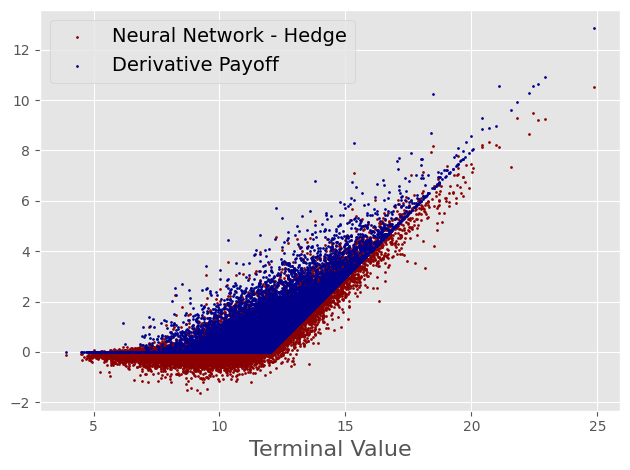

In [37]:
style.use('ggplot')
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(price_non_M + delta_S_non_M,(BATCH_SIZE,1)),
            color = "darkred",label = "Neural Network - Hedge",s=2)
plt.scatter(np.reshape(path_batch[:,-1],(BATCH_SIZE,1)),np.reshape(derivative_on_batch,(BATCH_SIZE,1)),
            color = "darkblue",label = "Derivative Payoff",s=2)
plt.xlabel("Terminal Value", fontsize=16)
plt.legend( fontsize=14)
plt.tight_layout()
plt.savefig('eps/fig_hedging_mc_path_dependent_non_Markovian.eps', format='eps')
plt.show()

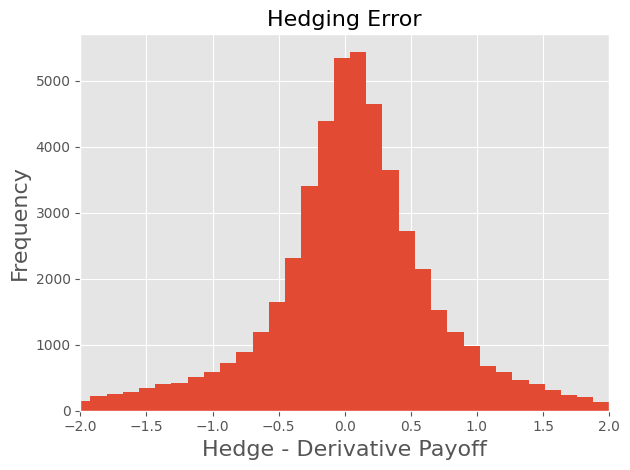

In [38]:
hedging_error_non_M = (((price_non_M + delta_S_non_M) - derivative_on_batch)/price_non_M).numpy()
plt.hist(hedging_error_non_M,100)
plt.xlim([-2,2])
plt.xlabel("Hedge - Derivative Payoff", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Hedging Error", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_non_Markovian.eps', format='eps')
plt.show()

# Part 3) 
# Difference between Non-Markovian and Markovian

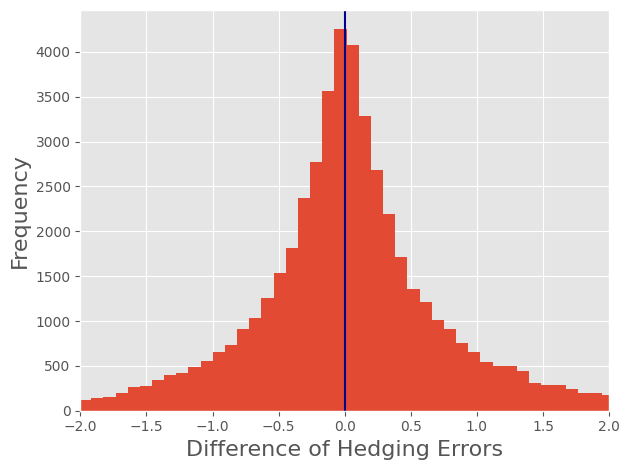

In [39]:
hedging_difference = np.abs(hedging_error) - np.abs(hedging_error_non_M)
plt.hist(hedging_difference,200)
plt.axvline(x=0,color="darkblue")
plt.xlim([-2,2])
plt.xlabel("Difference of Hedging Errors", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
#plt.title("Difference of Hedging Errors", fontsize=16)
plt.tight_layout()
plt.savefig('eps/fig_histogram_path_dependent_difference_non_M.eps', format='eps')
plt.show()

### Absolute Errors

In [40]:
pd.DataFrame(np.abs(hedging_error_fix)*price_fix).describe()

,0
count,5.000000e+04
mean,2.246563e-01
std,3.485851e-01
min,1.788139e-07
25%,3.398626e-02
50%,8.479653e-02
75%,2.453219e-01
max,5.174816e+00


Hedging Error of Markovian Strategy

In [41]:
pd.DataFrame(np.abs(hedging_error)*price).describe()

,0
count,50000.000000
mean,0.210984
std,0.245687
min,0.000003
25%,0.054842
50%,0.126984
75%,0.273551
max,4.071099


Hedging Error of non-Markovian Strategy

In [42]:
pd.DataFrame(np.abs(hedging_error_non_M)*price_non_M).describe()

,0
count,50000.000000
mean,0.194787
std,0.223766
min,0.000005
25%,0.052844
50%,0.121165
75%,0.251440
max,3.299304


### Relative Errors

In [43]:
print("Price of the fix hedge: {}".format(price_fix))
print("Price of the robust hedge: {}".format(price))
print("Price of the robust non-Markovian hedge: {}".format(price_non_M))

Price of the fix hedge: 0.17020370066165924
Price of the robust hedge: 0.3662395775318146
Price of the robust non-Markovian hedge: 0.3597724735736847


In [44]:
pd.DataFrame(np.abs(hedging_error)).describe()

,0
count,50000.000000
mean,0.576081
std,0.670838
min,0.000007
25%,0.149744
50%,0.346724
75%,0.746918
max,11.115946


In [45]:
pd.DataFrame(np.abs(hedging_error_non_M)).describe()

,0
count,50000.000000
mean,0.541416
std,0.621965
min,0.000015
25%,0.146882
50%,0.336781
75%,0.698885
max,9.170529


In [46]:
pd.DataFrame(np.abs(hedging_error_fix)).describe()

,0
count,50000.000000
mean,1.319926
std,2.048046
min,0.000001
25%,0.199680
50%,0.498206
75%,1.441343
max,30.403664
